# Import

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
import pickle
import os
import glob2

import scipy
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [2]:
data_dir = r'\data'

# Setup

<img src='./img/coupled_qubits_sketch.png'> 

In the following experiments, we probe the resonators' and qubits' spectra by measuring in reflection at the readout and drive ports $R_1$ to $R_3$ and applying one or more currents 

\begin{equation*}
\vec{I} = (I_1, I_2, I_3)^{\intercal}
\end{equation*}

through the global bias coils. From the emerging avoided level crossings we extract the periodicities and flux offsets

\begin{equation*}
\vec{\Phi}^{\mathrm{ext}}_{\mathrm{offset}}
\end{equation*}

at each unit cell. Because of the cross-talk of the "big" bias coils, all coils influence each unit cell, such that we have to set up the inductance matrix

\begin{equation*}
\mathbf{L} = 
\begin{pmatrix}
 L_{11} & L_{12} & L_{13}  \\ 
 L_{21} & L_{22} & L_{23}  \\
 L_{31} & L_{32} & L_{33}
\end{pmatrix}.
\end{equation*}

The fluxes are then given by


\begin{equation*}
\vec{\Phi}^{\mathrm{ext}} = \mathbf{L}\vec{I} + \vec{\Phi}^{\mathrm{ext}}_{\mathrm{offset}}
\end{equation*}

with

\begin{equation*}
\vec{\Phi}^{\mathrm{ext}} = (\Phi^{\mathrm{ext}}_1, \Phi^{\mathrm{ext}}_2, \Phi^{\mathrm{ext}}_3)^{\intercal}
\end{equation*}

In the following, we want to observe the avoided crossings between all modes. For that, we sweep the flux with all coils for each resonator. Looking at resonator 1 and sweeping the flux with coil 1 gives us the flux-periodicity of qubit 1. But because qubit 2 is further away from coil 1, qubit 2 might not have moved through resonator 1 and we don't see the crossing. Because of that, we do the same experiment with coil 2 until we see one period of qubit 1. Then we can be sure that we have moved qubit 2 through resonator 1 several times because $L_{22}$ is much bigger than $L_{21}$.

The same logic applies to all measurements.

It might actually be that with this procedure, we don't resolve small crossings because we move qubit 2 through resonator 1 too fast. The resolution of these measurements is therefore not optimal

# Single circuit

We measure qubit 1 (qR7) without a coupler chip (enclosure is empty) in two consecutive cooldowns within a few days (June 2023). There is another chip in enclosure 3, but enclosure 2 is always empty. The chip in enclosure 3 has been changed inbetween cooldown 1 and 2.

## Cooldown 1 

### Resonator Spectroscopy

In [3]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_single_circuit_1.pkl', 'rb') as f:
    f_vna__fs_q1_single_circuit_1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_single_circuit_1.pkl', 'rb') as f:
    current__fs_q1_single_circuit_1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_single_circuit_1.pkl', 'rb') as f:
    phase__fs_q1_single_circuit_1 = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/gabriel/PycharmProjects/tunable-capacitive-coupling-flux-qubits/KIT/spectral_data_KIT\\data\\f_vna__fs_q1_single_circuit_1.pkl'

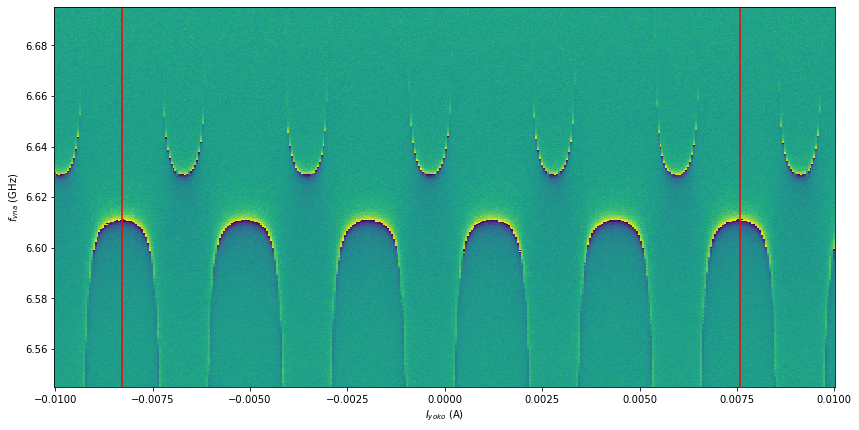

In [4]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_q1_single_circuit_1, f_vna__fs_q1_single_circuit_1*1e-9, phase__fs_q1_single_circuit_1.T, shading = 'auto')


ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{vna}$ (GHz)')
ax.tick_params(axis='both', which='major')

ax.axvline(-0.008275, color = 'red')
ax.axvline(0.007575, color = 'red')

plt.show()

In [5]:
I0 = (0.008275 + 0.007575)/5
print(I0)

0.00317


In [6]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    f_vna__fs_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    current__fs_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    phase__fs_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    current_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\freq_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    freq_q1_single_circuit_1_crossings = pickle.load(f)

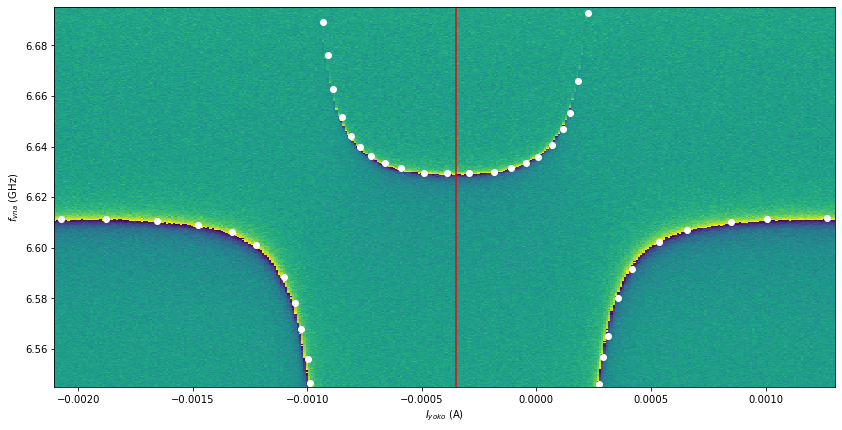

In [7]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_q1_single_circuit_1_crossings, f_vna__fs_q1_single_circuit_1_crossings*1e-9, phase__fs_q1_single_circuit_1_crossings.T, shading = 'auto')

ax.plot(current_q1_single_circuit_1_crossings, freq_q1_single_circuit_1_crossings*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{vna}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = -0.00035
ax.axvline(Iss, color = 'red')

plt.show()

In [8]:
phase_q1_crossings_CD1 = (current_q1_single_circuit_1_crossings - Iss + I0/2)/I0

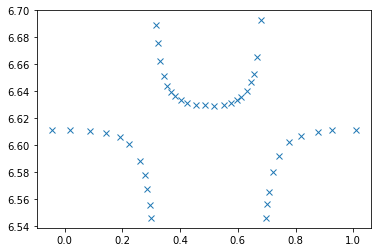

In [9]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 'x')

### Qubit spectroscopy 

#### Level 1

In [48]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    current__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_1_up = pickle.load(f)

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_14504/3510116454.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(current__tt_q1_single_circuit_1_up, mw_freq__tt_q1_single_circuit_1_up*1e-9, phase__tt_q1_single_circuit_1_up[:,:,2].T)


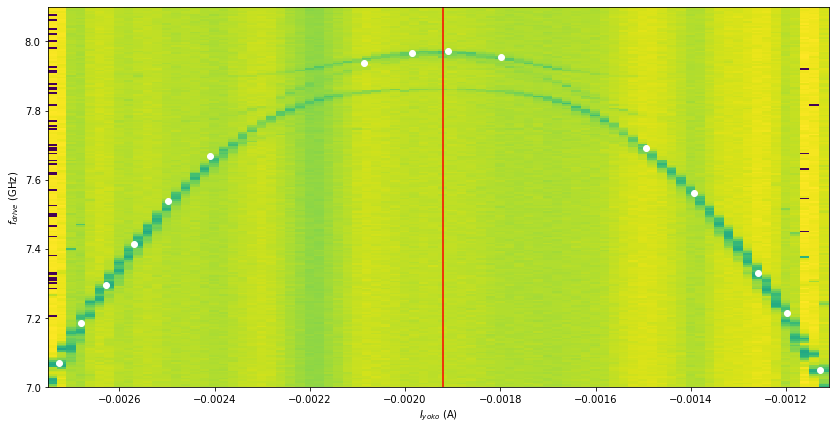

In [49]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_1_up, mw_freq__tt_q1_single_circuit_1_up*1e-9, phase__tt_q1_single_circuit_1_up[:,:,2].T)
ax.plot(current_extracted__tt_q1_single_circuit_1_up, mw_freq_extracted__tt_q1_single_circuit_1_up*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

ax.axvline(-0.00192, color = 'red')

plt.show()

In [50]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    current__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_1_down = pickle.load(f)

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_14504/4167982181.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(current__tt_q1_single_circuit_1_down, mw_freq__tt_q1_single_circuit_1_down*1e-9, phase__tt_q1_single_circuit_1_down[:,:,2].T)


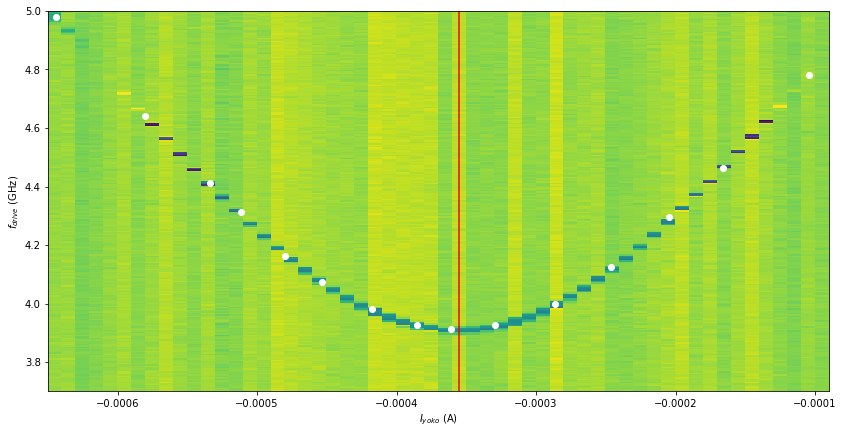

In [51]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_1_down, mw_freq__tt_q1_single_circuit_1_down*1e-9, phase__tt_q1_single_circuit_1_down[:,:,2].T)
ax.plot(current_extracted__tt_q1_single_circuit_1_down, mw_freq_extracted__tt_q1_single_circuit_1_down*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = -0.000355
ax.axvline(Iss, color = 'red')


plt.show()

In [52]:
current_extracted__tt_q1_single_circuit_1 = np.concatenate([current_extracted__tt_q1_single_circuit_1_down, current_extracted__tt_q1_single_circuit_1_up])
mw_freq_extracted__tt_q1_single_circuit_1 = np.concatenate([mw_freq_extracted__tt_q1_single_circuit_1_down, mw_freq_extracted__tt_q1_single_circuit_1_up])

phase__tt_q1_single_circuit_1  = (current_extracted__tt_q1_single_circuit_1 - Iss + I0/2)/I0

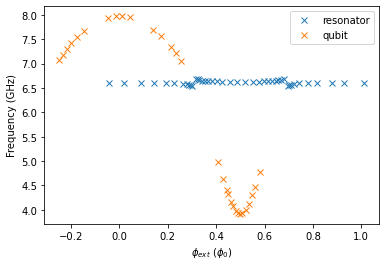

In [53]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 'x', label = 'resonator')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 'x', label = 'qubit')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

#### Fit results (only qubit mode)

In [18]:
Lq = 27.64 # nH
Cq = 24.47 # fF
Ej = 5.06 # GHz --> E/h
fq= 3.913 # GHz

#### Estimate resonator inductance from geometry

In [19]:
# length of qubit loop inductance in um
l_q = 36.7 + 39.3

# asymmetry of qubit loop in um
l_delta = (39.3 - 36.7)/2

#length of readout inductance in um
l_r = 50

#inductance per length (nH/um)
L_um = Lq/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.4727894736842095
Lr = 18.184210526315788
L_R = 25.094210526315788


### Higher levels

#### Power sweep at half flux

In [408]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_higher_levels_power_sweep.pkl', 'rb') as f:
    f_drive__PS_q1_single_circuit_higher_levels = pickle.load(f)
with open(os.getcwd() + data_dir + r'\power__tt_q1_single_circuit_higher_levels_power_sweep.pkl', 'rb') as f:
    power__PS_q1_single_circuit_higher_levels = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_higher_levels_power_sweep.pkl', 'rb') as f:
    phase__PS_q1_single_circuit_higher_levels = pickle.load(f)

In [409]:
phase__PS_q1_single_circuit_higher_levels.shape

(21, 1501, 3)

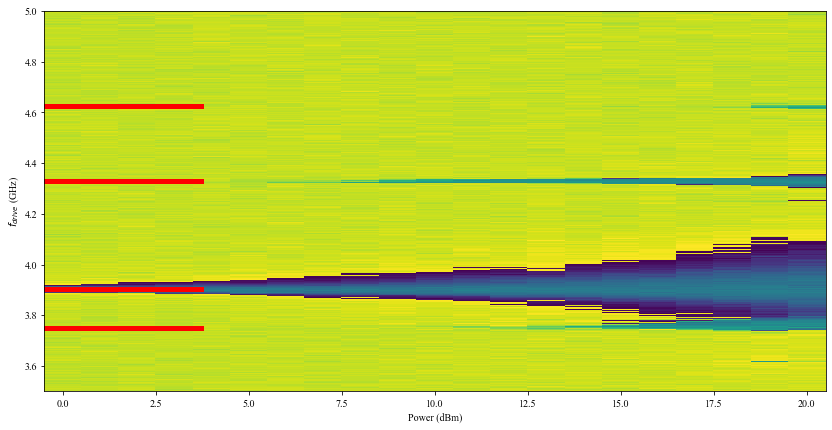

In [410]:
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(power__PS_q1_single_circuit_higher_levels, f_drive__PS_q1_single_circuit_higher_levels*1e-9, phase__PS_q1_single_circuit_higher_levels[:,:,2].T, shading = 'auto')


ax.set_xlabel(r'Power (dBm)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

ax.axhline(3.905, 0.0, 0.2, color = 'red', lw = 5)
ax.axhline(4.33, 0.0, 0.2, color = 'red', lw = 5)
ax.axhline(4.625, 0.0, 0.2, color = 'red', lw = 5)

ax.axhline(3.75, 0.0, 0.2, color = 'red', lw = 5)


plt.show()

With this Power sweep, we can identify the levels in accordance with their appearance in power. The first level appears at lowest power, the higher levels only at higher powers, because those are multi-photon transitions. Not sure what the transitions below the first level is...

In [411]:
f_01 = 3.905
f_02 = 4.33*2
f_03 = 4.625*3

alpha = f_02 - 2*f_01
print(alpha)

0.8500000000000005


#### Flux sweep around half flux

In [412]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_higher_levels.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_higher_levels = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__tt_q1_single_circuit_higher_levels.pkl', 'rb') as f:
    current__tt_q1_single_circuit_higher_levels = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_higher_levels.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_higher_levels = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_level_2_over_2.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_level_2_over_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_level_2_over_2.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_level_2_over_2 = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_level_3_over_3.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_level_3_over_3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_level_3_over_3.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_level_3_over_3 = pickle.load(f)

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_14504/316816733.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(current__tt_q1_single_circuit_higher_levels, mw_freq__tt_q1_single_circuit_higher_levels*1e-9, phase__tt_q1_single_circuit_higher_levels[:,:,2].T)


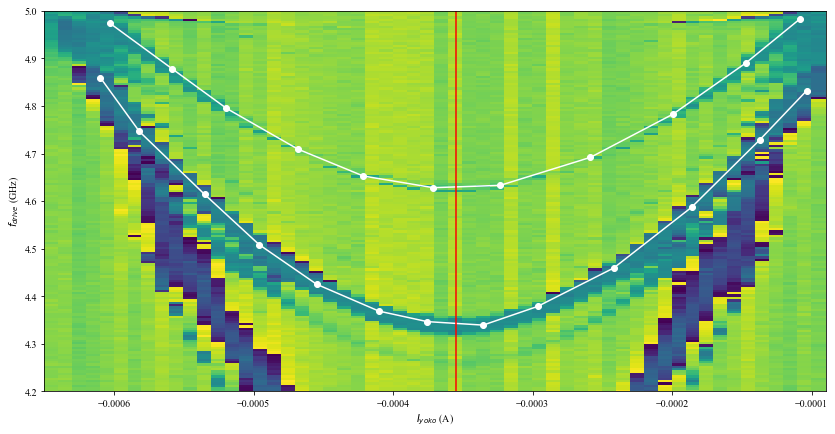

In [413]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_higher_levels, mw_freq__tt_q1_single_circuit_higher_levels*1e-9, phase__tt_q1_single_circuit_higher_levels[:,:,2].T)

ax.plot(current_extracted__tt_q1_single_circuit_level_2_over_2, mw_freq_extracted__tt_q1_single_circuit_level_2_over_2*1e-9, '-o', color = 'white', mfc = 'white')
ax.plot(current_extracted__tt_q1_single_circuit_level_3_over_3, mw_freq_extracted__tt_q1_single_circuit_level_3_over_3*1e-9, '-o', color = 'white', mfc = 'white')


ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = -0.000355
ax.axvline(Iss, color = 'red')

plt.show()

In [414]:
phase__tt_q1_single_circuit_level_2_over_2  = (current_extracted__tt_q1_single_circuit_level_2_over_2 - Iss + I0/2)/I0
phase__tt_q1_single_circuit_level_3_over_3  = (current_extracted__tt_q1_single_circuit_level_3_over_3 - Iss + I0/2)/I0

In [416]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'Times New Roman',
    "font.size"   : 16
})

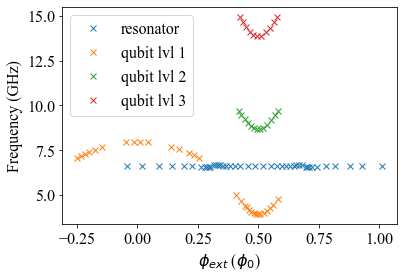

In [417]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 'x', label = 'resonator')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 'x', label = 'qubit lvl 1')

# level 2
plt.plot(phase__tt_q1_single_circuit_level_2_over_2, mw_freq_extracted__tt_q1_single_circuit_level_2_over_2*2*1e-9, 'x', label = 'qubit lvl 2')

# level 3
plt.plot(phase__tt_q1_single_circuit_level_3_over_3, mw_freq_extracted__tt_q1_single_circuit_level_3_over_3*3*1e-9, 'x', label = 'qubit lvl 3')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

## Cooldown 2

### Resonator Spectroscopy

In [16]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_single_circuit_2.pkl', 'rb') as f:
    f_vna__fs_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_single_circuit_2.pkl', 'rb') as f:
    current__fs_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_single_circuit_2.pkl', 'rb') as f:
    phase__fs_q1_single_circuit_2 = pickle.load(f)

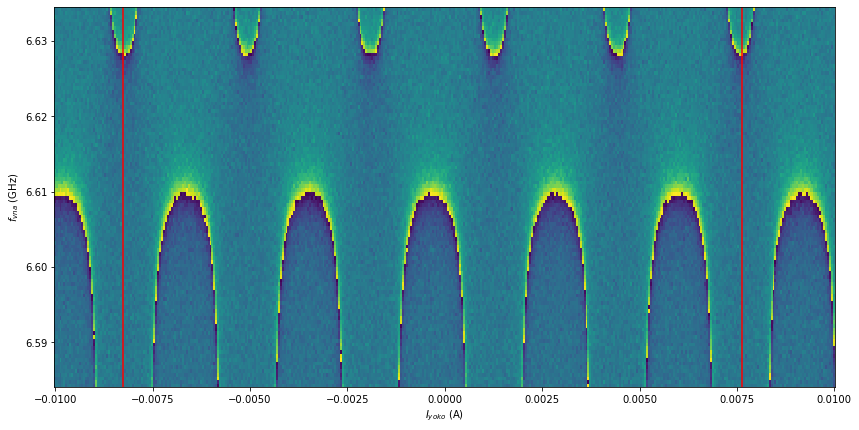

In [17]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_q1_single_circuit_2, f_vna__fs_q1_single_circuit_2*1e-9, phase__fs_q1_single_circuit_2.T, shading = 'auto')


ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{vna}$ (GHz)')
ax.tick_params(axis='both', which='major')


ax.axvline(-0.00825, color = 'red')
ax.axvline(0.00762, color = 'red')


plt.show()

In [18]:
I0 = (0.00825 + 0.00762)/5
print(I0)

0.0031740000000000006


In [19]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    f_vna__fs_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    current__fs_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    phase__fs_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    current_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\freq_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    freq_q1_single_circuit_2_crossings = pickle.load(f)

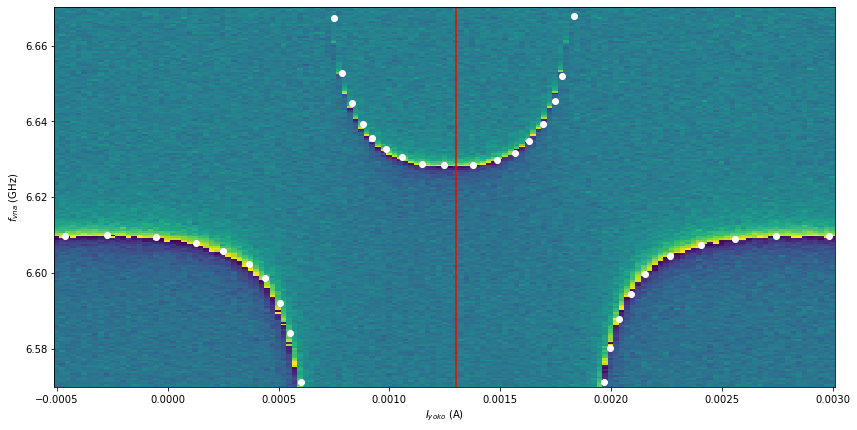

In [20]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_q1_single_circuit_2_crossings, f_vna__fs_q1_single_circuit_2_crossings*1e-9, phase__fs_q1_single_circuit_2_crossings.T, shading = 'auto')

ax.plot(current_q1_single_circuit_2_crossings, freq_q1_single_circuit_2_crossings*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{vna}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = 0.0013
ax.axvline(Iss, color = 'red')

plt.show()

In [21]:
phase_q1_crossings_CD2 = (current_q1_single_circuit_2_crossings - Iss + I0/2)/I0

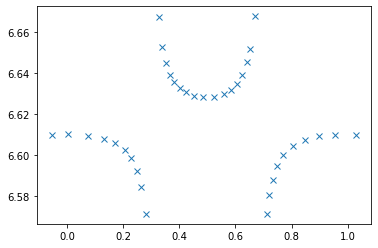

In [22]:
plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x')

### Qubit spectroscopy 

In [23]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_2.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__tt_q1_single_circuit_2.pkl', 'rb') as f:
    current__tt_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_2.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_2.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_2.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_2 = pickle.load(f)

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_20920/1560050578.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(current__tt_q1_single_circuit_2, mw_freq__tt_q1_single_circuit_2*1e-9, phase__tt_q1_single_circuit_2[:,:,2].T)


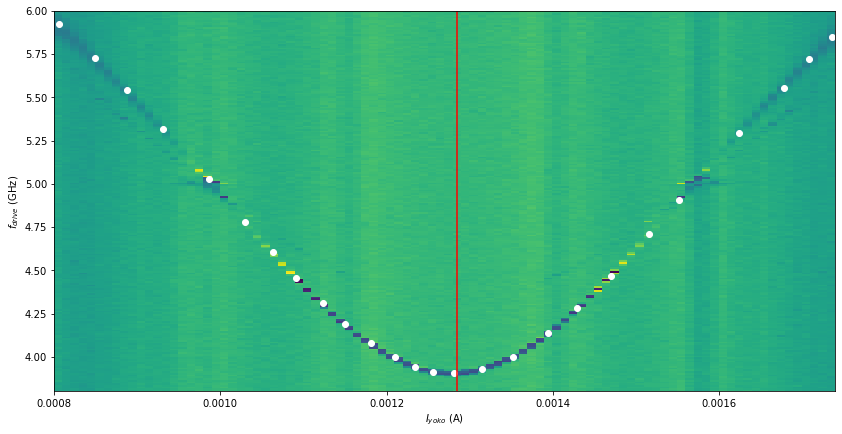

In [24]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_2, mw_freq__tt_q1_single_circuit_2*1e-9, phase__tt_q1_single_circuit_2[:,:,2].T)
ax.plot(current_extracted__tt_q1_single_circuit_2, mw_freq_extracted__tt_q1_single_circuit_2*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = 0.001285
ax.axvline(Iss, color = 'red')

plt.show()

In [25]:
phase__tt_q1_single_circuit_2  = (current_extracted__tt_q1_single_circuit_2 - Iss + I0/2)/I0

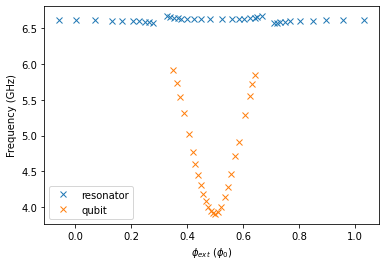

In [26]:
plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x', label = 'resonator')
plt.plot(phase__tt_q1_single_circuit_2, mw_freq_extracted__tt_q1_single_circuit_2*1e-9, 'x', label = 'qubit')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

### Fit results (only qubit mode)

In [100]:
Lq =  25.80 # nH
Cq = 26.39 # fF
Ej = 5.27 # GHz --> E/h
fq= 3.907 # GHz

### Estimate resonator inductance from geometry

In [101]:
# length of qubit loop inductance in um
l_q = 36.7 + 39.3

# asymmetry of qubit loop in um
l_delta = (39.3 - 36.7)/2

#length of readout inductance in um
l_r = 50

#inductance per length (nH/um)
L_um = Lq/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.4413157894736833
Lr = 16.973684210526315
L_R = 23.423684210526314


### Dispersive Shift

We measure the dispersive shift by measuring the resonator response in time domain at low power (close to single photon) and resolving the 2 pointer states of the resonator belonging to the qubit in ground and excited, respectively. The two responses are fitted with a gaussian-mixture model and the angles of the center point of the pointer states are extracted and plotted below. So what you see are the 2 distinct phase rolls of the 2 resonances for either qubit in ground or excited. The shift should coincide with the energy difference in the spectrum

\begin{equation}
\chi = \frac{  (E_{11} - E_{10}) - (E_{01} - E_{00})  }{h},
\end{equation}

where $E_{ij}$ are the sorted energy levels with qubit (i) and resonator (j) photon numbers.

In [27]:
with open(os.getcwd() + data_dir + r'\freq__disp_shift_q1_single_circuit_2.pkl', 'rb') as f:
    freq__disp_shift_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase_0__disp_shift_q1_single_circuit_2.pkl', 'rb') as f:
    phase_0__disp_shift_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase_1__disp_shift_q1_single_circuit_2.pkl', 'rb') as f:
    phase_1__disp_shift_q1_single_circuit_2 = pickle.load(f)

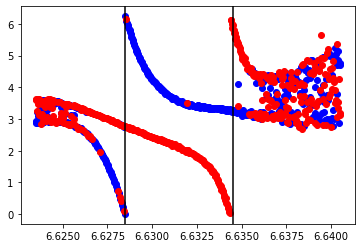

In [28]:
plt.plot(freq__disp_shift_q1_single_circuit_2*1e-9, phase_0__disp_shift_q1_single_circuit_2%(2*np.pi), 'o', color = 'blue')
plt.plot(freq__disp_shift_q1_single_circuit_2*1e-9, phase_1__disp_shift_q1_single_circuit_2%(2*np.pi), 'o', color = 'red')
plt.axvline(6.6285, color = 'black')
plt.axvline(6.6345, color = 'black')

$\chi \approx 6$ MHz

## Compare cooldown 1 and cooldown 2

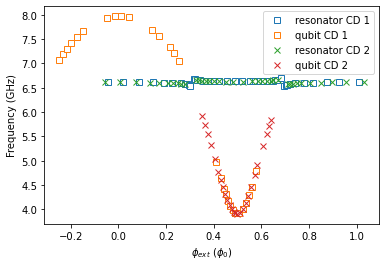

In [29]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 's', mfc = 'white', label = 'resonator CD 1')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 's', mfc = 'white', label = 'qubit CD 1')

plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x', label = 'resonator CD 2')
plt.plot(phase__tt_q1_single_circuit_2, mw_freq_extracted__tt_q1_single_circuit_2*1e-9, 'x', label = 'qubit CD 2')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

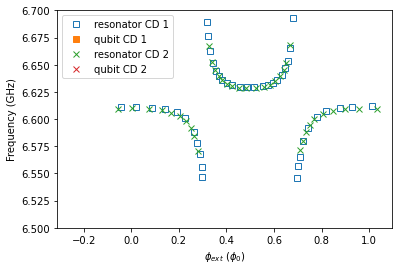

In [30]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 's', mfc = 'white', label = 'resonator CD 1')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 's', label = 'qubit CD 1')

plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x', label = 'resonator CD 2')
plt.plot(phase__tt_q1_single_circuit_2, mw_freq_extracted__tt_q1_single_circuit_2*1e-9, 'x', label = 'qubit CD 2')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.ylim([6.5, 6.7])

plt.legend()

# Resonator 1

## Coil 1: Sweep $I_1$

In [31]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_rough_q1_coil1.pkl', 'rb') as f:
    f_vna__fs_rough_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_rough_q1_coil1.pkl', 'rb') as f:
    current__fs_rough_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_rough_q1_coil1.pkl', 'rb') as f:
    phase__fs_rough_q1_coil1 = pickle.load(f)

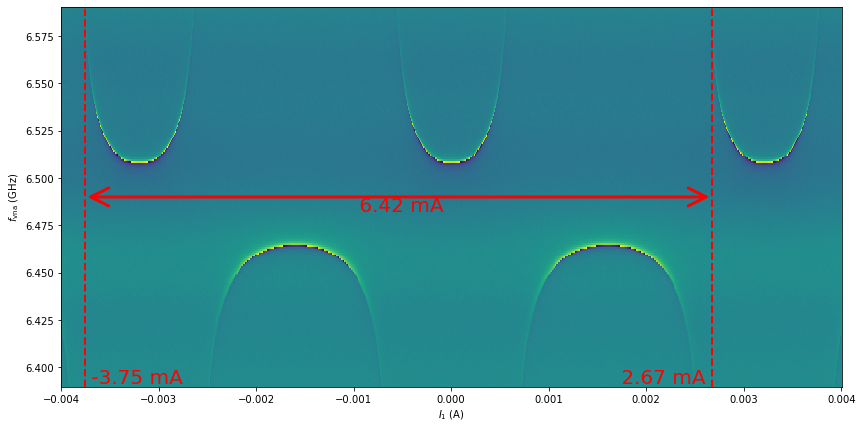

I0__q1 = 3.21 mA


In [32]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q1_coil1, f_vna__fs_rough_q1_coil1*1e-9, phase__fs_rough_q1_coil1.T, shading = 'auto')

I_ss_low__fs = -0.00375
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.00267
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 2
I0_q1 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_q1*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_q1/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

ax.set_xlabel(r'$I_1$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q1 = {} mA'.format(I0_q1*1e3))

In [33]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_coil1.pkl', 'rb') as f:
    f_vna__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fs_q1_coil1.pkl', 'rb') as f:
    current__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\phase__fs_q1_coil1.pkl', 'rb') as f:
    phase__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fres_q1_coil1.pkl', 'rb') as f:
    current_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\fres__fres_q1_coil1.pkl', 'rb') as f:
    fres_q1_coil1 = pickle.load(f)
    
current_q1_coil1 = np.concatenate([current_q1_coil1[0], current_q1_coil1[1], current_q1_coil1[2]])
fres_q1_coil1 = np.concatenate([fres_q1_coil1[0], fres_q1_coil1[1], fres_q1_coil1[2]])

I_ss__q1_fs= 0.0112 mA
fr_ss__q1= 6.5086 GHz


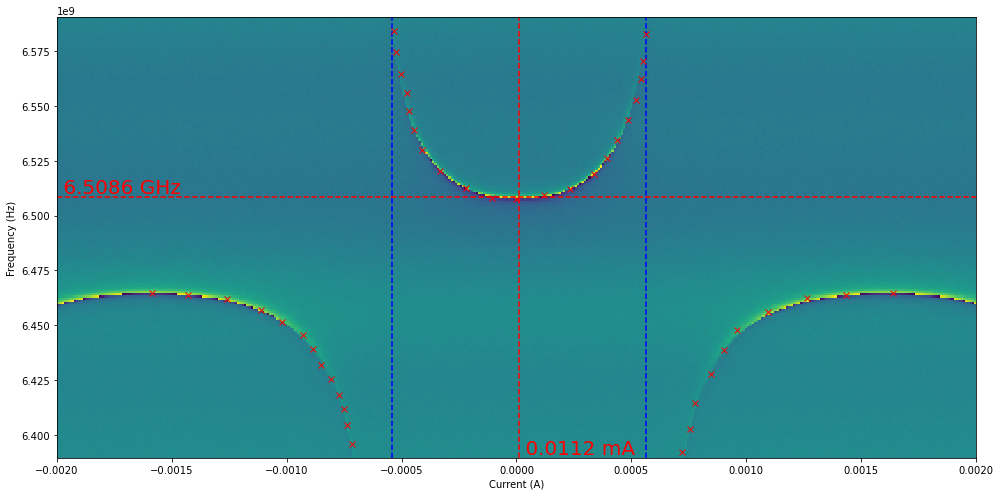

In [34]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil1, f_vna__fs_q1_coil1, phase__fs_q1_coil1.T,shading='auto')

I_ss__q1_fs = 1.12*1e-5
ax.axvline(x=I_ss__q1_fs,ls='--',color='red')
ax.text(s=' {} mA'.format(round(I_ss__q1_fs*1e3,5)),x=I_ss__q1_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
print('I_ss__q1_fs= {} mA'.format(round(I_ss__q1_fs*1e3,5)))

ax.axvline(x=-0.000541, ls='--', color='blue')
ax.axvline(x=0.000565, ls='--', color='blue')    

ax.set_xlim([-0.002,0.002])
if True:
    fr_ss__q1=6.5086*1e9
    ax.axhline(y=fr_ss__q1, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__q1*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__q1, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__q1= {} GHz'.format(round(fr_ss__q1*1e-9,5)))

ax.plot(current_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

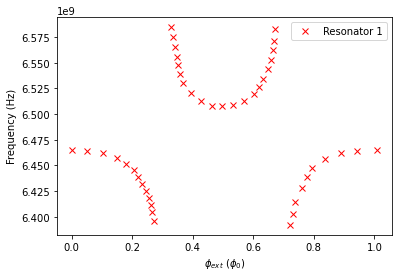

In [35]:
phi_q1_coil1 = (current_q1_coil1 - I_ss__q1_fs + I0_q1/2  ) /I0_q1
plt.plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')

plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Coil 2: Sweep $I_2$

In [36]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_coil2.pkl', 'rb') as f:
    f_vna__fs_q1_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_coil2.pkl', 'rb') as f:
    current__fs_q1_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_coil2.pkl', 'rb') as f:
    phase__fs_q1_coil2 = pickle.load(f)

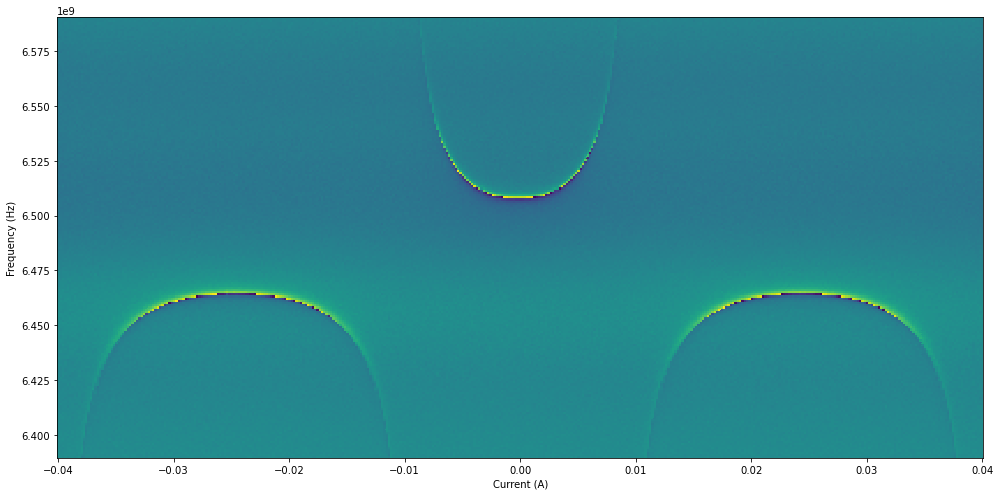

In [37]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil2, f_vna__fs_q1_coil2, phase__fs_q1_coil2.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

## Coil 3: Sweep $I_3$

In [38]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_coil3.pkl', 'rb') as f:
    f_vna__fs_q1_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_coil3.pkl', 'rb') as f:
    current__fs_q1_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_coil3.pkl', 'rb') as f:
    phase__fs_q1_coil3 = pickle.load(f)

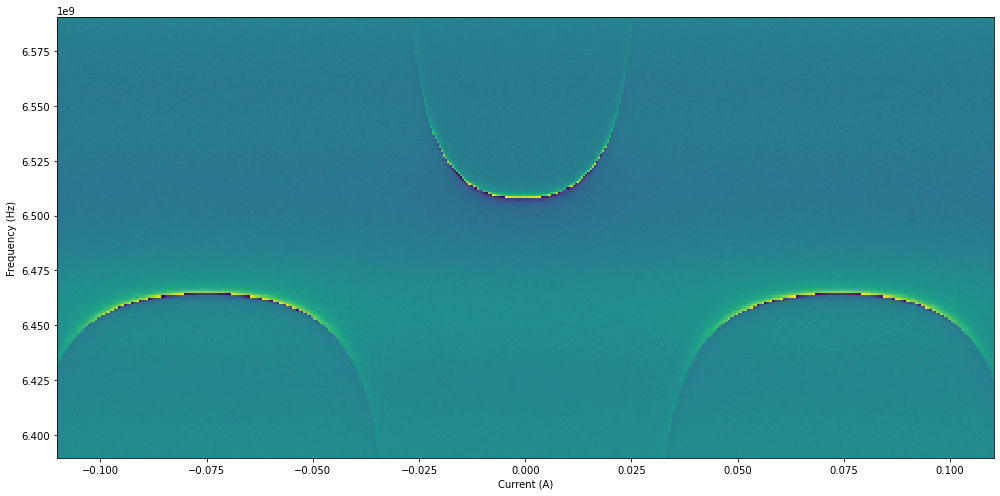

In [39]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil3, f_vna__fs_q1_coil3, phase__fs_q1_coil3.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

# Resonator 3

## Coil 3: Sweep $I_3$

In [40]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_rough_q3_coil3.pkl', 'rb') as f:
    f_vna__fs_rough_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_rough_q3_coil3.pkl', 'rb') as f:
    current__fs_rough_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_rough_q3_coil3.pkl', 'rb') as f:
    phase__fs_rough_q3_coil3 = pickle.load(f)

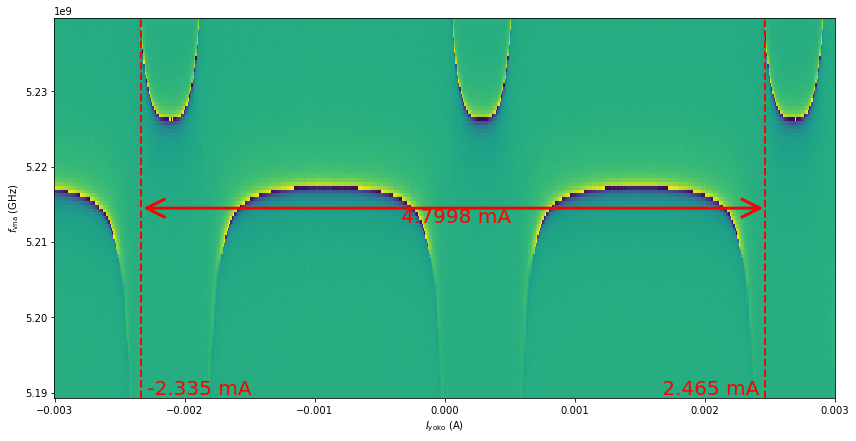

I0__q3 = 2.3999 mA


In [41]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q3_coil3, f_vna__fs_rough_q3_coil3, phase__fs_rough_q3_coil3.T, shading = 'auto')

I_ss_low__fs = -0.002335
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.0024648
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 2
I0_q3 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_q3*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_q3/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

#ax.set_xlim([0,0.34*1e-3])

ax.set_xlabel(r'$I_{\rm yoko}$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q3 = {} mA'.format(I0_q3*1e3))

In [42]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q3_coil3.pkl', 'rb') as f:
    f_vna__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fs_q3_coil3.pkl', 'rb') as f:
    current__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\phase__fs_q3_coil3.pkl', 'rb') as f:
    phase__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fres_q3_coil3.pkl', 'rb') as f:
    current_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\fres__fres_q3_coil3.pkl', 'rb') as f:
    fres_q3_coil3 = pickle.load(f)
    
current_q3_coil3 = np.concatenate([current_q3_coil3[0], current_q3_coil3[1], current_q3_coil3[2]])
fres_q3_coil3 = np.concatenate([fres_q3_coil3[0], fres_q3_coil3[1], fres_q3_coil3[2]])

I_ss__q3_fs= 0.29 mA
fr_ss__q3= 5.22635 GHz


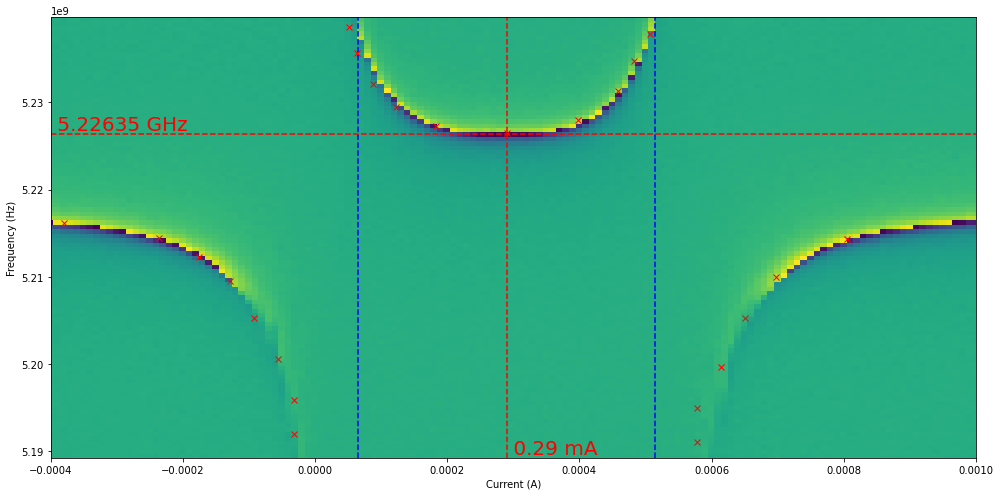

In [43]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil3, f_vna__fs_q3_coil3, phase__fs_q3_coil3.T,shading='auto')


if True:
    I_ss__q3_fs = 0.00029
    ax.axvline(x=I_ss__q3_fs,ls='--',color='red')
    ax.text(s=' {} mA'.format(round(I_ss__q3_fs*1e3,5)),x=I_ss__q3_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    print('I_ss__q3_fs= {} mA'.format(round(I_ss__q3_fs*1e3,5)))
    
    ax.axvline(x=6.505*1e-5, ls='--', color='blue')
    ax.axvline(x=0.000514, ls='--', color='blue')    
    #print((-0.000541+0.000565)/2)

ax.set_xlim([-0.0004,0.001])

if True:
    fr_ss__q3=5.22635*1e9
    ax.axhline(y=fr_ss__q3, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__q3*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__q3, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__q3= {} GHz'.format(round(fr_ss__q3*1e-9,5)))

ax.plot(current_q3_coil3, fres_q3_coil3, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

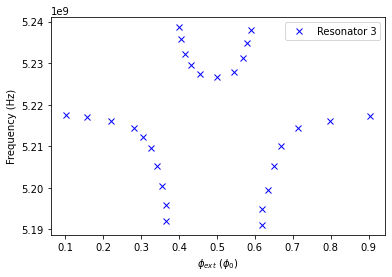

In [44]:
phi_q3_coil3 = (current_q3_coil3 - I_ss__q3_fs + I0_q3/2  ) /I0_q3
plt.plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='blue',ls='', label = 'Resonator 3')

plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Coil 1: Sweep $I_1$

In [45]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q3_coil1.pkl', 'rb') as f:
    f_vna__fs_q3_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q3_coil1.pkl', 'rb') as f:
    current__fs_q3_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q3_coil1.pkl', 'rb') as f:
    phase__fs_q3_coil1 = pickle.load(f)

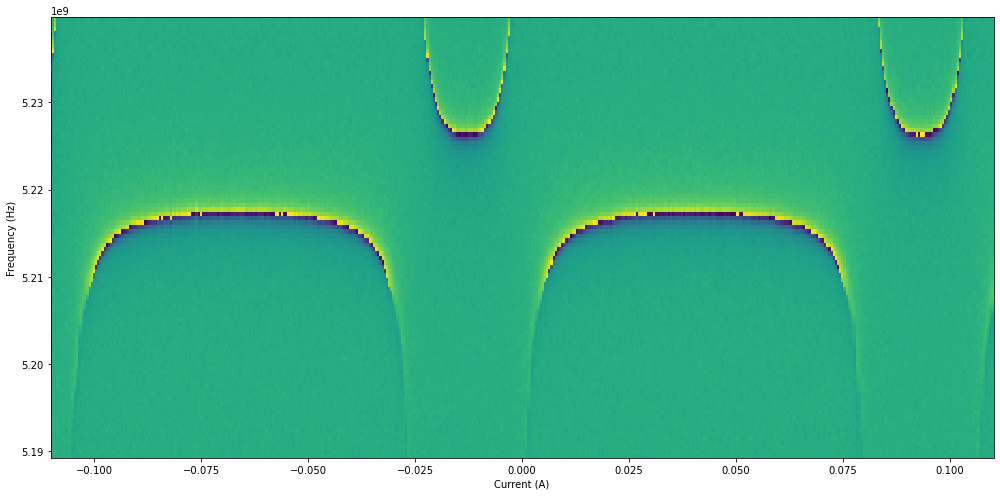

In [46]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil1, f_vna__fs_q3_coil1, phase__fs_q3_coil1.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

## Coil 2: Sweep $I_2$

In [47]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q3_coil2.pkl', 'rb') as f:
    f_vna__fs_q3_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q3_coil2.pkl', 'rb') as f:
    current__fs_q3_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q3_coil2.pkl', 'rb') as f:
    phase__fs_q3_coil2 = pickle.load(f)

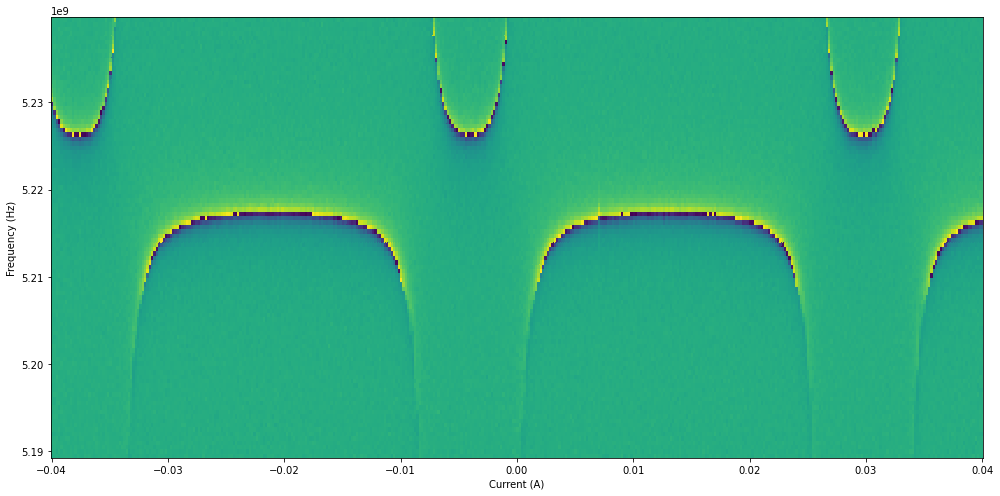

In [48]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil2, f_vna__fs_q3_coil2, phase__fs_q3_coil2.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

tiny feature at ~7mA

# Resonator 2

## Coil 2: Sweep $I_2$

In [49]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_rough_q2_coil2.pkl', 'rb') as f:
    f_vna__fs_rough_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_rough_q2_coil2.pkl', 'rb') as f:
    current__fs_rough_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_rough_q2_coil2.pkl', 'rb') as f:
    phase__fs_rough_q2_coil2 = pickle.load(f)

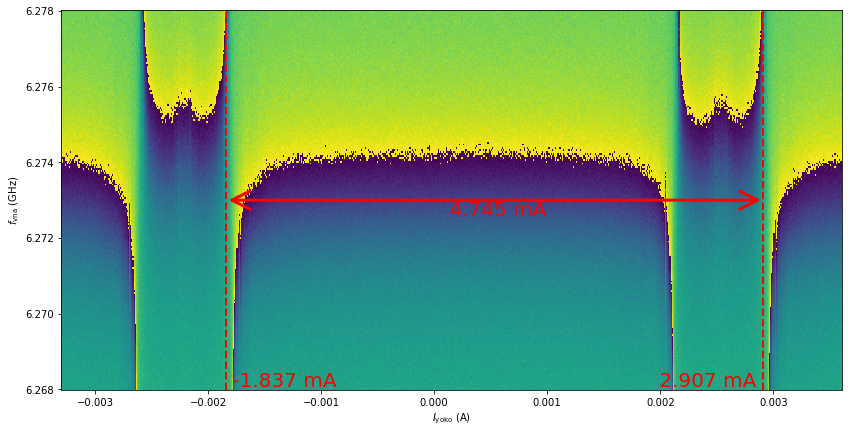

I0__q2 = 4.745 mA


In [50]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q2_coil2, f_vna__fs_rough_q2_coil2*1e-9, phase__fs_rough_q2_coil2.T, shading = 'auto')

I_ss_low__fs = -0.0018375
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.0029075
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 1
I0_c2 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_c2*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_c2/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

#ax.set_xlim([0,0.34*1e-3])

ax.set_xlabel(r'$I_{\rm yoko}$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q2 = {} mA'.format(I0_c2*1e3))

In [51]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q2_coil2.pkl', 'rb') as f:
    f_vna__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fs_q2_coil2.pkl', 'rb') as f:
    current__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\phase__fs_q2_coil2.pkl', 'rb') as f:
    phase__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fres_q2_coil2.pkl', 'rb') as f:
    current_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\fres__fres_q2_coil2.pkl', 'rb') as f:
    fres_q2_coil2 = pickle.load(f)
    
current_q2_coil2 = np.concatenate([current_q2_coil2[0], current_q2_coil2[1], current_q2_coil2[2]])
fres_q2_coil2 = np.concatenate([fres_q2_coil2[0], fres_q2_coil2[1], fres_q2_coil2[2]])

I_ss__c2_fs= 2.54 mA
fr_ss__c2= 6.27544 GHz


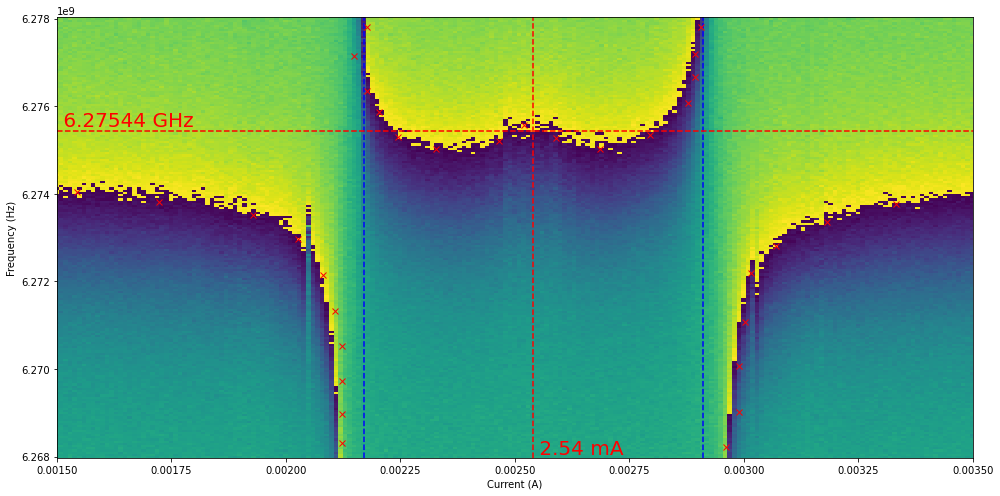

In [52]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil2, f_vna__fs_q2_coil2, phase__fs_q2_coil2.T,shading='auto')


if True:
    I_ss__c2_fs = 0.00254
    ax.axvline(x=I_ss__c2_fs,ls='--',color='red')
    ax.text(s=' {} mA'.format(round(I_ss__c2_fs*1e3,5)),x=I_ss__c2_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    print('I_ss__c2_fs= {} mA'.format(round(I_ss__c2_fs*1e3,5)))
    
    ax.axvline(x=0.00217, ls='--', color='blue')
    ax.axvline(x=0.00291, ls='--', color='blue')    
    #print((-0.000541+0.000565)/2)

ax.set_xlim([0.0015,0.0035])
if True:
    fr_ss__c2=6.27544*1e9
    ax.axhline(y=fr_ss__c2, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__c2*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__c2, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__c2= {} GHz'.format(round(fr_ss__c2*1e-9,5)))

ax.plot(current_q2_coil2, fres_q2_coil2, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

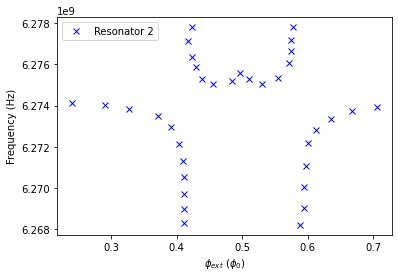

In [53]:
phi_q2_coil2 = (current_q2_coil2 - I_ss__c2_fs + I0_c2/2  ) /I0_c2
plt.plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')

plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Coil 1: Sweep $I_1$

In [54]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q2_coil1.pkl', 'rb') as f:
    f_vna__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fs_q2_coil1.pkl', 'rb') as f:
    current__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\phase__fs_q2_coil1.pkl', 'rb') as f:
    phase__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fres_q2_coil1.pkl', 'rb') as f:
    current_q2_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\fres__fres_q2_coil1.pkl', 'rb') as f:
    fres_q2_coil1 = pickle.load(f)

1.1999999999999966e-05
fr_ss__c2= 6.27544 GHz


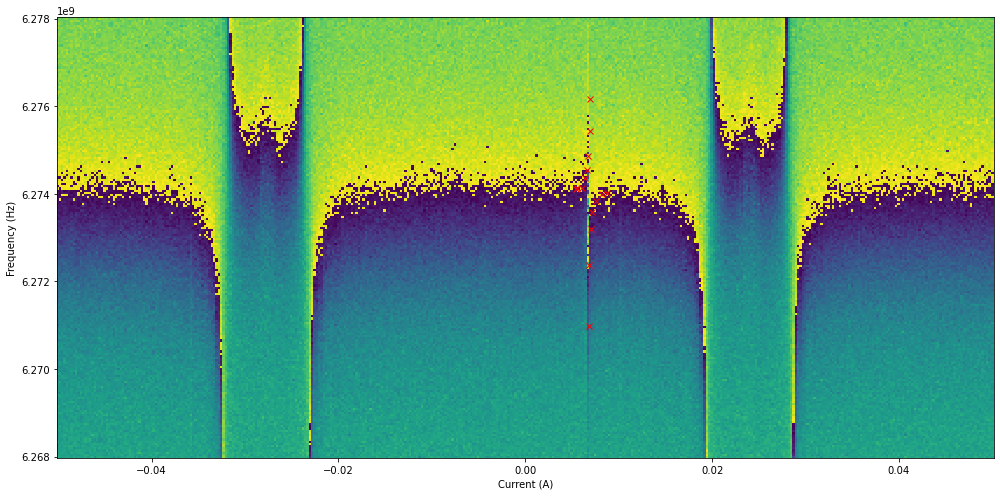

In [55]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil1, f_vna__fs_q2_coil1, phase__fs_q2_coil1.T,shading='auto')


if True:
    #I_ss__c2_fs = 0.00254
    #ax.axvline(x=I_ss__c2_fs,ls='--',color='red')
    #ax.text(s=' {} mA'.format(round(I_ss__c2_fs*1e3,5)),x=I_ss__c2_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    #print('I_ss__c2_fs= {} mA'.format(round(I_ss__c2_fs*1e3,5)))
    
    #ax.axvline(x=0.00217, ls='--', color='blue')
    #ax.axvline(x=0.00291, ls='--', color='blue')    
    print((-0.000541+0.000565)/2)

#ax.set_xlim([0.0015,0.0035])
if True:
    #fr_ss__c2=6.27544*1e9
    #ax.axhline(y=fr_ss__c2, ls='--', color='red')
    #ax.text(s=' {} GHz'.format(round(fr_ss__c2*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__c2, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__c2= {} GHz'.format(round(fr_ss__c2*1e-9,5)))

ax.plot(current_q2_coil1, fres_q2_coil1, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

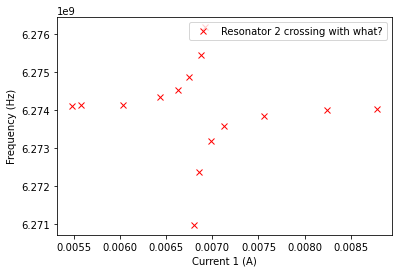

In [56]:
plt.plot(current_q2_coil1, fres_q2_coil1, marker='x',color='red',ls='', label = 'Resonator 2 crossing with what?')

plt.ylabel('Frequency (Hz)')
plt.xlabel('Current 1 (A)')
plt.legend()

If this was qubit 1, we would see it crossing several times with periodicity 3.21 mA

If this was qubit 3, we would see a periodicity of 100 mA which is the width of the window. But there is only one crossing.

Both is not the case ...

## Coil 3: Sweep $I_3$

In [57]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q2_coil3.pkl', 'rb') as f:
    f_vna__fs_q2_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q2_coil3.pkl', 'rb') as f:
    current__fs_q2_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q2_coil3.pkl', 'rb') as f:
    phase__fs_q2_coil3 = pickle.load(f)

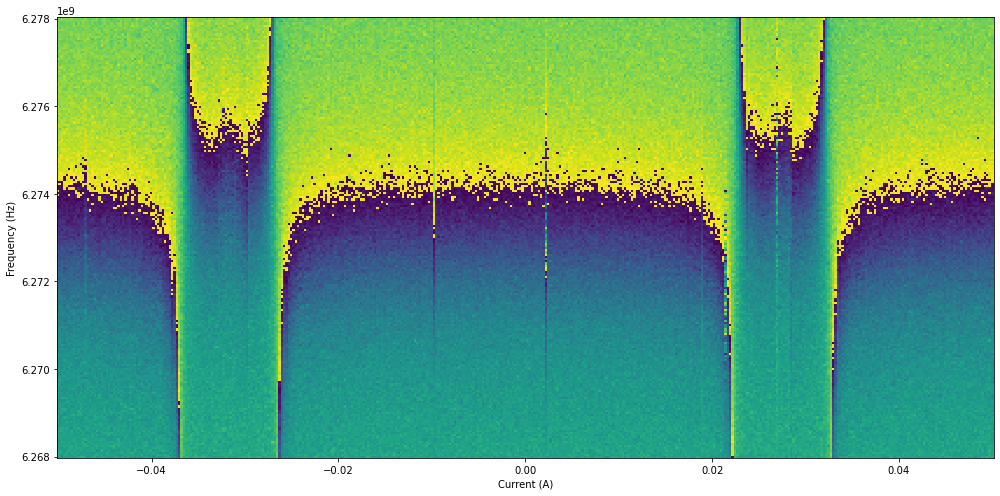

In [58]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil3, f_vna__fs_q2_coil3, phase__fs_q2_coil3.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

It is 10 mA between the crossings

qubit 3 would have a periodicity of 2.4 mA
qubit 1 would have a periodicity of 150 mA

Not sure what the extra crossings are ...

# Summary resonator spectroscopy

Be aware that the x axis is in a sense artificial, because we don't align all three external fluxes. All curves are shifted with respect to each other depending on the experiment 

You can also see that the crossings are very small for resonator 2. This is because we didnt take care of engineering the readout of this qubit as it is supposed to be the coupler qubit. Also the measurements are very noisy as you may have moticed. This is because we used our "worst" output line for the readout of the coupler qubit to save the good lines for the actual qubits 1 and 3.

## compare resonators 1 to 3 of coupled system

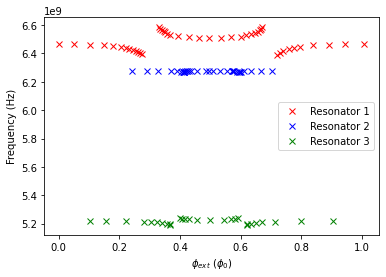

In [59]:
plt.plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')
plt.plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')
plt.plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='green',ls='', label = 'Resonator 3')


#plt.ylim([6.2e9, 6.33e9])
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Compare coupled circuit resonator 1 to single circuit resonator 1

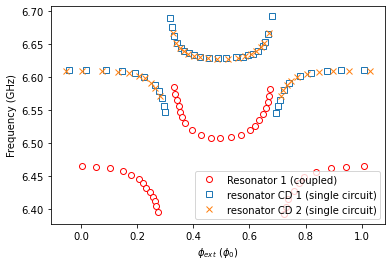

In [60]:
plt.plot(phi_q1_coil1, fres_q1_coil1*1e-9, marker='o',color='red',ls='', mfc = 'white', label = 'Resonator 1 (coupled)')

plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 's', mfc = 'white', label = 'resonator CD 1 (single circuit)')

plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x', label = 'resonator CD 2 (single circuit)')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

# Qubit 1 (qR7)

In [61]:
with open(os.getcwd() + data_dir + r'\x__q1_tt_low_q1.pkl', 'rb') as f:
    x__q1_tt_low = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\y__q1_tt_low_q1.pkl', 'rb') as f:
    y__q1_tt_low = pickle.load(f)[0]
    
with open(os.getcwd() + data_dir + r'\x__q1_tt_up_q1.pkl', 'rb') as f:
    x__q1_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q1_tt_up_q1.pkl', 'rb') as f:
    y__q1_tt_up = pickle.load(f)

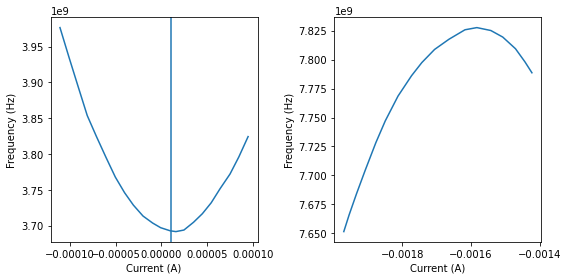

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(x__q1_tt_low, y__q1_tt_low )
ax[0].axvline(1e-5)
I_ss__q1_tt_low = 1e-5

ax[1].plot(x__q1_tt_up, y__q1_tt_up )

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [63]:
x__q1_tt = np.concatenate([x__q1_tt_low, x__q1_tt_up])
y__q1_tt = np.concatenate([y__q1_tt_low, y__q1_tt_up])

In [64]:
phi_q1_tt = (x__q1_tt - I_ss__q1_tt_low + I0_q1/2  ) /I0_q1

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

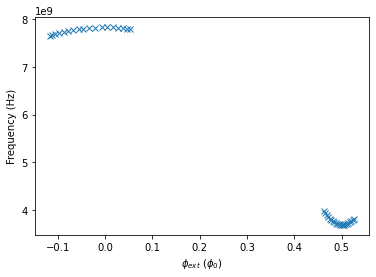

In [65]:
plt.plot(phi_q1_tt, y__q1_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

## Fit results (only qubit mode)

In [109]:
Lq_q1_fit= 22.06 #nH
Cq_q1_fit= 32.15 #fF
Ej_q1_fit= 6.19 #GHz

fq_q1_fit = 3.689  #GHz  

## Estimate resonator inductance from geometry

In [110]:
# length of qubit loop inductance in um
l_q = 36.7 + 39.3

# asymmetry of qubit loop in um
l_delta = (39.3 - 36.7)/2

#length of readout inductance in um
l_r = 50

#inductance per length (nH/um)
L_um = Lq_q1_fit/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq_q1_fit/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.37734210526315703
Lr = 14.513157894736842
L_R = 20.028157894736843


# Qubit 2 (bG1)

In [66]:
with open(os.getcwd() + data_dir + r'\x__q2_tt_low_q2.pkl', 'rb') as f:
    x__q2_tt_low = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q2_tt_low_q2.pkl', 'rb') as f:
    y__q2_tt_low = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\x__q2_tt_up_q2.pkl', 'rb') as f:
    x__q2_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q2_tt_up_q2.pkl', 'rb') as f:
    y__q2_tt_up = pickle.load(f)

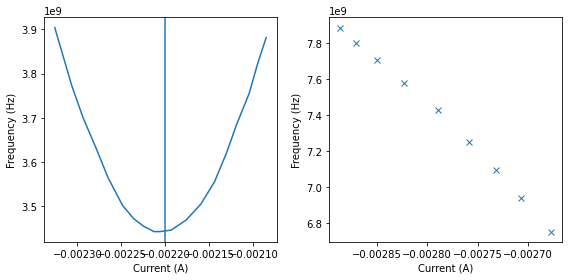

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(x__q2_tt_low, y__q2_tt_low )
ax[0].axvline(-2.2e-3)
I_ss__q2_tt_low = -2.2e-3

ax[1].plot(x__q2_tt_up, y__q2_tt_up , 'x')

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [68]:
x__q2_tt = np.concatenate([x__q2_tt_low, x__q2_tt_up])
y__q2_tt = np.concatenate([y__q2_tt_low, y__q2_tt_up])

In [69]:
phi_q2_tt = (x__q2_tt - I_ss__q2_tt_low + I0_c2/2  ) /I0_c2

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

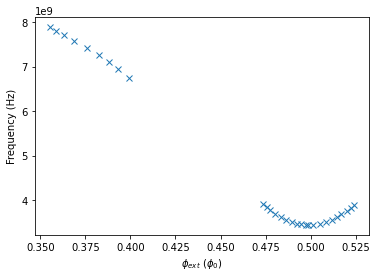

In [70]:
plt.plot(phi_q2_tt, y__q2_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

## Fit results (only qubit mode)

In [107]:
Lq_c2_fit= 20.21 #nH
Cq_c2_fit= 22.70 #fF
Ej_c2_fit= 9.57 #GHz

fq_c2_fit = 3.437  #GHz

## Estimate resonator inductance from geometry

In [108]:
# length of qubit loop inductance in um
l_q = 27.6 + 28.4

# asymmetry of qubit loop in um
l_delta = (28.4 - 27.6)/2

#length of readout inductance in um
l_r = 56

#inductance per length (nH/um)
L_um = Lq_c2_fit/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq_c2_fit/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.14435714285714235
Lr = 20.21
L_R = 25.262500000000003


# Qubit 3 (qS16)

In [71]:
with open(os.getcwd() + data_dir + r'\x__q3_tt_low_q3.pkl', 'rb') as f:
    x__q3_tt_low = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q3_tt_low_q3.pkl', 'rb') as f:
    y__q3_tt_low = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\x__q3_tt_up_q3.pkl', 'rb') as f:
    x__q3_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q3_tt_up_q3.pkl', 'rb') as f:
    y__q3_tt_up = pickle.load(f)

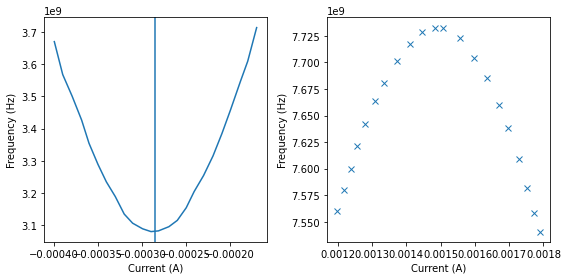

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(-x__q3_tt_low, y__q3_tt_low )
ax[0].axvline(-2.85e-4)
I_ss__q3_tt_low = -2.85e-4

ax[1].plot(x__q3_tt_up, y__q3_tt_up , 'x')

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [73]:
x__q3_tt = np.concatenate([x__q3_tt_low, x__q3_tt_up])
y__q3_tt = np.concatenate([y__q3_tt_low, y__q3_tt_up])

In [74]:
phi_q3_tt = (-x__q3_tt - I_ss__q3_tt_low + I0_q3/2  ) /I0_q3

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

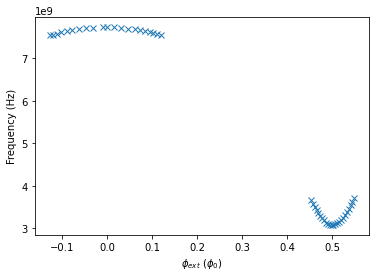

In [75]:
plt.plot(phi_q3_tt, y__q3_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

## Fit results (only qubit mode)

In [111]:
Lq_q3_fit= 31.59 #nH
Cq_q3_fit= 25.20 #fF
Ej_q3_fit= 5.58 #GHz

fq_q3_fit = 3.08 #GHz

## Estimate resonator inductance from geometry

In [112]:
# length of qubit loop inductance in um
l_q = 47 + 51

# asymmetry of qubit loop in um
l_delta = (51 - 47)/2

#length of readout inductance in um
l_r = 39.6

#inductance per length (nH/um)
L_um = Lq_q3_fit/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq_q3_fit/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.6446938775510204
Lr = 12.764938775510204
L_R = 20.662438775510203


# Summary qubit and resonator spectroscopy

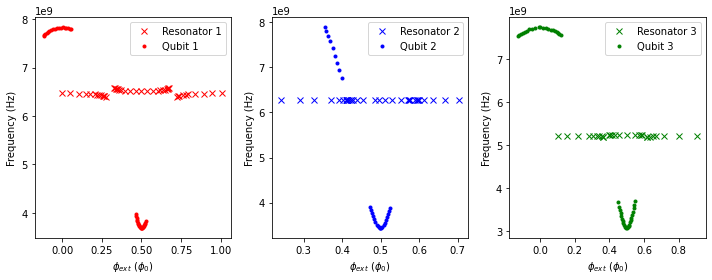

In [76]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))

ax[0].plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')
ax[0].plot(phi_q1_tt, y__q1_tt, marker='.',color='red',ls='', label = 'Qubit 1')
ax[0].set_ylabel('Frequency (Hz)')
ax[0].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[0].legend()

ax[1].plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')
ax[1].plot(phi_q2_tt, y__q2_tt, marker='.',color='blue',ls='', label = 'Qubit 2')
ax[1].set_ylabel('Frequency (Hz)')
ax[1].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[1].legend()

ax[2].plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='green',ls='', label = 'Resonator 3')
ax[2].plot(phi_q3_tt, y__q3_tt, marker='.',color='green',ls='', label = 'Qubit 3')
ax[2].set_ylabel('Frequency (Hz)')
ax[2].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[2].legend()

fig.tight_layout()

# Estimate fit uncertainties

Below, we tabulate 4 sets of fit results from 3 different cooldowns for qubit 1 in the coupled configuration

In [115]:
Lq = np.array([26.98, 25.05, 24, 22.06]) # nH
Cq = np.array([26.5, 28.41, 29.5, 32.15]) # fF
Ej = np.array([5.39, 5.61, 5.8, 6.19]) # GHz

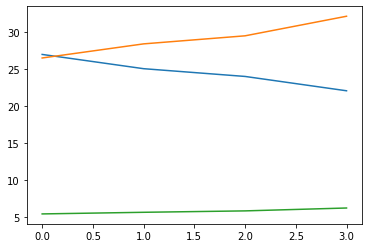

In [118]:
plt.plot(Lq)
plt.plot(Cq)
plt.plot(Ej)

In [119]:
np.std(Lq)

1.7786564451855231

In [120]:
np.std(Cq)

2.042804444874741

In [121]:
np.std(Ej)

0.29380052756930186

# q1-q2-q3 avoided crossing

Below, we fix q1 at its half-flux point around 3.7 GHz, move q2 on resonance, and then sweep q3 through 3.7 GHz.

In the background, we have a flux calibration which converts a set of desired qubit frequencies into a set of currents through the coils. As a result, the x axis corrsponds to a change of $\vec{I}$ along all components. So what is important is only the y axis that gives the measured energies. 

In [3]:
with open(os.getcwd() + data_dir + r'\x__tt_3LevAC.pkl', 'rb') as f:
    x__tt_3LevAC = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__tt_3LevAC.pkl', 'rb') as f:
    y__tt_3LevAC = pickle.load(f)

Text(0.5, 0, 'Sweep parameters (a.u.)')

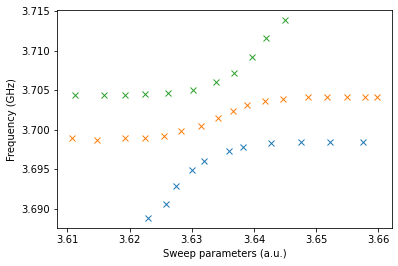

In [4]:
for i in range(len(x__tt_3LevAC)):
    plt.plot(x__tt_3LevAC[i], y__tt_3LevAC[i], 'x')
    
plt.ylabel('Frequency (GHz)')
plt.xlabel('Sweep parameters (a.u.)')

# q1 - q2 avoided crossing while q3 is off-resonant

Move q2 through q1 which is at half-flux

In [5]:
with open(os.getcwd() + data_dir + r'\x__tt_q1_q2.pkl', 'rb') as f:
    x__tt_q1_q2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__tt_q1_q2.pkl', 'rb') as f:
    y__tt_q1_q2 = pickle.load(f)
x__tt_q1_q2 = np.concatenate([x__tt_q1_q2[0], x__tt_q1_q2[1] ])
y__tt_q1_q2 = np.concatenate([y__tt_q1_q2[0], y__tt_q1_q2[1] ])

Text(0.5, 0, 'Sweep parameter (a.u.)')

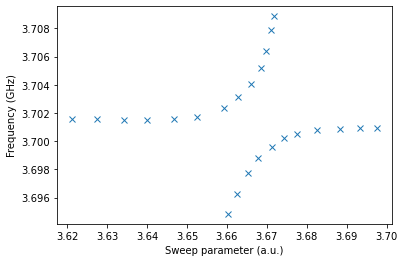

In [6]:
plt.plot(x__tt_q1_q2, y__tt_q1_q2, 'x')
plt.ylabel('Frequency (GHz)')
plt.xlabel('Sweep parameter (a.u.)')

# g_13 over flux

In [19]:
def lin_fit(x,m,n):
    return(m*x+n)

def Sweep_f0(f0_sweep, f1, g01):
    E_sweep = []
    v_sweep = []
    for f in f0_sweep:
        H = H_coupled(f, f1, g01)
        #print(H)
        w, v = np.linalg.eig(H)
        E = np.real(w)
        E = np.array(E)
        v = np.array(v)
        perm = E.argsort()
        E = E[perm]
        v = v[perm]
        E_sweep.append(E)
        v_sweep.append(v)
    return np.array(E_sweep), np.array(v_sweep)

def H_coupled(f0, f1, g01):
    H = np.array([
        [f0, -g01], 
        [-g01, f1], 
    ])   
    return H

In [20]:
Lq_q1_fit= 22.06 #nH
Cq_q1_fit= 32.15 #fF
Ej_q1_fit= 6.19 #GHz
fq_q1_fit = 3.689  #GHz 

Lq_c2_fit= 20.21 #nH
Cq_c2_fit= 22.70 #fF
Ej_c2_fit= 9.57 #GHz
fq_c2_fit = 3.437  #GHz

Lq_q3_fit= 31.59 #nH
Cq_q3_fit= 25.20 #fF
Ej_q3_fit= 5.58 #GHz
fq_q3_fit = 3.08 #GHz

## Avoided Level Crossings from spectroscopy
Cooldown in Dec 2023

q1 on resonance $f_{q1} \approx 3.69$ GHz, q3 sweept through $f_{q1}$, for different fq2 

### Measurement Data

All frequencies were extracted with lorentzian from spectroscopy

In [21]:
idx_ac_list = np.array([22., 22., 23., 23., 21., 22., 22., 20., 11., 38., 24., 24., 24., 23., 23., 24., 23., 23., 22., 23., 23.])

fq2_set_vec = np.array([3.62  , 3.6245, 3.629 , 3.6335, 3.638 , 3.6425, 3.647 , 3.6515,3.656 , 3.6605, 3.665 , 3.6695, 3.674 , 3.6785, 3.683 , 3.6875,3.692 , 3.6965, 3.701 , 3.7055, 3.71  ])


fq3set_0_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939])
fmeas_0_below = np.array([3.65833881, 3.65833635, 3.65833934, 3.65833601, 3.65833367,
       3.65834786, 3.65833782, 3.65834474, 3.65834112, 3.65833434,
       3.65833652, 3.65835229, 3.65834647, 3.65834081, 3.65833262,
       3.65834727, 3.65833465, 3.65834272, 3.65835006, 3.65835826,
       3.65836507, 3.65836549, 3.65834671])

fq3set_0_above = np.array([3.71408163, 3.71469388, 3.71530612, 3.71591837, 3.71653061,
       3.71714286, 3.7177551 , 3.71836735, 3.71897959, 3.71959184,
       3.72020408, 3.72081633, 3.72142857, 3.72204082, 3.72265306,
       3.72326531, 3.72387755, 3.7244898 , 3.72510204, 3.72571429,
       3.72632653, 3.72693878, 3.72755102, 3.72816327, 3.72877551,
       3.72938776, 3.73      ])
fmeas_0_above = np.array([3.6583009 , 3.6583055 , 3.65829838, 3.65828653, 3.65829974,
       3.65830997, 3.65830911, 3.65831873, 3.65831735, 3.65831746,
       3.65831825, 3.65831752, 3.65832648, 3.65832507, 3.65832139,
       3.6583285 , 3.65832829, 3.65832557, 3.65832432, 3.65832451,
       3.65832273, 3.6583243 , 3.65832917, 3.65832296, 3.65833112,
       3.65832518, 3.65833056])


fq3set_1_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939])
fmeas_1_below = np.array([3.65833616, 3.65837334, 3.65837662, 3.65837565, 3.65838198,
       3.65837133, 3.65835906, 3.65837116, 3.65837287, 3.65837229,
       3.65838059, 3.65837759, 3.65837305, 3.65838684, 3.65837885,
       3.65838747, 3.65839367, 3.65838931, 3.65838751, 3.65840468,
       3.65840999, 3.65840277, 3.65839215])

fq3set_1_above = np.array([3.71408163, 3.71469388, 3.71530612, 3.71591837, 3.71653061,
       3.71714286, 3.7177551 , 3.71836735, 3.71897959, 3.71959184,
       3.72020408, 3.72081633, 3.72142857, 3.72204082, 3.72265306,
       3.72326531, 3.72387755, 3.7244898 , 3.72510204, 3.72571429,
       3.72632653, 3.72693878, 3.72755102, 3.72816327, 3.72877551,
       3.72938776, 3.73      ])
fmeas_1_above = np.array([3.65833942, 3.65833769, 3.65832564, 3.65833008, 3.65832379,
       3.65834052, 3.6583432 , 3.65833943, 3.65835436, 3.65834846,
       3.6583493 , 3.65835087, 3.65835153, 3.65835992, 3.65836343,
       3.65835633, 3.65835617, 3.65835453, 3.6583557 , 3.6583553 ,
       3.65836583, 3.65835747, 3.65836675, 3.65836309, 3.65836767,
       3.65835285, 3.65836453])


fq3set_2_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163])
fmeas_2_below = np.array([3.65835615, 3.65842542, 3.65842869, 3.65842166, 3.65842214,
       3.6584224 , 3.6584186 , 3.65842531, 3.65841818, 3.65842938,
       3.658429  , 3.65843044, 3.65843232, 3.65842905, 3.65843799,
       3.65843718, 3.65843548, 3.65845248, 3.65844376, 3.65846857,
       3.65848608, 3.65846704, 3.65846881, 3.65840862])

fq3set_2_above = np.array([3.71469388, 3.71530612, 3.71591837, 3.71653061, 3.71714286,
       3.7177551 , 3.71836735, 3.71897959, 3.71959184, 3.72020408,
       3.72081633, 3.72142857, 3.72204082, 3.72265306, 3.72326531,
       3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_2_above = np.array([3.65833812, 3.65834309, 3.65834948, 3.658361  , 3.65836788,
       3.65838202, 3.65838698, 3.65839018, 3.65838844, 3.65839413,
       3.65839483, 3.65840579, 3.65840405, 3.65840704, 3.65840093,
       3.65839949, 3.65838597, 3.65839532, 3.65839339, 3.65838797,
       3.65838711, 3.65839695, 3.65839741, 3.65840881, 3.65840311,
       3.65839985])


fq3set_3_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163])
fmeas_3_below = np.array([3.65839958, 3.6584802 , 3.65848899, 3.65848268, 3.65848305,
       3.658477  , 3.65848308, 3.65849595, 3.65847925, 3.65848779,
       3.65848474, 3.65849405, 3.65849448, 3.65850231, 3.65849915,
       3.65850569, 3.65852205, 3.65851978, 3.65853668, 3.65852548,
       3.6585428 , 3.65855605, 3.65846153, 3.65849161])

fq3set_3_above = np.array([3.71469388, 3.71530612, 3.71591837, 3.71653061, 3.71714286,
       3.7177551 , 3.71836735, 3.71897959, 3.71959184, 3.72020408,
       3.72081633, 3.72142857, 3.72204082, 3.72265306, 3.72326531,
       3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_3_above = np.array([3.65836585, 3.65836415, 3.6583834 , 3.65839491, 3.65839818,
       3.65842107, 3.65842467, 3.65843105, 3.6584349 , 3.65844273,
       3.65844166, 3.65844007, 3.65845118, 3.65844095, 3.65844466,
       3.65844932, 3.65844755, 3.65844677, 3.65845448, 3.658452  ,
       3.65845458, 3.65845274, 3.65845147, 3.65845959, 3.65845722,
       3.65846194])


fq3set_4_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714])
fmeas_4_below = np.array([3.65845757, 3.65858493, 3.65857567, 3.65858519, 3.65858352,
       3.65858862, 3.65858569, 3.65858157, 3.65859022, 3.65859187,
       3.65858859, 3.65859695, 3.65860761, 3.65860961, 3.65860808,
       3.65861182, 3.6586311 , 3.65863498, 3.65866291, 3.65864678,
       3.65870363, 3.65870933])

fq3set_4_above = np.array([3.71346939, 3.71408163, 3.71469388, 3.71530612, 3.71591837,
       3.71653061, 3.71714286, 3.7177551 , 3.71836735, 3.71897959,
       3.71959184, 3.72020408, 3.72081633, 3.72142857, 3.72204082,
       3.72265306, 3.72326531, 3.72387755, 3.7244898 , 3.72510204,
       3.72571429, 3.72632653, 3.72693878, 3.72755102, 3.72816327,
       3.72877551, 3.72938776, 3.73      ])
fmeas_4_above = np.array([3.65854875, 3.65855648, 3.65840325, 3.65841186, 3.65841268,
       3.65844803, 3.65845693, 3.65848937, 3.65849397, 3.65849433,
       3.65850621, 3.65851381, 3.65852287, 3.65851801, 3.65851503,
       3.65850754, 3.65852652, 3.65852755, 3.65853496, 3.65853356,
       3.65852907, 3.65853404, 3.65853395, 3.65852701, 3.65854275,
       3.65853209, 3.65853618, 3.6585406 ])


fq3set_5_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939])
fmeas_5_below = np.array([3.65854683, 3.65870525, 3.65872246, 3.65870979, 3.65871222,
       3.65872981, 3.65872073, 3.65873678, 3.65873525, 3.65873678,
       3.65875607, 3.65875769, 3.65876121, 3.65876588, 3.6587672 ,
       3.65876651, 3.65878032, 3.65879529, 3.65883093, 3.65885575,
       3.65892203, 3.65892093, 3.65873183])

fq3set_5_above = np.array([3.71408163, 3.71469388, 3.71530612, 3.71591837, 3.71653061,
       3.71714286, 3.7177551 , 3.71836735, 3.71897959, 3.71959184,
       3.72020408, 3.72081633, 3.72142857, 3.72204082, 3.72265306,
       3.72326531, 3.72387755, 3.7244898 , 3.72510204, 3.72571429,
       3.72632653, 3.72693878, 3.72755102, 3.72816327, 3.72877551,
       3.72938776, 3.73      ])
fmeas_5_above = np.array([3.6584094 , 3.65851766, 3.65843349, 3.65850897, 3.65850167,
       3.65854081, 3.65857937, 3.65860108, 3.65857961, 3.65860069,
       3.65859754, 3.65859758, 3.65862352, 3.65862091, 3.658624  ,
       3.65862523, 3.65864165, 3.65864257, 3.65864102, 3.658641  ,
       3.65864468, 3.65864647, 3.65865009, 3.65865678, 3.65865527,
       3.65865573, 3.65864685])


fq3set_6_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939])
fmeas_6_below = np.array([3.65865427, 3.65895671, 3.65895723, 3.65896388, 3.65897708,
       3.65898458, 3.65898595, 3.65900008, 3.65902553, 3.65900641,
       3.65899019, 3.65901157, 3.65902215, 3.65903144, 3.65905416,
       3.65904672, 3.65908198, 3.65913271, 3.65911361, 3.65918949,
       3.6593066 , 3.65915592, 3.65945478])

fq3set_6_above = np.array([3.71408163, 3.71469388, 3.71530612, 3.71591837, 3.71653061,
       3.71714286, 3.7177551 , 3.71836735, 3.71897959, 3.71959184,
       3.72020408, 3.72081633, 3.72142857, 3.72204082, 3.72265306,
       3.72326531, 3.72387755, 3.7244898 , 3.72510204, 3.72571429,
       3.72632653, 3.72693878, 3.72755102, 3.72816327, 3.72877551,
       3.72938776, 3.73      ])
fmeas_6_above = np.array([3.65829662, 3.65842417, 3.65844049, 3.65854582, 3.65854955,
       3.65860843, 3.6586622 , 3.65868913, 3.6587034 , 3.65873211,
       3.65876221, 3.65874361, 3.6587673 , 3.65879089, 3.65877569,
       3.65878184, 3.6587984 , 3.65881334, 3.65880921, 3.65881547,
       3.65882021, 3.65882981, 3.658807  , 3.65881785, 3.65881759,
       3.65881336, 3.65882576])


fq3set_7_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 ])
fmeas_7_below = np.array([3.65884079, 3.65943425, 3.65944738, 3.65946257, 3.65946625,
       3.65948984, 3.65941723, 3.65944729, 3.65944063, 3.65944354,
       3.65948743, 3.65949781, 3.65953471, 3.65959517, 3.65959888,
       3.65961771, 3.65964641, 3.65972537, 3.65983812, 3.65986392,
       3.659925  ])

fq3set_7_above = np.array([3.71285714, 3.71346939, 3.71408163, 3.71469388, 3.71530612,
       3.71591837, 3.71653061, 3.71714286, 3.7177551 , 3.71836735,
       3.71897959, 3.71959184, 3.72020408, 3.72081633, 3.72142857,
       3.72204082, 3.72265306, 3.72326531, 3.72387755, 3.7244898 ,
       3.72510204, 3.72571429, 3.72632653, 3.72693878, 3.72755102,
       3.72816327, 3.72877551, 3.72938776, 3.73      ])
fmeas_7_above = np.array([3.65780746, 3.65812241, 3.65809671, 3.65838386, 3.65838159,
       3.65858459, 3.65871248, 3.65869972, 3.65887629, 3.6588853 ,
       3.65895555, 3.65894496, 3.6589735 , 3.65901506, 3.65903414,
       3.65904586, 3.65905632, 3.65908871, 3.6591194 , 3.65908934,
       3.65909775, 3.65910485, 3.65913422, 3.65912794, 3.65913365,
       3.65914503, 3.65914412, 3.65915375, 3.65918548])


fq3set_8_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469])
fmeas_8_below = np.array([3.65918431, 3.6600232 , 3.66011064, 3.66004718, 3.66015923,
       3.66012127, 3.66009661, 3.66002245, 3.66013704, 3.66011918,
       3.66003764, 3.66007776])

fq3set_8_above = np.array([3.70734694, 3.70795918, 3.70857143, 3.70918367, 3.70979592,
       3.71040816, 3.71102041, 3.71163265, 3.7122449 , 3.71285714,
       3.71346939, 3.71408163, 3.71469388, 3.71530612, 3.71591837,
       3.71653061, 3.71714286, 3.7177551 , 3.71836735, 3.71897959,
       3.71959184, 3.72020408, 3.72081633, 3.72142857, 3.72204082,
       3.72265306, 3.72326531, 3.72387755, 3.7244898 , 3.72510204,
       3.72571429, 3.72632653, 3.72693878, 3.72755102, 3.72816327,
       3.72877551, 3.72938776, 3.73      ])
fmeas_8_above = np.array([3.65618019, 3.6562538 , 3.65633023, 3.6564282 , 3.65668433,
       3.65674761, 3.65691701, 3.65702065, 3.65757856, 3.65765686,
       3.65795506, 3.65794761, 3.6582781 , 3.65857481, 3.65857357,
       3.65888693, 3.65888307, 3.65924508, 3.65922282, 3.65937521,
       3.65947826, 3.65947637, 3.6595895 , 3.65960198, 3.65968776,
       3.65972109, 3.65977433, 3.65976298, 3.65974451, 3.65980197,
       3.65978746, 3.65977776, 3.65980534, 3.65984445, 3.65989252,
       3.65982628, 3.65986042, 3.65988245])


fq3set_9_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163, 3.71469388,
       3.71530612, 3.71591837, 3.71653061, 3.71714286, 3.7177551 ,
       3.71836735, 3.71897959, 3.71959184, 3.72020408, 3.72081633,
       3.72142857, 3.72204082, 3.72265306, 3.72326531])
fmeas_9_below = np.array([3.65990532, 3.65650136, 3.65649729, 3.6564902 , 3.65650607,
       3.65651397, 3.65653963, 3.65658643, 3.65657013, 3.65663434,
       3.65671971, 3.65675527, 3.65675724, 3.65679875, 3.65692704,
       3.65692921, 3.65709196, 3.65706331, 3.65718224, 3.65737748,
       3.65757028, 3.65758706, 3.65785091, 3.65816745, 3.65816431,
       3.65859589, 3.65892685, 3.65890693, 3.65929808, 3.65966365,
       3.6598761 , 3.65986883, 3.66007343, 3.66002212, 3.6601194 ,
       3.65612169, 3.66010919, 3.66010599, 3.66024857])

fq3set_9_above = np.array([3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_9_above = np.array([3.65611372, 3.65609149, 3.6561333 , 3.65621782, 3.65621361,
       3.65614526, 3.65615557, 3.65624864, 3.65615871, 3.65609597,
       3.65621571])


fq3set_10_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163, 3.71469388,
       3.71530612, 3.71591837, 3.71653061])
fmeas_10_below = np.array([3.65619679, 3.65701021, 3.65702675, 3.65704572, 3.65703446,
       3.65706034, 3.65706071, 3.65708292, 3.6571097 , 3.65712263,
       3.65714223, 3.65713341, 3.6571899 , 3.65718059, 3.65722227,
       3.65730039, 3.65728997, 3.65737103, 3.657366  , 3.65748215,
       3.65764531, 3.65780428, 3.65783256, 3.65807852, 3.65838509,
       3.65836337, 3.65886235, 3.65629733])

fq3set_10_above = np.array([3.71714286, 3.7177551 , 3.71836735, 3.71897959, 3.71959184,
       3.72020408, 3.72081633, 3.72142857, 3.72204082, 3.72265306,
       3.72326531, 3.72387755, 3.7244898 , 3.72510204, 3.72571429,
       3.72632653, 3.72693878, 3.72755102, 3.72816327, 3.72877551,
       3.72938776, 3.73      ])
fmeas_10_above = np.array([3.6592937 , 3.65630403, 3.65639714, 3.65650001, 3.65648077,
       3.65650354, 3.65650961, 3.65655418, 3.65658812, 3.65662777,
       3.65660296, 3.65663473, 3.65666197, 3.65666817, 3.65667626,
       3.65670713, 3.65668553, 3.6567045 , 3.65665143, 3.65666416,
       3.65667071, 3.65668088])


fq3set_11_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163, 3.71469388])
fmeas_11_below = np.array([3.65669917, 3.65734244, 3.65735088, 3.65736013, 3.65735045,
       3.65736326, 3.65735209, 3.65735769, 3.65735308, 3.65737566,
       3.65737383, 3.65739432, 3.65741619, 3.65744472, 3.65744928,
       3.65747433, 3.65746811, 3.65751566, 3.65758218, 3.65757266,
       3.65777024, 3.65775296, 3.65792744, 3.65793536, 3.65811151])

fq3set_11_above = np.array([3.71530612, 3.71591837, 3.71653061, 3.71714286, 3.7177551 ,
       3.71836735, 3.71897959, 3.71959184, 3.72020408, 3.72081633,
       3.72142857, 3.72204082, 3.72265306, 3.72326531, 3.72387755,
       3.7244898 , 3.72510204, 3.72571429, 3.72632653, 3.72693878,
       3.72755102, 3.72816327, 3.72877551, 3.72938776, 3.73      ])
fmeas_11_above = np.array([3.65660035, 3.65662838, 3.65676774, 3.65678796, 3.65698598,
       3.65697895, 3.65702533, 3.65702226, 3.657066  , 3.65708805,
       3.65708537, 3.65710615, 3.65713122, 3.6571137 , 3.6571372 ,
       3.65715719, 3.65713569, 3.65713983, 3.6571385 , 3.65713501,
       3.65714552, 3.65716096, 3.65714947, 3.65717045, 3.6571715 ])


fq3set_12_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163, 3.71469388])
fmeas_12_below = np.array([3.65719054, 3.65753566, 3.65752491, 3.65752966, 3.65752747,
       3.65753467, 3.65753766, 3.65754932, 3.65753498, 3.65754757,
       3.65755424, 3.65757272, 3.65757256, 3.65759015, 3.65760469,
       3.65760807, 3.6576379 , 3.65762579, 3.65765772, 3.65770965,
       3.65776095, 3.65770979, 3.65780862, 3.65775894, 3.65783579])

fq3set_12_above = np.array([3.71530612, 3.71591837, 3.71653061, 3.71714286, 3.7177551 ,
       3.71836735, 3.71897959, 3.71959184, 3.72020408, 3.72081633,
       3.72142857, 3.72204082, 3.72265306, 3.72326531, 3.72387755,
       3.7244898 , 3.72510204, 3.72571429, 3.72632653, 3.72693878,
       3.72755102, 3.72816327, 3.72877551, 3.72938776, 3.73      ])
fmeas_12_above = np.array([3.65708464, 3.65703946, 3.65714852, 3.65724566, 3.65728831,
       3.6573315 , 3.65733235, 3.65734968, 3.65734877, 3.65736761,
       3.65738095, 3.65738076, 3.65737107, 3.65737077, 3.65739122,
       3.65739192, 3.6573989 , 3.65739928, 3.65741169, 3.65741725,
       3.65741387, 3.6574104 , 3.65743422, 3.65742048, 3.65744116])


fq3set_13_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163])
fmeas_13_below = np.array([3.65743202, 3.65763318, 3.65763092, 3.6576302 , 3.65764115,
       3.65764978, 3.65764283, 3.65764923, 3.65765293, 3.65765764,
       3.65765619, 3.65766548, 3.65767487, 3.65767554, 3.65769545,
       3.65768039, 3.65769484, 3.65771093, 3.65771157, 3.65774929,
       3.65780425, 3.65785603, 3.65786163, 3.65774418])

fq3set_13_above = np.array([3.71469388, 3.71530612, 3.71591837, 3.71653061, 3.71714286,
       3.7177551 , 3.71836735, 3.71897959, 3.71959184, 3.72020408,
       3.72081633, 3.72142857, 3.72204082, 3.72265306, 3.72326531,
       3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_13_above = np.array([3.65750831, 3.65748656, 3.65738145, 3.65738365, 3.65743602,
       3.65747163, 3.65750372, 3.6575095 , 3.65751489, 3.65752446,
       3.65752474, 3.65753867, 3.65753155, 3.65755324, 3.65755039,
       3.6575692 , 3.65755601, 3.65755632, 3.65756501, 3.65756417,
       3.65757524, 3.65756657, 3.65758198, 3.65758585, 3.65757952,
       3.65758358])


fq3set_14_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163])
fmeas_14_below = np.array([3.65756927, 3.6577118 , 3.6577044 , 3.6577206 , 3.65771931,
       3.65771688, 3.65771073, 3.65771139, 3.65771566, 3.65771453,
       3.65772355, 3.65772368, 3.65772647, 3.65774029, 3.65773878,
       3.65775622, 3.6577475 , 3.65777279, 3.65779152, 3.6577935 ,
       3.65782877, 3.65787636, 3.65788547, 3.65787658])

fq3set_14_above = np.array([3.71469388, 3.71530612, 3.71591837, 3.71653061, 3.71714286,
       3.7177551 , 3.71836735, 3.71897959, 3.71959184, 3.72020408,
       3.72081633, 3.72142857, 3.72204082, 3.72265306, 3.72326531,
       3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_14_above = np.array([3.65767115, 3.65766456, 3.65749662, 3.65753307, 3.65754171,
       3.65758793, 3.65758814, 3.65761018, 3.65760462, 3.65761569,
       3.65763787, 3.65763198, 3.6576325 , 3.65763732, 3.65764586,
       3.65765279, 3.6576507 , 3.6576499 , 3.6576431 , 3.65764789,
       3.65764579, 3.65765268, 3.65764784, 3.65765405, 3.65766107,
       3.65766163])


fq3set_15_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163, 3.71469388])
fmeas_15_below = np.array([3.65767189, 3.65776455, 3.65776039, 3.6577681 , 3.65776363,
       3.65777964, 3.65776826, 3.65777819, 3.65777225, 3.65778696,
       3.65776874, 3.65776899, 3.65777543, 3.65778169, 3.65778492,
       3.65779227, 3.65780823, 3.65780322, 3.65780726, 3.65781479,
       3.65786702, 3.65786772, 3.65789419, 3.65778553, 3.65778032])

fq3set_15_above = np.array([3.71530612, 3.71591837, 3.71653061, 3.71714286, 3.7177551 ,
       3.71836735, 3.71897959, 3.71959184, 3.72020408, 3.72081633,
       3.72142857, 3.72204082, 3.72265306, 3.72326531, 3.72387755,
       3.7244898 , 3.72510204, 3.72571429, 3.72632653, 3.72693878,
       3.72755102, 3.72816327, 3.72877551, 3.72938776, 3.73      ])
fmeas_15_above = np.array([3.6576051 , 3.65760097, 3.6576319 , 3.65765246, 3.65766874,
       3.65767713, 3.65769277, 3.65770574, 3.65769821, 3.65770812,
       3.65772085, 3.65771128, 3.65772027, 3.65771324, 3.65771496,
       3.65773052, 3.65772117, 3.65771235, 3.65773152, 3.65772388,
       3.65772961, 3.65773094, 3.65773045, 3.65773559, 3.65773072])


fq3set_16_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163])
fmeas_16_below = np.array([3.65772913, 3.65780138, 3.65781493, 3.65780241, 3.65780255,
       3.65780991, 3.65779909, 3.65780981, 3.65781134, 3.65780733,
       3.65780891, 3.65781751, 3.65781308, 3.65781628, 3.65781966,
       3.65782234, 3.65782217, 3.6578425 , 3.65783422, 3.65786074,
       3.65788687, 3.65789163, 3.65790603, 3.65783666])

fq3set_16_above = np.array([3.71469388, 3.71530612, 3.71591837, 3.71653061, 3.71714286,
       3.7177551 , 3.71836735, 3.71897959, 3.71959184, 3.72020408,
       3.72081633, 3.72142857, 3.72204082, 3.72265306, 3.72326531,
       3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_16_above = np.array([3.65770604, 3.6576951 , 3.65768652, 3.65769319, 3.65772254,
       3.65773265, 3.65774298, 3.65774108, 3.65774707, 3.65775351,
       3.65775762, 3.65775454, 3.65775516, 3.65775926, 3.65776253,
       3.65777043, 3.65777662, 3.65775529, 3.6577622 , 3.65776739,
       3.65777079, 3.65776507, 3.65776803, 3.65777358, 3.6577577 ,
       3.6577678 ])


fq3set_17_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163])
fmeas_17_below = np.array([3.65777594, 3.65783653, 3.6578378 , 3.65784304, 3.65783823,
       3.65784039, 3.65784849, 3.65784463, 3.6578386 , 3.65784529,
       3.65784791, 3.65784878, 3.65784838, 3.65785101, 3.65785302,
       3.65785351, 3.65785349, 3.65786133, 3.65787913, 3.65788513,
       3.65789765, 3.65792794, 3.65787765, 3.65787767])

fq3set_17_above = np.array([3.71469388, 3.71530612, 3.71591837, 3.71653061, 3.71714286,
       3.7177551 , 3.71836735, 3.71897959, 3.71959184, 3.72020408,
       3.72081633, 3.72142857, 3.72204082, 3.72265306, 3.72326531,
       3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_17_above = np.array([3.65779118, 3.65778388, 3.65772614, 3.65774563, 3.6577491 ,
       3.65776916, 3.65777408, 3.6577829 , 3.65778234, 3.65779386,
       3.65779851, 3.65780277, 3.65780147, 3.6577994 , 3.65780954,
       3.6578086 , 3.65781103, 3.6578102 , 3.65780801, 3.65781471,
       3.65779954, 3.65781126, 3.65780733, 3.65781338, 3.65780814,
       3.65781039])


fq3set_18_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939])
fmeas_18_below = np.array([3.65780877, 3.65785828, 3.65784638, 3.65786211, 3.65785273,
       3.65785258, 3.65785269, 3.65786189, 3.65785541, 3.65786138,
       3.65786331, 3.65786532, 3.65787571, 3.65786721, 3.65787142,
       3.65787458, 3.6578745 , 3.65787078, 3.65788823, 3.65788003,
       3.65792131, 3.6579082 , 3.65792599])

fq3set_18_above = np.array([3.71408163, 3.71469388, 3.71530612, 3.71591837, 3.71653061,
       3.71714286, 3.7177551 , 3.71836735, 3.71897959, 3.71959184,
       3.72020408, 3.72081633, 3.72142857, 3.72204082, 3.72265306,
       3.72326531, 3.72387755, 3.7244898 , 3.72510204, 3.72571429,
       3.72632653, 3.72693878, 3.72755102, 3.72816327, 3.72877551,
       3.72938776, 3.73      ])
fmeas_18_above = np.array([3.65784176, 3.65784045, 3.65776999, 3.65779316, 3.65778365,
       3.6578027 , 3.65781081, 3.65781494, 3.65781856, 3.65782564,
       3.6578278 , 3.6578202 , 3.65782815, 3.65782872, 3.65783847,
       3.65783545, 3.65783377, 3.65784146, 3.65784609, 3.65784272,
       3.65784824, 3.65783769, 3.65783751, 3.65784596, 3.6578375 ,
       3.65785076, 3.65784503])


fq3set_19_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163])
fmeas_19_below = np.array([3.65784465, 3.65788395, 3.65787586, 3.65787674, 3.65788425,
       3.65788638, 3.65787712, 3.65788384, 3.65789041, 3.65788568,
       3.6578863 , 3.65788378, 3.6578903 , 3.65788636, 3.65789187,
       3.65788867, 3.65789794, 3.65790642, 3.65790214, 3.65791226,
       3.65793824, 3.65793731, 3.65794435, 3.65790481])

fq3set_19_above = np.array([3.71469388, 3.71530612, 3.71591837, 3.71653061, 3.71714286,
       3.7177551 , 3.71836735, 3.71897959, 3.71959184, 3.72020408,
       3.72081633, 3.72142857, 3.72204082, 3.72265306, 3.72326531,
       3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_19_above = np.array([3.65782754, 3.657826  , 3.65782658, 3.65781722, 3.65782707,
       3.65782584, 3.65785026, 3.65783538, 3.65783931, 3.6578403 ,
       3.65783571, 3.65784125, 3.65785716, 3.65784708, 3.65785819,
       3.65785142, 3.65786218, 3.65785314, 3.65785385, 3.65785498,
       3.6578562 , 3.65785238, 3.65784779, 3.65786656, 3.65786059,
       3.65786292])


fq3set_20_below = np.array([3.7       , 3.70061224, 3.70122449, 3.70183673, 3.70244898,
       3.70306122, 3.70367347, 3.70428571, 3.70489796, 3.7055102 ,
       3.70612245, 3.70673469, 3.70734694, 3.70795918, 3.70857143,
       3.70918367, 3.70979592, 3.71040816, 3.71102041, 3.71163265,
       3.7122449 , 3.71285714, 3.71346939, 3.71408163])
fmeas_20_below = np.array([3.65785495, 3.6579017 , 3.6578973 , 3.65789884, 3.657896  ,
       3.65790046, 3.65789402, 3.65788816, 3.65790004, 3.65789288,
       3.65789508, 3.65789274, 3.65788462, 3.6579076 , 3.65790303,
       3.65790382, 3.65789639, 3.65791428, 3.65791174, 3.65791542,
       3.65792858, 3.65794477, 3.65792185, 3.65791846])

fq3set_20_above = np.array([3.71469388, 3.71530612, 3.71591837, 3.71653061, 3.71714286,
       3.7177551 , 3.71836735, 3.71897959, 3.71959184, 3.72020408,
       3.72081633, 3.72142857, 3.72204082, 3.72265306, 3.72326531,
       3.72387755, 3.7244898 , 3.72510204, 3.72571429, 3.72632653,
       3.72693878, 3.72755102, 3.72816327, 3.72877551, 3.72938776,
       3.73      ])
fmeas_20_above = np.array([3.6578621 , 3.65782959, 3.65783529, 3.65784405, 3.65784297,
       3.6578605 , 3.65785504, 3.65786501, 3.6578657 , 3.65787189,
       3.65787071, 3.65787565, 3.65787543, 3.65787622, 3.65786628,
       3.65787468, 3.65788162, 3.65787943, 3.65788077, 3.65788342,
       3.65788265, 3.65788359, 3.65787917, 3.65788197, 3.65788781,
       3.65788823])


fq3_set_below = [fq3set_0_below, fq3set_1_below, fq3set_2_below, fq3set_3_below, fq3set_4_below, fq3set_5_below, fq3set_6_below, fq3set_7_below, fq3set_8_below, fq3set_9_below, fq3set_10_below, fq3set_11_below, fq3set_12_below, fq3set_13_below, fq3set_14_below, fq3set_15_below, fq3set_16_below, fq3set_17_below, fq3set_18_below, fq3set_19_below, fq3set_20_below]
fq1_meas_below = [fmeas_0_below, fmeas_1_below, fmeas_2_below, fmeas_3_below, fmeas_4_below, fmeas_5_below, fmeas_6_below, fmeas_7_below, fmeas_8_below, fmeas_9_below, fmeas_10_below, fmeas_11_below, fmeas_12_below, fmeas_13_below, fmeas_14_below, fmeas_15_below, fmeas_16_below, fmeas_17_below, fmeas_18_below, fmeas_19_below, fmeas_20_below]

fq3_set_above = [fq3set_0_above, fq3set_1_above, fq3set_2_above, fq3set_3_above, fq3set_4_above, fq3set_5_above, fq3set_6_above, fq3set_7_above, fq3set_8_above, fq3set_9_above, fq3set_10_above, fq3set_11_above, fq3set_12_above, fq3set_13_above, fq3set_14_above, fq3set_15_above, fq3set_16_above, fq3set_17_above, fq3set_18_above, fq3set_19_above, fq3set_20_above]
fq1_meas_above =[fmeas_0_above, fmeas_1_above, fmeas_2_above, fmeas_3_above, fmeas_4_above, fmeas_5_above, fmeas_6_above, fmeas_7_above, fmeas_8_above, fmeas_9_above, fmeas_10_above, fmeas_11_above, fmeas_12_above, fmeas_13_above, fmeas_14_above, fmeas_15_above, fmeas_16_above, fmeas_17_above, fmeas_18_above, fmeas_19_above, fmeas_20_above]

fq3_set,fq1_meas = [],[]
for ii in range(0,len(fq3_set_below)):
    fq3_set.append(np.append(fq3_set_below[ii],fq3_set_above[ii]))
    fq1_meas.append(np.append(fq1_meas_below[ii],fq1_meas_above[ii]))

### Fitting the ALC

In [22]:
def cost_function(g, f0_guess, f1_guess, f0_meas, idx_swapp):
    g01 = g[0]
    
    
    idx_0 = 5
    idx_ac_0 = idx_swapp-4
    
    idx_ac_1 = idx_swapp+4
    idx_1 = -5
    
    E, v = Sweep_f0(f0_guess, f1_guess, g01)
    #plt.plot(f0_meas[idx_0:idx_ac_0],ls='',marker='o')
    #plt.plot(E[:,1][idx_0:idx_ac_0],ls='-',marker='')
    #plt.plot(f0_meas[idx_ac_1:idx_1],ls='',marker='o')
    #plt.plot(E[:,0][idx_ac_1:idx_1],ls='-',marker='')
    #plt.show()
    return np.sum( np.abs((f0_meas[idx_0:idx_ac_0]-E[:,1][idx_0:idx_ac_0])) ) + np.sum(np.abs((f0_meas[idx_ac_1:idx_1]-E[:,0][idx_ac_1:idx_1])) )




g0 = [1e-4]
g_bounds = [(0,10)]
res__list,E__list,v__list = [],[],[]

m_2, n_2, mean_fq1_meas = [np.zeros(len(fq2_set_vec)) for ii in range(0,3)]


for ii in range(fq2_set_vec.size):
    m_2[ii] = 1
    
    mean_fq1_meas[ii] = np.mean(np.append(fq1_meas[ii][2:6], fq1_meas[ii][-6:-2]))
    n_2[ii] = mean_fq1_meas[ii] - m_2[ii] * (fq3_set_below[ii][int(idx_ac_list[ii])]+np.diff(fq3_set_below[ii])[0]/2)
    
    
    res = minimize(cost_function, g0, args = (lin_fit(fq3_set[ii],m_2[ii],n_2[ii]), mean_fq1_meas[ii], fq1_meas[ii], int(idx_ac_list[ii])+1 ),
                                                method = 'Nelder-Mead', bounds = g_bounds, tol = 1e-11, options = {'maxiter': 1000} )
    res__list.append(res)
    
    fq3_set__for_plotting = np.linspace(np.min(fq3_set[ii]),np.max(fq3_set[ii]),1001)
    E, v = Sweep_f0(lin_fit(fq3_set__for_plotting,m_2[ii],n_2[ii]), mean_fq1_meas[ii], res__list[ii].x[0])
    E__list.append(E)
    v__list.append(v)

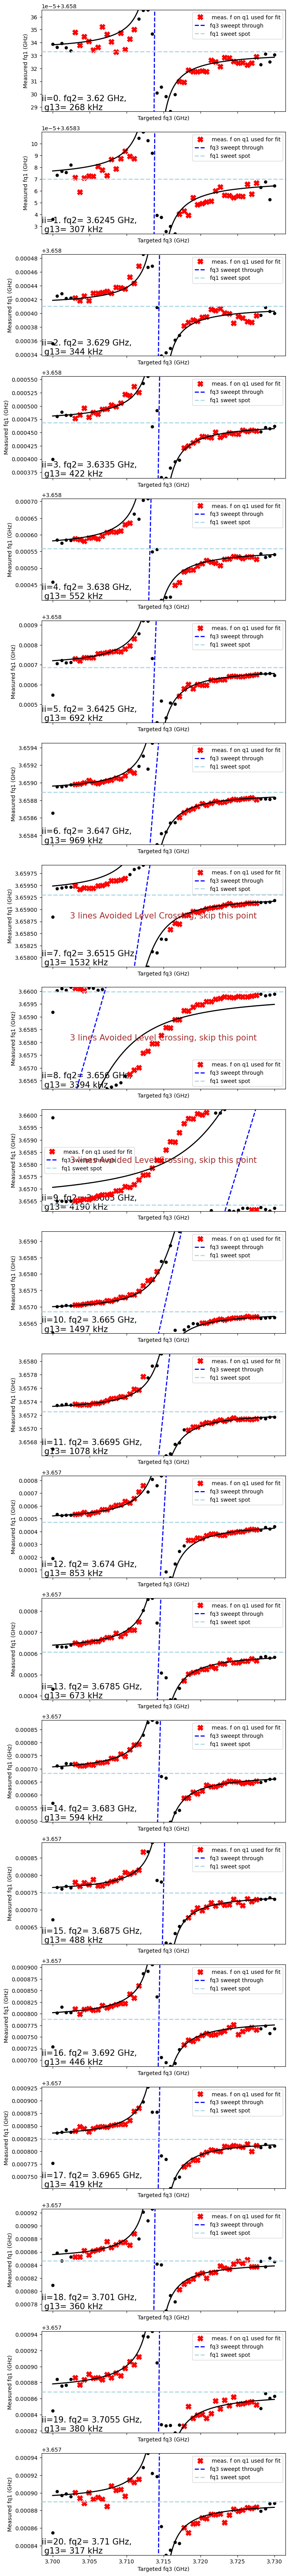

In [23]:
fig, ax = plt.subplots(fq2_set_vec.size, 1, figsize = (8, fq2_set_vec.size*4), sharex = True)

for ii in range(fq2_set_vec.size):
    
    ax[ii].plot(fq3_set[ii], fq1_meas[ii], color='black',marker='o',ls='',ms=5,zorder=10)
    ax[ii].plot(fq3_set_below[ii][5:-4], fq1_meas_below[ii][5:-4], color='red',marker='X',ls='',ms=10,zorder=10, label=' meas. f on q1 used for fit')
    ax[ii].plot(fq3_set_above[ii][5:-4], fq1_meas_above[ii][5:-4], color='red',marker='X',ls='',ms=10,zorder=10)
    
    ax[ii].plot(fq3_set[ii], lin_fit(fq3_set[ii],m_2[ii],n_2[ii]), color='blue',marker='',ls='--',lw=2,ms=10,zorder=10,label='fq3 sweept through')
    ax[ii].axhline(y=mean_fq1_meas[ii], color='lightblue',marker='',ls='--',lw=2,ms=10,zorder=10,label='fq1 sweet spot')
 
    ax[ii].plot(fq3_set__for_plotting, E__list[ii], color='black', lw=2, zorder=20)

    ax[ii].set_ylim([np.min(fq1_meas[ii]),np.max(fq1_meas[ii])])
    
    ax[ii].set_xlabel('Targeted fq3 (GHz)')
    ax[ii].set_ylabel('Measured fq1 (GHz)')
    
    
    ax[ii].text(s='ii={}. fq2= {} GHz,\n g13= {:.0f} kHz'.format(ii, fq2_set_vec[ii], res__list[ii].x[0]*1e6),x=ax[ii].get_xlim()[0],y=ax[ii].get_ylim()[0],ha='left',va='bottom',size=15)
    
    if ii==7 or ii==8 or ii==9:
        ax[ii].text(s='3 lines Avoided Level Crossing, skip this point',x=np.mean(ax[ii].get_xlim()),y=np.mean(ax[ii].get_ylim()),size=15,color='brown',ha='center',va='center', zorder=100)
    ax[ii].legend()

## Avoided Level Crossings from Ramsey
Cooldown in March 2024

### Verify q3 frequency with spectroscopy
frequencies were extracted with lorentzian from spectroscopy

In [24]:
curr_vec = np.arange(240.0e-6, 244.5e-6, 0.1e-6)
fq3_spec = np.array([3.65860453, 3.65913284, 3.65965414, 3.6607432 , 3.66129423,3.66235602, 3.66242991, 3.66407531, 3.6646679 , 3.66600303,       3.66654674, 3.66793673, 3.6687211 , 3.66941443, 3.67089137,       3.67069701, 3.6728879 , 3.67347711, 3.6744251 , 3.67454197,       3.67588941, 3.67702244, 3.67809341, 3.67868274, 3.67991481,       3.68063152, 3.68153118, 3.6818882 , 3.68355839, 3.6832763 ,       3.68524441, 3.68562063, 3.68654276, 3.6877386 , 3.6886428 ,       3.68928779, 3.69070564, 3.69146393, 3.69302228, 3.69338976,       3.69443558, 3.69462069, 3.69642569, 3.69686062, 3.6970656 ])
gam_q3_spec = np.array([0.00212227, 0.00218348, 0.0013658 , 0.00303992, 0.00202732, 0.00202859, 0.00191255, 0.00158524, 0.00232625, 0.00185221,      0.0019757 , 0.00240017, 0.00215746, 0.00138062, 0.00186761,       0.00244534, 0.00198745, 0.00246875, 0.00181871, 0.0014157 ,       0.00158353, 0.00300898, 0.00216578, 0.00117239, 0.00149835,       0.00157641, 0.00198568, 0.00138843, 0.00159448, 0.00174568,       0.0019713 , 0.00158525, 0.00197437, 0.00110434, 0.00111593,       0.00206202, 0.00234178, 0.00261388, 0.00186173, 0.00201407,       0.0019261 , 0.00173709, 0.00206015, 0.0017414 , 0.0023876 ])


popt_q3,pcov_q3 = curve_fit(lin_fit, curr_vec, fq3_spec)
m_q3 = popt_q3[0]
n_q3 = popt_q3[1]

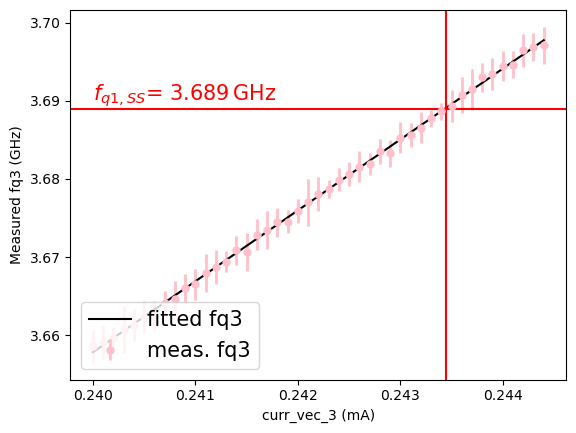

In [25]:
TextSize = 15

plt.errorbar(curr_vec*1e3, fq3_spec, gam_q3_spec,ls='',color='pink',lw=2,ms=5,marker='o',label='meas. fq3')
plt.plot(curr_vec*1e3, lin_fit(curr_vec,m_q3,n_q3),color='black',label='fitted fq3')
plt.text(s='$f_{q1,SS}$'+'= {:.3f}$\,$GHz'.format(fq_q1_fit),x=np.min(curr_vec)*1e3,y=fq_q1_fit,color='red',fontsize = TextSize,ha='left',va='bottom')
plt.axhline(y=fq_q1_fit, color = 'red')
plt.axvline(243.45*1e-3, color = 'red')

plt.ylabel('Measured fq3 (GHz)')
plt.xlabel('curr_vec_3 (mA)')
plt.legend(fontsize=TextSize,loc = 'lower left')
plt.show()

### Coupler OFF, q1 at SS, q2 at SS, q3 sweept trough
fq1 is measured with Ramsey <br>
fq1 = fq3 $\approx$ 3.689 GHz <br> fq2 $\approx$ 3.44 GHz

We keep q1 at its half-flux point ~ 3.69 GHz and move q2 to its half-flux point ~3.44 GHz such that they are 100's Mhz detuned. Then we sweep q3 through q1 and try to measure the frequency of qubit 1 as precisely as possible via Ramsey interferometry. Notice the different scale of the y axis which is now showing kHz differences. It is not possible to measure clear anticrossings but we observe a change of f_q1 once q3 moves through q1 which indicates the "small" cross-talk

In [26]:
curr_vec3 = np.array([0.00024315, 0.00024316, 0.00024317, 0.00024318, 0.00024319,0.0002432 , 0.00024321, 0.00024322, 0.00024323, 0.00024324,0.00024325, 0.00024326, 0.00024327, 0.00024328, 0.00024329,       0.0002433 , 0.00024331, 0.00024332, 0.00024333, 0.00024334,       0.00024335, 0.00024336, 0.00024337, 0.00024338, 0.00024339,       0.0002434 , 0.00024341, 0.00024342, 0.00024343, 0.00024344,       0.00024345, 0.00024346, 0.00024347, 0.00024348, 0.00024349,       0.0002435 , 0.00024351, 0.00024352, 0.00024353, 0.00024354,       0.00024355, 0.00024356, 0.00024357, 0.00024358, 0.00024359,       0.0002436 , 0.00024361, 0.00024362, 0.00024363, 0.00024364,       0.00024365, 0.00024366, 0.00024367, 0.00024368])
fq1_ram_off = np.array([3.68911592, 3.68911695, 3.68911468, 3.68911486, 3.68911432, 3.68911599, 3.68911611, 3.68911446, 3.68911398, 3.68911651,       3.68911551, 3.68911643, 3.689117  , 3.68911569, 3.68911619,       3.68911788, 3.68911683, 3.68911725, 3.6891189 , 3.68911787,       3.68911803, 3.68911747, 3.68911886, 3.68911943, 3.68911815,       3.68911677, 3.68911503, 3.68911535, 3.6891159 , 3.68911481,       3.68911157, 3.68911414, 3.6891135 , 3.68911117, 3.68911149,       3.68911006, 3.68911097, 3.68911304, 3.68911131, 3.68911136,       3.68911061, 3.6891097 , 3.68911189, 3.68911175, 3.68911275,       3.68911227, 3.68911188, 3.68911255, 3.68911334, 3.68911526,       3.68911303, 3.6891118 , 3.68911178, 3.689114  ])
idx_swapp = 29

def cost_function(g, idx_swapp, f0_guess, f1_guess, f0_sim):
    g01 = g[0]
    
    idx_0 = 0#idx_swapp-5
    idx_1 = -1#idx_swapp+5
    idx_off = 4
    
    E, v = Sweep_f0(f0_guess, f1_guess, g01)
    
#    plt.plot(curr_vec3[idx_0:idx_swapp-idx_off],f0_sim[idx_0:idx_swapp-idx_off], color='red',ls='',marker='o')
#    plt.plot(curr_vec3[idx_swapp+idx_off:idx_1],f0_sim[idx_swapp+idx_off:idx_1], color='orange',ls='',marker='o')
#    for ii in range(0,len(f0_sim)):
#        plt.text(s=ii,x=curr_vec[ii],y=f0_sim[ii],ha='center',va='center',color='black')
#    plt.plot(curr_vec3,f0_guess, color='green',ls=':')
#    plt.axhline(y=f1_guess, color='green',ls=':')   
#    plt.plot(curr_vec3[idx_0:idx_swapp-idx_off],E[idx_0:idx_swapp-idx_off,1], color='darkblue',ls='--')
#    plt.plot(curr_vec3[idx_swapp+idx_off:idx_1],E[idx_swapp+idx_off:idx_1,0], color='lightblue',ls='--')
#    plt.axvline(x=curr_ac,ls='--',color='pink')
#    plt.ylim(np.min(f0_sim),np.max(f0_sim))
#    plt.show()   
    return np.sum( np.abs((f0_sim[idx_0:idx_swapp-idx_off]-E[idx_0:idx_swapp-idx_off,1]))) + np.sum( np.abs((f0_sim[idx_swapp+idx_off:idx_1]-E[idx_swapp+idx_off:idx_1,0])) )


g0 = [50*1e-6]
g_bounds = [(0,0.1)]

res_ram_off = minimize(cost_function, g0, args = (idx_swapp, lin_fit(curr_vec3, m_q3, n_q3), np.mean(fq1_ram_off), fq1_ram_off),
                    method = 'Nelder-Mead', bounds = g_bounds, tol = 1e-11, options = {'maxiter': 1000} )

E_ram_off, v_ram_off = Sweep_f0(lin_fit(curr_vec3, m_q3, n_q3), np.mean(fq1_ram_off), res_ram_off.x[0])

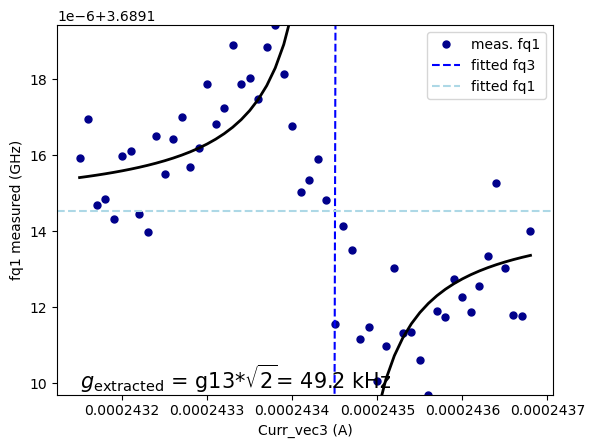

In [27]:
plt.plot(curr_vec3,fq1_ram_off,color='darkblue',marker='o',ms=5,ls='',label='meas. fq1')
plt.plot(curr_vec3,lin_fit(curr_vec3, m_q3, n_q3),color='blue',ls='--', label='fitted fq3')
plt.axhline(y=np.mean(fq1_ram_off),color='lightblue',ls='--', label='fitted fq1')

plt.plot(curr_vec3,E_ram_off,color='black',ls='-',lw=2)

plt.ylim(np.min(fq1_ram_off),np.max(fq1_ram_off))
plt.ylabel('fq1 measured (GHz)')
plt.xlabel('Curr_vec3 (A)')
plt.legend()
plt.text(s=r'$g_\mathrm{extracted}$ = g13*$\sqrt{2}$'+'= {:.1f} kHz'.format(res_ram_off.x[0]*1e6),x=np.min(curr_vec3),y=np.min(fq1_ram_off),ha='left',va='bottom',size=15)
plt.show()

### Coupler ON, q1 & q3 on resonance, q2 sweept trough
fq1 is measured with Ramsey <br>
fq1 = fq2 = fq3 $\approx$ 3.689 GHz

<img src='./img/pulse_sequence_2.png'> 

In [28]:
idx_0 = 0
idx_ac_low = 37
idx_ac_up = 43
idx_1 = -1

amp_avl_on_list = np.array([0.4  , 0.401, 0.402, 0.403, 0.404, 0.405, 0.406, 0.407, 0.408,       0.409, 0.41 , 0.411, 0.412, 0.413, 0.414, 0.415, 0.416, 0.417,       0.418, 0.419, 0.42 , 0.421, 0.422, 0.423, 0.424, 0.425, 0.426,       0.427, 0.428, 0.429, 0.43 , 0.431, 0.432, 0.433, 0.434, 0.435,       0.436, 0.437, 0.438, 0.439, 0.44 , 0.441, 0.442, 0.443, 0.444,       0.445, 0.446, 0.447, 0.448, 0.449, 0.45 , 0.451, 0.452, 0.453,       0.454, 0.455, 0.456, 0.457, 0.458, 0.459, 0.46 , 0.461, 0.462,       0.463, 0.464, 0.465, 0.466, 0.467, 0.468, 0.469, 0.47 , 0.471,       0.472, 0.473, 0.474, 0.475, 0.476, 0.477, 0.478, 0.479])
f_avl_on_list = np.array([ 0.2414105 ,  0.24702816,  0.25809639,  0.26645106,  0.27654527,        0.28657829,  0.29525754,  0.30346747,  0.31613294,  0.32509219,        0.34025484,  0.36253476,  0.37777594,  0.39557288,  0.4098181 ,        0.4313585 ,  0.45238566,  0.47648433,  0.50291769,  0.53288837,        0.56414312,  0.59652742,  0.63595258,  0.67966465,  0.72498461,        0.77803105,  0.83735915,  0.90420496,  0.97948619,  1.06733324,        1.16557327,  1.27670067,  1.42789563,  1.59561196,  1.75383057,        2.02142893,  2.30295332,  2.62979483,  2.90539618,  3.53862379,        2.29338519,  0.70032582,  6.82286546, -1.14098111, -1.03329558,       -0.93737636, -0.88303797, -0.79375113, -0.73089766, -0.68627971,       -0.63863959, -0.5903874 , -0.55239427, -0.5181564 , -0.48748709,       -0.47213568, -0.44792681, -0.43547257, -0.41417444, -0.39559664,       -0.37513357, -0.35892149, -0.3463729 , -0.33581933, -0.32634075,       -0.32101097, -0.31091201, -0.30486913, -0.29596278, -0.28896918,       -0.28119169, -0.27289193, -0.26509415, -0.2549178 , -0.25091491,       -0.23989022, -0.23588731, -0.22948044, -0.22072372, -0.21645817])


##### Translate V_fbl into fq2

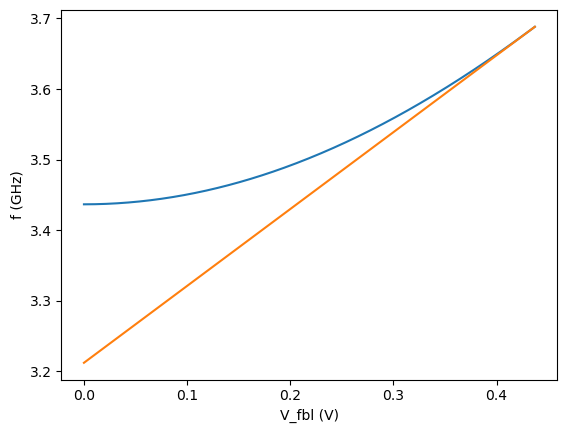

In [29]:
def lin_fit(x,m,n):
    return(m*x+n)

def FKT__find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


phi_lookup = np.linspace(0, 1, 20001)
fq_c2_fit__vs__flux = np.array([10.51465169138978, 10.51465165339161, 10.514651539396908, 10.514651349405426, 10.514651083417334, 10.514650741432632, 10.514650323451406, 10.514649829473512, 10.514649259499038, 10.514648613527868, 10.514647891559832, 10.514647093595016, 10.514646219633448, 10.5146452696751, 10.514644243719687, 10.514643141767351, 10.514641963818036, 10.514640709871628, 10.514639379927985, 10.51463797398722, 10.514636492049135, 10.514634934113644, 10.514633300180606, 10.514631590250133, 10.514629804321999, 10.514627942396118, 10.514626004472348, 10.514623990550575, 10.51462190063097, 10.51461973471308, 10.514617492796845, 10.514615174882294, 10.514612780969145, 10.514610311057481, 10.51460776514682, 10.51460514323739, 10.514602445328933, 10.51459967142111, 10.514596821513976, 10.51459389560739, 10.514590893701154, 10.514587815795068, 10.51458466188896, 10.514581431982748, 10.514578126076032, 10.514574744168925, 10.514571286261202, 10.51456775235252, 10.514564142442794, 10.514560456531854, 10.514556694619387, 10.51455285670525, 10.51454894278919, 10.514544952871177, 10.514540886950954, 10.514536745028067, 10.514532527102318, 10.514528233173934, 10.51452386324226, 10.514519417306985, 10.51451489536828, 10.51451029742546, 10.514505623478698, 10.514500873527368, 10.514496047571498, 10.514491145610776, 10.514486167644748, 10.51448111367327, 10.514475983696144, 10.514470777713, 10.514465495723613, 10.514460137727696, 10.514454703724851, 10.514449193715052, 10.514443607697643, 10.514437945672626, 10.5144322076396, 10.514426393598143, 10.514420503548138, 10.514414537489131, 10.514408495420838, 10.514402377342918, 10.514396183255059, 10.514389913156975, 10.514383567048299, 10.514377144928659, 10.514370646797772, 10.514364072655127, 10.514357422500638, 10.514350696333736, 10.514343894154223, 10.514337015961559, 10.514330061755402, 10.514323031535525, 10.514315925301446, 10.514308743052737, 10.514301484789172, 10.514294150510182, 10.51428674021551, 10.514279253904647, 10.514271691577278, 10.514264053233092, 10.514256338871405, 10.514248548491992, 10.51424068209434, 10.514232739678192, 10.514224721243039, 10.514216626788254, 10.514208456313781, 10.514200209818881, 10.514191887303241, 10.51418348876632, 10.51417501420786, 10.514166463627209, 10.51415783702395, 10.514149134397655, 10.51414035574783, 10.51413150107404, 10.514122570375791, 10.514113563652614, 10.514104480904024, 10.514095322129515, 10.514086087328618, 10.514076776500831, 10.51406738964565, 10.514057926762547, 10.514048387850892, 10.514038772910538, 10.514029081940834, 10.514019314941123, 10.514009471910782, 10.513999552849526, 10.513989557756787, 10.513979486631996, 10.513969339474528, 10.513959116283928, 10.513948817059685, 10.513938441801116, 10.513927990507739, 10.513917463179041, 10.513906859814398, 10.513896180413184, 10.513885424975086, 10.51387459349911, 10.513863685985001, 10.513852702432104, 10.513841642839736, 10.51383050720736, 10.51381929553449, 10.51380800782033, 10.513796644064342, 10.513785204266014, 10.513773688424664, 10.513762096539665, 10.513750428610393, 10.513738684636252, 10.513726864616416, 10.51371496855063, 10.513702996438013, 10.513690948277912, 10.513678824069785, 10.513666623812782, 10.513654347506446, 10.51364199515021, 10.513629566743248, 10.51361706228468, 10.513604481774308, 10.513591825211051, 10.513579092594455, 10.513566283923836, 10.513553399198372, 10.513540438417465, 10.513527401580461, 10.513514288686622, 10.513501099735095, 10.513487834725424, 10.513474493656787, 10.51346107652833, 10.513447583339541, 10.513434014089569, 10.51342036877773, 10.513406647403428, 10.513392849965669, 10.513378976463827, 10.513365026897247, 10.51335100126505, 10.513336899566639, 10.51332272180096, 10.513308467967505, 10.513294138065447, 10.51327973209419, 10.513265250052683, 10.513250691940158, 10.513236057756046, 10.513221347499467, 10.513206561169568, 10.513191698765553, 10.51317676028674, 10.51316174573222, 10.513146655101224, 10.51313148839293, 10.513116245606653, 10.513100926741345, 10.513085531796378, 10.513070060770815, 10.513054513663889, 10.513038890474775, 10.513023191202535, 10.513007415846317, 10.512991564405581, 10.512975636878963, 10.512959633265979, 10.51294355356572, 10.512927397777275, 10.512911165899823, 10.512894857932423, 10.512878473874224, 10.512862013724401, 10.51284547748196, 10.512828865145906, 10.51281217671567, 10.512795412190343, 10.512778571568788, 10.512761654850124, 10.512744662033612, 10.512727593118228, 10.512710448103064, 10.512693226987238, 10.512675929769728, 10.512658556449622, 10.512641107026212, 10.512623581498275, 10.51260597986493, 10.512588302125494, 10.512570548278717, 10.512552718323633, 10.512534812259531, 10.512516830085247, 10.512498771799898, 10.51248063740249, 10.512462426892, 10.512444140267519, 10.512425777528165, 10.512407338672716, 10.512388823700434, 10.512370232610124, 10.512351565400905, 10.512332822071585, 10.512314002621423, 10.512295107049283, 10.512276135354142, 10.512257087535062, 10.51223796359099, 10.512218763520707, 10.512199487323329, 10.51218013499792, 10.51216070654337, 10.512141201958656, 10.512121621242613, 10.512101964394276, 10.512082231412563, 10.512062422296424, 10.512042537044891, 10.512022575656744, 10.512002538131014, 10.51198242446668, 10.511962234662406, 10.511941968717366, 10.511921626630453, 10.511901208400332, 10.511880714026205, 10.51186014350671, 10.511839496840992, 10.511818774027716, 10.511797975066031, 10.511777099954429, 10.511756148692228, 10.511735121278093, 10.51171401771083, 10.511692837989386, 10.511671582112655, 10.511650250079413, 10.51162884188858, 10.511607357538992, 10.511585797029596, 10.511564160359, 10.511542447526097, 10.511520658529804, 10.511498793369071, 10.511476852042506, 10.511454834549028, 10.511432740887443, 10.511410571056615, 10.511388325055236, 10.51136600288217, 10.511343604536165, 10.511321130016228, 10.511298579320908, 10.511275952449068, 10.511253249399488, 10.511230470171057, 10.511207614762498, 10.511184683172303, 10.511161675399734, 10.51113859144317, 10.51111543130159, 10.511092194973628, 10.51106888245809, 10.511045493753613, 10.51102202885923, 10.510998487773293, 10.510974870494834, 10.510951177022491, 10.51092740735487, 10.510903561490807, 10.510879639429191, 10.510855641168433, 10.510831566707424, 10.510807416044685, 10.510783189179165, 10.510758886109357, 10.510734506834154, 10.510710051352106, 10.510685519662019, 10.510660911762358, 10.5106362276519, 10.510611467329369, 10.510586630793512, 10.510561718042766, 10.510536729076023, 10.510511663891748, 10.510486522488833, 10.510461304865544, 10.510436011021028, 10.51041064095341, 10.510385194661694, 10.510359672144318, 10.510334073400003, 10.510308398427412, 10.51028264722504, 10.510256819791607, 10.510230916125693, 10.510204936225875, 10.510178880090706, 10.510152747718934, 10.510126539109137, 10.510100254259754, 10.510073893169505, 10.510047455836855, 10.510020942260468, 10.509994352439008, 10.509967686370857, 10.509940944054733, 10.509914125489075, 10.509887230672518, 10.509860259603641, 10.509833212280824, 10.509806088702902, 10.509778888868254, 10.50975161277529, 10.509724260422672, 10.509696831809066, 10.50966932693268, 10.50964174579238, 10.509614088386314, 10.509586354713377, 10.509558544771876, 10.509530658560273, 10.50950269607716, 10.509474657321013, 10.5094465422903, 10.509418350983514, 10.50939008339915, 10.509361739535702, 10.509333319391615, 10.509304822965358, 10.50927625025544, 10.50924760126028, 10.509218875978373, 10.509190074408142, 10.509161196548039, 10.509132242396543, 10.50910321195207, 10.509074105213042, 10.509044922177916, 10.509015662845137, 10.508986327213119, 10.508956915280256, 10.508927427045013, 10.508897862505734, 10.50886822166089, 10.508838504508896, 10.508808711048072, 10.508778841276923, 10.508748895193747, 10.508718872796976, 10.508688774085, 10.508658599056186, 10.508628347708903, 10.508598020041532, 10.508567616052453, 10.508537135740028, 10.508506579102573, 10.508475946138477, 10.508445236846146, 10.50841445122382, 10.508383589269906, 10.508352650982735, 10.508321636360616, 10.508290545401904, 10.508259378104945, 10.508228134468023, 10.508196814489486, 10.508165418167607, 10.508133945500742, 10.508102396487148, 10.50807077112518, 10.508039069413094, 10.508007291349188, 10.507975436931796, 10.507943506159158, 10.507911499029554, 10.507879415541282, 10.507847255692598, 10.50781501948176, 10.507782706907072, 10.507750317966753, 10.507717852659077, 10.507685310982318, 10.507652692934677, 10.507619998514416, 10.507587227719803, 10.507554380549028, 10.507521457000346, 10.50748845707199, 10.507455380762144, 10.507422228069096, 10.507388998990997, 10.507355693526067, 10.507322311672562, 10.507288853428612, 10.507255318792454, 10.507221707762302, 10.507188020336288, 10.507154256512653, 10.507120416289549, 10.507086499665125, 10.507052506637619, 10.507018437205156, 10.506984291365917, 10.506950069118052, 10.506915770459745, 10.506881395389087, 10.506846943904293, 10.506812416003445, 10.506777811684739, 10.506743130946283, 10.5067083737862, 10.506673540202636, 10.506638630193708, 10.506603643757526, 10.506568580892196, 10.50653344159589, 10.5064982258666, 10.506462933702537, 10.50642756510175, 10.506392120062355, 10.506356598582407, 10.506321000660005, 10.50628532629323, 10.506249575480165, 10.506213748218922, 10.506177844507484, 10.506141864343988, 10.506105807726438, 10.506069674652949, 10.506033465121535, 10.505997179130238, 10.50596081667712, 10.505924377760223, 10.505887862377563, 10.505851270527206, 10.505814602207147, 10.50577785741541, 10.505741036150033, 10.505704138408985, 10.50566716419035, 10.505630113492082, 10.505592986312209, 10.505555782648699, 10.505518502499541, 10.505481145862774, 10.505443712736351, 10.505406203118229, 10.505368617006445, 10.505330954398914, 10.505293215293653, 10.505255399688583, 10.505217507581682, 10.505179538970921, 10.505141493854232, 10.505103372229561, 10.50506517409488, 10.505026899448069, 10.504988548287118, 10.504950120609927, 10.504911616414484, 10.50487303569862, 10.50483437846032, 10.504795644697476, 10.504756834407972, 10.504717947589752, 10.504678984240709, 10.504639944358747, 10.504600827941735, 10.504561634987578, 10.504522365494143, 10.50448301945936, 10.504443596881028, 10.504404097757076, 10.504364522085382, 10.504324869863773, 10.504285141090104, 10.504245335762267, 10.5042054538781, 10.50416549543543, 10.504125460432114, 10.504085348865992, 10.504045160734922, 10.504004896036689, 10.503964554769144, 10.503924136930092, 10.503883642517378, 10.503843071528806, 10.50380242396218, 10.503761699815312, 10.50372089908597, 10.503680021771988, 10.503639067871152, 10.503598037381249, 10.503556930300057, 10.503515746625387, 10.503474486354971, 10.503433149486598, 10.503391736018028, 10.503350245947017, 10.503308679271374, 10.50326703598879, 10.503225316097051, 10.503183519593907, 10.503141646477061, 10.503099696744316, 10.503057670393355, 10.503015567421935, 10.50297338782773, 10.502931131608527, 10.502888798762005, 10.502846389285896, 10.502803903177899, 10.502761340435711, 10.50271870105705, 10.502675985039582, 10.502633192381044, 10.502590323079096, 10.502547377131398, 10.502504354535677, 10.50246125528958, 10.502418079390786, 10.50237482683695, 10.502331497625736, 10.502288091754846, 10.502244609221874, 10.502201050024464, 10.502157414160349, 10.502113701627055, 10.502069912422321, 10.502026046543719, 10.501982103988878, 10.501938084755446, 10.501893988841038, 10.501849816243256, 10.501805566959717, 10.501761240988037, 10.501716838325834, 10.501672358970673, 10.501627802920176, 10.501583170171905, 10.501538460723468, 10.501493674572446, 10.501448811716408, 10.501403872152927, 10.501358855879612, 10.50131376289396, 10.501268593193586, 10.501223346776012, 10.501178023638804, 10.501132623779545, 10.501087147195712, 10.501041593884889, 10.500995963844597, 10.500950257072379, 10.500904473565752, 10.50085861332225, 10.500812676339384, 10.500766662614677, 10.500720572145609, 10.500674404929716, 10.500628160964492, 10.500581840247449, 10.500535442776055, 10.500488968547819, 10.500442417560212, 10.500395789810716, 10.500349085296829, 10.500302304015985, 10.500255445965687, 10.500208511143377, 10.500161499546525, 10.500114411172579, 10.500067246018986, 10.500020004083225, 10.4999726853627, 10.499925289854861, 10.499877817557161, 10.499830268467003, 10.499782642581838, 10.499734939899055, 10.499687160416084, 10.499639304130369, 10.49959137103929, 10.499543361140224, 10.499495274430625, 10.499447110907868, 10.499398870569335, 10.49935055341242, 10.499302159434507, 10.499253688632969, 10.499205141005193, 10.499156516548547, 10.499107815260393, 10.499059037138077, 10.499010182178976, 10.498961250380455, 10.498912241739841, 10.498863156254487, 10.498813993921729, 10.498764754738904, 10.498715438703343, 10.498666045812392, 10.498616576063347, 10.498567029453563, 10.49851740598032, 10.49846770564094, 10.498417928432739, 10.498368074353023, 10.498318143399043, 10.498268135568157, 10.498218050857627, 10.498167889264723, 10.498117650786746, 10.498067335421, 10.49801694316469, 10.497966474015131, 10.497915927969576, 10.497865305025268, 10.497814605179519, 10.497763828429505, 10.49771297477253, 10.4976620442058, 10.497611036726585, 10.4975599523321, 10.497508791019564, 10.497457552786233, 10.497406237629297, 10.497354845545999, 10.497303376533551, 10.497251830589153, 10.497200207709989, 10.497148507893284, 10.497096731136237, 10.49704487743602, 10.496992946789842, 10.496940939194879, 10.496888854648295, 10.496836693147273, 10.496784454688983, 10.496732139270605, 10.496679746889289, 10.496627277542197, 10.496574731226467, 10.496522107939247, 10.496469407677715, 10.496416630438972, 10.496363776220191, 10.496310845018463, 10.496257836830933, 10.49620475165475, 10.496151589486992, 10.49609835032477, 10.496045034165254, 10.49599164100551, 10.49593817084262, 10.495884623673708, 10.495830999495865, 10.495777298306184, 10.495723520101716, 10.495669664879594, 10.495615732636852, 10.495561723370585, 10.495507637077854, 10.495453473755715, 10.495399233401226, 10.495344916011437, 10.495290521583442, 10.49523605011425, 10.495181501600877, 10.495126876040397, 10.495072173429854, 10.495017393766267, 10.494962537046629, 10.494907603267983, 10.49485259242736, 10.494797504521722, 10.494742339548143, 10.494687097503599, 10.494631778385058, 10.494576382189546, 10.494520908914057, 10.494465358555566, 10.494409731111052, 10.49435402657748, 10.494298244951878, 10.494242386231127, 10.494186450412268, 10.494130437492224, 10.49407434746795, 10.494018180336425, 10.49396193609455, 10.493905614739326, 10.493849216267634, 10.49379274067646, 10.49373618796267, 10.493679558123274, 10.493622851155104, 10.49356606705514, 10.493509205820267, 10.493452267447417, 10.493395251933466, 10.493338159275307, 10.493280989469865, 10.493223742514015, 10.493166418404662, 10.493109017138648, 10.493051538712908, 10.492993983124258, 10.492936350369618, 10.492878640445792, 10.492820853349718, 10.492762989078209, 10.492705047628087, 10.492647028996254, 10.49258893317953, 10.49253076017476, 10.492472509978786, 10.492414182588394, 10.49235577800048, 10.492297296211813, 10.492238737219227, 10.492180101019525, 10.49212138760954, 10.492062596986056, 10.492003729145889, 10.491944784085808, 10.491885761802651, 10.491826662293152, 10.491767485554123, 10.491708231582338, 10.491648900374567, 10.49158949192762, 10.49153000623817, 10.491470443303072, 10.491410803119024, 10.49135108568283, 10.491291290991185, 10.491231419040862, 10.491171469828583, 10.491111443351105, 10.49105133960516, 10.490991158587438, 10.490930900294707, 10.490870564723643, 10.490810151870992, 10.490749661733465, 10.490689094307728, 10.490628449590517, 10.490567727578519, 10.490506928268431, 10.490446051656924, 10.490385097740695, 10.490324066516408, 10.490262957980766, 10.49020177213039, 10.490140508962023, 10.490079168472226, 10.490017750657742, 10.489956255515189, 10.489894683041218, 10.489833033232477, 10.489771306085588, 10.48970950159719, 10.489647619763936, 10.48958566058243, 10.489523624049312, 10.489461510161183, 10.489399318914671, 10.489337050306382, 10.489274704332901, 10.489212280990856, 10.48914978027683, 10.489087202187408, 10.489024546719193, 10.488961813868736, 10.488899003632673, 10.488836116007514, 10.488773150989875, 10.488710108576305, 10.488646988763369, 10.488583791547596, 10.48852051692559, 10.488457164893857, 10.488393735448948, 10.488330228587408, 10.488266644305785, 10.488202982600578, 10.48813924346836, 10.488075426905604, 10.488011532908828, 10.487947561474591, 10.487883512599385, 10.487819386279662, 10.487755182511988, 10.487690901292838, 10.487626542618697, 10.487562106486035, 10.487497592891375, 10.487433001831162, 10.487368333301868, 10.487303587299994, 10.487238763821967, 10.487173862864267, 10.487108884423364, 10.487043828495668, 10.486978695077656, 10.486913484165786, 10.486848195756446, 10.486782829846135, 10.486717386431227, 10.486651865508176, 10.486586267073385, 10.486520591123268, 10.486454837654266, 10.486389006662764, 10.486323098145164, 10.48625711209789, 10.48619104851731, 10.486124907399821, 10.486058688741798, 10.485992392539647, 10.485926018789726, 10.485859567488415, 10.485793038632094, 10.485726432217085, 10.485659748239799, 10.485592986696549, 10.485526147583695, 10.4854592308976, 10.4853922366346, 10.485325164791034, 10.48525801536321, 10.485190788347502, 10.485123483740178, 10.485056101537602, 10.484988641736077, 10.484921104331917, 10.484853489321395, 10.484785796700873, 10.484718026466592, 10.484650178614888, 10.484582253141998, 10.484514250044267, 10.484446169317925, 10.484378010959281, 10.484309774964597, 10.484241461330122, 10.484173070052138, 10.484104601126917, 10.484036054550675, 10.483967430319675, 10.483898728430162, 10.48382994887838, 10.483761091660556, 10.483692156772957, 10.48362314421174, 10.483554053973196, 10.483484886053509, 10.483415640448888, 10.483346317155569, 10.48327691616974, 10.483207437487568, 10.483137881105323, 10.48306824701913, 10.4829985352252, 10.482928745719722, 10.482858878498886, 10.482788933558808, 10.482718910895725, 10.482648810505772, 10.482578632385103, 10.482508376529879, 10.48243804293626, 10.482367631600386, 10.482297142518394, 10.482226575686429, 10.482155931100646, 10.48208520875712, 10.482014408652025, 10.481943530781443, 10.481872575141525, 10.481801541728363, 10.481730430538084, 10.48165924156676, 10.48158797481049, 10.481516630265402, 10.481445207927557, 10.48137370779305, 10.481302129857973, 10.481230474118348, 10.481158740570311, 10.481086929209901, 10.481015040033194, 10.480943073036203, 10.480871028215041, 10.48079890556571, 10.480726705084297, 10.480654426766801, 10.480582070609305, 10.480509636607769, 10.480437124758293, 10.480364535056838, 10.48029186749948, 10.480219122082183, 10.480146298800989, 10.48007339765188, 10.480000418630906, 10.479927361733973, 10.479854226957144, 10.479781014296375, 10.479707723747659, 10.479634355306962, 10.479560908970278, 10.479487384733547, 10.479413782592752, 10.479340102543864, 10.479266344582815, 10.479192508705541, 10.479118594908034, 10.479044603186226, 10.47897053353601, 10.478896385953362, 10.478822160434182, 10.47874785697444, 10.478673475570005, 10.478599016216812, 10.478524478910767, 10.478449863647773, 10.478375170423746, 10.47830039923458, 10.478225550076147, 10.478150622944355, 10.478075617835088, 10.47800053474421, 10.4779253736676, 10.47785013460115, 10.477774817540679, 10.477699422482086, 10.477623949421218, 10.477548398353926, 10.477472769276055, 10.477397062183442, 10.477321277071928, 10.47724541393738, 10.477169472775579, 10.47709345358235, 10.477017356353569, 10.476941181084985, 10.476864927772466, 10.476788596411781, 10.47671218699874, 10.476635699529153, 10.476559133998801, 10.476482490403475, 10.476405768738962, 10.47632896900103, 10.47625209118548, 10.476175135288045, 10.47609810130455, 10.476020989230678, 10.475943799062259, 10.475866530795006, 10.475789184424672, 10.475711759946996, 10.475634257357752, 10.475556676652609, 10.47547901782736, 10.4754012808777, 10.475323465799368, 10.475245572588062, 10.475167601239502, 10.475089551749388, 10.475011424113433, 10.474933218327305, 10.47485493438677, 10.47477657228745, 10.474698132025036, 10.47461961359525, 10.474541016993717, 10.474462342216146, 10.474383589258167, 10.474304758115501, 10.474225848783739, 10.474146861258568, 10.474067795535653, 10.473988651610592, 10.473909429479049, 10.473830129136667, 10.473750750579061, 10.473671293801871, 10.473591758800715, 10.473512145571185, 10.473432454108936, 10.47335268440955, 10.473272836468636, 10.473192910281767, 10.47311290584458, 10.47303282315264, 10.472952662201534, 10.472872422986832, 10.472792105504137, 10.472711709748982, 10.472631235716973, 10.472550683403657, 10.472470052804587, 10.472389343915296, 10.47230855673139, 10.47222769124834, 10.472146747461755, 10.47206572536711, 10.471984624959958, 10.471903446235837, 10.47182218919028, 10.47174085381876, 10.471659440116829, 10.471577948079926, 10.471496377703655, 10.471414728983438, 10.471333001914807, 10.471251196493226, 10.471169312714188, 10.471087350573175, 10.47100531006569, 10.470923191187124, 10.470840993933034, 10.470758718298825, 10.470676364279974, 10.470593931871935, 10.470511421070142, 10.47042883187006, 10.470346164267108, 10.470263418256708, 10.47018059383432, 10.470097690995354, 10.47001470973525, 10.469931650049375, 10.469848511933193, 10.469765295382077, 10.469682000391456, 10.469598626956692, 10.469515175073205, 10.469431644736364, 10.469348035941564, 10.469264348684188, 10.469180582959604, 10.469096738763184, 10.469012816090299, 10.468928814936293, 10.468844735296535, 10.468760577166353, 10.468676340541117, 10.468592025416195, 10.468507631786876, 10.468423159648497, 10.46833860899641, 10.468253979825924, 10.46816927213236, 10.46808448591105, 10.467999621157267, 10.467914677866364, 10.467829656033597, 10.467744555654267, 10.467659376723688, 10.467574119237133, 10.467488783189893, 10.46740336857724, 10.467317875394425, 10.467232303636754, 10.467146653299492, 10.467060924377858, 10.466975116867134, 10.466889230762561, 10.466803266059392, 10.46671722275286, 10.46663110083819, 10.46654490031064, 10.466458621165422, 10.466372263397744, 10.466285827002842, 10.46619931197595, 10.466112718312214, 10.466026046006885, 10.465939295055144, 10.465852465452205, 10.465765557193235, 10.465678570273427, 10.465591504687957, 10.465504360432018, 10.465417137500754, 10.465329835889353, 10.46524245559297, 10.465154996606728, 10.46506745892585, 10.464979842545418, 10.464892147460631, 10.464804373666551, 10.464716521158408, 10.464628589931259, 10.464540579980243, 10.464452491300495, 10.464364323887121, 10.464276077735217, 10.464187752839948, 10.464099349196331, 10.464010866799498, 10.463922305644571, 10.463833665726604, 10.463744947040691, 10.463656149581883, 10.46356727334529, 10.463478318325965, 10.46338928451897, 10.463300171919377, 10.463210980522225, 10.463121710322572, 10.463032361315438, 10.462942933495894, 10.46285342685897, 10.462763841399694, 10.462674177113097, 10.462584433994182, 10.462494612037984, 10.462404711239495, 10.462314731593771, 10.46222467309576, 10.462134535740468, 10.462044319522924, 10.461954024438095, 10.461863650480959, 10.461773197646497, 10.461682665929699, 10.461592055325529, 10.461501365828937, 10.461410597434902, 10.461319750138358, 10.461228823934283, 10.461137818817603, 10.46104673478327, 10.460955571826222, 10.460864329941392, 10.46077300912371, 10.46068160936808, 10.460590130669429, 10.460498573022683, 10.460406936422757, 10.460315220864532, 10.460223426342914, 10.460131552852806, 10.460039600389075, 10.459947568946655, 10.459855458520398, 10.45976326910514, 10.45967100069583, 10.459578653287284, 10.459486226874354, 10.45939372145196, 10.459301137014894, 10.459208473558009, 10.459115731076178, 10.459022909564222, 10.458930009016955, 10.458837029429246, 10.458743970795894, 10.458650833111735, 10.458557616371554, 10.458464320570199, 10.458370945702438, 10.45827749176308, 10.458183958746938, 10.458090346648806, 10.457996655463472, 10.457902885185671, 10.45780903581024, 10.457715107331897, 10.457621099745449, 10.457527013045647, 10.45743284722725, 10.457338602284999, 10.45724427821366, 10.457149875007987, 10.45705539266266, 10.456960831172477, 10.456866190532137, 10.456771470736392, 10.456676671779903, 10.456581793657456, 10.45648683636372, 10.456391799893401, 10.456296684241199, 10.456201489401828, 10.456106215369983, 10.45601086214034, 10.455915429707561, 10.455819918066343, 10.455724327211367, 10.455628657137261, 10.455532907838744, 10.455437079310439, 10.455341171546998, 10.45524518454307, 10.455149118293328, 10.455052972792386, 10.45495674803487, 10.454860444015422, 10.454764060728664, 10.454667598169223, 10.454571056331702, 10.454474435210722, 10.454377734800872, 10.454280955096767, 10.454184096093007, 10.454087157784167, 10.453990140164844, 10.453893043229638, 10.453795866973064, 10.453698611389763, 10.453601276474279, 10.453503862221151, 10.453406368624965, 10.453308795680263, 10.453211143381584, 10.453113411723505, 10.4530156007005, 10.452917710307176, 10.45281974053801, 10.452721691387564, 10.452623562850329, 10.452525354920828, 10.452427067593565, 10.45232870086306, 10.452230254723787, 10.452131729170274, 10.452033124196994, 10.451934439798439, 10.451835675969079, 10.451736832703375, 10.451637909995839, 10.451538907840915, 10.451439826233061, 10.451340665166745, 10.45124142463641, 10.451142104636498, 10.451042705161466, 10.450943226205746, 10.450843667763753, 10.450744029829947, 10.450644312398735, 10.450544515464527, 10.450444639021754, 10.450344683064788, 10.450244647588097, 10.450144532586007, 10.450044338052955, 10.449944063983326, 10.449843710371505, 10.449743277211855, 10.44964276449877, 10.449542172226607, 10.449441500389726, 10.449340748982506, 10.449239917999282, 10.449139007434418, 10.449038017282277, 10.448936947537158, 10.448835798193425, 10.448734569245396, 10.448633260687412, 10.448531872513763, 10.4484304047188, 10.448328857296838, 10.448227230242141, 10.448125523549063, 10.448023737211846, 10.447921871224834, 10.447819925582293, 10.447717900278482, 10.447615795307733, 10.447513610664258, 10.447411346342339, 10.447309002336286, 10.447206578640328, 10.447104075248696, 10.447001492155657, 10.446898829355463, 10.446796086842333, 10.446693264610522, 10.44659036265422, 10.446487380967705, 10.446384319545182, 10.446281178380831, 10.446177957468878, 10.446074656803546, 10.445971276379028, 10.445867816189498, 10.445764276229175, 10.445660656492192, 10.445556956972803, 10.445453177665128, 10.445349318563375, 10.445245379661657, 10.445141360954185, 10.445037262435104, 10.44493308409853, 10.44482882593867, 10.444724487949612, 10.444620070125524, 10.444515572460508, 10.444410994948683, 10.44430633758423, 10.444201600361213, 10.44409678327375, 10.443991886315981, 10.443886909481956, 10.443781852765806, 10.443676716161614, 10.443571499663468, 10.443466203265462, 10.44336082696164, 10.443255370746092, 10.443149834612901, 10.443044218556121, 10.442938522569797, 10.442832746647987, 10.44272689078473, 10.442620954974087, 10.44251493921009, 10.44240884348678, 10.442302667798142, 10.442196412138255, 10.442090076501087, 10.441983660880702, 10.441877165271066, 10.441770589666218, 10.44166393406012, 10.441557198446782, 10.441450382820188, 10.441343487174342, 10.441236511503194, 10.441129455800723, 10.441022320060906, 10.440915104277705, 10.440807808445072, 10.440700432556975, 10.440592976607356, 10.440485440590143, 10.440377824499311, 10.440270128328754, 10.440162352072404, 10.440054495724212, 10.439946559278079, 10.439838542727943, 10.439730446067678, 10.4396222692912, 10.43951401239241, 10.43940567536522, 10.439297258203505, 10.43918876090113, 10.43908018345197, 10.43897152584996, 10.438862788088912, 10.43875397016271, 10.438645072065215, 10.438536093790269, 10.438427035331745, 10.438317896683465, 10.438208677839267, 10.438099378793, 10.437989999538495, 10.437880540069557, 10.437771000380007, 10.437661380463672, 10.43755168031438, 10.437441899925911, 10.437332039292059, 10.437222098406636, 10.437112077263423, 10.437001975856184, 10.436891794178736, 10.436781532224844, 10.436671189988239, 10.436560767462735, 10.436450264642081, 10.436339681520025, 10.436229018090298, 10.436118274346674, 10.436007450282865, 10.43589654589262, 10.435785561169691, 10.435674496107753, 10.435563350700567, 10.435452124941822, 10.435340818825255, 10.435229432344553, 10.4351179654934, 10.435006418265514, 10.434894790654571, 10.434783082654244, 10.434671294258266, 10.434559425460249, 10.4344474762539, 10.43433544663285, 10.434223336590799, 10.434111146121356, 10.433998875218215, 10.433886523874985, 10.433774092085327, 10.433661579842857, 10.433548987141236, 10.433436313974044, 10.433323560334928, 10.433210726217501, 10.433097811615358, 10.432984816522097, 10.43287174093134, 10.432758584836684, 10.432645348231668, 10.432532031109961, 10.432418633465044, 10.43230515529057, 10.43219159658007, 10.432077957327103, 10.43196423752522, 10.431850437168018, 10.431736556249012, 10.431622594761738, 10.431508552699745, 10.431394430056589, 10.431280226825752, 10.431165943000783, 10.431051578575195, 10.430937133542512, 10.430822607896213, 10.430708001629837, 10.430593314736853, 10.430478547210782, 10.43036369904506, 10.430248770233229, 10.430133760768715, 10.430018670645037, 10.42990349985563, 10.429788248393953, 10.429672916253471, 10.429557503427656, 10.42944200990991, 10.429326435693719, 10.42921078077247, 10.429095045139652, 10.428979228788664, 10.428863331712922, 10.428747353905846, 10.428631295360844, 10.428515156071313, 10.428398936030685, 10.42828263523232, 10.428166253669623, 10.428049791335964, 10.427933248224784, 10.42781662432937, 10.427699919643143, 10.427583134159454, 10.42746626787168, 10.427349320773152, 10.427232292857232, 10.42711518411728, 10.4269979945466, 10.426880724138542, 10.426763372886429, 10.426645940783585, 10.426528427823362, 10.426410833999022, 10.42629315930389, 10.426175403731298, 10.426057567274523, 10.425939649926839, 10.425821651681558, 10.425703572531956, 10.425585412471312, 10.42546717149289, 10.425348849589973, 10.425230446755815, 10.425111962983655, 10.424993398266771, 10.424874752598413, 10.424756025971789, 10.424637218380164, 10.424518329816774, 10.424399360274816, 10.424280309747521, 10.424161178228104, 10.424041965709806, 10.423922672185792, 10.423803297649263, 10.423683842093443, 10.423564305511501, 10.423444687896643, 10.423324989242014, 10.423205209540802, 10.423085348786193, 10.422965406971336, 10.422845384089374, 10.422725280133509, 10.422605095096824, 10.422484828972548, 10.42236448175372, 10.42224405343354, 10.422123544005109, 10.422002953461563, 10.421882281796005, 10.421761529001571, 10.421640695071346, 10.421519779998416, 10.421398783775905, 10.421277706396912, 10.421156547854496, 10.421035308141759, 10.420913987251746, 10.420792585177571, 10.420671101912259, 10.420549537448911, 10.420427891780536, 10.420306164900216, 10.42018435680098, 10.420062467475862, 10.419940496917931, 10.41981844512018, 10.419696312075654, 10.419574097777327, 10.419451802218276, 10.419329425391457, 10.41920696728991, 10.41908442790662, 10.418961807234565, 10.418839105266732, 10.418716321996126, 10.418593457415717, 10.41847051151845, 10.418347484297305, 10.418224375745263, 10.418101185855253, 10.417977914620248, 10.417854562033183, 10.417731128086968, 10.417607612774596, 10.417484016088958, 10.417360338022968, 10.41723657856957, 10.417112737721665, 10.416988815472175, 10.416864811813978, 10.416740726739988, 10.416616560243114, 10.416492312316192, 10.416367982952176, 10.41624357214387, 10.416119079884187, 10.415994506165985, 10.41586985098212, 10.415745114325466, 10.415620296188855, 10.415495396565124, 10.41537041544712, 10.415245352827691, 10.415120208699674, 10.414994983055847, 10.414869675889072, 10.414744287192148, 10.414618816957852, 10.414493265179052, 10.414367631848506, 10.414241916958998, 10.414116120503323, 10.41399024247428, 10.413864282864614, 10.413738241667131, 10.413612118874576, 10.413485914479704, 10.413359628475275, 10.413233260854057, 10.41310681160877, 10.412980280732159, 10.412853668216949, 10.412726974055898, 10.412600198241716, 10.412473340767121, 10.412346401624783, 10.412219380807475, 10.412092278307856, 10.411965094118642, 10.411837828232533, 10.411710480642196, 10.411583051340305, 10.411455540319553, 10.411327947572609, 10.411200273092117, 10.411072516870755, 10.410944678901178, 10.410816759176024, 10.410688757687945, 10.410560674429593, 10.410432509393551, 10.410304262572488, 10.410175933959032, 10.410047523545778, 10.409919031325309, 10.409790457290299, 10.409661801433298, 10.409533063746933, 10.409404244223769, 10.409275342856393, 10.409146359637386, 10.409017294559327, 10.408888147614789, 10.408758918796323, 10.408629608096495, 10.408500215507841, 10.408370741022942, 10.408241184634294, 10.408111546334478, 10.407981826115996, 10.407852023971367, 10.40772213989313, 10.407592173873805, 10.407462125905873, 10.407331995981869, 10.407201784094264, 10.407071490235577, 10.406941114398286, 10.406810656574853, 10.406680116757778, 10.40654949493953, 10.406418791112559, 10.406288005269346, 10.406157137402333, 10.406026187503981, 10.405895155566718, 10.405764041582994, 10.405632845545242, 10.405501567445894, 10.405370207277366, 10.405238765032072, 10.405107240702423, 10.404975634280854, 10.404843945759719, 10.404712175131442, 10.404580322388426, 10.404448387523024, 10.404316370527637, 10.404184271394628, 10.404052090116368, 10.403919826685232, 10.403787481093563, 10.403655053333726, 10.40352254339803, 10.403389951278877, 10.403257276968551, 10.403124520459428, 10.402991681743785, 10.402858760813952, 10.402725757662282, 10.40259267228105, 10.402459504662575, 10.40232625479914, 10.40219292268305, 10.402059508306566, 10.40192601166201, 10.401792432741619, 10.401658771537683, 10.40152502804248, 10.401391202248254, 10.401257294147248, 10.40112330373174, 10.400989230993932, 10.400855075926096, 10.400720838520451, 10.400586518769236, 10.400452116664654, 10.400317632198945, 10.400183065364285, 10.400048416152899, 10.399913684556992, 10.399778870568737, 10.399643974180353, 10.399508995383998, 10.39937393417186, 10.399238790536119, 10.399103564468918, 10.398968255962409, 10.3988328650088, 10.398697391600193, 10.398561835728755, 10.398426197386614, 10.398290476565903, 10.398154673258768, 10.398018787457312, 10.397882819153665, 10.397746768339907, 10.397610635008203, 10.397474419150596, 10.397338120759201, 10.39720173982613, 10.397065276343422, 10.396928730303184, 10.396792101697491, 10.396655390518408, 10.396518596757971, 10.396381720408268, 10.396244761461345, 10.396107719909237, 10.39597059574397, 10.395833388957612, 10.39569609954218, 10.395558727489679, 10.395421272792124, 10.395283735441565, 10.395146115429968, 10.39500841274935, 10.394870627391699, 10.394732759349017, 10.39459480861329, 10.394456775176476, 10.394318659030558, 10.394180460167519, 10.394042178579298, 10.393903814257861, 10.393765367195158, 10.393626837383152, 10.393488224813735, 10.393349529478876, 10.393210751370493, 10.393071890480519, 10.39293294680087, 10.39279392032346, 10.39265481104017, 10.392515618942923, 10.392376344023603, 10.39223698627412, 10.392097545686319, 10.39195802225212, 10.391818415963373, 10.391678726811929, 10.391538954789691, 10.39139909988849, 10.391259162100173, 10.391119141416585, 10.390979037829572, 10.390838851330978, 10.39069858191258, 10.390558229566283, 10.390417794283838, 10.390277276057068, 10.390136674877793, 10.389995990737798, 10.389855223628883, 10.389714373542844, 10.389573440471446, 10.38943242440648, 10.389291325339721, 10.38915014326291, 10.389008878167846, 10.38886753004625, 10.388726098889881, 10.388584584690488, 10.388442987439804, 10.388301307129547, 10.388159543751467, 10.388017697297284, 10.387875767758693, 10.387733755127424, 10.387591659395154, 10.38744948055361, 10.387307218594465, 10.387164873509422, 10.387022445290256, 10.386879933928384, 10.386737339415731, 10.386594661743828, 10.38645190090429, 10.386309056888933, 10.386166129689286, 10.386023119296993, 10.385880025703727, 10.38573684890116, 10.38559358888071, 10.385450245634331, 10.385306819153385, 10.385163309429458, 10.385019716454451, 10.384876040219723, 10.384732280716719, 10.38458843793731, 10.384444511872886, 10.38430050251523, 10.384156409855649, 10.38401223388587, 10.383867974597393, 10.38372363198178, 10.38357920603059, 10.383434696735407, 10.383290104087763, 10.383145428078961, 10.383000668700788, 10.382855825944603, 10.382710899802078, 10.38256589026463, 10.382420797323675, 10.382275620970688, 10.382130361197397, 10.38198501799505, 10.38183959135526, 10.381694081269416, 10.381548487728963, 10.381402810725461, 10.381257050250241, 10.381111206294833, 10.380965278850681, 10.380819267909317, 10.380673173461872, 10.380526995500048, 10.380380734015176, 10.380234388998616, 10.38008796044187, 10.37994144833624, 10.379794852673172, 10.379648173444025, 10.379501410640245, 10.379354564253191, 10.379207634274167, 10.379060620694673, 10.378913523505958, 10.378766342699379, 10.378619078266325, 10.378471730198186, 10.378324298486177, 10.378176783121802, 10.378029184096135, 10.377881501400765, 10.377733735026794, 10.377585884965697, 10.377437951208606, 10.377289933746908, 10.377141832572022, 10.376993647674965, 10.376845379047268, 10.37669702668012, 10.376548590564624, 10.376400070692313, 10.376251467054288, 10.376102779641798, 10.375954008446087, 10.37580515345843, 10.37565621467013, 10.375507192072376, 10.375358085656188, 10.375208895413039, 10.375059621334003, 10.374910263410356, 10.374760821633402, 10.374611295993958, 10.374461686483528, 10.374311993093329, 10.374162215814295, 10.374012354637728, 10.373862409555016, 10.37371238055681, 10.373562267634668, 10.373412070779551, 10.373261789982621, 10.373111425235123, 10.372960976528105, 10.372810443852586, 10.37265982719984, 10.37250912656097, 10.372358341926969, 10.372207473289023, 10.372056520638267, 10.371905483965577, 10.371754363262284, 10.371603158519292, 10.37145186972785, 10.371300496878831, 10.371149039963399, 10.370997498972542, 10.370845873897366, 10.370694164728832, 10.370542371458072, 10.370390494076076, 10.370238532573865, 10.370086486942427, 10.369934357172838, 10.369782143256032, 10.369629845183084, 10.369477462944815, 10.36932499653247, 10.36917244593684, 10.369019811148803, 10.36886709215969, 10.368714288960263, 10.368561401541257, 10.368408429894117, 10.368255374009294, 10.368102233878034, 10.367949009491213, 10.367795700839594, 10.36764230791431, 10.36748883070618, 10.367335269206137, 10.367181623405003, 10.36702789329388, 10.366874078863447, 10.366720180104608, 10.366566197008467, 10.36641212956576, 10.366257977767134, 10.366103741603666, 10.365949421066347, 10.365795016145796, 10.36564052683292, 10.36548595311865, 10.365331294993638, 10.3651765524489, 10.365021725475003, 10.364866814063191, 10.364711818203773, 10.364556737887938, 10.364401573106335, 10.364246323849699, 10.36409099010882, 10.36393557187455, 10.363780069137732, 10.363624481888962, 10.363468810119116, 10.363313053818842, 10.363157212978933, 10.363001287590293, 10.362845277643373, 10.362689183129163, 10.362533004038198, 10.362376740361327, 10.362220392089228, 10.362063959212549, 10.361907441721968, 10.36175083960822, 10.36159415286221, 10.361437381474275, 10.361280525435234, 10.361123584735793, 10.360966559366574, 10.360809449318282, 10.360652254581538, 10.360494975146963, 10.360337611005178, 10.360180162146833, 10.360022628562689, 10.359865010243226, 10.359707307179065, 10.359549519360854, 10.359391646779216, 10.359233689424713, 10.35907564728791, 10.358917520359569, 10.358759308629914, 10.35860101208982, 10.358442630729712, 10.35828416454035, 10.358125613512044, 10.35796697763547, 10.357808256901166, 10.357649451299636, 10.357490560821418, 10.357331585456905, 10.357172525196972, 10.357013380031901, 10.356854149952028, 10.356694834948229, 10.356535435010699, 10.356375950130058, 10.356216380296786, 10.356056725501304, 10.355896985734176, 10.355737160985683, 10.355577251246473, 10.355417256506968, 10.355257176757618, 10.355097011988647, 10.354936762190874, 10.35477642735438, 10.354616007469673, 10.354455502527344, 10.354294912517645, 10.35413423743094, 10.35397347725771, 10.353812631988376, 10.353651701613273, 10.353490686122797, 10.353329585507197, 10.35316839975701, 10.353007128862487, 10.352845772814106, 10.352684331602063, 10.352522805216722, 10.352361193648647, 10.35219949688792, 10.352037714924847, 10.351875847749909, 10.351713895353328, 10.351551857725383, 10.351389734856411, 10.351227526736722, 10.351065233356593, 10.350902854706192, 10.35074039077594, 10.350577841556145, 10.350415207036832, 10.350252487208564, 10.35008968206128, 10.34992679158546, 10.349763815771269, 10.349600754608815, 10.349437608088493, 10.349274376200412, 10.349111058934852, 10.348947656281979, 10.348784168232044, 10.348620594775127, 10.348456935901481, 10.348293191601329, 10.348129361864807, 10.347965446682224, 10.347801446043377, 10.34763735993883, 10.347473188358407, 10.347308931292389, 10.347144588731055, 10.346980160664344, 10.346815647082423, 10.3466510479754, 10.346486363333412, 10.346321593146598, 10.346156737404982, 10.345991796098815, 10.345826769217837, 10.345661656752526, 10.345496458692708, 10.345331175028605, 10.345165805750213, 10.34500035084747, 10.344834810310601, 10.3446691841296, 10.344503472294406, 10.344337674795241, 10.34417179162196, 10.344005822764643, 10.3438397682134, 10.34367362795794, 10.343507401988603, 10.343341090295155, 10.343174692867763, 10.343008209696166, 10.342841640770644, 10.342674986080823, 10.342508245616983, 10.342341419368921, 10.342174507326519, 10.342007509479913, 10.34184042581893, 10.341673256333365, 10.341506001013272, 10.341338659848702, 10.341171232829396, 10.341003719945292, 10.340836121186356, 10.34066843654233, 10.34050066600318, 10.340332809558788, 10.340164867199121, 10.33999683891389, 10.339828724693007, 10.339660524526437, 10.339492238403807, 10.339323866315084, 10.339155408250178, 10.338986864198858, 10.33881823415095, 10.33864951809619, 10.338480716024407, 10.338311827925452, 10.33814285378915, 10.337973793605272, 10.337804647363555, 10.337635415053796, 10.33746609666585, 10.337296692189284, 10.337127201614123, 10.336957624929823, 10.336787962126351, 10.33661821319339, 10.336448378120622, 10.336278456897873, 10.33610844951474, 10.335938355961105, 10.335768176226395, 10.335597910300606, 10.335427558173308, 10.335257119834154, 10.335086595272827, 10.334915984479153, 10.334745287442672, 10.334574504152954, 10.334403634599823, 10.334232678772821, 10.334061636661744, 10.333890508256076, 10.333719293545386, 10.333547992519527, 10.333376605167928, 10.333205131480355, 10.333033571446293, 10.332861925055312, 10.33269019229715, 10.33251837316115, 10.332346467637137, 10.332174475714567, 10.33200239738315, 10.3318302326322, 10.331657981451485, 10.331485643830348, 10.3313132197585, 10.331140709225394, 10.330968112220603, 10.330795428733637, 10.330622658753953, 10.330449802271147, 10.33027685927459, 10.330103829753881, 10.329930713698673, 10.32975751109808, 10.329584221941786, 10.329410846219218, 10.329237383919804, 10.329063835033224, 10.328890199548738, 10.328716477455629, 10.328542668743523, 10.328368773402048, 10.328194791420088, 10.328020722787585, 10.327846567493765, 10.32767232552797, 10.327497996879686, 10.327323581538138, 10.327149079492955, 10.326974490733363, 10.326799815248705, 10.326625053028437, 10.326450204061814, 10.326275268338264, 10.32610024584713, 10.325925136577837, 10.325749940519415, 10.32557465766152, 10.325399287993292, 10.32522383150419, 10.325048288183382, 10.324872658020041, 10.324696941003822, 10.324521137123782, 10.324345246369205, 10.32416926872935, 10.323993204193556, 10.323817052751139, 10.323640814391041, 10.323464489102918, 10.323288076875713, 10.323111577698796, 10.32293499156134, 10.3227583184526, 10.322581558361719, 10.322404711278068, 10.32222777719062, 10.322050756088856, 10.321873647961581, 10.321696452798363, 10.321519170587976, 10.321341801320017, 10.321164344983345, 10.320986801567187, 10.320809171060773, 10.320631453453103, 10.320453648733519, 10.32027575689088, 10.320097777914441, 10.319919711793375, 10.319741558516682, 10.319563318073534, 10.319384990452988, 10.319206575644102, 10.319028073636076, 10.318849484417882, 10.318670807978577, 10.318492044307277, 10.318313193393067, 10.318134255224862, 10.317955229791778, 10.317776117082872, 10.317596917087144, 10.317417629793539, 10.3172382551912, 10.31705879326907, 10.316879244016206, 10.316699607421583, 10.316519883474143, 10.316340072162888, 10.316160173476732, 10.31598018740479, 10.315800113935808, 10.31561995305887, 10.315439704763008, 10.315259369037022, 10.315078945869885, 10.314898435250512, 10.314717837167848, 10.314537151610836, 10.314356378568391, 10.31417551802923, 10.313994569982356, 10.31381353441688, 10.313632411321294, 10.313451200684739, 10.313269902495904, 10.313088516743903, 10.312907043417226, 10.312725482505101, 10.312543833996074, 10.312362097879145, 10.312180274143117, 10.311998362776649, 10.311816363768799, 10.311634277108169, 10.311452102783676, 10.311269840784036, 10.311087491098164, 10.310905053714606, 10.310722528622364, 10.310539915810068, 10.310357215266492, 10.310174426980467, 10.309991550940651, 10.309808587135876, 10.309625535554716, 10.309442396186057, 10.309259169018475, 10.309075854040685, 10.308892451241519, 10.30870896060972, 10.308525382133695, 10.308341715802385, 10.308157961604365, 10.307974119528353, 10.307790189562866, 10.307606171696762, 10.30742206591853, 10.307237872216803, 10.307053590580352, 10.30686922099784, 10.30668476345761, 10.306500217948582, 10.306315584459213, 10.30613086297808, 10.30594605349387, 10.305761155995071, 10.305576170470204, 10.305391096908096, 10.305205935297153, 10.305020685625863, 10.304835347882971, 10.30464992205691, 10.304464408136027, 10.304278806109352, 10.304093115964832, 10.303907337691385, 10.303721471277328, 10.303535516711264, 10.303349473981712, 10.303163343077017, 10.302977123985755, 10.302790816696444, 10.302604421197515, 10.3024179374774, 10.302231365524534, 10.302044705327376, 10.301857956874528, 10.301671120154197, 10.301484195154927, 10.301297181865095, 10.301110080273276, 10.300922890367673, 10.300735612136691, 10.300548245568876, 10.300360790652348, 10.300173247375739, 10.299985615727394, 10.299797895695633, 10.299610087268803, 10.299422190435394, 10.29923420518341, 10.299046131501456, 10.298857969377707, 10.298669718800795, 10.298481379758698, 10.29829295223982, 10.298104436232563, 10.297915831725078, 10.297727138705795, 10.29753835716295, 10.297349487084773, 10.2971605284595, 10.29697148127542, 10.296782345520938, 10.29659312118406, 10.296403808253189, 10.296214406716558, 10.296024916562288, 10.295835337778527, 10.295645670353792, 10.295455914276005, 10.29526606953354, 10.29507613611446, 10.294886114007, 10.294696003199334, 10.294505803679584, 10.294315515435954, 10.294125138456735, 10.293934672729876, 10.293744118243609, 10.293553474985941, 10.29336274294522, 10.293171922109337, 10.292981012466527, 10.292790014004908, 10.292598926712685, 10.292407750577553, 10.292216485588028, 10.292025131731918, 10.291833688997485, 10.291642157372763, 10.291450536845616, 10.291258827404278, 10.291067029036725, 10.290875141731021, 10.290683165475116, 10.290491100257128, 10.290298946065008, 10.290106702886817, 10.28991437071042, 10.289721949524022, 10.289529439315459, 10.289336840072735, 10.289144151783859, 10.28895137443675, 10.28875850801927, 10.2885655525196, 10.288372507925544, 10.288179374224995, 10.287986151405931, 10.28779283945633, 10.287599438363998, 10.28740594811697, 10.287212368702967, 10.287018700109996, 10.286824942326064, 10.286631095338748, 10.286437159136113, 10.286243133706023, 10.28604901903634, 10.285854815114902, 10.285660521929401, 10.285466139467786, 10.285271667718092, 10.285077106667785, 10.284882456304729, 10.284687716617015, 10.284492887592222, 10.284297969218017, 10.284102961482517, 10.283907864373305, 10.283712677878071, 10.283517401984824, 10.283322036681028, 10.28312658195452, 10.282931037793247, 10.282735404184706, 10.282539681116845, 10.282343868577016, 10.282147966553339, 10.281951975033252, 10.281755894004448, 10.281559723454905, 10.281363463371974, 10.281167113743379, 10.280970674556983, 10.28077414580028, 10.28057752746102, 10.28038081952684, 10.280184021985349, 10.279987134824012, 10.279790158030721, 10.279593091592915, 10.279395935498371, 10.2791986897345, 10.27900135428905, 10.278803929149575, 10.278606414303539, 10.278408809738664, 10.278211115442446, 10.278013331402434, 10.277815457606323, 10.277617494041351, 10.277419440695326, 10.277221297555627, 10.27702306460992, 10.276824741845672, 10.276626329250234, 10.276427826811187, 10.276229234516165, 10.276030552352438, 10.275831780307726, 10.275632918369354, 10.275433966524616, 10.275234924761321, 10.275035793066706, 10.27483657142821, 10.274637259833327, 10.274437858269607, 10.274238366724092, 10.274038785184587, 10.273839113638303, 10.273639352072593, 10.273439500474922, 10.27323955883287, 10.273039527133363, 10.272839405364124, 10.272639193512447, 10.272438891565542, 10.272238499510877, 10.27203801733583, 10.271837445027643, 10.271636782573609, 10.271436029961109, 10.27123518717758, 10.271034254209951, 10.270833231045856, 10.270632117672506, 10.270430914077053, 10.270229620246852, 10.270028236169225, 10.269826761831467, 10.269625197220535, 10.269423542323892, 10.269221797128864, 10.269019961622462, 10.268818035792066, 10.268616019624773, 10.268413913107878, 10.268211716228478, 10.26800942897384, 10.26780705133109, 10.26760458328738, 10.267402024829977, 10.267199375946035, 10.266996636622594, 10.266793806846948, 10.26659088660594, 10.266387875887176, 10.2661847746773, 10.26598158296369, 10.265778300733416, 10.26557492797349, 10.26537146467112, 10.265167910813318, 10.264964266387153, 10.264760531379636, 10.264556705778034, 10.264352789569216, 10.264148782740278, 10.263944685278261, 10.263740497170232, 10.263536218403061, 10.263331848964015, 10.263127388839877, 10.262922838017744, 10.262718196484656, 10.262513464227538, 10.262308641233261, 10.262103727488977, 10.261898722981584, 10.261693627698008, 10.261488441625147, 10.261283164750097, 10.261077797059755, 10.260872338540878, 10.260666789180533, 10.260461148965533, 10.260255417882945, 10.26004959591944, 10.259843683062115, 10.25963767929764, 10.259431584613054, 10.25922539899517, 10.259019122430828, 10.25881275490687, 10.258606296410164, 10.258399746927495, 10.25819310644576, 10.25798637495177, 10.257779552432197, 10.257572638874024, 10.257365634263977, 10.257158538588726, 10.256951351835227, 10.256744073990262, 10.256536705040418, 10.256329244972534, 10.256121693773423, 10.255914051429698, 10.25570631792823, 10.255498493255686, 10.255290577398625, 10.255082570344172, 10.254874472078512, 10.254666282588744, 10.254458001861337, 10.254249629883077, 10.254041166640548, 10.253832612120476, 10.253623966309505, 10.253415229194246, 10.253206400761314, 10.25299748099755, 10.252788469889339, 10.25257936742338, 10.252370173586286, 10.252160888364699, 10.251951511745176, 10.25174204371416, 10.25153248425849, 10.251322833364611, 10.25111309101905, 10.250903257208364, 10.250693331919166, 10.250483315138041, 10.250273206851347, 10.250063007045696, 10.249852715707647, 10.249642332823754, 10.249431858380348, 10.249221292363927, 10.24901063476122, 10.24879988555844, 10.24858904474209, 10.248378112298894, 10.24816708821487, 10.247955972476916, 10.247744765071218, 10.247533465984162, 10.247322075202277, 10.247110592711863, 10.246899018499562, 10.246687352551533, 10.246475594854303, 10.246263745394117, 10.246051804157531, 10.245839771130818, 10.245627646300363, 10.245415429652411, 10.24520312117346, 10.244990720849728, 10.244778228667656, 10.244565644613346, 10.24435296867344, 10.244140200834096, 10.243927341081331, 10.243714389401845, 10.24350134578168, 10.243288210207282, 10.243074982664638, 10.24286166314036, 10.24264825162038, 10.242434748091142, 10.24222115253886, 10.242007464949666, 10.241793685309688, 10.24157981360537, 10.241365849822813, 10.241151793948205, 10.240937645967819, 10.24072340586764, 10.240509073634001, 10.240294649252832, 10.24008013271063, 10.239865523993274, 10.239650823087118, 10.239436029977924, 10.239221144652248, 10.239006167096022, 10.238791097295262, 10.238575935236156, 10.238360680904833, 10.238145334287253, 10.237929895369604, 10.2377143641379, 10.237498740578161, 10.237283024676486, 10.23706721641895, 10.23685131579154, 10.236635322780245, 10.236419237371138, 10.236203059550206, 10.235986789303439, 10.235770426616853, 10.235553971476492, 10.235337423868117, 10.23512078377803, 10.234904051191847, 10.23468722609573, 10.234470308475608, 10.234253298317384, 10.234036195606905, 10.233819000330271, 10.233601712473188, 10.23338433202187, 10.233166858961795, 10.232949293279262, 10.232731634959833, 10.23251388398944, 10.2322960403541, 10.232078104039488, 10.23186007503162, 10.231641953316284, 10.231423738879272, 10.231205431706371, 10.230987031783457, 10.230768539096289, 10.230549953630799, 10.230331275372635, 10.230112504307527, 10.229893640421324, 10.229674683700011, 10.229455634129067, 10.229236491694252, 10.229017256381411, 10.228797928176192, 10.228578507064498, 10.22835899303172, 10.228139386063958, 10.227919686146663, 10.227699893265566, 10.227480007406427, 10.227260028554753, 10.227039956696359, 10.226819791816865, 10.226599533901947, 10.226379182937137, 10.226158738908367, 10.225938201801029, 10.225717571600626, 10.225496848292948, 10.225276031863586, 10.225055122298102, 10.224834119582056, 10.224613023701181, 10.22439183464084, 10.224170552386596, 10.223949176924208, 10.223727708239068, 10.223506146316737, 10.223284491142664, 10.223062742702524, 10.222840900981737, 10.222618965965836, 10.22239693764027, 10.222174815990542, 10.221952601002215, 10.22173029266068, 10.221507890951386, 10.221285395859809, 10.221062807371396, 10.22084012547154, 10.220617350145744, 10.220394481379373, 10.220171519157844, 10.219948463466665, 10.219725314291082, 10.219502071616489, 10.219278735428418, 10.21905530571209, 10.21883178245298, 10.218608165636311, 10.21838445524736, 10.218160651271774, 10.217936753694687, 10.217712762501378, 10.217488677677267, 10.217264499207516, 10.217040227077604, 10.21681586127255, 10.216591401778004, 10.216366848578872, 10.216142201660745, 10.215917461008786, 10.215692626607932, 10.215467698443547, 10.215242676501276, 10.215017560765887, 10.214792351222599, 10.214567047856917, 10.214341650653779, 10.214116159598575, 10.2138905746761, 10.213664895871972, 10.213439123171042, 10.213213256558703, 10.212987296019861, 10.212761241539852, 10.21253509310364, 10.212308850696502, 10.212082514303319, 10.211856083909481, 10.211629559499784, 10.211402941059617, 10.211176228573777, 10.210949422027454, 10.2107225214057, 10.210495526693592, 10.21026843787618, 10.210041254938403, 10.209813977865338, 10.209586606642006, 10.209359141253543, 10.209131581684744, 10.208903927920659, 10.208676179946252, 10.208448337746546, 10.208220401306505, 10.207992370611066, 10.207764245645166, 10.207536026393797, 10.207307712841839, 10.207079304974116, 10.206850802775818, 10.206622206231543, 10.206393515326369, 10.20616473004523, 10.20593585037281, 10.205706876293988, 10.20547780779387, 10.205248644857164, 10.205019387468639, 10.204790035613229, 10.204560589275758, 10.204331048440935, 10.204101413093667, 10.20387168321895, 10.203641858801063, 10.203411939825259, 10.203181926276187, 10.202951818138445, 10.20272161539694, 10.202491318036408, 10.202260926041617, 10.202030439397305, 10.201799858088265, 10.201569182098808, 10.201338411414042, 10.201107546018648, 10.20087658589722, 10.200645531034382, 10.200414381414959, 10.200183137023373, 10.199951797844562, 10.199720363863008, 10.199488835063306, 10.199257211430165, 10.19902549294821, 10.198793679602034, 10.198561771376262, 10.198329768255434, 10.1980976702242, 10.197865477267044, 10.197633189368645, 10.197400806513372, 10.197168328686075, 10.196935755870982, 10.196703088052828, 10.196470325216069, 10.196237467345213, 10.1960045144248, 10.195771466439368, 10.195538323373171, 10.195305085210975, 10.195071751937036, 10.194838323536061, 10.194604799992277, 10.194371181290109, 10.194137467414208, 10.19390365834883, 10.193669754078513, 10.193435754587483, 10.193201659860279, 10.19296746988124, 10.192733184634875, 10.192498804105412, 10.192264328277219, 10.192029757134662, 10.191795090662197, 10.191560328843991, 10.191325471664499, 10.19109051910803, 10.190855471158784, 10.190620327801241, 10.190385089019514, 10.190149754797943, 10.18991432512098, 10.189678799972683, 10.189443179337331, 10.189207463199352, 10.188971651542687, 10.188735744351732, 10.18849974161077, 10.18826364330394, 10.188027449415387, 10.187791159929446, 10.18755477483026, 10.187318294101885, 10.187081717728574, 10.186845045694554, 10.186608277983964, 10.186371414580833, 10.1861344554693, 10.185897400633678, 10.18566025005785, 10.185423003726072, 10.185185661622256, 10.184948223730856, 10.184710690035672, 10.184473060520702, 10.1842353351702, 10.18399751396808, 10.18375959689854, 10.183521583945463, 10.183283475092878, 10.183045270324982, 10.18280696962566, 10.18256857297888, 10.182330080368587, 10.182091491778863, 10.181852807193621, 10.181614026596975, 10.181375149972581, 10.18113617730458, 10.180897108577, 10.180657943773525, 10.180418682878269, 10.18017932587503, 10.179939872747696, 10.179700323480176, 10.179460678056387, 10.179220936460155, 10.178981098675479, 10.178741164686016, 10.178501134475738, 10.178261008028414, 10.178020785327902, 10.177780466357888, 10.177540051102483, 10.177299539545174, 10.17705893166982, 10.176818227460473, 10.176577426900565, 10.176336529973952, 10.176095536664434, 10.175854446955611, 10.17561326083154, 10.175371978275649, 10.175130599271682, 10.174889123803496, 10.174647551854633, 10.174405883408895, 10.17416411844988, 10.17392225696139, 10.173680298926882, 10.173438244330214, 10.173196093154814, 10.172953845384455, 10.17271150100271, 10.172469059993318, 10.172226522339685, 10.17198388802558, 10.171741157034376, 10.171498329349902, 10.171255404955502, 10.171012383834864, 10.170769265971586, 10.170526051349071, 10.170282739950977, 10.170039331760705, 10.169795826761856, 10.169552224937945, 10.169308526272232, 10.169064730748602, 10.168820838350314, 10.168576849060742, 10.168332762863429, 10.168088579741948, 10.167844299679501, 10.16759992265969, 10.167355448665859, 10.167110877681466, 10.166866209689942, 10.166621444674405, 10.166376582618625, 10.166131623505777, 10.165886567319205, 10.165641414042454, 10.1653961636585, 10.165150816150998, 10.164905371503124, 10.164659829698365, 10.164414190719782, 10.164168454550833, 10.16392262117489, 10.163676690574903, 10.163430662734385, 10.163184537636766, 10.162938315264938, 10.162691995602273, 10.162445578631974, 10.162199064337386, 10.161952452701712, 10.161705743707898, 10.161458937339546, 10.161212033579517, 10.160965032411127, 10.160717933817438, 10.160470737781708, 10.16022344428714, 10.159976053316655, 10.15972856485351, 10.15948097888085, 10.15923329538171, 10.15898551433932, 10.158737635736628, 10.158489659556807, 10.15824158578286, 10.15799341439785, 10.157745145384922, 10.157496778726852, 10.157248314407042, 10.156999752408268, 10.15675109271362, 10.15650233530613, 10.156253480168857, 10.156004527284495, 10.155755476636301, 10.155506328207082, 10.155257081979926, 10.155007737937694, 10.154758296063363, 10.154508756339851, 10.154259118750076, 10.154009383276872, 10.15375954990327, 10.153509618611992, 10.153259589385982, 10.15300946220836, 10.152759237061645, 10.152508913928784, 10.15225849279264, 10.152007973636017, 10.151757356441749, 10.151506641192753, 10.151255827871722, 10.151004916461432, 10.150753906944686, 10.150502799304263, 10.150251593522938, 10.150000289583545, 10.149748887468633, 10.14949738716112, 10.149245788643668, 10.148994091898885, 10.148742296909688, 10.148490403658514, 10.148238412128364, 10.147986322301506, 10.147734134160999, 10.147481847689392, 10.147229462869177, 10.146976979683188, 10.146724398113832, 10.146471718143857, 10.146218939755983, 10.145966062932558, 10.145713087656418, 10.145460013909997, 10.145206841675815, 10.144953570936593, 10.144700201674794, 10.14444673387294, 10.14419316751355, 10.143939502579144, 10.14368573905233, 10.143431876915457, 10.143177916151188, 10.142923856741874, 10.142669698669977, 10.14241544191799, 10.142161086468462, 10.141906632303687, 10.141652079406242, 10.141397427758363, 10.1411426773426, 10.140887828141302, 10.140632880136792, 10.140377833311732, 10.140122687648159, 10.139867443128594, 10.139612099735388, 10.139356657450776, 10.139101116257308, 10.138845476137107, 10.138589737072522, 10.13833389904596, 10.138077962039517, 10.137821926035741, 10.137565791016726, 10.13730955696468, 10.137053223862011, 10.136796791690927, 10.136540260433577, 10.136283630072285, 10.136026900589144, 10.13577007196659, 10.135513144186461, 10.135256117231222, 10.134998991082938, 10.134741765723845, 10.134484441135982, 10.134227017301583, 10.133969494202745, 10.133711871821589, 10.133454150140153, 10.133196329140645, 10.132938408805273, 10.132680389115876, 10.132422270054661, 10.132164051603723, 10.131905733745015, 10.131647316460572, 10.131388799732463, 10.131130183542808, 10.13087146787339, 10.130612652706475, 10.130353738023928, 10.130094723807616, 10.129835610039805, 10.129576396702248, 10.129317083776726, 10.129057671245619, 10.128798159090593, 10.128538547293545, 10.128278835836369, 10.12801902470116, 10.127759113869786, 10.1274991033238, 10.127238993045466, 10.12697878301637, 10.126718473218574, 10.126458063633777, 10.126197554243788, 10.125936945030588, 10.125676235975845, 10.125415427061398, 10.125154518269085, 10.124893509580545, 10.124632400977703, 10.124371192442283, 10.12410988395601, 10.123848475500495, 10.123586967057747, 10.123325358609264, 10.123063650136743, 10.12280184162205, 10.122539933046852, 10.122277924392563, 10.122015815641163, 10.12175360677412, 10.12149129777319, 10.121228888619925, 10.120966379295908, 10.12070376978292, 10.120441060062433, 10.120178250116169, 10.119915339925598, 10.119652329472245, 10.119389218737837, 10.119126007703812, 10.118862696351755, 10.11859928466319, 10.118335772619588, 10.118072160202502, 10.117808447393486, 10.117544634173981, 10.117280720525514, 10.117016706429553, 10.116752591867339, 10.116488376820513, 10.116224061270628, 10.115959645198984, 10.115695128586879, 10.115430511415951, 10.115165793667387, 10.114900975322854, 10.114636056363395, 10.114371036770507, 10.114105916525688, 10.113840695610065, 10.113575374005194, 10.11330995169206, 10.113044428652415, 10.112778804867247, 10.112513080317939, 10.112247254985874, 10.111981328852124, 10.111715301898016, 10.111449174104962, 10.111182945454061, 10.110916615926499, 10.110650185503573, 10.110383654166554, 10.110117021896542, 10.109850288674721, 10.109583454482333, 10.109316519300535, 10.10904948311034, 10.108782345893076, 10.108515107629728, 10.108247768301652, 10.107980327889777, 10.107712786375146, 10.107445143739, 10.107177399962467, 10.106909555026391, 10.106641608912014, 10.10637356160035, 10.106105413072413, 10.105837163309246, 10.105568812291892, 10.105300360001337, 10.105031806418623, 10.104763151524594, 10.104494395300293, 10.104225537726876, 10.103956578785017, 10.103687518455814, 10.10341835672017, 10.103149093559011, 10.102879728953269, 10.102610262883758, 10.102340695331407, 10.102071026277173, 10.101801255701844, 10.101531383586348, 10.101261409911473, 10.100991334658033, 10.100721157806959, 10.100450879338979, 10.100180499234938, 10.099910017475594, 10.099639434041734, 10.099368748914173, 10.099097962073671, 10.098827073500985, 10.098556083176646, 10.098284991081812, 10.098013797196757, 10.097742501502523, 10.097471103979672, 10.09719960460879, 10.096928003370635, 10.096656300245996, 10.096384495215403, 10.096112588259416, 10.095840579358935, 10.095568468494292, 10.09529625564619, 10.095023940795272, 10.094751523922213, 10.094479005007372, 10.094206384031509, 10.093933660975097, 10.093660835818696, 10.093387908542866, 10.093114879128024, 10.09284174755473, 10.092568513803513, 10.09229517785505, 10.092021739689471, 10.091748199287508, 10.091474556629493, 10.091200811695842, 10.090926964467087, 10.09065301492359, 10.090378963045794, 10.090104808814147, 10.089830552208923, 10.089556193210626, 10.089281731799616, 10.089007167956197, 10.088732501660587, 10.088457732893488, 10.08818286163492, 10.08790788786527, 10.087632811564816, 10.087357632714031, 10.087082351292878, 10.086806967281888, 10.086531480661336, 10.086255891411241, 10.085980199512022, 10.085704404943925, 10.085428507687027, 10.08515250772166, 10.084876405027984, 10.084600199586077, 10.084323891376357, 10.084047480378672, 10.083770966573269, 10.083494349940565, 10.083217630460297, 10.082940808112795, 10.08266388287808, 10.082386854736285, 10.082109723667571, 10.081832489651845, 10.081555152669381, 10.081277712700057, 10.081000169723836, 10.080722523720993, 10.08044477467132, 10.080166922554866, 10.07988896735182, 10.079610909041918, 10.07933274760535, 10.079054483021821, 10.078776115271467, 10.078497644334192, 10.078219070189846, 10.077940392818476, 10.077661612199734, 10.077382728313893, 10.077103741140604, 10.076824650659631, 10.076545456851079, 10.076266159694569, 10.075986759170036, 10.075707255257413, 10.075427647936351, 10.075147937186728, 10.074868122988335, 10.074588205320936, 10.07430818416438, 10.074028059498175, 10.07374783130237, 10.0734674995565, 10.073187064240415, 10.072906525333565, 10.072625882816112, 10.072345136667337, 10.072064286867032, 10.07178333339499, 10.071502276230774, 10.071221115353865, 10.070939850744253, 10.070658482381305, 10.070377010244528, 10.070095434313856, 10.069813754568514, 10.069531970988379, 10.069250083552816, 10.068968092241505, 10.068685997033981, 10.068403797909497, 10.06812149484793, 10.067839087828673, 10.067556576831123, 10.067273961834871, 10.06699124281937, 10.066708419764097, 10.066425492648364, 10.066142461451733, 10.065859326153685, 10.065576086733557, 10.065292743170687, 10.06500929544444, 10.064725743534495, 10.064442087419792, 10.064158327080008, 10.063874462494368, 10.063590493642181, 10.063306420502869, 10.063022243055542, 10.062737961279794, 10.062453575154592, 10.06216908465953, 10.061884489773519, 10.061599790476237, 10.06131498674651, 10.061030078563846, 10.060745065907298, 10.060459948756119, 10.060174727089617, 10.059889400886789, 10.059603970126801, 10.05931843478902, 10.059032794852442, 10.058747050296262, 10.058461201099533, 10.058175247241394, 10.057889188700926, 10.057603025457354, 10.057316757489616, 10.057030384776766, 10.056743907297914, 10.056457325032142, 10.056170637958274, 10.055883846055622, 10.055596949303066, 10.05530994767949, 10.055022841164003, 10.054735629735546, 10.054448313373086, 10.054160892055535, 10.053873365761888, 10.053585734470914, 10.05329799816181, 10.053010156813144, 10.052722210404056, 10.052434158913314, 10.052146002319773, 10.0518577406024, 10.051569373739909, 10.051280901711095, 10.0509923244949, 10.050703642070175, 10.050414854415493, 10.050125961509707, 10.049836963331813, 10.049547859860326, 10.049258651073984, 10.0489693369517, 10.048679917472072, 10.048390392613669, 10.048100762355404, 10.047811026676044, 10.047521185554018, 10.047231238968209, 10.0469411868971, 10.046651029319293, 10.046360766213581, 10.04607039755848, 10.045779923332702, 10.04548934351456, 10.045198658082882, 10.044907867016235, 10.044616970293163, 10.044325967892064, 10.044034859791566, 10.043743645970096, 10.043452326406339, 10.043160901078693, 10.042869369965587, 10.042577733045562, 10.042285990297046, 10.041994141698495, 10.041702187228339, 10.041410126865003, 10.041117960586888, 10.04082568837245, 10.040533310199947, 10.040240826047864, 10.039948235894485, 10.039655539718353, 10.039362737497385, 10.039069829210348, 10.038776814835302, 10.038483694350646, 10.038190467734637, 10.037897134965505, 10.037603696021534, 10.037310150881012, 10.037016499522252, 10.036722741923398, 10.036428878062651, 10.036134907918239, 10.03584083146822, 10.035546648690968, 10.035252359564595, 10.03495796406716, 10.034663462176923, 10.03436885387191, 10.034074139130382, 10.033779317930197, 10.033484390249754, 10.033189356066828, 10.032894215359761, 10.032598968106413, 10.032303614284984, 10.032008153873363, 10.031712586849494, 10.031416913191663, 10.031121132877644, 10.030825245885495, 10.030529252193219, 10.030233151778646, 10.029936944619863, 10.0296406306947, 10.029344209981133, 10.029047682456962, 10.028751048100276, 10.028454306888818, 10.028157458800479, 10.02786050381306, 10.027563441904562, 10.027266273052646, 10.026968997235258, 10.0266716144302, 10.026374124615131, 10.026076527767913, 10.025778823866347, 10.025481012888207, 10.025183094811183, 10.024885069613077, 10.024586937271437, 10.024288697764149, 10.023990351068818, 10.023691897163104, 10.023393336024867, 10.023094667631483, 10.022795891960783, 10.022497008990285, 10.02219801869785, 10.021898921060853, 10.021599716056897, 10.021300403663531, 10.021000983858556, 10.020701456619179, 10.020401821923315, 10.020102079748284, 10.019802230071605, 10.01950227287088, 10.019202208123517, 10.018902035806917, 10.018601755898686, 10.018301368376228, 10.018000873217062, 10.017700270398535, 10.017399559897967, 10.017098741693047, 10.016797815760981, 10.016496782079088, 10.016195640624773, 10.015894391375582, 10.015593034308608, 10.0152915694012, 10.014989996630817, 10.014688315974638, 10.01438652741004, 10.014084630914255, 10.013782626464604, 10.013480514038093, 10.013178293612356, 10.01287596516434, 10.012573528671396, 10.012270984110529, 10.011968331459173, 10.011665570694333, 10.011362701793217, 10.011059724733002, 10.01075663949095, 10.010453446043869, 10.010150144368993, 10.009846734443556, 10.009543216244538, 10.009239589748915, 10.008935854934009, 10.008632011776655, 10.008328060253803, 10.008024000342857, 10.007719832020399, 10.007415555263663, 10.007111170049455, 10.006806676354898, 10.006502074156998, 10.006197363432506, 10.005892544158456, 10.005587616311686, 10.005282579869288, 10.00497743480804, 10.004672181104695, 10.004366818736202, 10.004061347679539, 10.0037557679114, 10.003450079408623, 10.003144282148156, 10.00283837610661, 10.002532361260847, 10.002226237587536, 10.001920005063738, 10.001613663665864, 10.00130721337078, 10.001000654155376, 10.000693985996037, 10.000387208869654, 10.00008032275278, 9.999773327622364, 9.999466223454704, 9.999159010226549, 9.998851687914737, 9.998544256495705, 9.998236715946035, 9.997929066242307, 9.997621307361214, 9.997313439279168, 9.99700546197289, 9.996697375418876, 9.996389179593422, 9.996080874473364, 9.995772460034914, 9.995463936254794, 9.9951553031093, 9.994846560574928, 9.99453770862823, 9.994228747245415, 9.993919676403038, 9.993610496077679, 9.993301206245405, 9.99299180688277, 9.992682297966098, 9.992372679471742, 9.992062951375942, 9.991753113655278, 9.991443166285762, 9.991133109243805, 9.990822942505844, 9.990512666047948, 9.99020227984633, 9.989891783877539, 9.989581178117476, 9.989270462542493, 9.98895963712883, 9.988648701852611, 9.988337656690021, 9.988026501617213, 9.987715236610399, 9.987403861645646, 9.987092376698996, 9.986780781746802, 9.986469076764962, 9.986157261729545, 9.985845336616762, 9.985533301402626, 9.98522115606309, 9.984908900574169, 9.984596534912072, 9.984284059052555, 9.983971472971746, 9.983658776645626, 9.983345970050038, 9.983033053160966, 9.982720025954478, 9.98240688840636, 9.982093640492565, 9.981780282188964, 9.981466813471428, 9.981153234315798, 9.980839544697972, 9.980525744593791, 9.98021183397907, 9.979897812829648, 9.979583681121198, 9.979269438829675, 9.978955085930608, 9.978640622399979, 9.978326048213546, 9.978011363346809, 9.977696567775638, 9.97738166147576, 9.977066644422763, 9.976751516592344, 9.976436277960175, 9.9761209285019, 9.975805468193215, 9.97548989700968, 9.975174214926852, 9.974858421920402, 9.97454251796583, 9.974226503038693, 9.973910377114663, 9.973594140169183, 9.973277792177669, 9.972961333115904, 9.972644762959135, 9.972328081683003, 9.97201128926281, 9.971694385674141, 9.97137737089227, 9.97106024489284, 9.970743007651123, 9.970425659142563, 9.970108199342434, 9.96979062822632, 9.969472945769411, 9.969155151947035, 9.968837246734523, 9.968519230107347, 9.968201102040638, 9.967882862509697, 9.967564511489854, 9.967246048956241, 9.9669274748843, 9.96660878924908, 9.966289992025963, 9.965971083190084, 9.965652062716458, 9.96533293058036, 9.965013686757061, 9.96469433122175, 9.964374863949132, 9.964055284914906, 9.96373559409372, 9.963415791460932, 9.96309587699136, 9.962775850660421, 9.962455712442818, 9.962135462313654, 9.961815100248145, 9.96149462622111, 9.961174040207652, 9.960853342182588, 9.960532532120851, 9.960211609997629, 9.959890575787853, 9.959569429466029, 9.959248171007431, 9.958926800386905, 9.958605317579355, 9.958283722559486, 9.957962015302229, 9.957640195782318, 9.957318263974798, 9.956996219854119, 9.956674063395553, 9.956351794573436, 9.956029413362728, 9.955706919738134, 9.955384313674386, 9.955061595146276, 9.954738764128393, 9.9544158205955, 9.954092764522102, 9.95376959588313, 9.953446314653121, 9.953122920806607, 9.952799414318292, 9.952475795162826, 9.952152063314657, 9.95182821874846, 9.951504261438771, 9.951180191360123, 9.950856008487023, 9.950531712794145, 9.950207304255684, 9.94988278284643, 9.949558148540717, 9.949233401313023, 9.948908541137683, 9.948583567989374, 9.948258481842231, 9.947933282670846, 9.94760797044944, 9.947282545152603, 9.94695700675453, 9.946631355229584, 9.946305590552129, 9.94597971269647, 9.945653721636887, 9.945327617347516, 9.945001399802976, 9.944675068977205, 9.944348624844707, 9.94402206737928, 9.94369539655571, 9.943368612347768, 9.943041714729645, 9.94271470367579, 9.942387579160084, 9.942060341156719, 9.941732989640002, 9.9414055245837, 9.941077945962348, 9.940750253749542, 9.94042244791973, 9.940094528446622, 9.939766495304582, 9.939438348467434, 9.939110087909313, 9.938781713603959, 9.938453225525649, 9.938124623648065, 9.937795907945315, 9.937467078391393, 9.937138134960122, 9.936809077625213, 9.936479906360915, 9.936150621140825, 9.93582122193888, 9.93549170872899, 9.935162081484833, 9.934832340180463, 9.934502484789448, 9.934172515285582, 9.933842431642717, 9.933512233834506, 9.933181921834802, 9.932851495617285, 9.93252095515578, 9.93219030042357, 9.931859531394736, 9.931528648042814, 9.931197650341488, 9.930866538264297, 9.930535311784894, 9.930203970876988, 9.929872515513978, 9.929540945669487, 9.92920926131714, 9.928877462430421, 9.928545548982896, 9.92821352094802, 9.927881378299332, 9.927549121010344, 9.927216749054452, 9.92688426240511, 9.92655166103583, 9.926218944919896, 9.925886114030817, 9.925553168341963, 9.925220107826732, 9.924886932458378, 9.924553642210356, 9.924220237055948, 9.923886716968468, 9.923553081921142, 9.923219331887452, 9.922885466840512, 9.922551486753633, 9.92221739159993, 9.92188318135274, 9.921548855985264, 9.921214415470587, 9.920879859782048, 9.920545188892675, 9.920210402775723, 9.919875501404192, 9.919540484751366, 9.919205352790243, 9.918870105493824, 9.91853474283522, 9.918199264787603, 9.917863671324, 9.91752796241721, 9.917192138040434, 9.916856198166727, 9.916520142768803, 9.916183971819805, 9.915847685292732, 9.91551128316047, 9.915174765395733, 9.914838131971578, 9.914501382860976, 9.91416451803667, 9.913827537471576, 9.91349044113852, 9.91315322901022, 9.912815901059616, 9.912478457259482, 9.912140897582333, 9.911803222001424, 9.911465430489102, 9.911127523018223, 9.910789499561503, 9.910451360091542, 9.9101131045812, 9.909774733002962, 9.909436245329601, 9.909097641533691, 9.908758921587918, 9.908420085464769, 9.908081133136875, 9.90774206457678, 9.907402879757257, 9.90706357865048, 9.906724161229278, 9.906384627466053, 9.90604497733321, 9.905705210803234, 9.905365327848727, 9.905025328442093, 9.904685212555677, 9.904344980161937, 9.904004631233278, 9.903664165742072, 9.903323583660693, 9.902982884961489, 9.902642069616803, 9.902301137598954, 9.901960088880116, 9.901618923432835, 9.901277641229115, 9.900936242241357, 9.900594726441796, 9.90025309380269, 9.899911344296072, 9.89956947789426, 9.899227494569487, 9.898885394293785, 9.898543177039329, 9.898200842778408, 9.897858391482828, 9.897515823124849, 9.89717313767656, 9.896830335110053, 9.896487415397473, 9.896144378510513, 9.895801224421461, 9.895457953102124, 9.895114564524732, 9.89477105866112, 9.894427435483209, 9.894083694962859, 9.893739837072218, 9.893395861782977, 9.893051769067199, 9.89270755889649, 9.892363231243024, 9.892018786078495, 9.891674223374679, 9.891329543103325, 9.890984745236409, 9.890639829745595, 9.890294796602632, 9.88994964577924, 9.889604377247252, 9.88925899097822, 9.888913486944062, 9.888567865116158, 9.888222125466456, 9.887876267966362, 9.887530292587627, 9.887184199301885, 9.886837988080629, 9.886491658895437, 9.886145211717945, 9.885798646519731, 9.885451963272175, 9.885105161946996, 9.884758242515574, 9.884411204949288, 9.884064049219688, 9.883716775298183, 9.88336938315635, 9.883021872765454, 9.882674244097018, 9.882326497122222, 9.881978631812672, 9.88163064813952, 9.881282546074203, 9.88093432558793, 9.880585986652136, 9.880237529237974, 9.879888953316794, 9.879540258859834, 9.879191445838273, 9.87884251422338, 9.87849346398633, 9.878144295098366, 9.877795007530523, 9.877445601254067, 9.877096076240065, 9.87674643245964, 9.876396669883974, 9.87604678848399, 9.875696788230869, 9.875346669095677, 9.874996431049425, 9.874646074062952, 9.874295598107608, 9.873945003154006, 9.873594289173354, 9.873243456136493, 9.872892504014402, 9.872541432777894, 9.87219024239809, 9.87183893284572, 9.871487504091675, 9.871135956106656, 9.870784288861785, 9.87043250232756, 9.870080596475105, 9.86972857127489, 9.869376426697897, 9.869024162714737, 9.86867177929625, 9.86831927641299, 9.86796665403591, 9.867613912135482, 9.867261050682401, 9.866908069647394, 9.86655496900093, 9.866201748713763, 9.865848408756449, 9.865494949099485, 9.865141369713626, 9.864787670569143, 9.864433851636761, 9.86407991288695, 9.863725854290294, 9.863371675816921, 9.8630173774377, 9.862662959122815, 9.862308420842908, 9.861953762568191, 9.861598984269108, 9.861244085915956, 9.860889067479292, 9.860533928929243, 9.860178670236252, 9.859823291370589, 9.859467792302553, 9.859112173002472, 9.858756433440362, 9.85840057358672, 9.858044593411648, 9.85768849288533, 9.857332271977953, 9.856975930659786, 9.85661946890093, 9.85626288667143, 9.855906183941471, 9.855549360681096, 9.855192416860547, 9.854835352449612, 9.85447816741862, 9.854120861737329, 9.853763435375953, 9.85340588830445, 9.853048220492695, 9.852690431910702, 9.85233252252857, 9.851974492315918, 9.85161634124276, 9.851258069279169, 9.850899676394846, 9.85054116255958, 9.850182527743272, 9.849823771915936, 9.84946489504705, 9.84910589710671, 9.848746778064367, 9.848387537890005, 9.848028176553129, 9.847668694023781, 9.847309090271295, 9.846949365265658, 9.846589518976373, 9.846229551373057, 9.84586946242544, 9.845509252103028, 9.845148920375493, 9.844788467212311, 9.84442789258307, 9.844067196457388, 9.843706378804711, 9.843345439594458, 9.842984378796302, 9.842623196379634, 9.84226189231373, 9.841900466568319, 9.841538919112537, 9.841177249916, 9.840815458948015, 9.840453546177855, 9.840091511574911, 9.839729355108489, 9.839367076748005, 9.83900467646265, 9.838642154221674, 9.838279509994322, 9.837916743749872, 9.8375538554576, 9.83719084508661, 9.836827712606095, 9.836464457985329, 9.83610108119322, 9.835737582198988, 9.835373960971907, 9.835010217480857, 9.834646351695142, 9.834282363583611, 9.833918253115286, 9.833554020259328, 9.833189664984701, 9.832825187260312, 9.83246058705518, 9.832095864338243, 9.831731019078404, 9.8313660512446, 9.831000960805767, 9.830635747730753, 9.830270411988323, 9.829904953547384, 9.829539372376786, 9.829173668445264, 9.82880784172167, 9.828441892174737, 9.828075819773147, 9.827709624485777, 9.827343306281222, 9.826976865128188, 9.82661030099527, 9.826243613851318, 9.825876803664926, 9.825509870404574, 9.82514281403894, 9.824775634536593, 9.824408331866096, 9.824040905996014, 9.823673356894886, 9.823305684531164, 9.822937888873383, 9.822569969890111, 9.822201927549628, 9.821833761820386, 9.821465472670951, 9.821097060069519, 9.820728523984599, 9.820359864384557, 9.819991081237703, 9.819622174512375, 9.819253144176884, 9.818883990199453, 9.818514712548449, 9.818145311191984, 9.81777578609848, 9.817406137235992, 9.817036364572743, 9.816666468076903, 9.81629644771678, 9.815926303460373, 9.81555603527579, 9.815185643131088, 9.814815126994546, 9.814444486834049, 9.814073722617678, 9.81370283431346, 9.813331821889506, 9.812960685313755, 9.812589424554005, 9.812218039578482, 9.81184653035487, 9.811474896851223, 9.811103139035481, 9.810731256875414, 9.810359250338848, 9.809987119393696, 9.809614864007841, 9.809242484148939, 9.808869979784902, 9.808497350883442, 9.808124597412302, 9.807751719339223, 9.807378716631831, 9.80700558925787, 9.806632337185135, 9.80625896038103, 9.805885458813378, 9.805511832449696, 9.805138081257667, 9.804764205204663, 9.804390204258539, 9.804016078386582, 9.803641827556419, 9.803267451735508, 9.802892950891334, 9.802518324991382, 9.80214357400311, 9.801768697893891, 9.801393696631209, 9.801018570182237, 9.80064331851446, 9.800267941595422, 9.79989243939221, 9.799516811872195, 9.799141059002608, 9.798765180750934, 9.798389177084118, 9.798013047969505, 9.797636793374352, 9.797260413265917, 9.796883907611232, 9.796507276377469, 9.796130519531829, 9.7957536370414, 9.795376628873214, 9.794999494994414, 9.794622235372032, 9.79424484997321, 9.793867338764755, 9.793489701713924, 9.793111938787405, 9.792734049952287, 9.792356035175573, 9.791977894424122, 9.79159962766488, 9.791221234864764, 9.790842715990408, 9.790464071008842, 9.790085299886925, 9.789706402591378, 9.789327379088974, 9.788948229346545, 9.788568953330838, 9.788189551008344, 9.78781002234615, 9.787430367310463, 9.787050585868542, 9.786670677986535, 9.786290643631446, 9.78591048276948, 9.785530195367613, 9.785149781392136, 9.784769240809652, 9.784388573586796, 9.784007779690057, 9.783626859085842, 9.783245811740585, 9.782864637620861, 9.782483336693133, 9.782101908923664, 9.78172035427886, 9.781338672725212, 9.780956864228926, 9.78057492875638, 9.78019286627395, 9.779810676747957, 9.779428360144465, 9.779045916429936, 9.778663345570408, 9.778280647532313, 9.777897822281716, 9.777514869784767, 9.777131790007644, 9.776748582916582, 9.776365248477333, 9.775981786656558, 9.775598197419868, 9.775214480733496, 9.77483063656345, 9.774446664875683, 9.77406256563637, 9.773678338811152, 9.773293984366234, 9.772909502267566, 9.772524892480902, 9.772140154972192, 9.771755289707357, 9.771370296652321, 9.770985175772637, 9.770599927034255, 9.770214550403011, 9.769829045844745, 9.769443413325064, 9.769057652809806, 9.768671764264553, 9.768285747654943, 9.767899602946954, 9.767513330105857, 9.767126929097572, 9.766740399887567, 9.766353742441368, 9.76596695672464, 9.765580042702936, 9.76519300034181, 9.7648058296067, 9.76441853046299, 9.764031102876316, 9.763643546812062, 9.76325586223561, 9.762868049112456, 9.76248010740784, 9.762092037087285, 9.761703838115977, 9.761315510459326, 9.760927054082572, 9.760538468951097, 9.760149755030056, 9.759760912284776, 9.75937194068041, 9.758982840182085, 9.758593610755156, 9.75820425236472, 9.757814764975706, 9.757425148553551, 9.757035403063043, 9.756645528469534, 9.756255524737753, 9.75586539183314, 9.75547512972031, 9.755084738364502, 9.75469421773056, 9.754303567783523, 9.753912788488236, 9.753521879809654, 9.753130841712618, 9.752739674162086, 9.752348377122786, 9.751956950559531, 9.75156539443725, 9.751173708720643, 9.750781893374437, 9.750389948363505, 9.749997873652376, 9.749605669205891, 9.74921333498861, 9.748820870965375, 9.748428277100516, 9.74803555335896, 9.747642699705096, 9.747249716103568, 9.746856602518903, 9.746463358915634, 9.746069985258288, 9.745676481511424, 9.745282847639231, 9.744889083606466, 9.744495189377517, 9.744101164916543, 9.743707010188047, 9.743312725156557, 9.742918309786063, 9.742523764041266, 9.742129087886156, 9.741734281285176, 9.741339344202629, 9.740944276602477, 9.74054907844922, 9.740153749706849, 9.739758290339608, 9.739362700311688, 9.73896697958719, 9.73857112813019, 9.738175145904677, 9.737779032874755, 9.737382789004698, 9.736986414258268, 9.736589908599512, 9.736193271992335, 9.735796504400838, 9.7353996057889, 9.735002576120337, 9.734605415359226, 9.734208123469244, 9.73381070041438, 9.733413146158284, 9.733015460664888, 9.73261764389801, 9.732219695821357, 9.731821616398634, 9.731423405593489, 9.731025063369799, 9.730626589691013, 9.73022798452098, 9.72982924782329, 9.729430379561421, 9.729031379699109, 9.728632248199744, 9.728232985027091, 9.727833590144485, 9.727434063515517, 9.727034405103637, 9.72663461487224, 9.726234692784885, 9.725834638804827, 9.725434452895513, 9.725034135020394, 9.724633685142805, 9.724233103225913, 9.723832389233138, 9.723431543127731, 9.723030564872943, 9.72262945443211, 9.722228211768169, 9.721826836844599, 9.721425329624424, 9.721023690070808, 9.720621918146946, 9.720220013815776, 9.719817977040549, 9.719415807784287, 9.719013506009901, 9.718611071680556, 9.718208504759133, 9.717805805208684, 9.717402972992147, 9.717000008072375, 9.716596910412278, 9.716193679974822, 9.71579031672286, 9.715386820619045, 9.714983191626374, 9.714579429707555, 9.714175534825415, 9.713771506942635, 9.71336734602204, 9.712963052026168, 9.712558624917847, 9.712154064659586, 9.711749371214182, 9.711344544544119, 9.71093958461205, 9.710534491380542, 9.71012926481211, 9.709723904869236, 9.709318411514545, 9.708912784710293, 9.70850702441922, 9.70810113060358, 9.707695103225774, 9.707288942248198, 9.706882647633307, 9.706476219343301, 9.706069657340635, 9.70566296158745, 9.705256132046088, 9.70484916867892, 9.704442071448057, 9.704034840315728, 9.70362747524399, 9.703219976195186, 9.702812343131171, 9.702404576014459, 9.701996674806992, 9.701588639470657, 9.701180469967625, 9.700772166259867, 9.700363728309668, 9.699955156078573, 9.699546449528725, 9.69913760862201, 9.6987286333204, 9.69831952358578, 9.697910279379983, 9.697500900664863, 9.69709138740214, 9.696681739553725, 9.696271957081336, 9.695862039946803, 9.695451988111643, 9.69504180153774, 9.694631480186644, 9.694221024020123, 9.693810432999811, 9.69339970708711, 9.69298884624385, 9.692577850431434, 9.692166719611578, 9.691755453745486, 9.691344052794904, 9.690932516721318, 9.690520845485963, 9.69010903905047, 9.68969709737604, 9.689285020424364, 9.688872808156361, 9.68846046053352, 9.688047977517414, 9.687635359068963, 9.687222605149486, 9.68680971572033, 9.686396690742868, 9.685983530177936, 9.685570233986823, 9.68515680213065, 9.68474323457059, 9.684329531267736, 9.683915692183291, 9.683501717278006, 9.683087606513055, 9.68267335984936, 9.682258977248011, 9.6818444586699, 9.681429804075947, 9.681015013426958, 9.680600086684052, 9.680185023807837, 9.67976982475949, 9.679354489499275, 9.678939017988512, 9.678523410187665, 9.67810766605757, 9.677691785558721, 9.677275768652237, 9.676859615298355, 9.676443325457996, 9.676026899091596, 9.675610336159934, 9.675193636623419, 9.674776800442629, 9.674359827578229, 9.6739427179904, 9.67352547163992, 9.67310808848714, 9.672690568492413, 9.672272911616346, 9.671855117819035, 9.671437187060974, 9.671019119302514, 9.670600914503922, 9.67018257262555, 9.66976409362752, 9.669345477470245, 9.66892672411376, 9.66850783351822, 9.668088805643947, 9.667669640450924, 9.667250337899503, 9.666830897949524, 9.666411320561139, 9.665991605694444, 9.665571753309365, 9.665151763365799, 9.664731635823898, 9.664311370643588, 9.663890967784681, 9.663470427207272, 9.663049748870918, 9.662628932735657, 9.662207978761103, 9.661786886907521, 9.661365657134212, 9.660944289401101, 9.660522783667943, 9.66010113989438, 9.65967935803991, 9.659257438064657, 9.658835379927694, 9.658413183589005, 9.657990849008002, 9.657568376144127, 9.657145764957136, 9.656723015406385, 9.65630012745143, 9.655877101051715, 9.65545393616648, 9.65503063275537, 9.654607190777682, 9.654183610192717, 9.65375989095989, 9.6533360330383, 9.652912036387477, 9.652487900966406, 9.652063626734503, 9.651639213651038, 9.651214661674913, 9.650789970765715, 9.650365140882002, 9.649940171983275, 9.649515064028577, 9.649089816976755, 9.648664430786965, 9.64823890541831, 9.647813240829578, 9.64738743697987, 9.646961493828002, 9.646535411332849, 9.646109189453483, 9.64568282814841, 9.645256327376813, 9.644829687097456, 9.644402907268926, 9.643975987849927, 9.643548928799362, 9.643121730075904, 9.64269439163823, 9.642266913444843, 9.641839295454531, 9.6414115376258, 9.64098363991718, 9.640555602287463, 9.640127424694839, 9.63969910709804, 9.639270649455455, 9.638842051725504, 9.638413313866607, 9.63798443583724, 9.637555417595735, 9.637126259100228, 9.636696960309365, 9.636267521181281, 9.635837941674197, 9.635408221746502, 9.634978361356104, 9.634548360461594, 9.634118219020905, 9.633687936992203, 9.633257514333508, 9.632826951003153, 9.63239624695899, 9.631965402158954, 9.631534416561465, 9.631103290124116, 9.630672022804873, 9.630240614561899, 9.629809065353129, 9.62937737513613, 9.628945543869008, 9.628513571509302, 9.628081458015203, 9.627649203344362, 9.62721680745426, 9.62678427030309, 9.626351591847992, 9.6259187720471, 9.625485810857896, 9.625052708237973, 9.6246194641449, 9.62418607853624, 9.62375255136962, 9.623318882602575, 9.622885072192531, 9.622451120096855, 9.622017026273085, 9.62158279067873, 9.621148413270959, 9.620713894007253, 9.620279232844865, 9.619844429741306, 9.619409484653573, 9.618974397539176, 9.618539168355056, 9.618103797058723, 9.617668283606974, 9.617232627957321, 9.616796830066733, 9.616360889892292, 9.615924807390996, 9.615488582520015, 9.615052215236318, 9.61461570549693, 9.61417905325871, 9.61374225847868, 9.613305321113785, 9.612868241120623, 9.612431018456448, 9.611993653077889, 9.611556144941517, 9.611118494004671, 9.610680700223554, 9.610242763555192, 9.609804683956156, 9.609366461383019, 9.608928095792663, 9.60848958714169, 9.608050935386501, 9.607612140483639, 9.607173202389845, 9.606734121061407, 9.606294896455012, 9.605855528526831, 9.60541601723358, 9.604976362531488, 9.604536564377014, 9.604096622726416, 9.603656537536125, 9.603216308762313, 9.60277593636124, 9.602335420289194, 9.601894760502375, 9.60145395695696, 9.601013009609176, 9.600571918415028, 9.600130683330633, 9.599689304312136, 9.59924778131554, 9.59880611429682, 9.59836430321215, 9.597922348017192, 9.597480248667921, 9.59703800512051, 9.596595617330735, 9.5961530852544, 9.595710408847282, 9.59526758806524, 9.59482462286391, 9.594381513199352, 9.593938259027027, 9.593494860302656, 9.593051316981985, 9.59260762902045, 9.592163796373967, 9.591719818997916, 9.59127569684776, 9.590831429879188, 9.590387018047664, 9.589942461308624, 9.589497759617558, 9.589052912929702, 9.588607921200634, 9.588162784385702, 9.587717502440142, 9.587272075319248, 9.586826502978369, 9.586380785372711, 9.585934922457398, 9.585488914187806, 9.585042760519144, 9.584596461406107, 9.584150016804244, 9.583703426668649, 9.583256690954016, 9.58280980961564, 9.582362782608357, 9.581915609887261, 9.581468291407106, 9.58102082712307, 9.580573216989933, 9.580125460962478, 9.579677558995485, 9.579229511043849, 9.578781317062266, 9.578332977005573, 9.577884490828467, 9.577435858485416, 9.576987079931541, 9.576538155120858, 9.576089084008544, 9.57563986654867, 9.575190502696188, 9.574740992405424, 9.574291335630761, 9.573841532326895, 9.573391582448068, 9.572941485948775, 9.572491242783173, 9.57204085290607, 9.571590316271255, 9.571139632833365, 9.570688802546414, 9.570237825364757, 9.569786701242748, 9.56933543013426, 9.568884011993703, 9.568432446774835, 9.567980734432155, 9.567528874919475, 9.567076868190753, 9.566624714200259, 9.566172412901778, 9.565719964249183, 9.565267368196572, 9.56481462469776, 9.564361733706505, 9.56390869517665, 9.563455509062095, 9.563002175316427, 9.562548693893717, 9.562095064747439, 9.56164128783115, 9.561187363098725, 9.560733290503777, 9.56027906999961, 9.559824701540094, 9.55937018507882, 9.558915520569002, 9.558460707964315, 9.55800574721809, 9.557550638283743, 9.557095381114834, 9.556639975664552, 9.5561844218862, 9.555728719733338, 9.555272869158983, 9.554816870116383, 9.554360722558926, 9.553904426439544, 9.5534479817116, 9.552991388328081, 9.55253464624218, 9.552077755406913, 9.551620715775385, 9.551163527300389, 9.550706189935198, 9.55024870363252, 9.549791068345343, 9.549333284026574, 9.548875350629174, 9.548417268105766, 9.54795903640931, 9.5475006554924, 9.547042125307968, 9.54658344580858, 9.546124616947026, 9.545665638675871, 9.545206510947708, 9.544747233715213, 9.544287806930896, 9.543828230547348, 9.543368504516877, 9.542908628792219, 9.542448603325653, 9.541988428069544, 9.541528102976457, 9.541067627998615, 9.54060700308824, 9.540146228197784, 9.539685303279498, 9.53922422828552, 9.538763003168128, 9.538301627879406, 9.537840102371462, 9.537378426596717, 9.536916600506828, 9.536454624054045, 9.535992497190449, 9.535530219867866, 9.535067792038376, 9.534605213653776, 9.534142484666035, 9.533679605027118, 9.533216574688709, 9.532753393602661, 9.532290061720744, 9.531826578994668, 9.53136294537623, 9.530899160817114, 9.530435225268974, 9.529971138683237, 9.529506901011587, 9.529042512205763, 9.528577972217164, 9.52811328099719, 9.527648438497522, 9.527183444669333, 9.526718299464278, 9.526253002833613, 9.525787554728737, 9.525321955100821, 9.524856203901152, 9.524390301081183, 9.523924246592117, 9.523458040384895, 9.522991682410861, 9.522525172621187, 9.522058510966758, 9.521591697398918, 9.521124731868497, 9.52065761432658, 9.520190344723972, 9.519722923011926, 9.519255349141076, 9.518787623062366, 9.518319744726881, 9.517851714085083, 9.517383531087887, 9.516915195686181, 9.516446707830568, 9.515978067471622, 9.515509274560202, 9.515040329046883, 9.514571230882211, 9.514101980016704, 9.513632576401136, 9.513163019985711, 9.51269331072109, 9.512223448557592, 9.511753433445648, 9.511283265335777, 9.510812944178156, 9.510342469923245, 9.509871842521079, 9.509401061922205, 9.508930128076628, 9.508459040934554, 9.507987800446301, 9.507516406561848, 9.507044859231286, 9.506573158404763, 9.5061013040322, 9.50562929606366, 9.505157134449007, 9.504684819138333, 9.504212350081417, 9.503739727228208, 9.503266950528456, 9.502794019931912, 9.502320935388582, 9.501847696848074, 9.50137430425994, 9.500900757574016, 9.500427056739966, 9.499953201707399, 9.499479192425781, 9.499005028844806, 9.498530710913855, 9.498056238582564, 9.497581611800172, 9.49710683051623, 9.496631894680178, 9.496156804241139, 9.495681559148721, 9.495206159351966, 9.494730604800253, 9.49425489544285, 9.493779031228826, 9.493303012107447, 9.492826838027753, 9.492350508938898, 9.491874024789865, 9.491397385529808, 9.490920591107624, 9.490443641472183, 9.48996653657261, 9.489489276357801, 9.489011860776458, 9.488534289777505, 9.48805656330967, 9.487578681321708, 9.487100643762574, 9.486622450580683, 9.486144101724904, 9.485665597143736, 9.485186936785908, 9.484708120599862, 9.484229148534155, 9.483750020537371, 9.48327073655787, 9.482791296544207, 9.482311700444654, 9.4818319482076, 9.481352039781626, 9.480871975114724, 9.480391754155306, 9.479911376851419, 9.47943084315159, 9.478950153003808, 9.478469306356061, 9.477988303156792, 9.477507143353876, 9.477025826895272, 9.476544353729054, 9.476062723803352, 9.475580937065814, 9.475098993464712, 9.474616892947523, 9.474134635462264, 9.473652220956723, 9.473169649378832, 9.472686920675926, 9.472204034795993, 9.471720991686766, 9.471237791295692, 9.470754433570363, 9.470270918458567, 9.469787245907611, 9.469303415865056, 9.468819428278522, 9.468335283095115, 9.46785098026254, 9.467366519727932, 9.466881901438853, 9.466397125342382, 9.46591219138594, 9.465427099516546, 9.464941849681594, 9.464456441828162, 9.463970875903385, 9.4634851518544, 9.462999269628227, 9.462513229171805, 9.462027030432296, 9.46154067335641, 9.46105415789134, 9.46056748398388, 9.460080651580654, 9.459593660628883, 9.459106511074907, 9.458619202865862, 9.4581317359482, 9.457644110268774, 9.457156325774093, 9.456668382410896, 9.456180280125466, 9.455692018864767, 9.455203598574968, 9.454715019202808, 9.454226280694485, 9.45373738299648, 9.453248326055302, 9.452759109817123, 9.452269734228196, 9.451780199234946, 9.451290504783515, 9.450800650819986, 9.450310637290755, 9.449820464141823, 9.449330131319215, 9.448839638768987, 9.448348986437367, 9.447858174270067, 9.447367202213286, 9.446876070212738, 9.446384778214338, 9.445893326164054, 9.44540171400746, 9.444909941690582, 9.444418009159023, 9.443925916358467, 9.443433663234572, 9.442941249733224, 9.442448675799653, 9.441955941379518, 9.44146304641859, 9.440969990861987, 9.440476774655536, 9.439983397744271, 9.439489860073905, 9.438996161589671, 9.438502302236799, 9.438008281960634, 9.437514100706466, 9.437019758419524, 9.436525255044728, 9.436030590527452, 9.435535764812869, 9.435040777845813, 9.434545629571431, 9.434050319934613, 9.433554848880505, 9.433059216353712, 9.43256342229958, 9.432067466662403, 9.431571349387553, 9.431075070419439, 9.430578629702836, 9.430082027182635, 9.429585262803243, 9.429088336509466, 9.428591248245965, 9.428093997957063, 9.427596585587452, 9.427099011081651, 9.426601274383984, 9.426103375438856, 9.425605314190847, 9.425107090584191, 9.424608704563042, 9.42411015607189, 9.423611445054917, 9.423112571456159, 9.422613535219966, 9.422114336290264, 9.421614974611373, 9.421115450127218, 9.420615762781864, 9.420115912519236, 9.419615899283258, 9.419115723017939, 9.418615383667117, 9.418114881174404, 9.417614215484036, 9.417113386539171, 9.416612394284044, 9.416111238662296, 9.415609919617225, 9.41510843709267, 9.414606791032185, 9.414104981379381, 9.4136030080777, 9.413100871070526, 9.41259857030144, 9.412096105713573, 9.41159347725062, 9.411090684855537, 9.410587728471825, 9.410084608042695, 9.409581323511304, 9.409077874820838, 9.40857426191451, 9.408070484735191, 9.407566543226068, 9.407062437330211, 9.406558166990578, 9.406053732149957, 9.405549132751418, 9.405044368737748, 9.404539440051849, 9.404034346636394, 9.403529088434283, 9.403023665388105, 9.402518077440732, 9.402012324534354, 9.401506406612071, 9.401000323616216, 9.400494075489405, 9.399987662173913, 9.399481083612528, 9.398974339747298, 9.39846743052098, 9.397960355875597, 9.397453115753535, 9.396945710097185, 9.396438138848623, 9.395930401950068, 9.39542249934371, 9.394914430971568, 9.394406196775776, 9.393897796698411, 9.393389230681493, 9.392880498666813, 9.392371600596391, 9.391862536412106, 9.391353306055805, 9.390843909469197, 9.390334346594301, 9.389824617372483, 9.389314721745649, 9.388804659655534, 9.388294431043533, 9.387784035851269, 9.387273474020446, 9.386762745492234, 9.386251850208481, 9.385740788110382, 9.38522955913939, 9.384718163236755, 9.38420660034376, 9.383694870401769, 9.383182973352035, 9.382670909135612, 9.382158677693695, 9.38164627896748, 9.38113371289785, 9.38062097942614, 9.380108078492981, 9.379595010039537, 9.37908177400675, 9.378568370335273, 9.378054798966247, 9.377541059840297, 9.37702715289808, 9.376513078080393, 9.375998835328033, 9.375484424581572, 9.374969845781493, 9.374455098868538, 9.373940183783134, 9.37342510046571, 9.372909848856779, 9.372394428896683, 9.371878840525909, 9.3713630836846, 9.370847158313211, 9.37033106435186, 9.369814801740802, 9.369298370420154, 9.368781770330202, 9.368265001410776, 9.367748063602107, 9.367230956844168, 9.366713681076845, 9.366196236240228, 9.365678622274032, 9.365160839118147, 9.364642886712403, 9.36412476499666, 9.363606473910522, 9.363088013393622, 9.362569383385676, 9.362050583826289, 9.361531614655092, 9.36101247581152, 9.360493167235063, 9.359973688865153, 9.359454040641396, 9.35893422250291, 9.358414234389016, 9.357894076239035, 9.357373747992483, 9.35685324958817, 9.356332580965471, 9.355811742063338, 9.355290732821146, 9.354769553177647, 9.354248203072075, 9.353726682443096, 9.353204991229859, 9.352683129371258, 9.352161096806014, 9.351638893472824, 9.351116519310636, 9.350593974258118, 9.35007125825399, 9.349548371236835, 9.349025313145233, 9.348502083917651, 9.347978683492755, 9.347455111808955, 9.346931368804661, 9.346407454418085, 9.345883368587948, 9.345359111252378, 9.344834682349557, 9.344310081817696, 9.34378530959512, 9.34326036561987, 9.342735249829985, 9.342209962163736, 9.34168450255899, 9.341158870953649, 9.340633067285694, 9.340107091493167, 9.339580943513681, 9.339054623285278, 9.338528130745573, 9.338001465832264, 9.337474628483108, 9.33694761863569, 9.336420436227769, 9.33589308119673, 9.335365553480045, 9.334837853015358, 9.334309979739942, 9.333781933591297, 9.33325371450681, 9.33272532242367, 9.332196757279092, 9.331668019010522, 9.331139107554975, 9.330610022849498, 9.330080764831422, 9.329551333437735, 9.329021728605227, 9.3284919502712, 9.327961998372302, 9.327431872845494, 9.326901573627737, 9.326371100655763, 9.325840453866249, 9.325309633196014, 9.324778638581506, 9.324247469959687, 9.323716127266948, 9.323184610439881, 9.322652919415077, 9.32212105412873, 9.321589014517542, 9.321056800517567, 9.320524412065595, 9.31999184909742, 9.319459111549548, 9.318926199358202, 9.31839311245946, 9.317859850789432, 9.317326414284253, 9.316792802879917, 9.31625901651239, 9.315725055117582, 9.3151909186316, 9.314656606989928, 9.31412212012873, 9.313587457983573, 9.313052620490254, 9.312517607584539, 9.31198241920194, 9.311447055278023, 9.310911515748415, 9.310375800548712, 9.309839909614311, 9.309303842880496, 9.308767600282806, 9.308231181756526, 9.307694587237052, 9.307157816659412, 9.306620869959033, 9.306083747070915, 9.305546447930197, 9.305008972472137, 9.30447132063145, 9.30393349234339, 9.303395487542758, 9.302857306164412, 9.302318948143437, 9.301780413414406, 9.301241701912204, 9.300702813571519, 9.300163748327094, 9.299624506113332, 9.299085086865034, 9.298545490516773, 9.29800571700298, 9.297465766258, 9.296925638216237, 9.29638533281232, 9.295844849980341, 9.2953041896547, 9.294763351769632, 9.29422233625911, 9.293681143057626, 9.293139772099039, 9.292598223317356, 9.29205649664678, 9.291514592021088, 9.290972509374512, 9.290430248640547, 9.289887809753253, 9.289345192646238, 9.288802397253477, 9.288259423508578, 9.287716271345118, 9.287172940696706, 9.286629431496976, 9.286085743679308, 9.285541877177451, 9.284997831924585, 9.284453607854061, 9.283909204899516, 9.283364622993986, 9.282819862070568, 9.282274922062868, 9.281729802903726, 9.281184504526436, 9.280639026863867, 9.280093369849226, 9.279547533415467, 9.279001517495317, 9.278455322021728, 9.277908946927909, 9.277362392146102, 9.276815657609234, 9.276268743250284, 9.275721649001582, 9.275174374795654, 9.274626920565396, 9.274079286243136, 9.27353147176143, 9.272983477052549, 9.272435302048933, 9.27188694668294, 9.27133841088687, 9.270789694592935, 9.270240797733408, 9.26969172024019, 9.26914246204558, 9.26859302308165, 9.268043403280359, 9.26749360257358, 9.266943620893244, 9.266393458171422, 9.265843114339674, 9.26529258932996, 9.264741883073839, 9.264190995503071, 9.263639926549416, 9.263088676144264, 9.262537244219232, 9.26198563070588, 9.261433835535541, 9.26088185863955, 9.26032969994958, 9.25977735939665, 9.25922483691204, 9.258672132427051, 9.258119245872848, 9.257566177180536, 9.257012926280993, 9.256459493105524, 9.255905877585008, 9.255352079650322, 9.254798099232431, 9.254243936262071, 9.253689590670149, 9.253135062387173, 9.252580351344164, 9.252025457471575, 9.251470380699942, 9.25091512095986, 9.25035967818198, 9.249804052296525, 9.24924824323412, 9.248692250925046, 9.248136075299442, 9.24757971628776, 9.247023173820168, 9.246466447826919, 9.245909538237981, 9.245352444983553, 9.244795167993459, 9.244237707197811, 9.243680062526693, 9.243122233909617, 9.242564221276865, 9.242006024557895, 9.241447643682392, 9.24088907858021, 9.240330329181035, 9.239771395414294, 9.239212277209617, 9.238652974496432, 9.238093487204253, 9.23753381526248, 9.23697395860043, 9.236413917147416, 9.235853690832698, 9.23529327958525, 9.234732683334556, 9.23417190200962, 9.233610935539417, 9.233049783853005, 9.232488446879302, 9.231926924547224, 9.231365216785775, 9.23080332352356, 9.230241244689353, 9.229678980211844, 9.22911653001998, 9.228553894042108, 9.227991072206777, 9.22742806444262, 9.226864870678071, 9.226301490841564, 9.225737924861306, 9.225174172665902, 9.224610234183302, 9.22404610934197, 9.223481798069884, 9.222917300295364, 9.222352615946448, 9.221787744950973, 9.221222687237002, 9.220657442732346, 9.220092011365182, 9.219526393063063, 9.21896058775394, 9.21839459536534, 9.217828415825096, 9.217262049060679, 9.21669549499967, 9.216128753569649, 9.215561824698284, 9.214994708312702, 9.214427404340341, 9.213859912708443, 9.213292233344475, 9.212724366175706, 9.21215631112895, 9.211588068131618, 9.211019637110581, 9.210451017993108, 9.209882210705985, 9.209313215176053, 9.208744031330383, 9.208174659095704, 9.207605098398801, 9.207035349166063, 9.2064654113247, 9.20589528480096, 9.20532496952157, 9.204754465412833, 9.204183772401478, 9.203612890413638, 9.203041819375983, 9.202470559214532, 9.201899109855617, 9.201327471225426, 9.200755643250147, 9.200183625855942, 9.199611418968686, 9.199039022514626, 9.198466436419494, 9.197893660609282, 9.197320695009722, 9.19674753954672, 9.196174194145982, 9.195600658733156, 9.195026933233947, 9.194453017573892, 9.19387891167841, 9.19330461547321, 9.192730128883653, 9.192155451835049, 9.191580584252677, 9.1910055260619, 9.190430277187914, 9.1898548375558, 9.189279207090863, 9.188703385718071, 9.188127373362391, 9.187551169948762, 9.186974775402206, 9.186398189647463, 9.185821412609357, 9.185244444212827, 9.184667284382158, 9.18408993304243, 9.183512390118068, 9.182934655533444, 9.182356729213296, 9.181778611081768, 9.181200301063598, 9.180621799082928, 9.180043105063987, 9.179464218931145, 9.178885140608372, 9.178305870019898, 9.177726407089693, 9.177146751742043, 9.176566903900607, 9.17598686348947, 9.17540663043232, 9.174826204653044, 9.174245586075443, 9.173664774622978, 9.173083770219591, 9.172502572788773, 9.171921182253925, 9.171339598538651, 9.170757821566355, 9.170175851260325, 9.169593687543937, 9.169011330340453, 9.168428779572992, 9.167846035164871, 9.167263097039125, 9.166679965118846, 9.16609663932681, 9.165513119586166, 9.164929405819777, 9.164345497950535, 9.163761395900906, 9.163177099593895, 9.162592608952309, 9.16200792389833, 9.161423044354876, 9.160837970244216, 9.1602527014889, 9.159667238011394, 9.159081579733993, 9.15849572657882, 9.1579096784684, 9.15732343532477, 9.15673699706997, 9.156150363626125, 9.15556353491533, 9.154976510859399, 9.154389291380397, 9.153801876400053, 9.153214265840234, 9.152626459622581, 9.152038457668823, 9.151450259900685, 9.150861866239666, 9.150273276607322, 9.149684490925011, 9.149095509114062, 9.148506331096229, 9.147916956792386, 9.147327386123976, 9.146737619012242, 9.14614765537803, 9.145557495142782, 9.144967138227344, 9.144376584552418, 9.143785834039505, 9.143194886608882, 9.142603742181791, 9.14201240067868, 9.141420862020254, 9.140829126127244, 9.140237192920154, 9.139645062319602, 9.139052734246008, 9.138460208619705, 9.137867485361056, 9.137274564390424, 9.136681445627943, 9.136088128993975, 9.135494614408373, 9.134900901791525, 9.134306991063028, 9.133712882143271, 9.133118574951823, 9.132524069408731, 9.131929365433734, 9.131334462946512, 9.130739361866631, 9.130144062113999, 9.129548563607955, 9.128952866267923, 9.128356970013556, 9.127760874764107, 9.127164580438944, 9.126568086957434, 9.125971394238547, 9.125374502201652, 9.124777410765773, 9.124180119849996, 9.12358262937326, 9.122984939254422, 9.122387049412481, 9.121788959766349, 9.121190670234512, 9.120592180735827, 9.119993491188808, 9.119394601512141, 9.118795511624427, 9.118196221443952, 9.117596730889261, 9.11699703987864, 9.116397148330321, 9.115797056162648, 9.115196763293824, 9.114596269641908, 9.113995575125017, 9.113394679660928, 9.1127935831679, 9.112192285563594, 9.111590786766016, 9.110989086692712, 9.110387185261544, 9.109785082390175, 9.109182777996068, 9.108580271996857, 9.10797756431009, 9.10737465485306, 9.106771543543118, 9.106168230297698, 9.105564715033864, 9.104960997669053, 9.104357078120017, 9.103752956304135, 9.103148632138328, 9.102544105539408, 9.10193937642444, 9.101334444710204, 9.100729310313454, 9.1001239731508, 9.099518433138996, 9.09891269019468, 9.098306744234378, 9.097700595174416, 9.097094242931206, 9.09648768742133, 9.095880928561002, 9.095273966266177, 9.094666800453354, 9.094059431038545, 9.093451857937737, 9.092844081067028, 9.09223610034229, 9.091627915679396, 9.091019526994188, 9.090410934202282, 9.089802137219522, 9.089193135961608, 9.088583930343958, 9.08797452028216, 9.0873649056916, 9.086755086487813, 9.086145062585956, 9.08553483390125, 9.08492440034911, 9.084313761844584, 9.083702918302833, 9.083091869638764, 9.082480615767452, 9.081869156603801, 9.081257492062576, 9.080645622058483, 9.080033546506343, 9.079421265320974, 9.078808778416771, 9.078196085708441, 9.077583187110093, 9.076970082536576, 9.076356771902141, 9.07574325512087, 9.075129532107127, 9.074515602775193, 9.073901467039121, 9.07328712481285, 9.072672576010405, 9.072057820545723, 9.071442858332745, 9.070827689285181, 9.070212313316745, 9.069596730341317, 9.06898094027224, 9.068364943023255, 9.06774873850776, 9.067132326639154, 9.06651570733095, 9.065898880496349, 9.065281846048634, 9.064664603900894, 9.064047153966328, 9.063429496157937, 9.062811630388808, 9.062193556571827, 9.061575274619798, 9.060956784445665, 9.060338085961973, 9.059719179081526, 9.05910006371684, 9.058480739780663, 9.057861207185283, 9.057241465843276, 9.056621515666961, 9.056001356568657, 9.055380988460541, 9.054760411254705, 9.054139624863552, 9.053518629198805, 9.052897424172727, 9.052276009696925, 9.051654385683577, 9.051032552044319, 9.050410508690874, 9.049788255534963, 9.049165792488111, 9.048543119462039, 9.047920236367986, 9.047297143117447, 9.046673839621732, 9.046050325792272, 9.045426601540195, 9.04480266677666, 9.044178521412764, 9.04355416535954, 9.042929598527918, 9.042304820828836, 9.041679832173118, 9.041054632471514, 9.040429221634751, 9.03980359957346, 9.039177766198224, 9.03855172141957, 9.0379254651479, 9.037298997293636, 9.036672317767064, 9.036045426478468, 9.035418323338032, 9.034791008255862, 9.034163481142011, 9.03353574190649, 9.03290779045923, 9.032279626710068, 9.031651250568833, 9.031022661945224, 9.030393860748916, 9.029764846889524, 9.029135620276573, 9.028506180819537, 9.027876528427807, 9.02724666301074, 9.026616584477603, 9.025986292737588, 9.02535578769985, 9.024725069273456, 9.024094137367431, 9.023462991890717, 9.022831632752158, 9.022200059860612, 9.021568273124785, 9.02093627245338, 9.020304057754993, 9.019671628938177, 9.019038985911408, 9.018406128583104, 9.017773056861603, 9.017139770655202, 9.0165062698721, 9.01587255442045, 9.015238624208319, 9.014604479143745, 9.01397011913464, 9.013335544088905, 9.012700753914352, 9.012065748518719, 9.01143052780969, 9.010795091694874, 9.01015944008181, 9.00952357287798, 9.008887489990787, 9.008251191327584, 9.007614676795626, 9.006977946302133, 9.006340999754244, 9.005703837059018, 9.00506645812349, 9.00442886285455, 9.003791051159109, 9.003153022943927, 9.002514778115776, 9.001876316581292, 9.001237638247087, 9.000598743019673, 8.999959630805527, 8.99932030151103, 8.99868075504251, 8.998040991306217, 8.997401010208344, 8.996760811655015, 8.996120395552257, 8.995479761806074, 8.994838910322379, 8.994197841006994, 8.9935565537657, 8.992915048504225, 8.992273325128174, 8.991631383543151, 8.990989223654626, 8.990346845368048, 8.989704248588758, 8.989061433222066, 8.988418399173195, 8.987775146347273, 8.987131674649412, 8.986487983984631, 8.985844074257852, 8.985199945373967, 8.984555597237758, 8.983911029753997, 8.983266242827334, 8.982621236362355, 8.981976010263612, 8.981330564435533, 8.980684898782524, 8.980039013208891, 8.979392907618898, 8.978746581916708, 8.978100036006426, 8.977453269792099, 8.976806283177675, 8.976159076067084, 8.975511648364108, 8.97486399997253, 8.974216130796034, 8.973568040738218, 8.97291972970264, 8.972271197592777, 8.971622444311999, 8.970973469763663, 8.97032427385101, 8.969674856477265, 8.96902521754551, 8.968375356958799, 8.967725274620113, 8.967074970432343, 8.966424444298333, 8.965773696120845, 8.96512272580257, 8.964471533246112, 8.963820118354029, 8.963168481028804, 8.962516621172828, 8.961864538688424, 8.961212233477877, 8.960559705443346, 8.959906954486964, 8.95925398051077, 8.958600783416752, 8.95794736310678, 8.95729371948271, 8.956639852446276, 8.955985761899164, 8.955331447742989, 8.95467690987929, 8.954022148209532, 8.953367162635118, 8.952711953057356, 8.952056519377493, 8.951400861496698, 8.950744979316084, 8.950088872736695, 8.949432541659451, 8.948775985985254, 8.948119205614923, 8.947462200449195, 8.946804970388715, 8.946147515334086, 8.94548983518581, 8.944831929844355, 8.944173799210091, 8.943515443183282, 8.942856861664197, 8.94219805455294, 8.94153902174962, 8.940879763154225, 8.940220278666695, 8.939560568186867, 8.938900631614526, 8.938240468849397, 8.937580079791081, 8.93691946433916, 8.936258622393112, 8.93559755385235, 8.934936258616183, 8.934274736583907, 8.933612987654701, 8.932951011727665, 8.932288808701827, 8.931626378476182, 8.930963720949592, 8.930300836020866, 8.929637723588758, 8.928974383551934, 8.928310815808977, 8.927647020258393, 8.926982996798618, 8.926318745328022, 8.9256542657449, 8.92498955794744, 8.924324621833795, 8.923659457302023, 8.922994064250105, 8.922328442575981, 8.92166259217744, 8.920996512952271, 8.920330204798148, 8.919663667612667, 8.918996901293374, 8.918329905737721, 8.917662680843085, 8.916995226506753, 8.916327542625991, 8.915659629097922, 8.914991485819616, 8.914323112688072, 8.913654509600232, 8.91298567645291, 8.912316613142902, 8.911647319566885, 8.910977795621484, 8.910308041203209, 8.909638056208546, 8.908967840533883, 8.908297394075518, 8.90762671672967, 8.906955808392508, 8.906284668960101, 8.905613298328452, 8.904941696393474, 8.90426986305102, 8.903597798196845, 8.902925501726653, 8.902252973536024, 8.901580213520544, 8.900907221575604, 8.900233997596647, 8.89956054147893, 8.898886853117672, 8.898212932408054, 8.897538779245103, 8.896864393523831, 8.896189775139138, 8.89551492398586, 8.894839839958758, 8.89416452295246, 8.893488972861629, 8.892813189580743, 8.892137173004247, 8.89146092302649, 8.890784439541791, 8.89010772244431, 8.88943077162819, 8.888753586987482, 8.888076168416124, 8.887398515808044, 8.886720629057015, 8.886042508056796, 8.885364152700987, 8.884685562883217, 8.884006738496929, 8.88332767943555, 8.88264838559242, 8.88196885686078, 8.8812890931338, 8.880609094304582, 8.879928860266125, 8.879248390911371, 8.878567686133163, 8.877886745824277, 8.877205569877411, 8.876524158185166, 8.875842510640084, 8.875160627134598, 8.874478507561099, 8.873796151811856, 8.873113559779103, 8.872430731354953, 8.871747666431462, 8.87106436490057, 8.870380826654209, 8.869697051584156, 8.869013039582125, 8.868328790539792, 8.867644304348685, 8.866959580900314, 8.866274620086054, 8.865589421797246, 8.86490398592511, 8.86421831236081, 8.863532400995418, 8.862846251719922, 8.862159864425251, 8.861473239002207, 8.860786375341561, 8.86009927333396, 8.859411932869982, 8.858724353840163, 8.858036536134874, 8.857348479644497, 8.856660184259255, 8.85597164986935, 8.855282876364836, 8.854593863635726, 8.853904611571975, 8.853215120063398, 8.852525388999773, 8.851835418270758, 8.85114520776595, 8.850454757374882, 8.849764066986952, 8.849073136491512, 8.848381965777833, 8.847690554735108, 8.846998903252395, 8.846307011218727, 8.845614878523026, 8.844922505054154, 8.844229890700845, 8.8435370353518, 8.842843938895598, 8.842150601220762, 8.84145702221571, 8.84076320176879, 8.840069139768243, 8.839374836102257, 8.838680290658935, 8.837985503326262, 8.837290473992173, 8.836595202544489, 8.835899688870981, 8.835203932859311, 8.834507934397058, 8.833811693371732, 8.833115209670735, 8.8324184831814, 8.831721513790974, 8.831024301386623, 8.83032684585541, 8.829629147084322, 8.828931204960284, 8.828233019370096, 8.827534590200502, 8.826835917338139, 8.826137000669572, 8.825437840081287, 8.824738435459674, 8.824038786691041, 8.8233388936616, 8.822638756257486, 8.821938374364755, 8.821237747869372, 8.820536876657197, 8.81983576061403, 8.819134399625579, 8.81843279357745, 8.817730942355205, 8.817028845844249, 8.816326503929949, 8.815623916497602, 8.814921083432369, 8.814218004619349, 8.813514679943566, 8.812811109289942, 8.812107292543303, 8.811403229588421, 8.810698920309935, 8.809994364592443, 8.809289562320403, 8.808584513378257, 8.807879217650298, 8.807173675020755, 8.806467885373749, 8.80576184859337, 8.805055564563546, 8.80434903316818, 8.803642254291034, 8.802935227815817, 8.802227953626158, 8.801520431605567, 8.800812661637476, 8.800104643605255, 8.79939637739212, 8.79868786288127, 8.797979099955807, 8.797270088498689, 8.796560828392831, 8.795851319521052, 8.79514156176608, 8.794431555010547, 8.793721299137019, 8.79301079402794, 8.792300039565681, 8.791589035632546, 8.79087778211071, 8.790166278882264, 8.78945452582925, 8.78874252283357, 8.788030269777078, 8.787317766541511, 8.786605013008527, 8.785892009059683, 8.78517875457645, 8.784465249440245, 8.783751493532325, 8.783037486733928, 8.782323228926154, 8.781608719990036, 8.780893959806491, 8.78017894825639, 8.779463685220456, 8.778748170579382, 8.778032404213722, 8.777316386003964, 8.776600115830508, 8.77588359357364, 8.775166819113583, 8.774449792330437, 8.773732513104244, 8.773014981314944, 8.772297196842352, 8.771579159566267, 8.77086086936632, 8.770142326122071, 8.769423529713027, 8.768704480018563, 8.767985176917977, 8.767265620290466, 8.766545810015149, 8.765825745971036, 8.765105428037064, 8.764384856092056, 8.763664030014766, 8.762942949683826, 8.762221614977813, 8.761500025775211, 8.760778181954354, 8.760056083393533, 8.759333729970946, 8.75861112156468, 8.757888258052741, 8.757165139313031, 8.756441765223373, 8.7557181356615, 8.75499425050501, 8.754270109631467, 8.753545712918301, 8.75282106024287, 8.752096151482439, 8.751370986514134, 8.75064556521506, 8.749919887462173, 8.749193953132359, 8.748467762102404, 8.747741314249012, 8.747014609448748, 8.746287647578153, 8.745560428513624, 8.744832952131482, 8.744105218307938, 8.743377226919124, 8.742648977841071, 8.741920470949733, 8.741191706120919, 8.740462683230419, 8.739733402153856, 8.739003862766797, 8.738274064944706, 8.737544008562939, 8.73681369349679, 8.736083119621426, 8.735352286811928, 8.734621194943301, 8.733889843890399, 8.733158233528044, 8.732426363730928, 8.731694234373665, 8.730961845330738, 8.730229196476593, 8.729496287685517, 8.728763118831747, 8.72802968978939, 8.727296000432496, 8.726562050634968, 8.725827840270675, 8.725093369213322, 8.724358637336564, 8.723623644513943, 8.722888390618916, 8.72215287552482, 8.721417099104922, 8.720681061232359, 8.719944761780214, 8.719208200621427, 8.718471377628875, 8.717734292675338, 8.716996945633456, 8.716259336375824, 8.715521464774916, 8.714783330703103, 8.714044934032664, 8.71330627463577, 8.712567352384514, 8.711828167150895, 8.711088718806788, 8.710349007223984, 8.709609032274171, 8.708868793828934, 8.708128291759772, 8.707387525938104, 8.706646496235187, 8.705905202522253, 8.705163644670375, 8.704421822550557, 8.703679736033713, 8.702937384990642, 8.702194769292042, 8.701451888808522, 8.700708743410575, 8.69996533296861, 8.699221657352956, 8.698477716433779, 8.69773351008121, 8.696989038165253, 8.696244300555808, 8.695499297122677, 8.694754027735595, 8.694008492264114, 8.693262690577804, 8.692516622546028, 8.691770288038104, 8.691023686923241, 8.690276819070544, 8.689529684349015, 8.688782282627542, 8.688034613774956, 8.687286677659934, 8.686538474151098, 8.685790003116917, 8.685041264425836, 8.684292257946108, 8.683542983545955, 8.682793441093462, 8.682043630456613, 8.681293551503316, 8.680543204101356, 8.679792588118445, 8.67904170342211, 8.678290549879888, 8.677539127359125, 8.676787435727128, 8.676035474851087, 8.675283244598043, 8.674530744834989, 8.673777975428802, 8.673024936246229, 8.672271627153933, 8.67151804801852, 8.670764198706433, 8.670010079084008, 8.669255689017495, 8.668501028373084, 8.667746097016801, 8.666990894814598, 8.666235421632303, 8.665479677335679, 8.664723661790333, 8.663967374861812, 8.663210816415553, 8.662453986316862, 8.661696884430993, 8.660939510623011, 8.660181864757973, 8.659423946700766, 8.658665756316193, 8.657907293468961, 8.657148558023671, 8.656389549844807, 8.655630268796754, 8.654870714743797, 8.65411088755013, 8.6533507870798, 8.65259041319678, 8.651829765764944, 8.65106884464804, 8.650307649709722, 8.649546180813545, 8.648784437822945, 8.648022420601258, 8.64726012901171, 8.646497562917453, 8.645734722181471, 8.644971606666704, 8.644208216235942, 8.643444550751887, 8.642680610077162, 8.641916394074237, 8.641151902605486, 8.640387135533212, 8.639622092719556, 8.638856774026618, 8.638091179316325, 8.637325308450551, 8.636559161291022, 8.635792737699392, 8.635026037537187, 8.634259060665826, 8.633491806946635, 8.6327242762408, 8.631956468409452, 8.631188383313567, 8.63042002081405, 8.629651380771675, 8.628882463047098, 8.6281132675009, 8.627343793993525, 8.62657404238534, 8.625804012536573, 8.625033704307366, 8.624263117557726, 8.623492252147575, 8.622721107936748, 8.621949684784894, 8.621177982551654, 8.620406001096468, 8.619633740278742, 8.618861199957715, 8.618088379992557, 8.617315280242316, 8.616541900565931, 8.615768240822218, 8.614994300869906, 8.614220080567595, 8.613445579773796, 8.612670798346883, 8.61189573614516, 8.611120393026784, 8.610344768849817, 8.609568863472214, 8.608792676751815, 8.60801620854634, 8.607239458713423, 8.606462427110586, 8.605685113595202, 8.604907518024582, 8.604129640255891, 8.603351480146198, 8.602573037552482, 8.601794312331565, 8.601015304340189, 8.600236013434984, 8.599456439472466, 8.598676582309045, 8.597896441800978, 8.597116017804488, 8.596335310175608, 8.595554318770315, 8.594773043444459, 8.59399148405376, 8.593209640453825, 8.592427512500212, 8.591645100048268, 8.590862402953292, 8.590079421070477, 8.58929615425488, 8.58851260236143, 8.587728765244968, 8.58694464276023, 8.58616023476181, 8.585375541104213, 8.584590561641843, 8.583805296228942, 8.583019744719667, 8.582233906968103, 8.58144778282815, 8.580661372153635, 8.579874674798244, 8.579087690615605, 8.578300419459168, 8.57751286118232, 8.576725015638289, 8.575936882680233, 8.575148462161163, 8.574359753933976, 8.573570757851494, 8.57278147376639, 8.571991901531211, 8.571202040998433, 8.570411892020378, 8.569621454449265, 8.568830728137204, 8.568039712936205, 8.567248408698118, 8.56645681527472, 8.56566493251766, 8.564872760278474, 8.564080298408568, 8.563287546759263, 8.562494505181709, 8.561701173527002, 8.560907551646102, 8.560113639389844, 8.559319436608924, 8.558524943153987, 8.557730158875481, 8.55693508362382, 8.556139717249271, 8.555344059601941, 8.55454811053185, 8.553751869888952, 8.552955337522992, 8.552158513283665, 8.551361397020562, 8.550563988583063, 8.549766287820523, 8.548968294582174, 8.548170008717062, 8.5473714300742, 8.546572558502394, 8.545773393850443, 8.544973935966922, 8.544174184700356, 8.543374139899122, 8.542573801411471, 8.541773169085593, 8.540972242769486, 8.540171022311055, 8.539369507558144, 8.538567698358387, 8.537765594559348, 8.536963196008472, 8.53616050255308, 8.535357514040367, 8.534554230317411, 8.533750651231216, 8.532946776628583, 8.53214260635623, 8.531338140260798, 8.530533378188759, 8.529728319986496, 8.52892296550025, 8.528117314576114, 8.527311367060154, 8.526505122798202, 8.525698581636089, 8.524891743419417, 8.524084607993732, 8.52327717520442, 8.52246944489682, 8.52166141691607, 8.520853091107218, 8.520044467315186, 8.519235545384792, 8.518426325160702, 8.517616806487506, 8.516806989209634, 8.515996873171428, 8.51518645821705, 8.514375744190623, 8.513564730936068, 8.512753418297255, 8.511941806117871, 8.511129894241545, 8.510317682511703, 8.509505170771748, 8.50869235886488, 8.507879246634197, 8.507065833922706, 8.506252120573254, 8.505438106428592, 8.50462379133133, 8.503809175123934, 8.50299425764884, 8.502179038748261, 8.50136351826432, 8.500547696039046, 8.499731571914282, 8.498915145731797, 8.49809841733326, 8.497281386560141, 8.496464053253849, 8.495646417255646, 8.494828478406667, 8.494010236547933, 8.49319169152032, 8.492372843164626, 8.491553691321506, 8.490734235831429, 8.489914476534832, 8.48909441327199, 8.488274045883024, 8.48745337420797, 8.486632398086753, 8.485811117359106, 8.484989531864699, 8.484167641443076, 8.483345445933601, 8.482522945175562, 8.481700139008124, 8.4808770272703, 8.480053609800986, 8.479229886438947, 8.478405857022855, 8.477581521391215, 8.476756879382435, 8.47593193083478, 8.475106675586394, 8.47428111347531, 8.473455244339384, 8.472629068016417, 8.47180258434404, 8.470975793159752, 8.470148694300974, 8.46932128760494, 8.468493572908784, 8.467665550049528, 8.466837218864013, 8.466008579189054, 8.46517963086123, 8.464350373717062, 8.463520807592896, 8.462690932325007, 8.461860747749485, 8.46103025370235, 8.460199450019424, 8.45936833653646, 8.458536913089052, 8.4577051795127, 8.456873135642738, 8.456040781314398, 8.455208116362748, 8.454375140622776, 8.453541853929298, 8.452708256117038, 8.451874347020578, 8.451040126474336, 8.450205594312667, 8.449370750369742, 8.448535594479623, 8.44770012647626, 8.446864346193458, 8.446028253464846, 8.445191848124008, 8.444355130004357, 8.443518098939188, 8.442680754761625, 8.44184309730472, 8.441005126401375, 8.440166841884313, 8.439328243586205, 8.43848933133955, 8.437650104976722, 8.436810564329953, 8.435970709231395, 8.435130539512974, 8.434290055006567, 8.43344925554392, 8.432608140956589, 8.431766711076044, 8.430924965733631, 8.430082904760505, 8.429240527987789, 8.42839783524635, 8.42755482636704, 8.426711501180506, 8.425867859517291, 8.425023901207812, 8.424179626082331, 8.423335033971002, 8.422490124703808, 8.421644898110662, 8.420799354021295, 8.419953492265314, 8.4191073126722, 8.418260815071308, 8.417413999291853, 8.416566865162919, 8.41571941251344, 8.414871641172246, 8.414023550968007, 8.413175141729301, 8.412326413284505, 8.411477365461929, 8.410627998089705, 8.409778310995872, 8.408928304008302, 8.408077976954711, 8.407227329662748, 8.406376361959897, 8.40552507367348, 8.404673464630717, 8.403821534658688, 8.402969283584323, 8.402116711234449, 8.401263817435726, 8.400410602014695, 8.399557064797747, 8.398703205611177, 8.397849024281104, 8.39699452063352, 8.39613969449428, 8.395284545689147, 8.394429074043664, 8.393573279383322, 8.39271716153344, 8.391860720319196, 8.39100395556563, 8.390146867097654, 8.389289454740059, 8.388431718317493, 8.387573657654434, 8.386715272575257, 8.38585656290422, 8.384997528465368, 8.38413816908271, 8.383278484580028, 8.38241847478103, 8.38155813950926, 8.380697478588132, 8.379836491840887, 8.37897517909071, 8.378113540160562, 8.37725157487332, 8.376389283051711, 8.375526664518315, 8.37466371909558, 8.373800446605795, 8.37293684687117, 8.372072919713732, 8.371208664955343, 8.370344082417805, 8.369479171922706, 8.368613933291547, 8.367748366345637, 8.366882470906223, 8.366016246794349, 8.365149693830926, 8.36428281183677, 8.363415600632504, 8.362548060038659, 8.361680189875592, 8.360811989963523, 8.35994346012256, 8.359074600172654, 8.358205409933602, 8.357335889225084, 8.356466037866618, 8.355595855677617, 8.35472534247733, 8.353854498084868, 8.35298332231918, 8.352111814999123, 8.351239975943367, 8.350367804970475, 8.349495301898866, 8.348622466546786, 8.34774929873237, 8.346875798273604, 8.346001964988329, 8.345127798694282, 8.344253299208978, 8.343378466349865, 8.342503299934222, 8.341627799779182, 8.340751965701747, 8.339875797518774, 8.338999295046957, 8.338122458102898, 8.337245286503014, 8.336367780063572, 8.335489938600755, 8.334611761930528, 8.333733249868775, 8.33285440223121, 8.331975218833403, 8.331095699490797, 8.330215844018664, 8.32933565223216, 8.328455123946291, 8.327574258975904, 8.326693057135738, 8.32581151824036, 8.324929642104193, 8.32404742854152, 8.323164877366507, 8.322281988393117, 8.321398761435242, 8.32051519630658, 8.319631292820683, 8.318747050790998, 8.317862470030802, 8.316977550353212, 8.316092291571234, 8.315206693497714, 8.314320755945356, 8.313434478726705, 8.312547861654181, 8.311660904540044, 8.310773607196435, 8.309885969435314, 8.308997991068512, 8.308109671907719, 8.307221011764494, 8.306332010450204, 8.305442667776113, 8.304552983553338, 8.303662957592815, 8.302772589705356, 8.301881879701666, 8.300990827392223, 8.300099432587423, 8.29920769509749, 8.298315614732497, 8.29742319130239, 8.296530424616964, 8.295637314485859, 8.294743860718551, 8.29385006312441, 8.29295592151264, 8.292061435692283, 8.291166605472245, 8.290271430661296, 8.289375911068047, 8.288480046500966, 8.287583836768373, 8.286687281678427, 8.28579038103916, 8.28489313465844, 8.283995542344005, 8.283097603903439, 8.282199319144148, 8.28130068787344, 8.280401709898438, 8.279502385026136, 8.278602713063353, 8.27770269381681, 8.276802327093025, 8.275901612698387, 8.275000550439149, 8.27409914012141, 8.273197381551098, 8.272295274534024, 8.271392818875828, 8.270490014382007, 8.269586860857917, 8.268683358108749, 8.267779505939547, 8.26687530415522, 8.265970752560511, 8.26506585096003, 8.264160599158204, 8.26325499695935, 8.262349044167623, 8.261442740586997, 8.260536086021336, 8.259629080274351, 8.258721723149572, 8.257814014450389, 8.256905953980066, 8.255997541541687, 8.255088776938198, 8.254179659972404, 8.253270190446916, 8.252360368164265, 8.251450192926754, 8.250539664536607, 8.24962878279583, 8.24871754750631, 8.247805958469806, 8.246894015487868, 8.245981718361953, 8.245069066893311, 8.244156060883096, 8.243242700132264, 8.24232898444163, 8.241414913611887, 8.240500487443537, 8.239585705736932, 8.238670568292314, 8.2377550749097, 8.23683922538903, 8.235923019530045, 8.235006457132341, 8.234089537995366, 8.233172261918424, 8.23225462870064, 8.231336638141018, 8.230418290038374, 8.229499584191405, 8.228580520398623, 8.227661098458405, 8.226741318168965, 8.225821179328378, 8.22490068173456, 8.223979825185248, 8.223058609478059, 8.22213703441043, 8.221215099779663, 8.22029280538291, 8.219370151017136, 8.218447136479174, 8.217523761565708, 8.21660002607326, 8.215675929798177, 8.214751472536701, 8.213826654084873, 8.212901474238567, 8.211975932793578, 8.211050029545454, 8.210123764289662, 8.209197136821462, 8.20827014693598, 8.207342794428188, 8.2064150790929, 8.205487000724762, 8.204558559118283, 8.203629754067801, 8.202700585367516, 8.201771052811448, 8.200841156193476, 8.199910895307323, 8.198980269946546, 8.198049279904549, 8.197117924974595, 8.196186204949754, 8.195254119622987, 8.194321668787047, 8.193388852234595, 8.192455669758047, 8.191522121149745, 8.190588206201827, 8.189653924706292, 8.188719276454961, 8.187784261239527, 8.186848878851496, 8.185913129082245, 8.184977011722978, 8.184040526564727, 8.1831036733984, 8.182166452014716, 8.181228862204247, 8.180290903757419, 8.179352576464481, 8.178413880115516, 8.177474814500492, 8.17653537940917, 8.17559557463117, 8.174655399955977, 8.173714855172864, 8.172773940071002, 8.17183265443937, 8.170890998066792, 8.169948970741954, 8.16900657225334, 8.168063802389309, 8.167120660938053, 8.166177147687605, 8.165233262425833, 8.164289004940457, 8.16334437501902, 8.16239937244891, 8.161453997017382, 8.16050824851148, 8.15956212671813, 8.158615631424093, 8.157668762415941, 8.156721519480126, 8.155773902402904, 8.154825910970388, 8.153877544968534, 8.152928804183134, 8.151979688399805, 8.151030197404022, 8.150080330981103, 8.149130088916186, 8.148179470994242, 8.147228477000105, 8.14627710671845, 8.145325359933766, 8.144373236430404, 8.14342073599252, 8.142467858404164, 8.141514603449178, 8.140560970911242, 8.139606960573907, 8.138652572220533, 8.137697805634334, 8.136742660598362, 8.13578713689548, 8.134831234308445, 8.133874952619784, 8.132918291611922, 8.131961251067072, 8.131003830767325, 8.130046030494576, 8.129087850030592, 8.128129289156941, 8.127170347655067, 8.12621102530621, 8.12525132189147, 8.12429123719179, 8.123330770987941, 8.122369923060527, 8.121408693189988, 8.120447081156609, 8.119485086740509, 8.118522709721642, 8.117559949879817, 8.116596806994629, 8.115633280845579, 8.114669371211921, 8.113705077872833, 8.112740400607269, 8.11177533919405, 8.110809893411808, 8.109844063039036, 8.108877847854039, 8.107911247634986, 8.106944262159832, 8.105976891206442, 8.105009134552443, 8.104040991975356, 8.103072463252493, 8.102103548161029, 8.101134246477955, 8.100164557980122, 8.099194482444194, 8.098224019646683, 8.097253169363915, 8.09628193137208, 8.095310305447185, 8.094338291365077, 8.093365888901442, 8.092393097831794, 8.091419917931484, 8.090446348975679, 8.089472390739418, 8.088498042997557, 8.087523305524776, 8.086548178095583, 8.085572660484367, 8.08459675246529, 8.083620453812395, 8.082643764299533, 8.081666683700394, 8.080689211788513, 8.079711348337248, 8.078733093119776, 8.077754445909147, 8.076775406478214, 8.07579597459968, 8.07481615004606, 8.073835932589724, 8.072855322002866, 8.07187431805751, 8.070892920525527, 8.069911129178601, 8.068928943788269, 8.067946364125897, 8.066963389962659, 8.065980021069613, 8.064996257217583, 8.064012098177285, 8.06302754371924, 8.06204259361381, 8.061057247631176, 8.060071505541366, 8.059085367114239, 8.058098832119477, 8.057111900326596, 8.056124571504986, 8.055136845423782, 8.054148721852034, 8.053160200558576, 8.052171281312102, 8.051181963881115, 8.05019224803397, 8.049202133538838, 8.048211620163734, 8.047220707676495, 8.046229395844797, 8.045237684436142, 8.04424557321788, 8.043253061957154, 8.042260150420976, 8.041266838376202, 8.040273125589469, 8.039279011827272, 8.038284496855933, 8.037289580441612, 8.036294262350317, 8.035298542347839, 8.034302420199847, 8.03330589567182, 8.032308968529051, 8.031311638536703, 8.030313905459757, 8.029315769063007, 8.028317229111082, 8.027318285368462, 8.02631893759944, 8.025319185568149, 8.024319029038526, 8.023318467774388, 8.022317501539334, 8.021316130096839, 8.02031435321016, 8.019312170642438, 8.018309582156576, 8.01730658751536, 8.016303186481407, 8.015299378817136, 8.01429516428481, 8.013290542646534, 8.012285513664214, 8.011280077099611, 8.010274232714307, 8.009267980269723, 8.008261319527081, 8.007254250247472, 8.00624677219179, 8.005238885120773, 8.004230588794979, 8.003221882974799, 8.002212767420447, 8.001203241891986, 8.000193306149292, 7.999182959952076, 7.998172203059871, 7.997161035232052, 7.996149456227823, 7.995137465806205, 7.9941250637260435, 7.9931122497460425, 7.992099023624705, 7.991085385120381, 7.990071333991252, 7.989056869995309, 7.988041992890387, 7.987026702434147, 7.98601099838408, 7.9849948804975135, 7.983978348531577, 7.982961402243265, 7.981944041389377, 7.980926265726536, 7.979908075011236, 7.97888946899975, 7.977870447448191, 7.976851010112527, 7.975831156748521, 7.974810887111795, 7.9737902009577715, 7.972769098041727, 7.971747578118751, 7.9707256409437575, 7.969703286271503, 7.968680513856575, 7.9676573234533725, 7.966633714816132, 7.965609687698909, 7.9645852418556125, 7.96356037703996, 7.962535093005483, 7.961509389505598, 7.96048326629346, 7.959456723122144, 7.958429759744496, 7.9574023759132055, 7.956374571380809, 7.95534634589963, 7.954317699221856, 7.953288631099487, 7.952259141284369, 7.951229229528139, 7.950198895582296, 7.949168139198152, 7.94813696012687, 7.947105358119389, 7.9460733329265345, 7.945040884298922, 7.944008011987013, 7.942974715741095, 7.941940995311266, 7.940906850447485, 7.939872280899514, 7.938837286416928, 7.937801866749189, 7.936766021645508, 7.935729750854987, 7.934693054126522, 7.93365593120886, 7.932618381850563, 7.931580405800011, 7.930542002805435, 7.929503172614872, 7.928463914976189, 7.927424229637105, 7.926384116345144, 7.925343574847653, 7.924302604891814, 7.923261206224655, 7.922219378593016, 7.921177121743558, 7.920134435422774, 7.919091319376997, 7.918047773352366, 7.91700379709488, 7.91595939035031, 7.914914552864326, 7.913869284382377, 7.912823584649729, 7.911777453411543, 7.91073089041273, 7.909683895398081, 7.9086364681121895, 7.907588608299482, 7.906540315704215, 7.905491590070468, 7.904442431142163, 7.90339283866303, 7.902342812376634, 7.90129235202637, 7.900241457355465, 7.89919012810696, 7.898138364023747, 7.897086164848516, 7.8960335303238, 7.8949804601919675, 7.8939269541951935, 7.892873012075508, 7.891818633574751, 7.890763818434586, 7.889708566396522, 7.888652877201879, 7.88759675059182, 7.886540186307302, 7.885483184089165, 7.884425743678038, 7.883367864814381, 7.882309547238485, 7.881250790690485, 7.880191594910316, 7.879131959637767, 7.878071884612437, 7.877011369573765, 7.875950414260997, 7.874889018413238, 7.873827181769399, 7.872764904068217, 7.871702185048283, 7.870639024447975, 7.869575422005544, 7.868511377459034, 7.867446890546332, 7.8663819610051595, 7.8653165885730525, 7.864250772987366, 7.863184513985327, 7.862117811303939, 7.861050664680064, 7.859983073850383, 7.858915038551413, 7.8578465585194825, 7.856777633490775, 7.855708263201275, 7.854638447386794, 7.8535681857830175, 7.852497478125405, 7.85142632414926, 7.850354723589735, 7.8492826761818035, 7.84821018166025, 7.847137239759694, 7.846063850214591, 7.844990012759231, 7.843915727127723, 7.842840993054002, 7.841765810271829, 7.840690178514823, 7.839614097516388, 7.8385375670097925, 7.837460586728102, 7.836383156404254, 7.835305275770975, 7.834226944560842, 7.83314816250624, 7.832068929339426, 7.830989244792442, 7.829909108597182, 7.828828520485352, 7.827747480188501, 7.826665987438025, 7.825584041965109, 7.82450164350079, 7.823418791775939, 7.8223354865212595, 7.821251727467249, 7.82016751434429, 7.819082846882555, 7.817997724812042, 7.816912147862622, 7.815826115763944, 7.814739628245537, 7.813652685036704, 7.812565285866638, 7.811477430464315, 7.810389118558572, 7.809300349878032, 7.808211124151219, 7.807121441106434, 7.806031300471808, 7.804940701975341, 7.803849645344825, 7.802758130307909, 7.801666156592043, 7.800573723924546, 7.799480832032524, 7.798387480642966, 7.797293669482646, 7.796199398278199, 7.795104666756063, 7.7940094746425315, 7.7929138216637295, 7.791817707545598, 7.790721132013913, 7.789624094794282, 7.788526595612169, 7.787428634192829, 7.786330210261363, 7.78523132354273, 7.784131973761689, 7.78303216064285, 7.7819318839106195, 7.780831143289291, 7.779729938502953, 7.778628269275541, 7.777526135330818, 7.776423536392368, 7.7753204721836395, 7.774216942427863, 7.77311294684816, 7.772008485167436, 7.770903557108476, 7.7697981623938555, 7.768692300745991, 7.7675859718871525, 7.766479175539435, 7.76537191142477, 7.76426417926488, 7.763155978781384, 7.762047309695716, 7.760938171729119, 7.759828564602687, 7.758718488037367, 7.757607941753894, 7.756496925472879, 7.755385438914751, 7.754273481799758, 7.753161053848021, 7.752048154779459, 7.75093478431385, 7.749820942170782, 7.748706628069705, 7.747591841729879, 7.7464765828704305, 7.745360851210279, 7.744244646468227, 7.743127968362861, 7.742010816612648, 7.740893190935866, 7.739775091050631, 7.738656516674916, 7.737537467526506, 7.736417943323019, 7.735297943781914, 7.734177468620519, 7.733056517555956, 7.731935090305196, 7.7308131865850465, 7.729690806112161, 7.728567948603019, 7.727444613773951, 7.726320801341111, 7.725196511020489, 7.724071742527927, 7.722946495579088, 7.721820769889492, 7.720694565174469, 7.719567881149219, 7.718440717528758, 7.717313074027943, 7.716184950361478, 7.715056346243909, 7.71392726138959, 7.712797695512754, 7.711667648327453, 7.710537119547567, 7.70940610888686, 7.708274616058866, 7.707142640777017, 7.706010182754563, 7.704877241704596, 7.703743817340035, 7.70260990937365, 7.7014755175180705, 7.700340641485737, 7.699205280988934, 7.698069435739807, 7.696933105450324, 7.695796289832299, 7.694658988597386, 7.69352120145708, 7.692382928122732, 7.691244168305504, 7.690104921716436, 7.688965188066378, 7.687824967066045, 7.686684258425968, 7.68554306185656, 7.6844013770680375, 7.683259203770484, 7.682116541673819, 7.680973390487805, 7.679829749922037, 7.678685619685984, 7.677540999488912, 7.676395889039972, 7.675250288048147, 7.674104196222264, 7.672957613270969, 7.671810538902792, 7.670662972826098, 7.6695149147490795, 7.668366364379777, 7.667217321426094, 7.666067785595771, 7.664917756596385, 7.663767234135373, 7.662616217919995, 7.661464707657385, 7.6603127030545135, 7.659160203818178, 7.658007209655057, 7.65685372027166, 7.655699735374334, 7.6545452546692845, 7.653390277862563, 7.6522348046600595, 7.651078834767534, 7.6499223678905715, 7.648765403734611, 7.64760794200495, 7.646449982406727, 7.6452915246449304, 7.644132568424399, 7.642973113449814, 7.641813159425721, 7.640652706056495, 7.6394917530463875, 7.638330300099466, 7.637168346919681, 7.6360058932108235, 7.634842938676513, 7.6336794830202725, 7.632515525945408, 7.631351067155125, 7.630186106352472, 7.629020643240344, 7.627854677521489, 7.626688208898494, 7.625521237073839, 7.624353761749802, 7.623185782628564, 7.622017299412134, 7.620848311802367, 7.619678819500995, 7.618508822209586, 7.617338319629575, 7.616167311462235, 7.614995797408709, 7.613823777169987, 7.612651250446924, 7.611478216940214, 7.61030467635043, 7.609130628377984, 7.6079560727231295, 7.606781009086015, 7.605605437166622, 7.604429356664784, 7.6032527672802, 7.602075668712443, 7.600898060660914, 7.5997199428248745, 7.598541314903485, 7.597362176595715, 7.596182527600422, 7.595002367616301, 7.5938216963419265, 7.592640513475724, 7.591458818715975, 7.590276611760833, 7.5890938923083, 7.587910660056248, 7.586726914702415, 7.585542655944368, 7.58435788347957, 7.583172597005337, 7.581986796218834, 7.5808004808171106, 7.57961365049706, 7.578426304955455, 7.57723844388891, 7.576050066993925, 7.574861173966843, 7.573671764503896, 7.572481838301162, 7.57129139505458, 7.570100434459974, 7.568908956213008, 7.567716960009236, 7.56652444554407, 7.5653314125127835, 7.564137860610499, 7.5629437895322535, 7.561749198972909, 7.56055408862721, 7.5593584581897675, 7.558162307355062, 7.556965635817445, 7.555768443271124, 7.554570729410196, 7.553372493928612, 7.552173736520183, 7.550974456878621, 7.549774654697485, 7.548574329670208, 7.5473734814900935, 7.546172109850334, 7.544970214443958, 7.543767794963908, 7.542564851102961, 7.541361382553789, 7.5401573890089315, 7.538952870160806, 7.5377478257016985, 7.536542255323755, 7.5353361587190335, 7.534129535579418, 7.532922385596709, 7.5317147084625695, 7.530506503868524, 7.529297771505987, 7.528088511066242, 7.526878722240477, 7.525668404719697, 7.5244575581948565, 7.523246182356735, 7.522034276896014, 7.520821841503247, 7.519608875868863, 7.51839537968318, 7.5171813526363795, 7.515966794418552, 7.514751704719645, 7.513536083229487, 7.512319929637795, 7.511103243634174, 7.5098860249080825, 7.508668273148905, 7.507449988045867, 7.506231169288124, 7.505011816564649, 7.503791929564361, 7.502571507976035, 7.5013505514883345, 7.500129059789806, 7.49890703256889, 7.4976844695139055, 7.496461370313048, 7.495237734654417, 7.494013562225994, 7.492788852715661, 7.49156360581115, 7.490337821200123, 7.4891114985701135, 7.487884637608528, 7.486657238002689, 7.4854292994398115, 7.48420082160697, 7.482971804191155, 7.481742246879244, 7.480512149357989, 7.479281511314065, 7.478050332434019, 7.476818612404294, 7.4755863509112315, 7.474353547641062, 7.473120202279908, 7.471886314513798, 7.4706518840286344, 7.46941691051024, 7.468181393644331, 7.466945333116496, 7.465708728612241, 7.464471579816977, 7.463233886415987, 7.46199564809447, 7.460756864537523, 7.459517535430139, 7.45827766045721, 7.457037239303535, 7.455796271653797, 7.454554757192606, 7.453312695604446, 7.452070086573728, 7.4508269297847525, 7.449583224921719, 7.448338971668743, 7.44709416970983, 7.4458488187289005, 7.444602918409785, 7.443356468436198, 7.442109468491778, 7.4408619182600715, 7.439613817424524, 7.43836516566849, 7.437115962675227, 7.4358662081279165, 7.434615901709627, 7.433365043103361, 7.432113631992012, 7.430861668058388, 7.429609150985222, 7.4283560804551305, 7.427102456150676, 7.425848277754303, 7.424593544948395, 7.423338257415227, 7.422082414837001, 7.420826016895837, 7.419569063273748, 7.418311553652694, 7.417053487714534, 7.415794865141035, 7.414535685613908, 7.413275948814754, 7.412015654425105, 7.410754802126423, 7.409493391600067, 7.408231422527338, 7.406968894589425, 7.405705807467488, 7.404442160842567, 7.403177954395635, 7.4019131878076, 7.400647860759288, 7.399381972931434, 7.398115524004715, 7.396848513659726, 7.395580941576995, 7.394312807436971, 7.393044110920019, 7.391774851706448, 7.390505029476498, 7.389234643910321, 7.387963694688002, 7.386692181489572, 7.385420103994978, 7.384147461884088, 7.382874254836732, 7.381600482532643, 7.380326144651506, 7.37905124087293, 7.377775770876453, 7.3764997343415555, 7.375223130947673, 7.373945960374129, 7.372668222300235, 7.371389916405196, 7.370111042368191, 7.36883159986831, 7.367551588584593, 7.366271008196031, 7.364989858381536, 7.363708138819967, 7.362425849190132, 7.361142989170776, 7.359859558440583, 7.358575556678184, 7.357290983562158, 7.356005838771026, 7.354720121983252, 7.353433832877246, 7.352146971131369, 7.350859536423928, 7.349571528433187, 7.348282946837325, 7.346993791314524, 7.345704061542866, 7.344413757200411, 7.343122877965159, 7.34183142351508, 7.340539393528081, 7.339246787682021, 7.337953605654717, 7.336659847123945, 7.335365511767435, 7.334070599262875, 7.332775109287897, 7.331479041520116, 7.330182395637079, 7.328885171316303, 7.327587368235272, 7.326288986071419, 7.324990024502151, 7.323690483204822, 7.322390361856757, 7.3210896601352475, 7.3197883777175425, 7.318486514280863, 7.317184069502382, 7.315881043059256, 7.314577434628599, 7.3132732438874966, 7.311968470512999, 7.310663114182128, 7.309357174571885, 7.308050651359214, 7.306743544221066, 7.305435852834346, 7.304127576875925, 7.302818716022671, 7.3015092699514, 7.300199238338923, 7.298888620862011, 7.297577417197436, 7.296265627021929, 7.294953250012204, 7.293640285844949, 7.292326734196843, 7.291012594744537, 7.289697867164668, 7.288382551133868, 7.287066646328715, 7.285750152425808, 7.284433069101728, 7.283115396033015, 7.2817971328962185, 7.280478279367869, 7.279158835124496, 7.277838799842593, 7.276518173198675, 7.275196954869213, 7.2738751445307015, 7.272552741859601, 7.271229746532389, 7.269906158225523, 7.268581976615458, 7.2672572013786345, 7.2659318321915105, 7.264605868730534, 7.26327931067214, 7.2619521576927735, 7.260624409468874, 7.259296065676892, 7.25796712599326, 7.256637590094442, 7.255307457656878, 7.25397672835703, 7.252645401871351, 7.25131347787631, 7.249980956048381, 7.248647836064051, 7.247314117599813, 7.245979800332149, 7.244644883937586, 7.243309368092649, 7.241973252473858, 7.240636536757779, 7.239299220620955, 7.237961303739985, 7.236622785791448, 7.235283666451954, 7.233943945398146, 7.232603622306652, 7.23126269685415, 7.229921168717332, 7.228579037572904, 7.227236303097597, 7.225892964968176, 7.224549022861402, 7.223204476454094, 7.221859325423086, 7.2205135694452425, 7.219167208197433, 7.217820241356594, 7.2164726685996685, 7.215124489603629, 7.213775704045492, 7.212426311602304, 7.211076311951139, 7.209725704769118, 7.208374489733387, 7.20702266652113, 7.205670234809575, 7.204317194275994, 7.202963544597684, 7.201609285451995, 7.200254416516314, 7.198898937468072, 7.1975428479847485, 7.196186147743858, 7.194828836422982, 7.1934709136997235, 7.192112379251746, 7.190753232756764, 7.189393473892547, 7.188033102336899, 7.186672117767703, 7.185310519862867, 7.183948308300369, 7.182585482758241, 7.181222042914574, 7.179857988447503, 7.178493319035248, 7.177128034356067, 7.175762134088283, 7.174395617910289, 7.17302848550054, 7.171660736537534, 7.170292370699874, 7.16892338766619, 7.167553787115204, 7.1661835687257085, 7.164812732176546, 7.163441277146645, 7.162069203315005, 7.160696510360684, 7.159323197962838, 7.157949265800682, 7.156574713553513, 7.155199540900708, 7.153823747521714, 7.152447333096067, 7.151070297303376, 7.1496926398233445, 7.148314360335742, 7.146935458520449, 7.145555934057395, 7.144175786626626, 7.142795015908271, 7.141413621582537, 7.140031603329726, 7.138648960830237, 7.1372656937645615, 7.135881801813277, 7.134497284657063, 7.133112141976696, 7.131726373453047, 7.130339978767084, 7.128952957599873, 7.12756530963259, 7.12617703454651, 7.124788132023013, 7.123398601743569, 7.122008443389776, 7.120617656643329, 7.119226241186028, 7.117834196699788, 7.116441522866637, 7.115048219368705, 7.113654285888256, 7.112259722107635, 7.11086452770934, 7.10946870237596, 7.1080722457902175, 7.106675157634945, 7.105277437593107, 7.103879085347778, 7.102480100582159, 7.101080482979592, 7.099680232223518, 7.098279347997519, 7.096877829985323, 7.095475677870755, 7.094072891337796, 7.092669470070553, 7.091265413753256, 7.089860722070299, 7.088455394706174, 7.087049431345552, 7.085642831673203, 7.08423559537406, 7.0828277221332065, 7.081419211635848, 7.080010063567353, 7.078600277613231, 7.077189853459125, 7.075778790790844, 7.074367089294344, 7.072954748655725, 7.071541768561247, 7.070128148697326, 7.0687138887505245, 7.067298988407565, 7.065883447355344, 7.064467265280899, 7.0630504418714315, 7.0616329768143125, 7.060214869797073, 7.0587961205074174, 7.0573767286332, 7.055956693862463, 7.054536015883402, 7.053114694384395, 7.051692729053991, 7.0502701195809125, 7.04884686565405, 7.047422966962483, 7.0459984231954635, 7.044573234042422, 7.043147399192975, 7.041720918336915, 7.040293791164233, 7.038866017365083, 7.037437596629835, 7.036008528649027, 7.034578813113385, 7.033148449713844, 7.031717438141523, 7.0302857780877375, 7.028853469243993, 7.027420511302002, 7.025986903953667, 7.024552646891113, 7.0231177398066285, 7.021682182392741, 7.020245974342182, 7.018809115347866, 7.017371605102934, 7.015933443300732, 7.01449462963483, 7.013055163798979, 7.011615045487189, 7.01017427439365, 7.0087328502127875, 7.00729077263924, 7.005848041367883, 7.0044046560937865, 7.002960616512272, 7.001515922318869, 7.000070573209351, 6.998624568879701, 6.997177909026154, 6.995730593345152, 6.994282621533393, 6.992833993287807, 6.991384708305556, 6.98993476628405, 6.988484166920919, 6.987032909914058, 6.985580994961597, 6.984128421761902, 6.982675190013614, 6.981221299415593, 6.9797667496669655, 6.978311540467103, 6.97685567151564, 6.975399142512457, 6.973941953157706, 6.972484103151776, 6.9710255921953355, 6.969566419989304, 6.968106586234883, 6.966646090633521, 6.965184932886936, 6.963723112697131, 6.962260629766364, 6.960797483797165, 6.9593336744923535, 6.957869201555022, 6.956404064688527, 6.9549382635965165, 6.9534717979829175, 6.95200466755195, 6.950536872008094, 6.949068411056146, 6.947599284401177, 6.946129491748545, 6.944659032803904, 6.943187907273211, 6.941716114862699, 6.940243655278932, 6.93877052822874, 6.937296733419257, 6.935822270557945, 6.934347139352557, 6.932871339511157, 6.9313948707421025, 6.929917732754073, 6.928439925256071, 6.926961447957397, 6.925482300567671, 6.924002482796838, 6.922521994355164, 6.921040834953219, 6.919559004301908, 6.918076502112487, 6.916593328096499, 6.915109481965831, 6.91362496343271, 6.912139772209688, 6.910653908009658, 6.909167370545838, 6.907680159531798, 6.906192274681452, 6.904703715709034, 6.903214482329152, 6.901724574256742, 6.900233991207101, 6.898742732895864, 6.897250799039016, 6.895758189352923, 6.894264903554278, 6.892770941360153, 6.891276302487963, 6.889780986655502, 6.88828499358092, 6.886788322982735, 6.8852909745798385, 6.883792948091482, 6.8822942432373, 6.880794859737303, 6.879294797311864, 6.877794055681753, 6.876292634568096, 6.874790533692439, 6.873287752776682, 6.871784291543124, 6.8702801497144526, 6.868775327013739, 6.867269823164462, 6.865763637890482, 6.864256770916072, 6.862749221965883, 6.861240990764979, 6.8597320770388395, 6.858222480513341, 6.856712200914752, 6.855201237969781, 6.85368959140552, 6.8521772609494995, 6.850664246329649, 6.849150547274329, 6.8476361635123, 6.846121094772783, 6.844605340785381, 6.843088901280169, 6.841571775987604, 6.840053964638614, 6.838535466964541, 6.8370162826971645, 6.83549641156871, 6.833975853311836, 6.832454607659648, 6.830932674345699, 6.8294100531039845, 6.827886743668942, 6.826362745775479, 6.824838059158934, 6.82331268355514, 6.821786618700333, 6.820259864331263, 6.8187324201851025, 6.81720428599952, 6.815675461512634, 6.814145946463025, 6.812615740589771, 6.8110848436324085, 6.809553255330952, 6.808020975425888, 6.8064880036582025, 6.804954339769351, 6.803419983501277, 6.801884934596417, 6.800349192797688, 6.798812757848512, 6.797275629492809, 6.795737807474972, 6.794199291539922, 6.792660081433066, 6.79112017690033, 6.789579577688134, 6.788038283543408, 6.7864962942136, 6.784953609446672, 6.783410228991093, 6.781866152595867, 6.780321380010523, 6.778775910985078, 6.777229745270116, 6.77568288261673, 6.774135322776544, 6.772587065501734, 6.77103811054498, 6.769488457659533, 6.767938106599166, 6.766387057118202, 6.764835308971498, 6.763282861914495, 6.761729715703146, 6.760175870093971, 6.758621324844042, 6.757066079711011, 6.7555101344530675, 6.7539534888289765, 6.75239614259805, 6.750838095520199, 6.74927934735589, 6.747719897866163, 6.746159746812631, 6.744598893957489, 6.7430373390635285, 6.741475081894094, 6.739912122213146, 6.738348459785219, 6.736784094375444, 6.735219025749546, 6.733653253673839, 6.732086777915266, 6.730519598241328, 6.728951714420162, 6.727383126220495, 6.725813833411695, 6.7242438357637075, 6.722673133047113, 6.7211017250330904, 6.719529611493471, 6.717956792200686, 6.716383266927805, 6.714809035448508, 6.713234097537134, 6.71165845296863, 6.710082101518598, 6.70850504296327, 6.706927277079534, 6.705348803644896, 6.703769622437553, 6.7021897332363, 6.700609135820626, 6.6990278299706665, 6.697445815467199, 6.695863092091683, 6.694279659626239, 6.692695517853641, 6.691110666557352, 6.689525105521502, 6.6879388345308755, 6.686351853370973, 6.684764161827941, 6.683175759688638, 6.681586646740597, 6.679996822772029, 6.678406287571854, 6.676815040929687, 6.6752230826358465, 6.673630412481323, 6.672037030257841, 6.670442935757823, 6.668848128774395, 6.667252609101405, 6.665656376533404, 6.664059430865685, 6.662461771894236, 6.660863399415781, 6.659264313227773, 6.657664513128387, 6.6560639989165455, 6.654462770391891, 6.652860827354821, 6.65125816960646, 6.649654796948675, 6.648050709184103, 6.6464459061161145, 6.644840387548842, 6.643234153287157, 6.641627203136717, 6.640019536903912, 6.638411154395944, 6.636802055420726, 6.635192239786985, 6.633581707304213, 6.631970457782671, 6.6303584910334115, 6.6287458068682605, 6.627132405099841, 6.625518285541566, 6.623903448007618, 6.622287892313021, 6.6206716182735565, 6.619054625705833, 6.617436914427257, 6.615818484256041, 6.614199335011206, 6.612579466512601, 6.610958878580882, 6.609337571037534, 6.607715543704859, 6.606092796405984, 6.604469328964886, 6.602845141206354, 6.601220232956028, 6.599594604040371, 6.597968254286704, 6.596341183523208, 6.594713391578874, 6.5930848782835865, 6.591455643468057, 6.58982568696388, 6.588195008603496, 6.586563608220215, 6.584931485648213, 6.5832986407225516, 6.581665073279153, 6.580030783154835, 6.578395770187279, 6.576760034215057, 6.575123575077642, 6.573486392615384, 6.5718484866695315, 6.570209857082242, 6.568570503696568, 6.566930426356456, 6.565289624906788, 6.5636480991933315, 6.562005849062779, 6.560362874362741, 6.558719174941757, 6.55707475064928, 6.555429601335717, 6.5537837268523615, 6.5521371270514885, 6.550489801786283, 6.548841750910882, 6.547192974280373, 6.545543471750781, 6.543893243179104, 6.542242288423272, 6.540590607342178, 6.538938199795697, 6.537285065644655, 6.535631204750859, 6.533976616977062, 6.532321302187024, 6.530665260245477, 6.529008491018131, 6.5273509943716865, 6.525692770173824, 6.524033818293251, 6.522374138599637, 6.520713730963661, 6.519052595257022, 6.517390731352413, 6.515728139123541, 6.51406481844514, 6.512400769192942, 6.510735991243716, 6.509070484475267, 6.507404248766406, 6.505737283996982, 6.5040695900479, 6.502401166801093, 6.500732014139533, 6.49906213194725, 6.497391520109312, 6.4957201785118635, 6.494048107042083, 6.4923753055882285, 6.490701774039624, 6.489027512286652, 6.487352520220775, 6.485676797734529, 6.4840003447215455, 6.482323161076512, 6.480645246695232, 6.478966601474591, 6.4772872253125655, 6.475607118108224, 6.473926279761761, 6.472244710174475, 6.470562409248744, 6.468879376888107, 6.467195612997163, 6.465511117481684, 6.463825890248555, 6.462139931205778, 6.460453240262491, 6.458765817328978, 6.457077662316663, 6.45538877513809, 6.453699155707004, 6.452008803938242, 6.450317719747841, 6.44862590305297, 6.446933353771986, 6.445240071824391, 6.443546057130876, 6.441851309613295, 6.440155829194683, 6.438459615799283, 6.436762669352478, 6.435064989780889, 6.433366577012293, 6.431667430975696, 6.429967551601295, 6.428266938820487, 6.4265655925658836, 6.4248635127713225, 6.423160699371842, 6.421457152303716, 6.419752871504442, 6.418047856912745, 6.4163421084685845, 6.414635626113162, 6.412928409788919, 6.411220459439531, 6.40951177500997, 6.407802356446397, 6.40609220369627, 6.404381316708321, 6.40266969543251, 6.400957339820099, 6.399244249823618, 6.397530425396875, 6.395815866494942, 6.394100573074205, 6.392384545092338, 6.390667782508285, 6.388950285282329, 6.387232053376017, 6.385513086752232, 6.383793385375153, 6.3820729492102775, 6.380351778224426, 6.378629872385751, 6.3769072316637185, 6.375183856029132, 6.373459745454135, 6.37173489991221, 6.370009319378182, 6.368283003828232, 6.366555953239885, 6.364828167592031, 6.363099646864921, 6.36137039104018, 6.359640400100774, 6.357909674031072, 6.356178212816826, 6.354446016445131, 6.352713084904521, 6.350979418184903, 6.349245016277554, 6.347509879175182, 6.345774006871892, 6.3440373993631916, 6.342300056646015, 6.340561978718682, 6.338823165580977, 6.337083617234086, 6.3353433336806315, 6.333602314924658, 6.331860560971678, 6.330118071828616, 6.328374847503862, 6.326630888007259, 6.324886193350097, 6.323140763545134, 6.321394598606602, 6.31964769855018, 6.3179000633930436, 6.31615169315383, 6.314402587852674, 6.3126527475112, 6.310902172152496, 6.309150861801194, 6.307398816483379, 6.305646036226665, 6.303892521060185, 6.3021382710145675, 6.300383286121968, 6.298627566416075, 6.296871111932081, 6.295113922706737, 6.293355998778328, 6.291597340186651, 6.28983794697308, 6.28807781918053, 6.2863169568534785, 6.284555360037942, 6.282793028781528, 6.281029963133401, 6.279266163144294, 6.27750162886651, 6.275736360353972, 6.273970357662156, 6.272203620848136, 6.270436149970588, 6.26866794508979, 6.266899006267619, 6.265129333567568, 6.263358927054752, 6.261587786795901, 6.259815912859341, 6.2580433053150895, 6.256269964234741, 6.254495889691544, 6.25272108176041, 6.250945540517872, 6.249169266042135, 6.247392258413058, 6.245614517712156, 6.243836044022596, 6.242056837429257, 6.240276898018672, 6.238496225879027, 6.236714821100253, 6.234932683773924, 6.233149813993322, 6.231366211853448, 6.229581877450984, 6.227796810884323, 6.2260110122536005, 6.224224481660642, 6.222437219208999, 6.2206492250039656, 6.218860499152573, 6.217071041763576, 6.215280852947476, 6.213489932816531, 6.21169828148475, 6.209905899067895, 6.208112785683504, 6.206318941450862, 6.204524366491054, 6.2027290609269095, 6.200933024883074, 6.199136258485959, 6.197338761863779, 6.195540535146543, 6.193741578466065, 6.191941891955963, 6.190141475751673, 6.188340329990426, 6.186538454811316, 6.184735850355231, 6.182932516764909, 6.181128454184906, 6.17932366276165, 6.177518142643386, 6.175711893980232, 6.173904916924162, 6.172097211628996, 6.170288778250443, 6.168479616946067, 6.1666697278753215, 6.164859111199531, 6.163047767081926, 6.1612356956876155, 6.159422897183603, 6.157609371738813, 6.1557951195240594, 6.1539801407120684, 6.152164435477509, 6.150348003996955, 6.148530846448908, 6.146712963013806, 6.144894353874033, 6.143075019213901, 6.141254959219687, 6.139434174079604, 6.137612663983868, 6.135790429124592, 6.133967469695925, 6.132143785893943, 6.130319377916729, 6.1284942459643315, 6.126668390238818, 6.1248418109442255, 6.123014508286593, 6.121186482473993, 6.11935773371648, 6.117528262226147, 6.115698068217084, 6.113867151905438, 6.112035513509351, 6.110203153249053, 6.108370071346778, 6.10653626802681, 6.10470174351552, 6.1028664980412906, 6.101030531834601, 6.099193845128008, 6.0973564381561065, 6.095518311155606, 6.0936794643652785, 6.091839898026016, 6.089999612380771, 6.088158607674615, 6.086316884154728, 6.084474442070409, 6.082631281673063, 6.080787403216217, 6.078942806955542, 6.07709749314883, 6.075251462056007, 6.07340471393916, 6.071557249062522, 6.069709067692461, 6.067860170097541, 6.0660105565484805, 6.0641602273181405, 6.062309182681604, 6.060457422916111, 6.058604948301088, 6.0567517591181765, 6.0548978556512, 6.053043238186181, 6.051187907011368, 6.049331862417226, 6.047475104696424, 6.045617634143884, 6.043759451056731, 6.041900555734349, 6.040040948478362, 6.038180629592631, 6.036319599383287, 6.034457858158712, 6.032595406229561, 6.030732243908744, 6.028868371511468, 6.027003789355218, 6.025138497759761, 6.023272497047147, 6.021405787541761, 6.019538369570249, 6.017670243461605, 6.015801409547107, 6.013931868160377, 6.012061619637359, 6.010190664316321, 6.008319002537888, 6.006446634645007, 6.004573560982996, 6.0026997818995085, 6.000825297744575, 5.998950108870595, 5.9970742156323205, 5.9951976183868965, 5.993320317493863, 5.991442313315108, 5.989563606214983, 5.987684196560165, 5.985804084719815, 5.983923271065425, 5.9820417559709576, 5.980159539812796, 5.978276622969748, 5.976393005823043, 5.974508688756366, 5.97262367215586, 5.9707379564100815, 5.968851541910098, 5.966964429049405, 5.965076618223973, 5.963188109832254, 5.961298904275189, 5.959409001956198, 5.957518403281179, 5.955627108658579, 5.953735118499285, 5.951842433216742, 5.949949053226899, 5.948054978948225, 5.946160210801713, 5.944264749210898, 5.942368594601854, 5.940471747403201, 5.938574208046106, 5.936675976964306, 5.934777054594081, 5.932877441374302, 5.930977137746421, 5.929076144154417, 5.927174461044936, 5.925272088867162, 5.923369028072903, 5.9214652791165605, 5.919560842455141, 5.917655718548277, 5.915749907858244, 5.913843410849896, 5.911936227990786, 5.9100283597510455, 5.90811980660351, 5.90621056902361, 5.904300647489482, 5.902390042481914, 5.900478754484338, 5.898566783982913, 5.896654131466436, 5.894740797426415, 5.892826782357037, 5.89091208675522, 5.888996711120562, 5.887080655955369, 5.885163921764695, 5.883246509056297, 5.88132841834066, 5.879409650131022, 5.8774902049433475, 5.875570083296376, 5.87364928571157, 5.871727812713175, 5.869805664828194, 5.867882842586411, 5.865959346520389, 5.864035177165469, 5.862110335059784, 5.860184820744269, 5.858258634762674, 5.856331777661534, 5.854404249990228, 5.85247605230094, 5.850547185148683, 5.848617649091311, 5.846687444689511, 5.844756572506833, 5.84282503310966, 5.840892827067236, 5.838959954951701, 5.837026417338022, 5.835092214804082, 5.833157347930618, 5.831221817301277, 5.8292856235025905, 5.827348767124009, 5.825411248757868, 5.8234730689994425, 5.8215342284468985, 5.8195947277013715, 5.817654567366894, 5.815713748050445, 5.813772270361971, 5.8118301349143415, 5.809887342323414, 5.807943893207987, 5.805999788189823, 5.804055027893707, 5.802109612947351, 5.800163543981505, 5.7982168216298735, 5.796269446529205, 5.794321419319223, 5.792372740642675, 5.790423411145342, 5.788473431476016, 5.78652280228653, 5.784571524231762, 5.782619597969633, 5.780667024161113, 5.77871380347022, 5.776759936564071, 5.774805424112833, 5.772850266789741, 5.770894465271136, 5.768938020236433, 5.76698093236814, 5.765023202351902, 5.76306483087644, 5.761105818633588, 5.759146166318342, 5.757185874628782, 5.755224944266152, 5.75326337593482, 5.751301170342314, 5.749338328199311, 5.747374850219645, 5.74541073712034, 5.743445989621538, 5.74148060844664, 5.7395145943221575, 5.737547947977847, 5.735580670146637, 5.733612761564682, 5.7316442229713225, 5.7296750551091336, 5.7277052587239154, 5.72573483456469, 5.723763783383735, 5.721792105936556, 5.719819802981915, 5.717846875281822, 5.715873323601562, 5.713899148709681, 5.7119243513780145, 5.709948932381677, 5.707972892499052, 5.7059962325118505, 5.704018953205045, 5.702041055366971, 5.7000625397892275, 5.698083407266761, 5.696103658597853, 5.694123294584093, 5.692142316030438, 5.690160723745187, 5.68817851853996, 5.686195701229787, 5.684212272633044, 5.682228233571482, 5.680243584870219, 5.678258327357774, 5.676272461866056, 5.674285989230375, 5.672298910289447, 5.670311225885401, 5.66832293686377, 5.666334044073549, 5.66434454836711, 5.662354450600333, 5.660363751632493, 5.65837245232632, 5.65638055354801, 5.654388056167267, 5.652394961057183, 5.650401269094397, 5.648406981159004, 5.646412098134588, 5.64441662090824, 5.642420550370559, 5.640423887415638, 5.638426632941119, 5.63642878784813, 5.634430353041351, 5.6324313294289965, 5.630431717922841, 5.628431519438179, 5.626430734893868, 5.624429365212352, 5.6224274113196255, 5.6204248741452805, 5.61842175462246, 5.616418053687925, 5.614413772282019, 5.612408911348707, 5.6104034718355305, 5.60839745469368, 5.60639086087796, 5.604383691346802, 5.602375947062267, 5.600367628990071, 5.598358738099584, 5.59634927536381, 5.5943392417594495, 5.592328638266837, 5.5903174658700046, 5.588305725556673, 5.5862934183182205, 5.584280545149785, 5.582267107050125, 5.580253105021763, 5.578238540070938, 5.5762234132075825, 5.574207725445399, 5.57219147780177, 5.570174671297881, 5.568157306958643, 5.566139385812688, 5.564120908892479, 5.562101877234193, 5.560082291877809, 5.558062153867088, 5.556041464249574, 5.554020224076613, 5.55199843440335, 5.549976096288729, 5.547953210795544, 5.545929778990379, 5.543905801943657, 5.541881280729637, 5.5398562164264415, 5.537830610116007, 5.535804462884164, 5.533777775820562, 5.531750550018783, 5.529722786576228, 5.527694486594193, 5.525665651177894, 5.5236362814364135, 5.521606378482748, 5.519575943433807, 5.517544977410411, 5.515513481537324, 5.513481456943195, 5.511448904760666, 5.509415826126272, 5.507382222180544, 5.505348094067941, 5.503313442936895, 5.501278269939808, 5.499242576233053, 5.497206362976993, 5.495169631335996, 5.493132382478409, 5.491094617576591, 5.489056337806893, 5.4870175443497065, 5.484978238389466, 5.482938421114575, 5.480898093717556, 5.478857257394887, 5.476815913347169, 5.474774062779034, 5.4727317068991805, 5.470688846920391, 5.46864548405949, 5.4666016195374265, 5.464557254579219, 5.462512390413986, 5.460467028274984, 5.458421169399534, 5.456374815029113, 5.454327966409279, 5.452280624789768, 5.450232791424458, 5.448184467571322, 5.446135654492531, 5.444086353454399, 5.442036565727403, 5.4399862925862, 5.437935535309631, 5.435884295180706, 5.433832573486644, 5.43178037151886, 5.429727690572973, 5.427674531948803, 5.42562089695042, 5.423566786886093, 5.421512203068344, 5.419457146813919, 5.41740161944381, 5.415345622283295, 5.413289156661866, 5.4112322239133, 5.409174825375688, 5.4071169623913224, 5.405058636306853, 5.402999848473183, 5.400940600245551, 5.398880892983458, 5.396820728050757, 5.394760106815603, 5.3926990306504905, 5.390637500932229, 5.388575519042014, 5.386513086365337, 5.384450204292067, 5.382386874216417, 5.380323097537023, 5.378258875656806, 5.376194209983172, 5.374129101927837, 5.372063552906932, 5.369997564341004, 5.36793113765501, 5.365864274278298, 5.363796975644661, 5.361729243192302, 5.359661078363889, 5.35759248260649, 5.355523457371662, 5.3534540041154095, 5.351384124298175, 5.34931381938488, 5.34724309084493, 5.345171940152223, 5.343100368785134, 5.341028378226516, 5.338955969963763, 5.3368831454887555, 5.334809906297874, 5.332736253892049, 5.330662189776739, 5.3285877154619214, 5.326512832462127, 5.32443754229644, 5.3223618464885, 5.320285746566485, 5.318209244063192, 5.316132340515935, 5.314055037466673, 5.311977336461908, 5.309899239052736, 5.307820746794894, 5.3057418612487215, 5.30366258397912, 5.301582916555704, 5.29950286055262, 5.297422417548747, 5.295341589127522, 5.293260376877081, 5.291178782390222, 5.289096807264375, 5.28701445310165, 5.2849317215088405, 5.282848614097436, 5.280765132483571, 5.278681278288133, 5.276597053136669, 5.274512458659439, 5.272427496491465, 5.270342168272432, 5.268256475646787, 5.266170420263709, 5.264084003777116, 5.2619972278456775, 5.259910094132827, 5.257822604306728, 5.255734760040365, 5.253646563011468, 5.251558014902534, 5.2494691174008885, 5.247379872198609, 5.245290280992624, 5.243200345484633, 5.241110067381163, 5.239019448393556, 5.236928490238004, 5.234837194635512, 5.23274556331193, 5.23065359799797, 5.2285613004292095, 5.2264686723460265, 5.224375715493732, 5.22228243162248, 5.220188822487334, 5.218094889848212, 5.2160006354699355, 5.213906061122252, 5.211811168579773, 5.20971595962205, 5.207620436033551, 5.205524599603679, 5.203428452126785, 5.201331995402095, 5.199235231233839, 5.1971381614312175, 5.195040787808312, 5.192943112184226, 5.190845136383068, 5.188746862233847, 5.18664829157059, 5.184549426232346, 5.182450268063111, 5.18035081891192, 5.178251080632846, 5.176151055084903, 5.174050744132188, 5.171950149643804, 5.169849273493906, 5.167748117561695, 5.165646683731387, 5.163544973892307, 5.161442989938811, 5.159340733770323, 5.157238207291369, 5.155135412411523, 5.153032351045459, 5.150929025112967, 5.1488254365389015, 5.146721587253246, 5.1446174791911226, 5.1425131142927345, 5.14040849450341, 5.138303621773645, 5.136198498059061, 5.134093125320394, 5.131987505523588, 5.129881640639706, 5.12777553264498, 5.125669183520824, 5.123562595253832, 5.1214557698357694, 5.119348709263612, 5.1172414155395085, 5.115133890670817, 5.113026136670111, 5.110918155555172, 5.108809949349013, 5.106701520079884, 5.104592869781243, 5.102484000491783, 5.100374914255477, 5.09826561312153, 5.0961560991444355, 5.094046374383906, 5.091936440904947, 5.089826300777862, 5.087715956078194, 5.085605408886805, 5.083494661289871, 5.081383715378836, 5.079272573250474, 5.077161237006843, 5.075049708755392, 5.072937990608805, 5.070826084685148, 5.068713993107851, 5.06660171800565, 5.064489261512653, 5.062376625768309, 5.060263812917437, 5.05815082511023, 5.056037664502259, 5.053924333254473, 5.051810833533221, 5.049697167510239, 5.0475833373626315, 5.045469345272966, 5.043355193429193, 5.041240884024663, 5.039126419258194, 5.037011801334005, 5.034897032461741, 5.03278211485655, 5.030667050738957, 5.028551842334963, 5.026436491876037, 5.02432100159915, 5.0222053737466705, 5.020089610566492, 5.017973714311973, 5.0158576872420095, 5.013741531620939, 5.011625249718602, 5.009508843810385, 5.00739231617716, 5.005275669105336, 5.003158904886803, 5.001042025819055, 4.9989250342050635, 4.996807932353368, 4.994690722578044, 4.992573407198728, 4.990455988540642, 4.988338468934531, 4.9862208507167285, 4.984103136229146, 4.981985327819304, 4.97986742784026, 4.977749438650699, 4.975631362614909, 4.973513202102771, 4.9713949594897855, 4.969276637157078, 4.967158237491379, 4.965039762885043, 4.9629212157360865, 4.960802598448165, 4.958683913430541, 4.956565163098178, 4.954446349871642, 4.952327476177217, 4.950208544446829, 4.948089557118058, 4.9459705166342065, 4.943851425444208, 4.941732286002752, 4.939613100770188, 4.937493872212535, 4.935374602801568, 4.933255295014757, 4.931135951335303, 4.929016574252097, 4.9268971662597885, 4.924777729858734, 4.9226582675550805, 4.920538781860632, 4.918419275293063, 4.916299750375675, 4.914180209637632, 4.912060655613795, 4.909941090844837, 4.907821517877192, 4.90570193926308, 4.903582357560516, 4.901462775333284, 4.899343195150992, 4.897223619589054, 4.895104051228641, 4.892984492656797, 4.890864946466365, 4.888745415255997, 4.886625901630184, 4.884506408199261, 4.882386937579394, 4.880267492392592, 4.878148075266708, 4.876028688835463, 4.8739093357384355, 4.871790018621056, 4.869670740134627, 4.867551502936346, 4.865432309689259, 4.863313163062335, 4.861194065730363, 4.859075020374112, 4.8569560296802265, 4.854837096341209, 4.852718223055504, 4.850599412527474, 4.848480667467413, 4.846361990591511, 4.844243384621883, 4.842124852286593, 4.840006396319689, 4.837888019461053, 4.835769724456593, 4.833651514058191, 4.831533391023589, 4.8294153581166075, 4.827297418106928, 4.82517957377028, 4.8230618278883455, 4.820944183248768, 4.818826642645199, 4.816709208877253, 4.8145918847505715, 4.812474673076782, 4.810357576673518, 4.808240598364424, 4.806123740979121, 4.804007007353286, 4.801890400328631, 4.79977392275285, 4.797657577479683, 4.795541367368921, 4.793425295286369, 4.791309364103913, 4.789193576699436, 4.787077935956905, 4.784962444766336, 4.7828471060238265, 4.780731922631494, 4.778616897497566, 4.776502033536312, 4.7743873336681055, 4.772272800819376, 4.7701584379226905, 4.768044247916611, 4.7659302337459, 4.763816398361335, 4.761702744719853, 4.759589275784451, 4.757475994524285, 4.755362903914566, 4.753250006936678, 4.751137306578107, 4.7490248058324305, 4.746912507699424, 4.744800415184924, 4.742688531300967, 4.740576859065698, 4.738465401503413, 4.73635416164454, 4.734243142525694, 4.73213234718963, 4.730021778685241, 4.727911440067606, 4.725801334397982, 4.723691464743789, 4.721581834178595, 4.7194724457821895, 4.717363302640495, 4.715254407845661, 4.713145764496023, 4.7110373756960495, 4.708929244556513, 4.706821374194254, 4.704713767732432, 4.702606428300349, 4.70049935903352, 4.698392563073705, 4.696286043568824, 4.694179803673082, 4.6920738465468315, 4.689968175356727, 4.687862793275606, 4.685757703482539, 4.683652909162856, 4.681548413508079, 4.679444219716016, 4.67734033099069, 4.6752367505424175, 4.673133481587678, 4.671030527349268, 4.668927891056244, 4.666825575943905, 4.664723585253796, 4.662621922233734, 4.660520590137812, 4.658419592226389, 4.656318931766101, 4.654218612029853, 4.652118636296814, 4.650019007852464, 4.647919729988516, 4.645820806003023, 4.64372223920032, 4.641624032890993, 4.639526190391946, 4.637428715026362, 4.635331610123789, 4.63323487901995, 4.631138525056988, 4.62904255158327, 4.626946961953543, 4.6248517595288146, 4.6227569476763755, 4.6206625297699, 4.6185685091893465, 4.616474889320978, 4.614381673557395, 4.612288865297526, 4.610196467946556, 4.608104484916117, 4.606012919624066, 4.603921775494635, 4.601831055958387, 4.599740764452195, 4.597650904419281, 4.595561479309183, 4.593472492577856, 4.591383947687483, 4.58929584810666, 4.587208197310314, 4.585120998779695, 4.583034256002419, 4.580947972472471, 4.578862151690126, 4.57677679716206, 4.574691912401288, 4.572607500927171, 4.570523566265408, 4.568440111948101, 4.566357141513674, 4.564274658506914, 4.562192666478964, 4.560111168987332, 4.5580301695959005, 4.555949671874904, 4.553869679400904, 4.5517901957568885, 4.549711224532189, 4.547632769322483, 4.545554833729835, 4.543477421362651, 4.541400535835741, 4.5393241807702776, 4.537248359793759, 4.535173076540108, 4.533098334649573, 4.53102413776883, 4.528950489550839, 4.526877393655033, 4.524804853747158, 4.522732873499333, 4.520661456590082, 4.518590606704244, 4.516520327533062, 4.514450622774206, 4.512381496131622, 4.510312951315706, 4.508244992043171, 4.506177622037164, 4.504110845027123, 4.502044664748951, 4.499979084944853, 4.49791410936343, 4.495849741759692, 4.493785985894945, 4.491722845536918, 4.48966032445972, 4.487598426443798, 4.485537155275965, 4.483476514749437, 4.481416508663797, 4.479357140824938, 4.477298415045187, 4.47524033514321, 4.473182904944029, 4.471126128279076, 4.46907000898605, 4.467014550909129, 4.464959757898784, 4.462905633811845, 4.460852182511525, 4.458799407867383, 4.456747313755354, 4.454695904057676, 4.45264518266303, 4.450595153466358, 4.448545820369013, 4.446497187278641, 4.444449258109296, 4.442402036781331, 4.440355527221522, 4.438309733362873, 4.436264659144797, 4.434220308513044, 4.432176685419684, 4.430133793823137, 4.428091637688141, 4.4260502209858, 4.42400954769349, 4.421969621794922, 4.419930447280192, 4.417892028145655, 4.415854368394047, 4.413817472034298, 4.411781343081815, 4.409745985558205, 4.407711403491401, 4.405677600915686, 4.403644581871594, 4.401612350405967, 4.399580910572016, 4.397550266429148, 4.395520422043127, 4.393491381485964, 4.3914631488359746, 4.389435728177769, 4.387409123602204, 4.385383339206452, 4.383358379093931, 4.381334247374358, 4.379310948163617, 4.377288485584009, 4.375266863763972, 4.373246086838234, 4.371226158947783, 4.369207084239859, 4.367188866867913, 4.365171510991647, 4.36315502077705, 4.361139400396217, 4.359124654027617, 4.357110785855831, 4.355097800071734, 4.353085700872308, 4.351074492460876, 4.34906417904687, 4.347054764845941, 4.345046254079964, 4.343038650976997, 4.341031959771231, 4.339026184703103, 4.337021330019171, 4.335017399972225, 4.333014398821128, 4.331012330831008, 4.329011200273079, 4.3270110114247124, 4.32501176856943, 4.323013475996904, 4.321016138002902, 4.319019758889365, 4.317024342964331, 4.3150298945419365, 4.313036417942456, 4.311043917492249, 4.309052397523791, 4.307061862375608, 4.30507231639235, 4.30308376392475, 4.301096209329547, 4.299109656969621, 4.297124111213892, 4.295139576437295, 4.293156057020848, 4.291173557351598, 4.289192081822632, 4.287211634833039, 4.2852322207879485, 4.283253844098468, 4.281276509181746, 4.279300220460938, 4.277324982365107, 4.275350799329381, 4.273377675794807, 4.271405616208492, 4.269434625023353, 4.267464706698391, 4.265495865698478, 4.263528106494443, 4.261561433563017, 4.259595851386914, 4.257631364454644, 4.255667977260792, 4.25370569430561, 4.251744520095457, 4.249784459142438, 4.247825515964539, 4.245867695085694, 4.243911001035514, 4.241955438349638, 4.240001011569408, 4.238047725242055, 4.236095583920607, 4.23414459216389, 4.232194754536518, 4.230246075608905, 4.22829855995724, 4.226352212163491, 4.224407036815334, 4.222463038506254, 4.220520221835413, 4.218578591407766, 4.216638151833953, 4.214698907730275, 4.212760863718799, 4.210824024427241, 4.2088883944889925, 4.206953978543108, 4.205020781234321, 4.203088807213007, 4.201158061135093, 4.199228547662267, 4.197300271461696, 4.1953732372061925, 4.193447449574201, 4.191522913249685, 4.189599632922164, 4.187677613286763, 4.185756859044119, 4.183837374900378, 4.181919165567216, 4.180002235761826, 4.178086590206906, 4.176172233630602, 4.174259170766518, 4.172347406353774, 4.170436945136824, 4.168527791865699, 4.166619951295724, 4.164713428187703, 4.162808227307741, 4.160904353427446, 4.159001811323698, 4.1571006057787425, 4.155200741580208, 4.15330222352096, 4.151405056399307, 4.149509245018692, 4.147614794187973, 4.145721708721213, 4.1438299934377625, 4.141939653162195, 4.140050692724296, 4.138163116959078, 4.136276930706719, 4.134392138812688, 4.132508746127501, 4.1306267575068265, 4.12874617781158, 4.126867011907677, 4.12498926466624, 4.123112940963406, 4.12123804568043, 4.119364583703652, 4.117492559924353, 4.115621979238947, 4.113752846548836, 4.111885166760413, 4.110018944785013, 4.10815418553902, 4.106290893943667, 4.104429074925193, 4.102568733414724, 4.100709874348281, 4.0988525026667535, 4.096996623315928, 4.095142241246446, 4.093289361413696, 4.09143798877796, 4.089588128304321, 4.0877397849625705, 4.08589296372727, 4.084047669577805, 4.082203907498215, 4.080361682477184, 4.078520999508255, 4.076681863589458, 4.07484427972358, 4.07300825291801, 4.071173788184726, 4.069340890540332, 4.067509565005999, 4.06567981660743, 4.063851650374927, 4.0620250713431645, 4.060200084551518, 4.058376695043686, 4.056554907867797, 4.054734728076564, 4.052916160727049, 4.051099210880631, 4.049283883603177, 4.047470183964862, 4.0456581170401975, 4.0438476879080145, 4.0420389016513685, 4.040231763357726, 4.0384262781186955, 4.036622451030155, 4.034820287192138, 4.033019791708982, 4.031220969689043, 4.029423826244946, 4.027628366493316, 4.025834595554965, 4.024042518554774, 4.022252140621662, 4.02046346688852, 4.018676502492374, 4.016891252574128, 4.0151077222786995, 4.013325916754875, 4.011545841155485, 4.00976750063713, 4.007990900360351, 4.006216045489525, 4.0044429411927975, 4.002671592642164, 4.000902005013378, 3.9991341834859906, 3.9973681332431426, 3.9956038594718173, 3.9938413673625988, 3.99208066210978, 3.9903217489112013, 3.988564632968348, 3.9868093194862944, 3.9850558136736165, 3.9833041207424547, 3.9815542459084394, 3.979806194390653, 3.978059971411671, 3.976315582197449, 3.9745730319773234, 3.9728323259840614, 3.9710934694536864, 3.969356467625575, 3.9676213257424298, 3.965888049050184, 3.9641566427980184, 3.962427112238215, 3.960699462626433, 3.9589736992212696, 3.9572498272845635, 3.9555278520812784, 3.953807778879346, 3.9520896129498286, 3.950373359566692, 3.9486590240070107, 3.9469466115507092, 3.945236127480637, 3.943527577082662, 3.9418209656453644, 3.9401162984602482, 3.93841358082161, 3.9367128180264697, 3.9350140153747155, 3.933317178168812, 3.9316223117139923, 3.9299294213181746, 3.9282385122917756, 3.9265495899479763, 3.9248626596023772, 3.923177726573215, 3.921494796181161, 3.919813873749405, 3.9181349646035493, 3.916458074071617, 3.9147832074840103, 3.913110370173463, 3.9114395674750764, 3.909770804726106, 3.9081040872662367, 3.9064394204371755, 3.9047768095830087, 3.903116260049819, 3.9014577771858647, 3.899801366341542, 3.8981470328691934, 3.896494782123261, 3.894844619460164, 3.893196550238228, 3.8915505798177232, 3.8899067135608405, 3.8882649568315024, 3.886625314995621, 3.884987793420759, 3.883352397476239, 3.881719132533121, 3.88008800396417, 3.878459017143781, 3.8768321774478363, 3.8752074902539526, 3.8735849609412245, 3.871964594890178, 3.8703463974829013, 3.868730374102819, 3.867116530134849, 3.8655048709651236, 3.8638954019812726, 3.862288128572045, 3.8606830561274883, 3.8590801900388882, 3.8574795356986247, 3.855881098500314, 3.854284883838563, 3.852690897109131, 3.8510991437087405, 3.84950962903501, 3.847922358486697, 3.846337337463284, 3.8447545713652094, 3.843174065593743, 3.8415958255508738, 3.8400198566394295, 3.838446164262793, 3.836874753825203, 3.835305630731474, 3.8337388003868984, 3.8321742681974253, 3.8306120395695604, 3.8290521199101217, 3.8274945146264905, 3.825939229126373, 3.8243862688178805, 3.8228356391093357, 3.8212873454094307, 3.8197413931270088, 3.8181977876711883, 3.8166565344511216, 3.8151176388760977, 3.8135811063554836, 3.812046942298702, 3.810515152115075, 3.8089857412138883, 3.8074587150043264, 3.8059340788953566, 3.80441183829592, 3.802891998614518, 3.8013745652594952, 3.799859543638833, 3.798346939160151, 3.7968367572306576, 3.7953290032570983, 3.7938236826457583, 3.79232080080231, 3.7908203631318553, 3.789322375038962, 3.7878268419273358, 3.7863337692001853, 3.784843162259751, 3.7833550265076, 3.781869367344383, 3.7803861901698586, 3.778905500382864, 3.77742730338114, 3.7759516045616053, 3.7744784093198067, 3.7730077230504513, 3.771539551146814, 3.770073899001149, 3.7686107720042674, 3.767150175545874, 3.76569211501411, 3.764236595795788, 3.762783623276256, 3.761333202839408, 3.7598853398675107, 3.7584400397412736, 3.756997307839729, 3.7555571495402393, 3.754119570218407, 3.7526845752480273, 3.7512521700011057, 3.7498223598477445, 3.7483951501560924, 3.7469705462922906, 3.745548553620429, 3.744129177502618, 3.742712423298773, 3.7412982963665495, 3.739886802061502, 3.738477945736813, 3.7370717327433525, 3.7356681684296227, 3.734267258141701, 3.7328690072231314, 3.7314734210150124, 3.7300805048557493, 3.728690264081145, 3.7273027040244155, 3.725917830015911, 3.7245356473832167, 3.7231561614511506, 3.721779377541596, 3.7204053009734928, 3.719033937062699, 3.7176652911222163, 3.7162993684617867, 3.7149361743880824, 3.7135757142044916, 3.712217993211299, 3.710863016705277, 3.7095107899800155, 3.708161318325578, 3.706814607028683, 3.7054706613723027, 3.704129486636104, 3.70279108809598, 3.7014554710241416, 3.7001226406890506, 3.6987926023555016, 3.6974653612843493, 3.6961409227325657, 3.6948192919531504, 3.69350047419522, 3.6921844747036374, 3.690871298719266, 3.6895609514788887, 3.6882534382148418, 3.6869487641554013, 3.685646934524355, 3.68434795454122, 3.6830518294209735, 3.681758564374231, 3.6804681646068236, 3.679180635320238, 3.677895981711119, 3.676614208971385, 3.675335322288351, 3.6740593268442865, 3.672786227816692, 3.67151603037812, 3.6702487396960706, 3.668984360932983, 3.667722899246277, 3.666464359788124, 3.6652087477053605, 3.6639560681398056, 3.662706326227667, 3.661459527099929, 3.6602156758820215, 3.6589747776939188, 3.6577368376499724, 3.6565018608589455, 3.6552698524238334, 3.65404081744199, 3.6528147610049544, 3.6515916881982857, 3.6503716041018066, 3.6491545137891865, 3.6479404223281637, 3.646729334780291, 3.6455212562011425, 3.644316191639902, 3.6431141461395313, 3.6419151247366823, 3.6407191324616495, 3.6395261743382417, 3.638336255383688, 3.6371493806088715, 3.6359655550177354, 3.634784783607836, 3.633607071369786, 3.632432423287556, 3.631260844338117, 3.6300923394915525, 3.628926913711016, 3.6277645719526, 3.626605319165245, 3.625449160290744, 3.624296100263802, 3.623146144011667, 3.621999296454284, 3.6208555625042607, 3.6197149470666794, 3.6185774550391976, 3.6174430913118005, 3.61631186076683, 3.615183768278982, 3.6140588187150886, 3.6129370169343193, 3.6118183677878175, 3.6107028761188484, 3.60959054676262, 3.6084813845463497, 3.607375394289093, 3.606272580801642, 3.6051729488866933, 3.6040765033384474, 3.6029832489429197, 3.6018931904775595, 3.600806332711395, 3.5997226804048683, 3.598642238309745, 3.597565011169289, 3.5964910037178353, 3.5954202206810013, 3.5943526667755616, 3.5932883467093273, 3.5922272651811777, 3.5911694268809047, 3.590114836489173, 3.58906349867752, 3.5880154181082453, 3.58697059943432, 3.585929047299471, 3.584890766337873, 3.583855761174279, 3.582824036423929, 3.581795596692448, 3.580770446575766, 3.5797485906601363, 3.5787300335220316, 3.5777147797280335, 3.576702833834819, 3.575694200389192, 3.574688883927749, 3.5736868889771074, 3.572688220053765, 3.571692881663971, 3.570700878303599, 3.5697122144583098, 3.5687268946032997, 3.567744923203316, 3.5667663047125835, 3.5657910435747215, 3.5648191442227457, 3.563850611078932, 3.5628854485547734, 3.561923661050912, 3.5609652529571623, 3.560010228652386, 3.559058592504279, 3.5581103488696577, 3.557165502094051, 3.556224056511857, 3.5552860164461926, 3.5543513862088023, 3.553420170100196, 3.552492372409274, 3.5515679974134464, 3.5506470493786715, 3.5497295325590734, 3.5488154511973153, 3.547904809524141, 3.5469976117586004, 3.546093862107691, 3.545193564766665, 3.544296723918645, 3.5434033437348234, 3.542513428374111, 3.541626981983333, 3.540744008697134, 3.5398645126376582, 3.538988497914918, 3.5381159686263484, 3.5372469288570034, 3.5363813826792647, 3.53551933415304, 3.5346607873255405, 3.5338057462311863, 3.5329542148916584, 3.532106197315782, 3.531261697499536, 3.5304207194258606, 3.5295832670646927, 3.5287493443729083, 3.52791895529427, 3.527092103759175, 3.526268793684956, 3.5254490289754905, 3.5246328135213982, 3.523820151199793, 3.523011045874208, 3.522205501394721, 3.5214035215977812, 3.5206051103061604, 3.519810271328886, 3.519019008461159, 3.5182313254844075, 3.5174472261660554, 3.516666714259653, 3.5158897935046447, 3.5151164676264646, 3.514346740336327, 3.513580615331346, 3.5128180962942643, 3.512059186893614, 3.511303890783495, 3.5105522116035495, 3.509804152979088, 3.5090597185206587, 3.5083189118243823, 3.5075817364716375, 3.5068481960291695, 3.506118294048834, 3.5053920340677713, 3.504669419608211, 3.5039504541773905, 3.5032351412676146, 3.502523484356118, 3.5018154869051, 3.501111152361455, 3.5004104841570047, 3.4997134857081775, 3.499020160416233, 3.4983305116668895, 3.4976445428305496, 3.496962257262073, 3.4962836583007544, 3.4956087492703958, 3.4949375334789696, 3.4942700142190546, 3.4936061947670396, 3.49294607838387, 3.4922896683145357, 3.4916369677879224, 3.4909879800172465, 3.4903427081994227, 3.4897011555155633, 3.4890633251304006, 3.488429220192611, 3.487798843834666, 3.4871721991727487, 3.4865492893066516, 3.4859301173197554, 3.4853146862791746, 3.484702999235342, 3.484095059222261, 3.483490869257329, 3.4828904323412804, 3.4822937514582755, 3.4817008295755176, 3.4811116696436546, 3.480526274596336, 3.47994464735042, 3.4793667908057984, 3.478792707845402, 3.478222401335051, 3.4776558741236148, 3.4770931290426876, 3.4765341689068965, 3.475978996513417, 3.4754276146422676, 3.4748800260561925, 3.4743362335004377, 3.4737962397030184, 3.473260047374307, 3.472727659207303, 3.4721990778774927, 3.4716743060425923, 3.4711533463427813, 3.470636201400664, 3.4701228738208485, 3.469613366190421, 3.4691076810786132, 3.468605821036606, 3.468107788597873, 3.467613586277885, 3.4671232165741177, 3.4666366819659604, 3.4661539849147314, 3.465675127863781, 3.465200113238021, 3.4647289434444595, 3.46426162087155, 3.463798147889783, 3.463338526851066, 3.4628827600889913, 3.462430849918846, 3.46198279863734, 3.46153860852281, 3.461098281834932, 3.4606618208148845, 3.4602292276852573, 3.4598005046499285, 3.459375653894126, 3.4589546775843765, 3.4585375778683645, 3.4581243568751017, 3.4577150167146318, 3.4573095594781567, 3.4569079872379813, 3.4565103020475156, 3.456116505941125, 3.455726600934094, 3.455340589022791, 3.4549584721843427, 3.4545802523768856, 3.4542059315393505, 3.4538355115913664, 3.4534689944334946, 3.4531063819469203, 3.452747675993651, 3.452392878416102, 3.452041991037655, 3.4516950156621284, 3.451351954073928, 3.4510128080378912, 3.450677579299695, 3.450346269585049, 3.4500188806004424, 3.449695414032652, 3.4493758715488703, 3.44906025479656, 3.4487485654038483, 3.44844080497853, 3.4481369751093123, 3.4478370773647544, 3.447541113293731, 3.4472490844253443, 3.446960992268801, 3.446676838313511, 3.4463966240288464, 3.446120350864369, 3.4458480202496418, 3.445579633594356, 3.445315192287998, 3.4450546977002343, 3.4447981511805654, 3.444545554058381, 3.4442969076430927, 3.444052213223971, 3.4438114720700685, 3.4435746854302494, 3.4433418545332106, 3.443112980587564, 3.442888064781446, 3.442667108282981, 3.4424501122398343, 3.4422370777794065, 3.442028006008888, 3.4418228980150065, 3.441621754864107, 3.4414245776022696, 3.4412313672551456, 3.4410421248278897, 3.440856851305309, 3.4406755476517272, 3.440498214810898, 3.440324853706283, 3.440155465240668, 3.439990050296398, 3.4398286097352173, 3.439671144398469, 3.439517655106661, 3.4393681426599994, 3.439222607837907, 3.4390810513992527, 3.43894347408224, 3.4388098766045676, 3.438680259663066, 3.4385546239340385, 3.438432970073091, 3.438315298715084, 3.4382016104743, 3.4380919059441215, 3.437986185697369, 3.4378844502860293, 3.4377867002414053, 3.4376929360740185, 3.4376031582736015, 3.437517367309164, 3.437435563628826, 3.437357747660057, 3.4372839198094898, 3.4372140804627644, 3.4371482299851124, 3.4370863687205535, 3.4370284969923492, 3.4369746151032157, 3.436924723334675, 3.43687882194747, 3.4368369111818495, 3.436798991256703, 3.436765062370405, 3.4367351247002347, 3.436709178402868, 3.4366872236139194, 3.4366692604482267, 3.4366552889997717, 3.436645309341534, 3.4366393215256696, 3.4366373255836162, 3.436639321525666, 3.436645309341481, 3.4366552889997486, 3.4366692604482587, 3.436687223613962, 3.436709178402886, 3.436735124700224, 3.4367650623703447, 3.4367989912567314, 3.4368369111818335, 3.436878821947511, 3.4369247233346556, 3.4369746151032263, 3.4370284969923315, 3.4370863687205393, 3.437148229985098, 3.4372140804627733, 3.4372839198094702, 3.437357747660055, 3.4374355636288474, 3.437517367309127, 3.437603158273598, 3.4376929360740593, 3.4377867002413947, 3.437884450286065, 3.43798618569736, 3.4380919059441286, 3.438201610474282, 3.4383152987151018, 3.4384329700730607, 3.4385546239340137, 3.4386802596630712, 3.438809876604564, 3.4389434740822953, 3.439081051399249, 3.439222607837916, 3.4393681426599976, 3.439517655106668, 3.4396711443984103, 3.4398286097351978, 3.4399900502963554, 3.440155465240654, 3.4403248537062456, 3.4404982148108836, 3.440675547651697, 3.4408568513053197, 3.4410421248279146, 3.441231367255144, 3.4414245776022607, 3.4416217548640837, 3.4418228980149834, 3.442028006008851, 3.4422370777794455, 3.4424501122398308, 3.44266710828299, 3.442888064781469, 3.4431129805875713, 3.443341854533193, 3.4435746854302636, 3.443811472070106, 3.444052213224028, 3.444296907643171, 3.4445455540584273, 3.4447981511805903, 3.445054697700211, 3.4453151922879854, 3.445579633594331, 3.4458480202496453, 3.4461203508643337, 3.446396624028827, 3.446676838313527, 3.446960992268796, 3.4472490844253407, 3.4475411132937026, 3.4478370773647296, 3.4481369751093442, 3.4484408049785777, 3.4487485654038306, 3.4490602547966294, 3.449375871548856, 3.4496954140326928, 3.4500188806004033, 3.450346269585058, 3.4506775792996702, 3.451012808037925, 3.451351954073923, 3.451695015662132, 3.4520419910377083, 3.452392878416079, 3.452747675993617, 3.4531063819469434, 3.453468994433477, 3.45383551159137, 3.4542059315393523, 3.4545802523768465, 3.4549584721843587, 3.4553405890227573, 3.455726600934069, 3.4561165059410968, 3.4565103020475387, 3.4569079872380044, 3.4573095594781265, 3.457715016714614, 3.4581243568751017, 3.4585375778683716, 3.4589546775843925, 3.4593756538941136, 3.459800504649902, 3.4602292276852396, 3.460661820814879, 3.461098281834923, 3.461538608522801, 3.461982798637367, 3.462430849918812, 3.462882760089011, 3.4633385268510466, 3.4637981478897615, 3.4642616208715644, 3.4647289434444204, 3.4652001132380352, 3.4656751278637774, 3.4661539849147687, 3.466636681965946, 3.467123216574066, 3.4676135862779187, 3.4681077885979175, 3.4686058210365953, 3.4691076810785937, 3.4696133661904724, 3.4701228738208414, 3.470636201400609, 3.4711533463428026, 3.471674306042596, 3.4721990778774945, 3.472727659207349, 3.473260047374316, 3.47379623970302, 3.4743362335004644, 3.474880026056157, 3.4754276146422676, 3.475978996513417, 3.4765341689068645, 3.4770931290427214, 3.4776558741235934, 3.478222401335012, 3.47879270784537, 3.479366790805793, 3.4799446473504094, 3.4805262745963255, 3.4811116696436457, 3.4817008295754874, 3.4822937514582613, 3.482890432341291, 3.483490869257322, 3.4840950592222715, 3.484702999235333, 3.4853146862791835, 3.485930117319789, 3.4865492893066286, 3.4871721991727878, 3.4877988438347263, 3.4884292201926126, 3.489063325130374, 3.48970115551554, 3.4903427081994476, 3.4909879800172217, 3.4916369677879295, 3.492289668314511, 3.492946078383868, 3.4936061947670396, 3.494270014218996, 3.494937533478998, 3.4956087492703585, 3.4962836583007633, 3.496962257262034, 3.497644542830564, 3.498330511666895, 3.499020160416242, 3.4997134857081775, 3.500410484156971, 3.5011111523614975, 3.501815486905084, 3.502523484356134, 3.503235141267604, 3.503950454177401, 3.504669419608195, 3.5053920340677642, 3.5061182940488536, 3.5068481960291606, 3.507581736471675, 3.508318911824345, 3.509059718520657, 3.509804152979058, 3.510552211603546, 3.5113038907834806, 3.5120591868936, 3.5128180962942857, 3.5135806153313247, 3.514346740336343, 3.515116467626463, 3.515889793504641, 3.5166667142596157, 3.517447226166029, 3.5182313254844075, 3.5190190084611626, 3.519810271328897, 3.5206051103061693, 3.5214035215977866, 3.522205501394705, 3.523011045874213, 3.523820151199768, 3.5246328135214178, 3.525449028975528, 3.5262687936849577, 3.527092103759143, 3.527918955294261, 3.5287493443729314, 3.5295832670646856, 3.5304207194258854, 3.5312616974995255, 3.532106197315768, 3.5329542148916477, 3.5338057462311916, 3.5346607873255547, 3.535519334153049, 3.536381382679279, 3.5372469288570336, 3.538115968626377, 3.538988497914902, 3.5398645126376636, 3.5407440086970965, 3.5416269819833364, 3.542513428374093, 3.5434033437347985, 3.5442967239186913, 3.5451935647666577, 3.5460938621076714, 3.5469976117585986, 3.547904809524166, 3.5488154511973082, 3.549729532559086, 3.550647049378675, 3.5515679974134695, 3.552492372409251, 3.553420170100214, 3.554351386208836, 3.5552860164462032, 3.5562240565118497, 3.557165502094051, 3.5581103488696453, 3.559058592504293, 3.5600102286523736, 3.5609652529571783, 3.561923661050903, 3.5628854485547823, 3.563850611078937, 3.56481914422276, 3.565791043574743, 3.566766304712596, 3.5677449232032963, 3.5687268946032766, 3.569712214458299, 3.5707008783036027, 3.571692881663969, 3.5726882200537773, 3.57368688897712, 3.574688883927747, 3.5756942003891616, 3.576702833834805, 3.577714779728, 3.5787300335220085, 3.5797485906601505, 3.5807704465757304, 3.581795596692441, 3.5828240364239115, 3.5838557611742683, 3.584890766337841, 3.5859290472994534, 3.5869705994343324, 3.5880154181082577, 3.5890634986775503, 3.5901148364891604, 3.591169426880896, 3.5922272651811795, 3.5932883467093397, 3.5943526667755794, 3.595420220680996, 3.596491003717812, 3.5975650111692907, 3.5986422383097345, 3.5997226804048648, 3.6008063327114037, 3.60189319047757, 3.6029832489429214, 3.604076503338449, 3.6051729488866826, 3.60627258080166, 3.6073753942890825, 3.6084813845463533, 3.6095905467626324, 3.610702876118838, 3.611818367787807, 3.6129370169343265, 3.6140588187150833, 3.6151837682789534, 3.616311860766812, 3.6174430913117757, 3.6185774550391976, 3.619714947066681, 3.6208555625042322, 3.621999296454268, 3.6231461440116526, 3.624296100263784, 3.625449160290785, 3.626605319165243, 3.627764571952577, 3.6289269137110427, 3.6300923394915543, 3.6312608443381027, 3.632432423287545, 3.633607071369827, 3.6347847836078273, 3.635965555017709, 3.637149380608834, 3.6383362553836918, 3.639526174338247, 3.6407191324616424, 3.641915124736693, 3.64311414613954, 3.6443161916398985, 3.6455212562011603, 3.6467293347803214, 3.6479404223281975, 3.6491545137891634, 3.650371604101796, 3.6515916881982804, 3.652814761004951, 3.654040817441988, 3.6552698524238334, 3.6565018608589384, 3.6577368376499795, 3.6589747776938957, 3.6602156758820215, 3.6614595270999004, 3.662706326227651, 3.6639560681398233, 3.6652087477053925, 3.6664643597880957, 3.6677228992462894, 3.668984360933022, 3.6702487396960635, 3.671516030378097, 3.6727862278166814, 3.674059326844281, 3.6753353222883653, 3.676614208971394, 3.6778959817111083, 3.6791806353202166, 3.680468164606811, 3.6817585643742063, 3.683051829420977, 3.6843479545412237, 3.6856469345243372, 3.6869487641554084, 3.688253438214833, 3.689560951478869, 3.690871298719303, 3.6921844747036126, 3.693500474195199, 3.6948192919531895, 3.696140922732594, 3.6974653612843653, 3.698792602355523, 3.700122640689038, 3.701455471024099, 3.702791088095962, 3.704129486636104, 3.7054706613723027, 3.706814607028658, 3.7081613183256117, 3.7095107899800173, 3.710863016705275, 3.712217993211297, 3.7135757142044827, 3.7149361743880895, 3.7162993684617938, 3.7176652911222163, 3.7190339370626884, 3.7204053009734928, 3.7217793775415977, 3.723156161451193, 3.7245356473832008, 3.725917830015904, 3.7273027040244138, 3.728690264081168, 3.7300805048557617, 3.7314734210149982, 3.7328690072231474, 3.7342672581417187, 3.7356681684296404, 3.7370717327433436, 3.738477945736797, 3.7398868020615, 3.741298296366539, 3.7427124232987534, 3.7441291775026393, 3.745548553620445, 3.746970546292273, 3.748395150156096, 3.7498223598477853, 3.751252170001134, 3.752684575248045, 3.7541195702183874, 3.7555571495402464, 3.7569973078397183, 3.7584400397412807, 3.759885339867518, 3.761333202839408, 3.7627836232762597, 3.7642365957957864, 3.765692115014108, 3.7671501755458774, 3.768610772004285, 3.770073899001112, 3.7715395511467946, 3.773007723050439, 3.7744784093198103, 3.7759516045615893, 3.7774273033811596, 3.778905500382862, 3.780386190169878, 3.7818693673443935, 3.7833550265076035, 3.7848431622597456, 3.786333769200196, 3.7878268419273464, 3.7893223750389264, 3.7908203631318482, 3.7923208008022797, 3.7938236826457405, 3.795329003257107, 3.7968367572306683, 3.7983469391601226, 3.799859543638849, 3.8013745652595023, 3.802891998614532, 3.8044118382959162, 3.805934078895362, 3.8074587150043104, 3.8089857412138883, 3.8105151521150677, 3.812046942298725, 3.813581106355466, 3.8151176388761066, 3.816656534451095, 3.818197787671197, 3.8197413931270283, 3.8212873454094396, 3.8228356391093534, 3.824386268817877, 3.825939229126364, 3.827494514626501, 3.829052119910113, 3.830612039569546, 3.832174268197459, 3.833738800386884, 3.835305630731469, 3.836874753825212, 3.8384461642627823, 3.8400198566393957, 3.841595825550886, 3.843174065593738, 3.844754571365238, 3.8463373374633054, 3.8479223584867093, 3.849509629034994, 3.85109914370873, 3.852690897109145, 3.8542848838385915, 3.855881098500342, 3.8574795356986513, 3.859080190038874, 3.8606830561274847, 3.8622881285720325, 3.863895401981271, 3.8655048709651467, 3.8671165301348385, 3.8687303741028263, 3.8703463974829013, 3.871964594890157, 3.87358496094123, 3.875207490253958, 3.8768321774478487, 3.8784590171437845, 3.8800880039642056, 3.8817191325331333, 3.8833523974762354, 3.88498779342075, 3.886625314995623, 3.888264956831497, 3.8899067135608174, 3.891550579817725, 3.893196550238237, 3.89484461946015, 3.8964947821232645, 3.898147032869222, 3.8998013663415403, 3.9014577771859003, 3.9031162600498277, 3.904776809583012, 3.906439420437181, 3.908104087266228, 3.9097708047261026, 3.9114395674750586, 3.913110370173456, 3.914783207483996, 3.9164580740716275, 3.9181349646035653, 3.919813873749394, 3.921494796181136, 3.9231777265732095, 3.9248626596023755, 3.9265495899479923, 3.928238512291781, 3.929929421318164, 3.931622311713996, 3.9333171781687994, 3.93501401537471, 3.9367128180264697, 3.938413580821585, 3.940116298460236, 3.9418209656453804, 3.9435275770826603, 3.9452361274806336, 3.9469466115506915, 3.9486590240070125, 3.9503733595667008, 3.952089612949832, 3.953807778879364, 3.9555278520812838, 3.9572498272845777, 3.9589736992212696, 3.960699462626426, 3.9624271122382435, 3.964156642798022, 3.9658880490501875, 3.9676213257424386, 3.9693564676255857, 3.9710934694536792, 3.972832325984051, 3.974573031977318, 3.9763155821974525, 3.978059971411673, 3.9798061943906777, 3.9815542459084465, 3.98330412074246, 3.9850558136736005, 3.9868093194862873, 3.9885646329683535, 3.990321748911219, 3.992080662109778, 3.9938413673626183, 3.9956038594718297, 3.9973681332431372, 3.9991341834859693, 4.000902005013401, 4.002671592642164, 4.00444294119278, 4.006216045489516, 4.007990900360369, 4.009767500637151, 4.011545841155485, 4.013325916754885, 4.015107722278685, 4.016891252574123, 4.018676502492362, 4.0204634668885415, 4.022252140621662, 4.024042518554769, 4.0258345955549615, 4.027628366493314, 4.029423826244946, 4.031220969689047, 4.0330197917089965, 4.034820287192158, 4.036622451030157, 4.038426278118704, 4.040231763357724, 4.042038901651386, 4.043847687908023, 4.045658117040208, 4.04747018396489, 4.049283883603195, 4.051099210880631, 4.052916160727051, 4.054734728076575, 4.056554907867801, 4.058376695043668, 4.060200084551532, 4.062025071343188, 4.063851650374916, 4.065679816607453, 4.067509565006002, 4.069340890540333, 4.071173788184728, 4.073008252917999, 4.0748442797235604, 4.07668186358946, 4.078520999508276, 4.080361682477207, 4.082203907498204, 4.084047669577814, 4.085892963727272, 4.0877397849625705, 4.089588128304314, 4.0914379887779635, 4.093289361413692, 4.095142241246441, 4.096996623315938, 4.098852502666748, 4.100709874348274, 4.102568733414714, 4.104429074925173, 4.106290893943674, 4.108154185539021, 4.110018944785004, 4.111885166760402, 4.113752846548845, 4.11562197923894, 4.1174925599243455, 4.119364583703636, 4.121238045680434, 4.123112940963422, 4.124989264666246, 4.126867011907677, 4.128746177811587, 4.130626757506834, 4.132508746127499, 4.134392138812689, 4.136276930706748, 4.138163116959072, 4.1400506927242855, 4.141939653162176, 4.143829993437771, 4.1457217087212275, 4.147614794187978, 4.149509245018683, 4.151405056399286, 4.153302223520962, 4.155200741580195, 4.15710060577875, 4.1590018113237015, 4.160904353427444, 4.1628082273077585, 4.164713428187687, 4.166619951295738, 4.168527791865715, 4.170436945136837, 4.172347406353758, 4.174259170766502, 4.176172233630595, 4.178086590206913, 4.180002235761851, 4.181919165567216, 4.183837374900381, 4.185756859044115, 4.187677613286759, 4.189599632922176, 4.191522913249701, 4.193447449574201, 4.195373237206205, 4.197300271461689, 4.199228547662258, 4.201158061135104, 4.203088807213, 4.205020781234312, 4.206953978543098, 4.208888394488991, 4.2108240244272555, 4.212760863718801, 4.214698907730293, 4.216638151833946, 4.218578591407775, 4.220520221835413, 4.22246303850625, 4.2244070368153235, 4.22635221216348, 4.228298559957228, 4.2302460756089015, 4.232194754536508, 4.234144592163878, 4.2360955839206085, 4.238047725242053, 4.240001011569419, 4.241955438349613, 4.243911001035528, 4.245867695085694, 4.247825515964541, 4.249784459142431, 4.251744520095446, 4.253705694305623, 4.25566797726076, 4.257631364454662, 4.259595851386894, 4.261561433563019, 4.263528106494421, 4.265495865698465, 4.267464706698384, 4.269434625023344, 4.271405616208476, 4.2733776757948, 4.275350799329374, 4.277324982365103, 4.27930022046092, 4.281276509181733, 4.283253844098484, 4.285232220787957, 4.287211634833044, 4.289192081822632, 4.291173557351625, 4.293156057020864, 4.295139576437304, 4.297124111213879, 4.299109656969618, 4.301096209329545, 4.30308376392472, 4.30507231639236, 4.307061862375612, 4.309052397523791, 4.31104391749226, 4.313036417942451, 4.31502989454194, 4.317024342964322, 4.3190197588893735, 4.321016138002905, 4.323013475996893, 4.32501176856942, 4.327011011424718, 4.329011200273076, 4.331012330831021, 4.333014398821115, 4.335017399972227, 4.337021330019152, 4.339026184703103, 4.341031959771225, 4.343038650976991, 4.345046254079973, 4.34705476484595, 4.349064179046872, 4.351074492460864, 4.3530857008723185, 4.355097800071743, 4.357110785855843, 4.359124654027619, 4.361139400396231, 4.363155020777047, 4.365171510991656, 4.367188866867917, 4.369207084239875, 4.371226158947776, 4.373246086838229, 4.375266863763967, 4.3772884855840015, 4.379310948163626, 4.381334247374351, 4.38335837909392, 4.38538333920644, 4.387409123602197, 4.389435728177768, 4.391463148835989, 4.393491381485957, 4.395520422043122, 4.39755026642916, 4.399580910572023, 4.4016123504059745, 4.403644581871587, 4.405677600915691, 4.4077114034913905, 4.409745985558198, 4.411781343081804, 4.413817472034305, 4.4158543683940366, 4.417892028145657, 4.419930447280205, 4.421969621794924, 4.4240095476934815, 4.4260502209858, 4.428091637688151, 4.430133793823137, 4.432176685419689, 4.434220308513034, 4.436264659144793, 4.438309733362875, 4.440355527221524, 4.442402036781363, 4.444449258109303, 4.446497187278643, 4.448545820368995, 4.450595153466356, 4.452645182663035, 4.454695904057685, 4.456747313755368, 4.458799407867383, 4.460852182511518, 4.462905633811836, 4.464959757898779, 4.467014550909129, 4.469070008986055, 4.471126128279046, 4.473182904944034, 4.475240335143198, 4.477298415045187, 4.47935714082492, 4.481416508663802, 4.483476514749446, 4.485537155275971, 4.487598426443791, 4.489660324459717, 4.491722845536927, 4.493785985894945, 4.495849741759693, 4.497914109363441, 4.499979084944851, 4.5020446647489365, 4.504110845027116, 4.5061776220371605, 4.508244992043165, 4.510312951315701, 4.512381496131621, 4.5144506227742, 4.516520327533074, 4.51859060670424, 4.520661456590073, 4.522732873499342, 4.524804853747179, 4.526877393655035, 4.528950489550834, 4.53102413776881, 4.533098334649575, 4.535173076540097, 4.53724835979375, 4.539324180770272, 4.541400535835747, 4.543477421362658, 4.545554833729826, 4.547632769322481, 4.549711224532187, 4.551790195756903, 4.553869679400904, 4.5559496718748935, 4.558030169595899, 4.560111168987342, 4.562192666478955, 4.564274658506907, 4.566357141513684, 4.5684401119480995, 4.570523566265411, 4.572607500927168, 4.5746919124012955, 4.576776797162065, 4.578862151690139, 4.580947972472487, 4.583034256002431, 4.585120998779686, 4.5872081973103, 4.589295848106648, 4.591383947687493, 4.593472492577851, 4.595561479309174, 4.59765090441927, 4.5997407644521875, 4.601831055958389, 4.603921775494637, 4.6060129196240815, 4.6081044849161135, 4.6101964679465635, 4.612288865297511, 4.6143816735574035, 4.616474889320973, 4.618568509189354, 4.620662529769902, 4.622756947676368, 4.624851759528797, 4.62694696195353, 4.6290425515832805, 4.631138525056979, 4.633234879019943, 4.635331610123776, 4.637428715026363, 4.639526190391939, 4.641624032890993, 4.643722239200322, 4.6458208060030355, 4.647919729988519, 4.6500190078524515, 4.652118636296812, 4.65421861202986, 4.656318931766112, 4.658419592226396, 4.660520590137809, 4.662621922233754, 4.664723585253784, 4.666825575943905, 4.668927891056256, 4.671030527349277, 4.673133481587664, 4.675236750542409, 4.677340330990701, 4.6794442197160055, 4.681548413508075, 4.683652909162847, 4.6857577034825315, 4.687862793275606, 4.689968175356732, 4.692073846546833, 4.694179803673087, 4.696286043568822, 4.698392563073705, 4.700499359033511, 4.702606428300349, 4.704713767732439, 4.70682137419425, 4.708929244556495, 4.711037375696048, 4.713145764496014, 4.715254407845666, 4.7173633026404875, 4.719472445782188, 4.721581834178606, 4.723691464743791, 4.725801334397977, 4.7279114400676185, 4.73002177868524, 4.732132347189635, 4.7342431425256954, 4.736354161644549, 4.738465401503412, 4.740576859065703, 4.742688531300978, 4.744800415184921, 4.746912507699431, 4.749024805832425, 4.751137306578094, 4.75325000693668, 4.755362903914577, 4.757475994524279, 4.759589275784462, 4.761702744719857, 4.763816398361355, 4.765930233745912, 4.768044247916611, 4.770158437922687, 4.772272800819389, 4.774387333668111, 4.776502033536316, 4.7786168974975745, 4.780731922631498, 4.7828471060238265, 4.7849624447663395, 4.787077935956914, 4.7891935766994305, 4.79130936410391, 4.793425295286376, 4.795541367368921, 4.797657577479683, 4.79977392275285, 4.801890400328636, 4.804007007353297, 4.806123740979119, 4.808240598364426, 4.810357576673521, 4.812474673076792, 4.814591884750582, 4.816709208877249, 4.818826642645197, 4.820944183248763, 4.823061827888349, 4.825179573770281, 4.8272974181069355, 4.829415358116604, 4.831533391023594, 4.8336515140581895, 4.8357697244566005, 4.8378880194610545, 4.840006396319701, 4.84212485228662, 4.844243384621885, 4.846361990591507, 4.848480667467413, 4.850599412527467, 4.8527182230554935, 4.8548370963412, 4.856956029680221, 4.859075020374123, 4.861194065730366, 4.863313163062326, 4.865432309689256, 4.867551502936346, 4.8696707401346355, 4.871790018621052, 4.873909335738439, 4.87602868883547, 4.87814807526671, 4.880267492392598, 4.882386937579392, 4.884506408199256, 4.886625901630181, 4.888745415255995, 4.890864946466362, 4.892984492656808, 4.895104051228639, 4.897223619589058, 4.899343195151001, 4.901462775333297, 4.903582357560525, 4.9057019392630945, 4.907821517877194, 4.909941090844843, 4.9120606556137965, 4.914180209637635, 4.916299750375675, 4.918419275293068, 4.920538781860653, 4.922658267555084, 4.924777729858741, 4.9268971662597885, 4.929016574252085, 4.931135951335309, 4.933255295014764, 4.935374602801566, 4.937493872212531, 4.939613100770183, 4.941732286002743, 4.94385142544421, 4.945970516634187, 4.948089557118061, 4.95020854444682, 4.952327476177217, 4.954446349871649, 4.956565163098183, 4.958683913430544, 4.960802598448163, 4.962921215736099, 4.965039762885045, 4.967158237491368, 4.969276637157082, 4.971394959489787, 4.973513202102778, 4.975631362614907, 4.977749438650683, 4.97986742784026, 4.981985327819299, 4.98410313622915, 4.986220850716734, 4.988338468934526, 4.990455988540642, 4.992573407198741, 4.994690722578058, 4.99680793235337, 4.998925034205062, 5.001042025819068, 5.003158904886805, 5.005275669105334, 5.007392316177153, 5.00950884381038, 5.011625249718607, 5.013741531620939, 5.015857687242011, 5.01797371431198, 5.020089610566499, 5.02220537374666, 5.024321001599141, 5.026436491876035, 5.028551842334965, 5.0306670507389555, 5.032782114856557, 5.034897032461755, 5.037011801334, 5.039126419258185, 5.041240884024667, 5.043355193429191, 5.045469345272963, 5.047583337362628, 5.049697167510237, 5.051810833533228, 5.053924333254471, 5.056037664502256, 5.0581508251102285, 5.060263812917428, 5.062376625768307, 5.064489261512653, 5.066601718005655, 5.068713993107847, 5.070826084685155, 5.072937990608795, 5.075049708755383, 5.077161237006861, 5.079272573250476, 5.081383715378838, 5.083494661289869, 5.085605408886805, 5.087715956078203, 5.089826300777862, 5.091936440904961, 5.094046374383913, 5.096156099144444, 5.098265613121539, 5.100374914255475, 5.102484000491776, 5.104592869781236, 5.106701520079882, 5.108809949349009, 5.11091815555517, 5.113026136670106, 5.115133890670814, 5.117241415539516, 5.119348709263624, 5.121455769835771, 5.1235625952538335, 5.125669183520833, 5.127775532644982, 5.1298816406397005, 5.131987505523584, 5.134093125320396, 5.136198498059045, 5.138303621773643, 5.1404084945034185, 5.142513114292726, 5.144617479191124, 5.146721587253246, 5.148825436538896, 5.1509290251129585, 5.153032351045452, 5.15513541241152, 5.1572382072913765, 5.159340733770334, 5.1614429899388075, 5.163544973892309, 5.165646683731389, 5.167748117561693, 5.169849273493908, 5.171950149643793, 5.174050744132183, 5.176151055084901, 5.178251080632849, 5.180350818911933, 5.182450268063107, 5.184549426232342, 5.186648291570593, 5.188746862233836, 5.190845136383059, 5.192943112184237, 5.195040787808308, 5.197138161431216, 5.199235231233848, 5.201331995402093, 5.203428452126783, 5.205524599603693, 5.207620436033562, 5.209715959622052, 5.21181116857977, 5.2139060611222465, 5.21600063546995, 5.218094889848215, 5.220188822487334, 5.222282431622489, 5.2243757154937285, 5.2264686723460265, 5.228561300429197, 5.230653597997975, 5.23274556331193, 5.234837194635512, 5.236928490238, 5.239019448393549, 5.241110067381159, 5.243200345484626, 5.2452902809926325, 5.247379872198621, 5.24946911740089, 5.251558014902534, 5.25364656301147, 5.2557347600403705, 5.2578226043067335, 5.259910094132822, 5.261997227845681, 5.264084003777121, 5.266170420263709, 5.2682564756467904, 5.270342168272434, 5.272427496491465, 5.27451245865945, 5.276597053136664, 5.278681278288133, 5.280765132483582, 5.282848614097443, 5.284931721508851, 5.287014453101653, 5.289096807264379, 5.291178782390231, 5.293260376877086, 5.2953415891275135, 5.297422417548743, 5.299502860552625, 5.3015829165557005, 5.303662583979122, 5.305741861248713, 5.307820746794896, 5.309899239052742, 5.311977336461901, 5.314055037466671, 5.316132340515933, 5.3182092440631905, 5.320285746566478, 5.322361846488491, 5.324437542296444, 5.326512832462125, 5.32858771546192, 5.330662189776735, 5.332736253892053, 5.334809906297872, 5.336883145488759, 5.33895596996377, 5.3410283782265235, 5.34310036878513, 5.345171940152236, 5.347243090844932, 5.34931381938488, 5.351384124298175, 5.353454004115411, 5.355523457371671, 5.3575924826064885, 5.359661078363885, 5.361729243192299, 5.3637969756446555, 5.365864274278298, 5.3679311376550025, 5.369997564341006, 5.372063552906937, 5.374129101927837, 5.376194209983174, 5.378258875656815, 5.3803230975370155, 5.382386874216419, 5.384450204292056, 5.386513086365328, 5.388575519042014, 5.39063750093224, 5.392699030650489, 5.3947601068156015, 5.396820728050754, 5.398880892983453, 5.400940600245548, 5.4029998484731845, 5.405058636306851, 5.407116962391331, 5.409174825375686, 5.411232223913309, 5.413289156661866, 5.415345622283297, 5.417401619443821, 5.4194571468139205, 5.421512203068357, 5.4235667868861075, 5.4256208969504165, 5.427674531948803, 5.429727690572971, 5.431780371518862, 5.433832573486651, 5.435884295180699, 5.437935535309627, 5.4399862925862, 5.442036565727399, 5.444086353454393, 5.4461356544925295, 5.448184467571318, 5.4502327914244635, 5.452280624789784, 5.4543279664092825, 5.456374815029104, 5.4584211693995375, 5.460467028274985, 5.462512390413989, 5.464557254579221, 5.466601619537421, 5.46864548405949, 5.470688846920382, 5.472731706899189, 5.474774062779039, 5.476815913347172, 5.478857257394893, 5.480898093717547, 5.482938421114579, 5.484978238389461, 5.487017544349708, 5.489056337806884, 5.491094617576593, 5.493132382478414, 5.495169631336001, 5.497206362976996, 5.499242576233053, 5.501278269939803, 5.503313442936902, 5.505348094067939, 5.50738222218054, 5.509415826126277, 5.511448904760661, 5.513481456943195, 5.515513481537326, 5.5175449774104095, 5.519575943433805, 5.521606378482739, 5.523636281436406, 5.525665651177887, 5.527694486594202, 5.529722786576215, 5.5317505500187885, 5.533777775820571, 5.53580446288416, 5.537830610116012, 5.53985621642644, 5.541881280729639, 5.543905801943652, 5.545929778990375, 5.547953210795535, 5.54997609628874, 5.551998434403352, 5.5540202240766146, 5.55604146424958, 5.558062153867086, 5.560082291877809, 5.562101877234184, 5.564120908892475, 5.566139385812692, 5.568157306958639, 5.570174671297883, 5.572191477801773, 5.574207725445396, 5.576223413207588, 5.578238540070938, 5.58025310502177, 5.582267107050127, 5.584280545149774, 5.586293418318224, 5.588305725556674, 5.590317465870008, 5.592328638266833, 5.594339241759453, 5.596349275363821, 5.598358738099581, 5.600367628990071, 5.602375947062271, 5.604383691346801, 5.606390860877953, 5.6083974546936854, 5.610403471835527, 5.612408911348707, 5.61441377228202, 5.616418053687932, 5.61842175462246, 5.6204248741452805, 5.622427411319638, 5.624429365212347, 5.626430734893862, 5.628431519438175, 5.6304317179228445, 5.632431329428998, 5.634430353041349, 5.6364287878481285, 5.638426632941119, 5.640423887415638, 5.642420550370558, 5.644416620908242, 5.646412098134583, 5.648406981158999, 5.650401269094393, 5.652394961057185, 5.6543880561672655, 5.65638055354802, 5.658372452326322, 5.660363751632486, 5.662354450600329, 5.664344548367115, 5.666334044073544, 5.668322936863781, 5.670311225885396, 5.6722989102894505, 5.674285989230377, 5.676272461866054, 5.678258327357769, 5.680243584870222, 5.682228233571479, 5.684212272633049, 5.686195701229787, 5.6881785185399565, 5.690160723745178, 5.692142316030438, 5.694123294584095, 5.696103658597849, 5.698083407266763, 5.700062539789226, 5.702041055366964, 5.704018953205049, 5.7059962325118505, 5.707972892499049, 5.709948932381673, 5.711924351378022, 5.713899148709682, 5.7158733236015635, 5.717846875281817, 5.71981980298191, 5.721792105936558, 5.7237637833837365, 5.72573483456469, 5.727705258723919, 5.729675055109132, 5.731644222971321, 5.733612761564688, 5.735580670146641, 5.737547947977852, 5.7395145943221575, 5.741480608446643, 5.7434459896215415, 5.745410737120336, 5.74737485021965, 5.749338328199315, 5.751301170342316, 5.7532633759348215, 5.75522494426615, 5.757185874628783, 5.759146166318345, 5.761105818633583, 5.763064830876438, 5.765023202351898, 5.766980932368137, 5.768938020236433, 5.770894465271137, 5.772850266789744, 5.774805424112836, 5.776759936564069, 5.778713803470225, 5.7806670241611116, 5.782619597969637, 5.784571524231771, 5.786522802286534, 5.788473431476016, 5.790423411145344, 5.792372740642669, 5.794321419319219, 5.796269446529205, 5.798216821629881, 5.800163543981501, 5.802109612947351, 5.804055027893705, 5.805999788189823, 5.807943893207984, 5.80988734232341, 5.811830134914352, 5.813772270361973, 5.815713748050447, 5.8176545673668905, 5.819594727701382, 5.821534228446904, 5.823473068999435, 5.82541124875787, 5.827348767124009, 5.829285623502592, 5.831221817301278, 5.833157347930618, 5.835092214804083, 5.837026417338025, 5.838959954951701, 5.840892827067236, 5.842825033109653, 5.844756572506828, 5.846687444689508, 5.8486176490913095, 5.850547185148681, 5.852476052300938, 5.854404249990234, 5.856331777661534, 5.85825863476267, 5.860184820744266, 5.8621103350597785, 5.864035177165466, 5.865959346520388, 5.867882842586415, 5.869805664828199, 5.871727812713168, 5.873649285711572, 5.875570083296369, 5.877490204943349, 5.87940965013102, 5.8813284183406545, 5.883246509056292, 5.885163921764692, 5.8870806559553674, 5.888996711120562, 5.89091208675522, 5.892826782357039, 5.894740797426415, 5.896654131466436, 5.898566783982906, 5.90047875448434, 5.902390042481914, 5.904300647489482, 5.906210569023612, 5.9081198066035086, 5.910028359751044, 5.911936227990781, 5.913843410849905, 5.91574990785824, 5.9176557185482785, 5.919560842455137, 5.921465279116553, 5.923369028072901, 5.925272088867166, 5.927174461044938, 5.929076144154418, 5.930977137746412, 5.932877441374304, 5.934777054594083, 5.936675976964304, 5.9385742080461075, 5.940471747403201, 5.942368594601856, 5.9442647492109, 5.946160210801715, 5.94805497894823, 5.9499490532269, 5.951842433216742, 5.953735118499285, 5.955627108658577, 5.957518403281176, 5.9594090019561925, 5.961298904275184, 5.963188109832252, 5.965076618223968, 5.9669644290493995, 5.968851541910103, 5.970737956410092, 5.972623672155862, 5.974508688756369, 5.976393005823038, 5.9782766229697515, 5.980159539812798, 5.982041755970954, 5.983923271065425, 5.98580408471981, 5.9876841965601795, 5.989563606214979, 5.991442313315115, 5.993320317493858, 5.995197618386898, 5.997074215632317, 5.998950108870586, 6.000825297744569, 6.0026997818995085, 6.004573560982996, 6.006446634645004, 6.008319002537888, 6.010190664316321, 6.0120616196373575, 6.013931868160375, 6.015801409547107, 6.017670243461605, 6.019538369570249, 6.021405787541763, 6.0232724970471505, 6.025138497759757, 6.027003789355222, 6.028868371511466, 6.030732243908739, 6.0325954062295555, 6.034457858158708, 6.036319599383278, 6.0381806295926275, 6.040040948478355, 6.041900555734355, 6.043759451056731, 6.045617634143889, 6.04747510469643, 6.04933186241723, 6.051187907011375, 6.0530432381861825, 6.054897855651198, 6.056751759118178, 6.058604948301088, 6.060457422916118, 6.062309182681606, 6.0641602273181405, 6.066010556548479, 6.0678601700975445, 6.069709067692461, 6.07155724906252, 6.073404713939157, 6.075251462056009, 6.077097493148829, 6.078942806955547, 6.080787403216233, 6.082631281673059, 6.084474442070411, 6.086316884154732, 6.088158607674611, 6.089999612380765, 6.09183989802602, 6.093679464365284, 6.095518311155603, 6.0973564381561065, 6.099193845128006, 6.10103053183461, 6.102866498041294, 6.104701743515514, 6.10653626802681, 6.108370071346775, 6.110203153249058, 6.1120355135093565, 6.113867151905437, 6.115698068217085, 6.11752826222615, 6.119357733716484, 6.121186482473995, 6.1230145082865945, 6.124841810944227, 6.126668390238812, 6.128494245964333, 6.1303193779167255, 6.132143785893941, 6.133967469695925, 6.135790429124599, 6.137612663983873, 6.139434174079611, 6.14125495921968, 6.143075019213898, 6.144894353874024, 6.146712963013805, 6.148530846448907, 6.150348003996955, 6.152164435477513, 6.1539801407120684, 6.155795119524052, 6.157609371738813, 6.159422897183594, 6.1612356956876155, 6.163047767081926, 6.164859111199535, 6.166669727875325, 6.168479616946067, 6.170288778250436, 6.1720972116289925, 6.173904916924162, 6.175711893980235, 6.177518142643384, 6.179323662761647, 6.181128454184906, 6.182932516764902, 6.18473585035523, 6.186538454811309, 6.1883403299904245, 6.19014147575167, 6.191941891955965, 6.1937415784660725, 6.1955405351465505, 6.197338761863783, 6.199136258485959, 6.200933024883074, 6.202729060926913, 6.2045243664910465, 6.206318941450865, 6.2081127856835, 6.2099058990679, 6.211698281484752, 6.2134899328165325, 6.215280852947478, 6.217071041763573, 6.218860499152573, 6.220649225003967, 6.222437219208997, 6.22422448166064, 6.226011012253608, 6.22779681088433, 6.229581877450988, 6.23136621185345, 6.233149813993329, 6.234932683773929, 6.236714821100257, 6.238496225879033, 6.240276898018668, 6.2420568374292635, 6.2438360440226015, 6.245614517712152, 6.24739225841306, 6.249169266042138, 6.250945540517873, 6.252721081760411, 6.25449588969154, 6.256269964234736, 6.258043305315086, 6.2598159128593425, 6.261587786795898, 6.263358927054755, 6.265129333567571, 6.26689900626762, 6.268667945089791, 6.27043614997059, 6.272203620848134, 6.273970357662156, 6.275736360353978, 6.277501628866519, 6.279266163144293, 6.281029963133407, 6.28279302878153, 6.284555360037944, 6.28631695685348, 6.288077819180526, 6.289837946973074, 6.291597340186649, 6.2933559987783205, 6.295113922706742, 6.296871111932087, 6.2986275664160765, 6.300383286121973, 6.302138271014569, 6.303892521060185, 6.305646036226668, 6.3073988164833725, 6.309150861801191, 6.310902172152499, 6.312652747511203, 6.314402587852682, 6.316151693153826, 6.317900063393042, 6.319647698550179, 6.321394598606601, 6.3231407635451315, 6.324886193350095, 6.326630888007254, 6.328374847503861, 6.330118071828616, 6.331860560971678, 6.33360231492466, 6.335343333680629, 6.3370836172340885, 6.338823165580978, 6.340561978718688, 6.342300056646009, 6.344037399363196, 6.345774006871894, 6.3475098791751865, 6.349245016277553, 6.350979418184895, 6.352713084904527, 6.354446016445135, 6.3561782128168245, 6.357909674031069, 6.359640400100768, 6.361370391040176, 6.363099646864923, 6.364828167592033, 6.366555953239891, 6.368283003828242, 6.370009319378184, 6.37173489991221, 6.373459745454139, 6.375183856029139, 6.376907231663718, 6.378629872385755, 6.380351778224433, 6.382072949210283, 6.383793385375154, 6.3855130867522325, 6.38723205337602, 6.388950285282331, 6.390667782508288, 6.39238454509234, 6.394100573074209, 6.395815866494938, 6.397530425396873, 6.3992442498236155, 6.400957339820103, 6.402669695432507, 6.404381316708318, 6.406092203696277, 6.407802356446393, 6.409511775009966, 6.411220459439534, 6.412928409788918, 6.4146356261131645, 6.416342108468583, 6.418047856912749, 6.419752871504443, 6.421457152303719, 6.423160699371846, 6.424863512771325, 6.426565592565884, 6.428266938820487, 6.429967551601297, 6.4316674309757, 6.433366577012293, 6.4350649897808845, 6.436762669352476, 6.438459615799283, 6.440155829194693, 6.4418513096132966, 6.443546057130872, 6.445240071824391, 6.446933353771986, 6.448625903052973, 6.450317719747834, 6.452008803938243, 6.453699155707004, 6.455388775138095, 6.457077662316661, 6.458765817328976, 6.46045324026249, 6.462139931205778, 6.463825890248557, 6.465511117481684, 6.467195612997158, 6.4688793768881, 6.470562409248746, 6.472244710174479, 6.473926279761765, 6.475607118108227, 6.477287225312557, 6.478966601474591, 6.480645246695233, 6.482323161076516, 6.48400034472154, 6.485676797734527, 6.4873525202207745, 6.489027512286656, 6.490701774039621, 6.49237530558823, 6.494048107042086, 6.495720178511865, 6.497391520109313, 6.4990621319472455, 6.500732014139532, 6.502401166801093, 6.504069590047902, 6.5057372839969885, 6.507404248766406, 6.50907048447527, 6.510735991243721, 6.5124007691929435, 6.514064818445136, 6.515728139123541, 6.517390731352414, 6.519052595257023, 6.520713730963661, 6.522374138599634, 6.524033818293251, 6.525692770173827, 6.527350994371682, 6.529008491018124, 6.530665260245471, 6.532321302187024, 6.53397661697706, 6.535631204750855, 6.537285065644659, 6.538938199795699, 6.540590607342185, 6.5422422884232665, 6.543893243179105, 6.545543471750785, 6.547192974280374, 6.54884175091088, 6.55048980178628, 6.552137127051487, 6.553783726852366, 6.555429601335713, 6.557074750649287, 6.558719174941763, 6.5603628743627365, 6.56200584906277, 6.5636480991933235, 6.565289624906789, 6.566930426356455, 6.568570503696568, 6.570209857082242, 6.57184848666953, 6.573486392615383, 6.575123575077641, 6.576760034215058, 6.578395770187281, 6.580030783154833, 6.5816650732791535, 6.583298640722553, 6.584931485648213, 6.5865636082202155, 6.5881950086034955, 6.589825686963881, 6.59145564346806, 6.593084878283587, 6.5947133915788765, 6.596341183523201, 6.597968254286706, 6.599594604040371, 6.601220232956022, 6.602845141206351, 6.60446932896489, 6.606092796405989, 6.6077155437048605, 6.609337571037534, 6.6109588785808855, 6.612579466512597, 6.614199335011208, 6.615818484256041, 6.617436914427258, 6.619054625705832, 6.620671618273557, 6.62228789231302, 6.62390344800762, 6.6255182855415615, 6.62713240509984, 6.62874580686826, 6.630358491033409, 6.631970457782672, 6.633581707304212, 6.635192239786985, 6.636802055420729, 6.638411154395937, 6.640019536903915, 6.641627203136716, 6.6432341532871595, 6.644840387548843, 6.646445906116121, 6.648050709184109, 6.649654796948672, 6.651258169606458, 6.65286082735482, 6.654462770391897, 6.656063998916546, 6.657664513128386, 6.659264313227767, 6.66086339941578, 6.662461771894233, 6.664059430865682, 6.665656376533404, 6.6672526091014, 6.668848128774393, 6.670442935757824, 6.672037030257844, 6.67363041248133, 6.6752230826358465, 6.676815040929692, 6.678406287571855, 6.6799968227720266, 6.681586646740593, 6.683175759688637, 6.6847641618279425, 6.686351853370969, 6.687938834530881, 6.689525105521498, 6.691110666557349, 6.69269551785364, 6.694279659626238, 6.6958630920916775, 6.697445815467197, 6.699027829970662, 6.700609135820626, 6.702189733236298, 6.703769622437554, 6.705348803644906, 6.706927277079538, 6.708505042963273, 6.710082101518598, 6.7116584529686305, 6.713234097537129, 6.714809035448508, 6.716383266927803, 6.717956792200695, 6.719529611493473, 6.72110172503309, 6.722673133047108, 6.724243835763708, 6.725813833411693, 6.727383126220495, 6.7289517144201545, 6.730519598241325, 6.732086777915263, 6.733653253673839, 6.735219025749552, 6.736784094375443, 6.738348459785219, 6.739912122213145, 6.741475081894101, 6.743037339063528, 6.744598893957493, 6.746159746812634, 6.747719897866165, 6.7492793473558965, 6.750838095520199, 6.75239614259805, 6.7539534888289765, 6.755510134453069, 6.757066079711016, 6.758621324844043, 6.7601758700939705, 6.761729715703147, 6.763282861914501, 6.764835308971507, 6.766387057118201, 6.767938106599165, 6.769488457659535, 6.7710381105449775, 6.772587065501734, 6.774135322776548, 6.775682882616728, 6.777229745270116, 6.778775910985078, 6.780321380010519, 6.781866152595872, 6.783410228991093, 6.784953609446672, 6.7864962942136025, 6.7880382835434085, 6.789579577688127, 6.791120176900334, 6.792660081433069, 6.794199291539924, 6.795737807474971, 6.797275629492802, 6.798812757848513, 6.80034919279769, 6.801884934596417, 6.803419983501278, 6.804954339769349, 6.806488003658202, 6.80802097542589, 6.80955325533095, 6.811084843632409, 6.812615740589774, 6.814145946463024, 6.815675461512636, 6.817204285999521, 6.818732420185105, 6.820259864331263, 6.821786618700337, 6.823312683555135, 6.824838059158936, 6.82636274577548, 6.827886743668939, 6.829410053103985, 6.830932674345703, 6.832454607659655, 6.833975853311834, 6.835496411568711, 6.8370162826971645, 6.838535466964544, 6.8400539646386145, 6.841571775987601, 6.843088901280168, 6.844605340785385, 6.846121094772785, 6.8476361635123, 6.849150547274326, 6.850664246329653, 6.852177260949496, 6.853689591405518, 6.855201237969775, 6.856712200914756, 6.858222480513344, 6.859732077038837, 6.861240990764982, 6.862749221965881, 6.864256770916065, 6.865763637890483, 6.8672698231644596, 6.868775327013741, 6.870280149714453, 6.871784291543125, 6.873287752776685, 6.874790533692439, 6.876292634568096, 6.877794055681751, 6.879294797311865, 6.880794859737302, 6.8822942432373, 6.883792948091482, 6.885290974579837, 6.8867883229827385, 6.888284993580918, 6.8897809866555, 6.891276302487966, 6.892770941360154, 6.89426490355428, 6.895758189352922, 6.8972507990390195, 6.8987427328958635, 6.900233991207103, 6.901724574256749, 6.903214482329153, 6.904703715709036, 6.906192274681453, 6.907680159531797, 6.909167370545835, 6.910653908009655, 6.912139772209686, 6.913624963432708, 6.915109481965834, 6.916593328096496, 6.918076502112494, 6.919559004301915, 6.921040834953217, 6.922521994355162, 6.924002482796841, 6.925482300567676, 6.926961447957398, 6.92843992525607, 6.929917732754076, 6.931394870742102, 6.932871339511157, 6.9343471393525595, 6.935822270557944, 6.9372967334192595, 6.9387705282287335, 6.940243655278935, 6.9417161148627, 6.943187907273208, 6.9446590328039, 6.946129491748543, 6.9475992844011785, 6.9490684110561505, 6.950536872008091, 6.952004667551951, 6.953471797982921, 6.9549382635965165, 6.956404064688531, 6.957869201555022, 6.959333674492355, 6.960797483797165, 6.962260629766363, 6.963723112697129, 6.96518493288694, 6.966646090633517, 6.968106586234882, 6.9695664199893095, 6.971025592195335, 6.972484103151775, 6.973941953157702, 6.975399142512461, 6.9768556715156445, 6.978311540467105, 6.979766749666966, 6.981221299415593, 6.982675190013615, 6.984128421761908, 6.985580994961594, 6.987032909914061, 6.988484166920922, 6.989934766284047, 6.991384708305557, 6.992833993287811, 6.9942826215333955, 6.995730593345147, 6.997177909026154, 6.998624568879704, 7.000070573209352, 7.001515922318872, 7.002960616512273, 7.004404656093783, 7.005848041367881, 7.007290772639239, 7.008732850212787, 7.010174274393645, 7.011615045487189, 7.01305516379898, 7.014494629634829, 7.015933443300734, 7.017371605102936, 7.018809115347867, 7.020245974342181, 7.021682182392748, 7.023117739806628, 7.024552646891112, 7.025986903953671, 7.027420511301999, 7.028853469243984, 7.0302857780877375, 7.031717438141521, 7.033148449713844, 7.03457881311339, 7.036008528649026, 7.037437596629836, 7.038866017365088, 7.040293791164227, 7.041720918336916, 7.0431473991929705, 7.0445732340424225, 7.045998423195459, 7.04742296696248, 7.04884686565405, 7.050270119580913, 7.051692729053988, 7.053114694384399, 7.054536015883398, 7.0559566938624565, 7.0573767286332005, 7.058796120507415, 7.060214869797076, 7.061632976814309, 7.063050441871432, 7.064467265280899, 7.065883447355352, 7.067298988407567, 7.068713888750525, 7.070128148697324, 7.071541768561246, 7.072954748655724, 7.074367089294344, 7.075778790790843, 7.077189853459123, 7.07860027761323, 7.08001006356736, 7.081419211635847, 7.082827722133202, 7.084235595374062, 7.085642831673198, 7.087049431345546, 7.088455394706178, 7.0898607220702985, 7.09126541375326, 7.092669470070557, 7.094072891337801, 7.095475677870755, 7.096877829985329, 7.098279347997522, 7.099680232223516, 7.10108048297959, 7.102480100582159, 7.103879085347778, 7.105277437593104, 7.106675157634946, 7.108072245790218, 7.10946870237596, 7.110864527709343, 7.112259722107637, 7.113654285888255, 7.115048219368706, 7.1164415228666345, 7.117834196699789, 7.11922624118603, 7.120617656643331, 7.122008443389777, 7.123398601743573, 7.124788132023013, 7.126177034546518, 7.127565309632593, 7.128952957599873, 7.130339978767082, 7.131726373453047, 7.1331121419766985, 7.134497284657064, 7.135881801813275, 7.137265693764565, 7.138648960830235, 7.140031603329722, 7.141413621582538, 7.142795015908272, 7.144175786626624, 7.145555934057393, 7.146935458520448, 7.14831436033575, 7.149692639823352, 7.15107029730338, 7.152447333096063, 7.153823747521714, 7.155199540900709, 7.156574713553512, 7.157949265800685, 7.15932319796284, 7.160696510360684, 7.162069203314995, 7.163441277146644, 7.16481273217655, 7.166183568725712, 7.167553787115204, 7.168923387666187, 7.170292370699871, 7.171660736537533, 7.173028485500533, 7.174395617910292, 7.175762134088287, 7.177128034356068, 7.178493319035249, 7.179857988447507, 7.181222042914573, 7.182585482758241, 7.183948308300369, 7.185310519862865, 7.186672117767706, 7.188033102336904, 7.1893934738925465, 7.190753232756763, 7.192112379251748, 7.19347091369972, 7.194828836422983, 7.1961861477438545, 7.197542847984751, 7.198898937468068, 7.200254416516311, 7.2016092854519895, 7.202963544597684, 7.204317194275991, 7.205670234809576, 7.20702266652113, 7.2083744897333855, 7.20972570476912, 7.211076311951141, 7.212426311602308, 7.213775704045494, 7.2151244896036335, 7.216472668599664, 7.217820241356595, 7.2191672081974385, 7.220513569445245, 7.221859325423088, 7.223204476454093, 7.224549022861395, 7.22589296496817, 7.227236303097596, 7.2285790375729055, 7.229921168717335, 7.231262696854152, 7.2326036223066525, 7.23394394539814, 7.2352836664519575, 7.236622785791446, 7.237961303739985, 7.239299220620956, 7.240636536757777, 7.241973252473858, 7.2433093680926515, 7.244644883937586, 7.245979800332153, 7.247314117599813, 7.248647836064052, 7.249980956048382, 7.251313477876308, 7.252645401871348, 7.253976728357024, 7.255307457656877, 7.25663759009444, 7.257967125993266, 7.259296065676893, 7.260624409468871, 7.261952157692774, 7.263279310672141, 7.264605868730533, 7.265931832191513, 7.267257201378635, 7.2685819766154545, 7.269906158225523, 7.271229746532392, 7.2725527418596005, 7.273875144530698, 7.275196954869217, 7.276518173198671, 7.277838799842599, 7.279158835124493, 7.280478279367869, 7.281797132896216, 7.283115396033013, 7.284433069101725, 7.285750152425806, 7.287066646328721, 7.2883825511338625, 7.289697867164671, 7.2910125947445374, 7.292326734196839, 7.293640285844947, 7.2949532500122025, 7.296265627021934, 7.29757741719744, 7.298888620862016, 7.300199238338921, 7.301509269951392, 7.3028187160226645, 7.304127576875923, 7.305435852834347, 7.306743544221065, 7.308050651359216, 7.309357174571886, 7.310663114182133, 7.311968470513004, 7.313273243887499, 7.314577434628605, 7.3158810430592585, 7.317184069502382, 7.318486514280864, 7.319788377717544, 7.321089660135248, 7.322390361856758, 7.323690483204821, 7.324990024502158, 7.32628898607142, 7.327587368235274, 7.328885171316301, 7.330182395637079, 7.331479041520113, 7.3327751092879, 7.334070599262871, 7.33536551176744, 7.336659847123945, 7.337953605654718, 7.3392467876820175, 7.34053939352808, 7.341831423515084, 7.343122877965162, 7.344413757200416, 7.345704061542861, 7.3469937913145245, 7.348282946837333, 7.349571528433185, 7.35085953642393, 7.352146971131374, 7.353433832877247, 7.354720121983251, 7.356005838771025, 7.357290983562154, 7.358575556678183, 7.3598595584405855, 7.361142989170776, 7.362425849190136, 7.363708138819972, 7.364989858381534, 7.366271008196037, 7.367551588584597, 7.3688315998683125, 7.370111042368191, 7.371389916405198, 7.372668222300236, 7.373945960374131, 7.375223130947675, 7.37649973434156, 7.377775770876454, 7.379051240872922, 7.380326144651504, 7.381600482532642, 7.3828742548367305, 7.384147461884089, 7.385420103994979, 7.386692181489571, 7.387963694688004, 7.389234643910321, 7.3905050294765, 7.391774851706451, 7.393044110920023, 7.394312807436967, 7.395580941576993, 7.396848513659728, 7.398115524004714, 7.3993819729314305, 7.400647860759286, 7.401913187807604, 7.403177954395635, 7.404442160842571, 7.405705807467488, 7.406968894589425, 7.408231422527335, 7.409493391600065, 7.410754802126425, 7.412015654425106, 7.413275948814756, 7.414535685613905, 7.41579486514104, 7.4170534877145355, 7.418311553652696, 7.41956906327375, 7.420826016895833, 7.422082414837006, 7.423338257415228, 7.424593544948399, 7.425848277754308, 7.427102456150677, 7.428356080455136, 7.429609150985223, 7.430861668058389, 7.432113631992007, 7.433365043103364, 7.434615901709628, 7.435866208127916, 7.437115962675231, 7.438365165668492, 7.439613817424525, 7.440861918260076, 7.442109468491778, 7.4433564684361935, 7.444602918409783, 7.445848818728902, 7.447094169709832, 7.448338971668746, 7.449583224921718, 7.450826929784754, 7.452070086573733, 7.453312695604446, 7.454554757192604, 7.455796271653794, 7.45703723930353, 7.458277660457207, 7.459517535430137, 7.460756864537516, 7.461995648094468, 7.463233886415982, 7.464471579816978, 7.465708728612245, 7.466945333116499, 7.468181393644332, 7.469416910510244, 7.470651884028638, 7.471886314513791, 7.47312020227991, 7.474353547641061, 7.475586350911234, 7.476818612404297, 7.47805033243402, 7.479281511314061, 7.480512149357988, 7.481742246879235, 7.48297180419115, 7.484200821606971, 7.4854292994398115, 7.486657238002691, 7.487884637608532, 7.489111498570108, 7.490337821200127, 7.491563605811158, 7.49278885271566, 7.494013562225998, 7.49523773465442, 7.496461370313044, 7.497684469513899, 7.498907032568894, 7.500129059789802, 7.501350551488334, 7.502571507976031, 7.50379192956436, 7.505011816564646, 7.506231169288123, 7.507449988045876, 7.5086682731489045, 7.509886024908086, 7.511103243634168, 7.512319929637801, 7.513536083229494, 7.51475170471965, 7.515966794418552, 7.51718135263638, 7.518395379683178, 7.519608875868862, 7.520821841503245, 7.5220342768960125, 7.523246182356734, 7.524457558194861, 7.525668404719703, 7.526878722240475, 7.528088511066244, 7.529297771505979, 7.530506503868521, 7.531714708462569, 7.53292238559671, 7.534129535579417, 7.535336158719028, 7.536542255323752, 7.537747825701702, 7.5389528701608075, 7.540157389008938, 7.541361382553794, 7.542564851102952, 7.5437677949639035, 7.544970214443953, 7.546172109850327, 7.547373481490095, 7.548574329670205, 7.549774654697486, 7.55097445687862, 7.552173736520181, 7.553372493928606, 7.554570729410193, 7.555768443271123, 7.556965635817441, 7.558162307355062, 7.559358458189766, 7.560554088627203, 7.561749198972906, 7.5629437895322535, 7.564137860610495, 7.565331412512778, 7.566524445544072, 7.567716960009241, 7.568908956213013, 7.57010043445997, 7.57129139505458, 7.572481838301165, 7.573671764503896, 7.574861173966847, 7.576050066993922, 7.577238443888915, 7.578426304955453, 7.579613650497059, 7.580800480817104, 7.581986796218832, 7.583172597005329, 7.584357883479566, 7.585542655944363, 7.586726914702412, 7.587910660056252, 7.589093892308304, 7.590276611760837, 7.591458818715981, 7.592640513475722, 7.593821696341925, 7.595002367616302, 7.596182527600423, 7.5973621765957144, 7.598541314903483, 7.59971994282488, 7.600898060660914, 7.602075668712441, 7.603252767280204, 7.604429356664784, 7.605605437166613, 7.606781009086013, 7.60795607272313, 7.609130628377981, 7.610304676350433, 7.611478216940223, 7.612651250446927, 7.613823777169983, 7.6149957974087075, 7.6161673114622355, 7.617338319629569, 7.6185088222095905, 7.619678819501, 7.620848311802363, 7.622017299412129, 7.623185782628565, 7.624353761749806, 7.625521237073836, 7.626688208898499, 7.627854677521491, 7.629020643240341, 7.6301861063524745, 7.631351067155121, 7.632515525945402, 7.633679483020269, 7.6348429386765195, 7.636005893210824, 7.637168346919677, 7.638330300099464, 7.639491753046391, 7.6406527060564935, 7.641813159425724, 7.64297311344981, 7.6441325684244035, 7.645291524644926, 7.646449982406725, 7.647607942004956, 7.648765403734606, 7.649922367890576, 7.65107883476754, 7.652234804660061, 7.653390277862562, 7.654545254669284, 7.655699735374333, 7.656853720271657, 7.658007209655066, 7.659160203818175, 7.66031270305451, 7.661464707657389, 7.662616217919995, 7.663767234135366, 7.664917756596385, 7.666067785595766, 7.667217321426099, 7.668366364379777, 7.669514914749074, 7.6706629728261015, 7.671810538902794, 7.672957613270967, 7.674104196222262, 7.675250288048145, 7.676395889039971, 7.677540999488912, 7.67868561968598, 7.679829749922033, 7.680973390487807, 7.68211654167382, 7.683259203770486, 7.684401377068041, 7.685543061856566, 7.686684258425966, 7.687824967066046, 7.688965188066379, 7.690104921716435, 7.691244168305504, 7.692382928122728, 7.6935212014570835, 7.69465898859739, 7.695796289832297, 7.696933105450313, 7.698069435739807, 7.699205280988932, 7.700340641485726, 7.7014755175180705, 7.7026099093736535, 7.703743817340034, 7.704877241704591, 7.706010182754565, 7.707142640777019, 7.708274616058866, 7.709406108886858, 7.710537119547573, 7.711667648327447, 7.712797695512757, 7.713927261389593, 7.715056346243903, 7.716184950361476, 7.717313074027937, 7.718440717528753, 7.719567881149218, 7.720694565174461, 7.721820769889492, 7.722946495579094, 7.724071742527928, 7.72519651102049, 7.726320801341117, 7.727444613773958, 7.728567948603024, 7.729690806112158, 7.7308131865850385, 7.73193509030519, 7.733056517555953, 7.7341774686205165, 7.735297943781916, 7.736417943323023, 7.737537467526511, 7.738656516674922, 7.7397750910506415, 7.740893190935867, 7.742010816612644, 7.743127968362862, 7.74424464646822, 7.74536085121028, 7.746476582870429, 7.747591841729882, 7.748706628069711, 7.749820942170784, 7.750934784313845, 7.752048154779464, 7.753161053848018, 7.754273481799764, 7.7553854389147485, 7.75649692547288, 7.757607941753899, 7.758718488037363, 7.759828564602689, 7.760938171729118, 7.76204730969572, 7.763155978781389, 7.764264179264878, 7.765371911424753, 7.766479175539435, 7.767585971887152, 7.768692300745986, 7.7697981623938555, 7.770903557108479, 7.772008485167439, 7.773112946848162, 7.774216942427861, 7.775320472183634, 7.77642353639237, 7.777526135330821, 7.778628269275536, 7.779729938502954, 7.780831143289285, 7.781931883910613, 7.783032160642843, 7.7841319737616885, 7.785231323542734, 7.786330210261369, 7.787428634192826, 7.788526595612167, 7.789624094794288, 7.790721132013908, 7.7918177075455946, 7.79291382166373, 7.794009474642538, 7.795104666756066, 7.796199398278194, 7.797293669482653, 7.798387480642971, 7.799480832032531, 7.800573723924546, 7.801666156592039, 7.802758130307909, 7.803849645344823, 7.804940701975348, 7.806031300471817, 7.807121441106434, 7.80821112415122, 7.809300349878027, 7.810389118558563, 7.811477430464317, 7.812565285866632, 7.8136526850367165, 7.814739628245539, 7.815826115763949, 7.816912147862617, 7.8179977248120425, 7.8190828468825515, 7.820167514344289, 7.821251727467251, 7.822335486521249, 7.823418791775948, 7.824501643500788, 7.825584041965108, 7.826665987438025, 7.827747480188501, 7.8288285204853505, 7.829909108597176, 7.830989244792441, 7.8320689293394254, 7.833148162506245, 7.834226944560839, 7.83530527577097, 7.836383156404249, 7.837460586728101, 7.838537567009793, 7.839614097516385, 7.840690178514822, 7.841765810271837, 7.842840993054, 7.843915727127726, 7.8449900127592285, 7.846063850214593, 7.847137239759695, 7.848210181660243, 7.849282676181805, 7.850354723589741, 7.851426324149262, 7.8524974781254, 7.853568185783016, 7.854638447386792, 7.855708263201265, 7.8567776334907755, 7.857846558519477, 7.858915038551415, 7.859983073850383, 7.8610506646800715, 7.862117811303937, 7.863184513985328, 7.864250772987369, 7.865316588573055, 7.866381961005159, 7.86744689054633, 7.868511377459031, 7.869575422005541, 7.87063902444798, 7.871702185048278, 7.872764904068217, 7.873827181769398, 7.8748890184132385, 7.875950414260997, 7.877011369573759, 7.878071884612438, 7.879131959637774, 7.880191594910321, 7.8812507906904905, 7.882309547238491, 7.88336786481438, 7.884425743678036, 7.885483184089166, 7.886540186307306, 7.887596750591818, 7.888652877201879, 7.889708566396525, 7.890763818434593, 7.891818633574751, 7.8928730120755075, 7.893926954195187, 7.894980460191959, 7.896033530323795, 7.897086164848515, 7.898138364023747, 7.899190128106956, 7.900241457355466, 7.9012923520263785, 7.902342812376635, 7.903392838663034, 7.904442431142164, 7.9054915900704685, 7.906540315704214, 7.907588608299488, 7.9086364681121895, 7.90968389539808, 7.910730890412729, 7.9117774534115375, 7.912823584649734, 7.913869284382365, 7.9149145528643166, 7.915959390350313, 7.917003797094867, 7.91804777335237, 7.919091319376993, 7.920134435422768, 7.921177121743562, 7.9222193785930255, 7.923261206224665, 7.924302604891809, 7.925343574847643, 7.926384116345135, 7.927424229637108, 7.928463914976191, 7.929503172614873, 7.930542002805436, 7.93158040580002, 7.932618381850566, 7.933655931208863, 7.934693054126527, 7.9357297508549856, 7.936766021645501, 7.937801866749187, 7.938837286416933, 7.939872280899513, 7.940906850447487, 7.941940995311261, 7.942974715741098, 7.944008011987022, 7.945040884298915, 7.946073332926537, 7.94710535811939, 7.948136960126861, 7.949168139198155, 7.950198895582297, 7.95122922952814, 7.9522591412843715, 7.9532886310994915, 7.95431769922186, 7.955346345899631, 7.95637457138081, 7.957402375913207, 7.958429759744499, 7.959456723122148, 7.960483266293467, 7.961509389505588, 7.962535093005491, 7.963560377039956, 7.964585241855616, 7.965609687698905, 7.966633714816123, 7.967657323453381, 7.968680513856581, 7.969703286271502, 7.970725640943763, 7.971747578118747, 7.972769098041726, 7.973790200957775, 7.974810887111791, 7.975831156748529, 7.976851010112523, 7.977870447448193, 7.978889468999746, 7.979908075011237, 7.980926265726546, 7.981944041389372, 7.982961402243265, 7.983978348531577, 7.984994880497508, 7.986010998384082, 7.987026702434144, 7.98804199289038, 7.989056869995303, 7.99007133399125, 7.991085385120387, 7.992099023624712, 7.993112249746033, 7.994125063726041, 7.995137465806211, 7.996149456227826, 7.997161035232055, 7.998172203059873, 7.999182959952075, 8.000193306149296, 8.00120324189199, 8.002212767420449, 8.003221882974795, 8.004230588794977, 8.005238885120772, 8.006246772191796, 8.007254250247478, 8.00826131952709, 8.009267980269726, 8.01027423271432, 8.011280077099624, 8.012285513664214, 8.013290542646535, 8.014295164284814, 8.015299378817136, 8.016303186481421, 8.01730658751536, 8.018309582156569, 8.019312170642431, 8.020314353210162, 8.021316130096844, 8.022317501539344, 8.023318467774391, 8.024319029038523, 8.025319185568147, 8.026318937599441, 8.02731828536847, 8.028317229111082, 8.029315769063011, 8.03031390545976, 8.031311638536703, 8.032308968529055, 8.033305895671806, 8.034302420199849, 8.035298542347835, 8.036294262350317, 8.037289580441621, 8.038284496855933, 8.039279011827272, 8.04027312558947, 8.041266838376206, 8.04226015042098, 8.043253061957156, 8.044245573217879, 8.045237684436147, 8.046229395844797, 8.047220707676495, 8.048211620163732, 8.049202133538843, 8.050192248033966, 8.051181963881119, 8.052171281312106, 8.053160200558574, 8.054148721852034, 8.055136845423783, 8.05612457150498, 8.057111900326605, 8.05809883211948, 8.059085367114243, 8.060071505541364, 8.061057247631172, 8.062042593613807, 8.063027543719237, 8.064012098177287, 8.064996257217585, 8.06598002106961, 8.066963389962666, 8.067946364125895, 8.068928943788269, 8.069911129178605, 8.070892920525532, 8.071874318057516, 8.072855322002864, 8.073835932589724, 8.074816150046068, 8.075795974599679, 8.076775406478212, 8.077754445909147, 8.078733093119776, 8.079711348337247, 8.080689211788505, 8.08166668370039, 8.082643764299538, 8.083620453812397, 8.084596752465291, 8.085572660484369, 8.086548178095589, 8.087523305524776, 8.088498042997555, 8.089472390739429, 8.090446348975677, 8.091419917931486, 8.092393097831787, 8.093365888901449, 8.094338291365077, 8.095310305447189, 8.09628193137209, 8.097253169363913, 8.09822401964668, 8.099194482444192, 8.10016455798012, 8.101134246477956, 8.102103548161029, 8.103072463252484, 8.10404099197536, 8.105009134552443, 8.105976891206442, 8.106944262159837, 8.10791124763498, 8.108877847854036, 8.109844063039038, 8.11080989341181, 8.111775339194049, 8.112740400607265, 8.113705077872837, 8.114669371211926, 8.115633280845575, 8.116596806994629, 8.117559949879812, 8.118522709721635, 8.119485086740507, 8.120447081156605, 8.121408693189986, 8.122369923060525, 8.12333077098794, 8.124291237191787, 8.125251321891476, 8.126211025306208, 8.127170347655065, 8.128129289156947, 8.129087850030594, 8.130046030494578, 8.131003830767323, 8.131961251067072, 8.132918291611922, 8.133874952619783, 8.134831234308443, 8.135787136895484, 8.136742660598362, 8.137697805634335, 8.138652572220533, 8.139606960573909, 8.140560970911242, 8.141514603449176, 8.142467858404162, 8.14342073599253, 8.1443732364304, 8.145325359933768, 8.146277106718447, 8.147228477000102, 8.14817947099424, 8.149130088916182, 8.150080330981103, 8.151030197404031, 8.151979688399809, 8.152928804183134, 8.153877544968537, 8.154825910970391, 8.155773902402895, 8.156721519480122, 8.157668762415941, 8.158615631424091, 8.159562126718132, 8.160508248511478, 8.16145399701737, 8.162399372448903, 8.163344375019012, 8.16428900494046, 8.16523326242584, 8.166177147687604, 8.167120660938055, 8.168063802389305, 8.169006572253334, 8.169948970741956, 8.170890998066795, 8.171832654439369, 8.172773940071005, 8.173714855172868, 8.17465539995597, 8.175595574631169, 8.176535379409167, 8.177474814500483, 8.178413880115517, 8.179352576464483, 8.180290903757415, 8.181228862204254, 8.18216645201472, 8.183103673398401, 8.184040526564733, 8.184977011722973, 8.185913129082252, 8.186848878851496, 8.187784261239516, 8.188719276454961, 8.18965392470629, 8.19058820620183, 8.19152212114975, 8.192455669758047, 8.193388852234584, 8.194321668787051, 8.195254119622982, 8.196186204949754, 8.197117924974595, 8.198049279904547, 8.19898026994655, 8.199910895307326, 8.200841156193484, 8.201771052811448, 8.202700585367513, 8.203629754067803, 8.204558559118286, 8.205487000724755, 8.206415079092901, 8.207342794428193, 8.208270146935984, 8.209197136821457, 8.210123764289659, 8.211050029545454, 8.211975932793584, 8.212901474238578, 8.213826654084865, 8.214751472536694, 8.215675929798183, 8.216600026073255, 8.217523761565715, 8.218447136479178, 8.219370151017138, 8.220292805382911, 8.221215099779666, 8.222137034410428, 8.223058609478057, 8.223979825185246, 8.22490068173455, 8.22582117932838, 8.226741318168969, 8.227661098458402, 8.22858052039861, 8.229499584191405, 8.230418290038374, 8.231336638141023, 8.232254628700645, 8.233172261918423, 8.234089537995372, 8.235006457132341, 8.235923019530041, 8.236839225389033, 8.237755074909707, 8.238670568292305, 8.23958570573693, 8.240500487443533, 8.241414913611894, 8.242328984441642, 8.24324270013226, 8.244156060883096, 8.245069066893313, 8.24598171836195, 8.246894015487868, 8.247805958469801, 8.248717547506313, 8.249628782795817, 8.250539664536607, 8.251450192926754, 8.252360368164265, 8.253270190446923, 8.254179659972396, 8.255088776938202, 8.255997541541689, 8.256905953980066, 8.257814014450398, 8.258721723149572, 8.259629080274358, 8.260536086021343, 8.261442740586999, 8.262349044167628, 8.263254996959354, 8.264160599158206, 8.265065850960035, 8.265970752560506, 8.266875304155228, 8.26777950593955, 8.268683358108738, 8.269586860857917, 8.270490014382013, 8.271392818875821, 8.27229527453402, 8.2731973815511, 8.274099140121413, 8.275000550439149, 8.27590161269838, 8.276802327093023, 8.277702693816806, 8.278602713063364, 8.279502385026142, 8.280401709898445, 8.281300687873438, 8.282199319144148, 8.283097603903428, 8.283995542344005, 8.284893134658443, 8.285790381039156, 8.286687281678427, 8.287583836768373, 8.288480046500965, 8.289375911068044, 8.290271430661289, 8.291166605472249, 8.29206143569228, 8.292955921512643, 8.293850063124413, 8.294743860718555, 8.295637314485864, 8.29653042461697, 8.29742319130239, 8.298315614732491, 8.299207695097488, 8.300099432587423, 8.30099082739222, 8.301881879701668, 8.302772589705368, 8.303662957592817, 8.304552983553332, 8.305442667776106, 8.306332010450202, 8.30722101176449, 8.308109671907715, 8.308997991068512, 8.309885969435305, 8.310773607196428, 8.311660904540048, 8.312547861654178, 8.313434478726705, 8.314320755945356, 8.315206693497718, 8.316092291571241, 8.316977550353206, 8.317862470030796, 8.318747050791, 8.319631292820688, 8.320515196306573, 8.32139876143524, 8.32228198839312, 8.323164877366498, 8.324047428541524, 8.32492964210419, 8.325811518240355, 8.326693057135746, 8.327574258975915, 8.328455123946291, 8.329335652232164, 8.330215844018664, 8.331095699490792, 8.331975218833406, 8.332854402231206, 8.333733249868779, 8.334611761930535, 8.335489938600746, 8.33636778006358, 8.337245286503016, 8.338122458102898, 8.338999295046964, 8.339875797518776, 8.340751965701738, 8.341627799779182, 8.342503299934222, 8.343378466349872, 8.34425329920898, 8.345127798694273, 8.346001964988346, 8.346875798273608, 8.34774929873237, 8.348622466546788, 8.349495301898859, 8.35036780497048, 8.351239975943377, 8.35211181499912, 8.352983322319183, 8.35385449808486, 8.35472534247733, 8.355595855677622, 8.356466037866625, 8.357335889225086, 8.358205409933603, 8.35907460017265, 8.359943460122564, 8.36081198996352, 8.361680189875582, 8.36254806003866, 8.363415600632512, 8.364282811836768, 8.365149693830926, 8.366016246794349, 8.36688247090622, 8.36774836634564, 8.368613933291535, 8.369479171922702, 8.370344082417798, 8.371208664955345, 8.372072919713727, 8.372936846871179, 8.373800446605806, 8.374663719095569, 8.375526664518308, 8.376389283051715, 8.37725157487332, 8.378113540160559, 8.378975179090709, 8.379836491840894, 8.380697478588118, 8.381558139509258, 8.382418474781042, 8.383278484580034, 8.384138169082702, 8.384997528465368, 8.385856562904207, 8.386715272575264, 8.387573657654428, 8.388431718317488, 8.389289454740064, 8.390146867097664, 8.391003955565623, 8.391860720319189, 8.392717161533444, 8.393573279383332, 8.394429074043666, 8.395284545689144, 8.396139694494272, 8.396994520633514, 8.397849024281095, 8.398703205611183, 8.399557064797756, 8.400410602014702, 8.401263817435717, 8.402116711234443, 8.402969283584326, 8.403821534658684, 8.404673464630715, 8.40552507367348, 8.406376361959893, 8.40722732966275, 8.40807797695471, 8.408928304008299, 8.409778310995872, 8.410627998089712, 8.411477365461929, 8.412326413284505, 8.41317514172929, 8.414023550968018, 8.414871641172248, 8.415719412513429, 8.416566865162919, 8.417413999291849, 8.418260815071308, 8.419107312672192, 8.419953492265302, 8.420799354021288, 8.421644898110664, 8.422490124703817, 8.423335033971004, 8.424179626082317, 8.425023901207805, 8.42586785951729, 8.426711501180495, 8.42755482636705, 8.42839783524635, 8.429240527987776, 8.430082904760514, 8.430924965733627, 8.431766711076047, 8.432608140956589, 8.433449255543922, 8.434290055006587, 8.435130539512967, 8.435970709231391, 8.436810564329958, 8.437650104976713, 8.438489331339555, 8.439328243586216, 8.440166841884313, 8.441005126401365, 8.441843097304714, 8.442680754761627, 8.443518098939185, 8.444355130004363, 8.445191848124011, 8.446028253464853, 8.446864346193436, 8.447700126476251, 8.448535594479642, 8.449370750369734, 8.450205594312667, 8.451040126474348, 8.451874347020576, 8.452708256117038, 8.453541853929295, 8.454375140622778, 8.455208116362755, 8.456040781314393, 8.456873135642745, 8.457705179512699, 8.458536913089052, 8.45936833653646, 8.460199450019424, 8.46103025370235, 8.46186074774949, 8.462690932325012, 8.463520807592898, 8.464350373717052, 8.465179630861218, 8.46600857918906, 8.466837218864018, 8.467665550049517, 8.468493572908795, 8.46932128760494, 8.470148694300988, 8.470975793159758, 8.471802584344033, 8.472629068016438, 8.47345524433939, 8.474281113475305, 8.475106675586403, 8.475931930834783, 8.476756879382442, 8.477581521391208, 8.47840585702285, 8.479229886438953, 8.480053609800981, 8.480877027270285, 8.481700139008112, 8.482522945175559, 8.483345445933603, 8.484167641443076, 8.484989531864695, 8.485811117359107, 8.486632398086737, 8.487453374207977, 8.488274045883024, 8.489094413271985, 8.489914476534835, 8.490734235831427, 8.491553691321494, 8.492372843164626, 8.493191691520316, 8.494010236547933, 8.494828478406658, 8.495646417255653, 8.496464053253835, 8.49728138656014, 8.498098417333253, 8.498915145731807, 8.499731571914271, 8.500547696039028, 8.501363518264323, 8.502179038748267, 8.502994257648833, 8.50380917512394, 8.504623791331312, 8.505438106428599, 8.50625212057325, 8.507065833922692, 8.507879246634207, 8.508692358864874, 8.50950517077176, 8.510317682511705, 8.511129894241549, 8.511941806117882, 8.512753418297258, 8.51356473093605, 8.514375744190621, 8.515186458217043, 8.515996873171417, 8.516806989209634, 8.51761680648752, 8.518426325160714, 8.519235545384788, 8.520044467315193, 8.520853091107218, 8.52166141691607, 8.522469444896837, 8.523277175204427, 8.524084607993732, 8.524891743419415, 8.52569858163608, 8.526505122798213, 8.527311367060138, 8.528117314576109, 8.528922965500236, 8.529728319986493, 8.53053337818876, 8.531338140260807, 8.532142606356222, 8.532946776628574, 8.533750651231209, 8.53455423031743, 8.535357514040374, 8.536160502553088, 8.536963196008475, 8.537765594559346, 8.538567698358378, 8.539369507558153, 8.540171022311068, 8.540972242769495, 8.541773169085593, 8.542573801411473, 8.543374139899132, 8.54417418470035, 8.544973935966926, 8.545773393850443, 8.5465725585024, 8.547371430074188, 8.548170008717069, 8.548968294582178, 8.54976628782053, 8.550563988583065, 8.551361397020557, 8.552158513283675, 8.552955337522992, 8.553751869888947, 8.554548110531854, 8.555344059601932, 8.556139717249259, 8.55693508362383, 8.557730158875497, 8.558524943153973, 8.55931943660893, 8.56011363938984, 8.560907551646116, 8.561701173526998, 8.562494505181709, 8.563287546759257, 8.564080298408571, 8.564872760278476, 8.565664932517652, 8.56645681527473, 8.567248408698102, 8.568039712936208, 8.568830728137204, 8.569621454449265, 8.570411892020378, 8.571202040998433, 8.57199190153121, 8.57278147376639, 8.57357075785151, 8.574359753933978, 8.575148462161145, 8.575936882680235, 8.576725015638285, 8.57751286118232, 8.57830041945917, 8.579087690615609, 8.579874674798255, 8.580661372153624, 8.581447782828157, 8.5822339069681, 8.583019744719667, 8.58380529622893, 8.58459056164184, 8.585375541104213, 8.586160234761813, 8.58694464276023, 8.587728765244975, 8.588512602361433, 8.589296154254875, 8.590079421070488, 8.590862402953288, 8.591645100048272, 8.592427512500212, 8.593209640453832, 8.593991484053756, 8.594773043444453, 8.595554318770317, 8.596335310175615, 8.597116017804483, 8.597896441800978, 8.598676582309036, 8.59945643947247, 8.600236013434984, 8.6010153043402, 8.60179431233157, 8.602573037552482, 8.6033514801462, 8.604129640255891, 8.604907518024582, 8.605685113595198, 8.606462427110579, 8.607239458713423, 8.60801620854634, 8.608792676751811, 8.609568863472214, 8.610344768849814, 8.611120393026784, 8.611895736145156, 8.612670798346883, 8.6134455797738, 8.614220080567595, 8.614994300869895, 8.615768240822215, 8.616541900565931, 8.617315280242314, 8.618088379992562, 8.618861199957719, 8.619633740278731, 8.620406001096466, 8.62117798255165, 8.621949684784894, 8.622721107936744, 8.623492252147582, 8.624263117557732, 8.625033704307363, 8.625804012536582, 8.62657404238534, 8.627343793993525, 8.628113267500899, 8.628882463047104, 8.629651380771666, 8.630420020814057, 8.631188383313567, 8.631956468409449, 8.632724276240804, 8.633491806946633, 8.634259060665832, 8.635026037537187, 8.6357927376994, 8.636559161291022, 8.63732530845055, 8.638091179316332, 8.63885677402662, 8.639622092719558, 8.640387135533212, 8.641151902605499, 8.641916394074231, 8.642680610077154, 8.643444550751886, 8.644208216235938, 8.644971606666694, 8.645734722181471, 8.646497562917446, 8.647260129011707, 8.648022420601269, 8.648784437822952, 8.649546180813545, 8.650307649709717, 8.651068844648037, 8.651829765764937, 8.65259041319678, 8.6533507870798, 8.654110887550127, 8.654870714743797, 8.655630268796745, 8.656389549844809, 8.657148558023676, 8.657907293468968, 8.658665756316193, 8.65942394670075, 8.660181864757966, 8.660939510623015, 8.661696884430992, 8.66245398631687, 8.663210816415562, 8.663967374861816, 8.664723661790337, 8.66547967733568, 8.666235421632297, 8.666990894814598, 8.667746097016803, 8.668501028373075, 8.669255689017506, 8.670010079084006, 8.670764198706431, 8.671518048018523, 8.67227162715395, 8.673024936246229, 8.673777975428804, 8.674530744834989, 8.675283244598042, 8.67603547485108, 8.676787435727135, 8.677539127359138, 8.678290549879888, 8.679041703422115, 8.679792588118445, 8.680543204101362, 8.681293551503318, 8.682043630456613, 8.682793441093452, 8.683542983545951, 8.684292257946112, 8.685041264425841, 8.685790003116928, 8.686538474151096, 8.687286677659944, 8.688034613774947, 8.688782282627557, 8.689529684349015, 8.690276819070544, 8.691023686923247, 8.691770288038098, 8.692516622546028, 8.693262690577807, 8.694008492264118, 8.694754027735582, 8.695499297122684, 8.696244300555808, 8.696989038165249, 8.697733510081209, 8.69847771643377, 8.69922165735295, 8.699965332968622, 8.700708743410573, 8.701451888808524, 8.702194769292044, 8.702937384990639, 8.70367973603372, 8.704421822550557, 8.705163644670373, 8.70590520252225, 8.70664649623519, 8.707387525938106, 8.708128291759778, 8.708868793828927, 8.709609032274173, 8.710349007223988, 8.711088718806796, 8.711828167150896, 8.712567352384522, 8.71330627463577, 8.714044934032657, 8.714783330703101, 8.715521464774914, 8.71625933637583, 8.716996945633465, 8.717734292675328, 8.718471377628886, 8.719208200621427, 8.719944761780202, 8.720681061232362, 8.721417099104926, 8.72215287552482, 8.722888390618909, 8.723623644513953, 8.724358637336561, 8.72509336921333, 8.725827840270675, 8.72656205063497, 8.727296000432489, 8.728029689789388, 8.728763118831747, 8.729496287685517, 8.730229196476587, 8.730961845330736, 8.731694234373666, 8.732426363730925, 8.73315823352804, 8.733889843890399, 8.73462119494329, 8.735352286811933, 8.736083119621437, 8.736813693496789, 8.737544008562939, 8.738274064944699, 8.739003862766797, 8.739733402153856, 8.740462683230424, 8.741191706120919, 8.741920470949736, 8.742648977841071, 8.743377226919135, 8.744105218307936, 8.744832952131475, 8.745560428513627, 8.746287647578153, 8.74701460944876, 8.747741314249009, 8.748467762102411, 8.749193953132359, 8.749919887462175, 8.750645565215063, 8.751370986514134, 8.75209615148243, 8.752821060242873, 8.75354571291831, 8.754270109631474, 8.75499425050501, 8.75571813566149, 8.756441765223377, 8.757165139313027, 8.757888258052736, 8.758611121564684, 8.759333729970948, 8.760056083393533, 8.76077818195435, 8.761500025775206, 8.762221614977822, 8.762942949683827, 8.763664030014755, 8.764384856092061, 8.765105428037064, 8.765825745971043, 8.766545810015147, 8.767265620290472, 8.767985176917982, 8.768704480018563, 8.769423529713038, 8.770142326122082, 8.770860869366311, 8.771579159566267, 8.77229719684236, 8.773014981314944, 8.773732513104243, 8.774449792330442, 8.77516681911358, 8.775883593573646, 8.77660011583051, 8.777316386003964, 8.778032404213729, 8.778748170579382, 8.77946368522046, 8.780178948256388, 8.780893959806484, 8.78160871999003, 8.782323228926154, 8.783037486733928, 8.783751493532332, 8.784465249440228, 8.78517875457645, 8.785892009059667, 8.786605013008522, 8.787317766541511, 8.788030269777074, 8.788742522833576, 8.78945452582925, 8.790166278882275, 8.790877782110705, 8.791589035632539, 8.792300039565678, 8.793010794027941, 8.793721299137019, 8.79443155501055, 8.79514156176607, 8.795851319521045, 8.796560828392831, 8.797270088498683, 8.797979099955803, 8.798687862881279, 8.79939637739212, 8.800104643605248, 8.800812661637472, 8.80152043160556, 8.802227953626158, 8.802935227815816, 8.803642254291029, 8.80434903316817, 8.805055564563547, 8.80576184859337, 8.806467885373753, 8.807173675020755, 8.807879217650294, 8.808584513378264, 8.809289562320412, 8.80999436459243, 8.810698920309934, 8.811403229588423, 8.812107292543306, 8.812811109289942, 8.813514679943564, 8.814218004619343, 8.814921083432361, 8.815623916497596, 8.81632650392995, 8.817028845844238, 8.817730942355194, 8.818432793577463, 8.819134399625579, 8.819835760614025, 8.8205368766572, 8.821237747869374, 8.821938374364755, 8.82263875625749, 8.823338893661601, 8.824038786691041, 8.824738435459672, 8.825437840081289, 8.826137000669572, 8.82683591733813, 8.8275345902005, 8.828233019370089, 8.828931204960284, 8.829629147084326, 8.830326845855407, 8.831024301386618, 8.831721513790972, 8.8324184831814, 8.833115209670732, 8.833811693371732, 8.834507934397067, 8.835203932859319, 8.835899688870981, 8.836595202544483, 8.837290473992173, 8.837985503326255, 8.838680290658935, 8.839374836102259, 8.84006913976824, 8.84076320176879, 8.841457022215716, 8.842150601220762, 8.842843938895605, 8.843537035351808, 8.844229890700843, 8.844922505054148, 8.845614878523039, 8.84630701121873, 8.846998903252388, 8.847690554735102, 8.848381965777833, 8.849073136491517, 8.849764066986955, 8.850454757374882, 8.851145207765954, 8.85183541827076, 8.852525388999771, 8.853215120063403, 8.85390461157197, 8.854593863635728, 8.855282876364823, 8.855971649869337, 8.856660184259255, 8.857348479644491, 8.858036536134886, 8.858724353840163, 8.859411932869984, 8.860099273333962, 8.86078637534155, 8.861473239002208, 8.862159864425244, 8.862846251719931, 8.863532400995423, 8.864218312360814, 8.86490398592511, 8.865589421797242, 8.866274620086058, 8.86695958090031, 8.867644304348676, 8.868328790539792, 8.869013039582125, 8.86969705158414, 8.870380826654205, 8.87106436490058, 8.87174766643146, 8.872430731354953, 8.873113559779103, 8.873796151811861, 8.8744785075611, 8.875160627134592, 8.875842510640076, 8.876524158185164, 8.877205569877415, 8.877886745824277, 8.878567686133154, 8.879248390911375, 8.879928860266123, 8.880609094304578, 8.8812890931338, 8.881968856860773, 8.882648385592418, 8.883327679435556, 8.884006738496925, 8.88468556288321, 8.88536415270099, 8.886042508056796, 8.886720629057018, 8.887398515808048, 8.888076168416129, 8.888753586987479, 8.889430771628192, 8.8901077224443, 8.890784439541791, 8.8914609230265, 8.892137173004246, 8.892813189580735, 8.893488972861629, 8.89416452295246, 8.89483983995876, 8.895514923985857, 8.896189775139137, 8.896864393523828, 8.897538779245103, 8.898212932408047, 8.898886853117675, 8.899560541478925, 8.900233997596644, 8.900907221575615, 8.901580213520536, 8.90225297353603, 8.902925501726646, 8.903597798196849, 8.904269863051013, 8.904941696393468, 8.90561329832845, 8.906284668960103, 8.906955808392514, 8.907626716729673, 8.908297394075511, 8.908967840533887, 8.909638056208546, 8.910308041203209, 8.910977795621477, 8.911647319566892, 8.912316613142895, 8.912985676452921, 8.91365450960022, 8.914323112688077, 8.914991485819609, 8.915659629097915, 8.91632754262599, 8.91699522650676, 8.917662680843085, 8.918329905737716, 8.91899690129338, 8.919663667612667, 8.92033020479815, 8.920996512952271, 8.921662592177436, 8.922328442575974, 8.922994064250105, 8.923659457302021, 8.924324621833787, 8.924989557947429, 8.9256542657449, 8.926318745328025, 8.926982996798618, 8.927647020258386, 8.92831081580897, 8.92897438355194, 8.929637723588762, 8.930300836020878, 8.930963720949586, 8.931626378476171, 8.932288808701836, 8.932951011727653, 8.933612987654701, 8.934274736583909, 8.934936258616188, 8.935597553852338, 8.936258622393112, 8.93691946433917, 8.937580079791072, 8.938240468849397, 8.938900631614523, 8.93956056818687, 8.94022027866669, 8.94087976315423, 8.941539021749623, 8.942198054552945, 8.942856861664199, 8.943515443183289, 8.944173799210077, 8.944831929844355, 8.945489835185814, 8.946147515334083, 8.946804970388712, 8.947462200449188, 8.948119205614926, 8.94877598598526, 8.949432541659451, 8.9500888727367, 8.950744979316084, 8.951400861496692, 8.952056519377482, 8.952711953057348, 8.953367162635121, 8.954022148209532, 8.954676909879288, 8.955331447742992, 8.955985761899168, 8.956639852446271, 8.957293719482692, 8.957947363106785, 8.958600783416752, 8.959253980510784, 8.959906954486968, 8.960559705443345, 8.961212233477873, 8.961864538688424, 8.962516621172824, 8.963168481028806, 8.963820118354038, 8.964471533246122, 8.96512272580257, 8.965773696120841, 8.966424444298333, 8.967074970432343, 8.9677252746201, 8.968375356958793, 8.969025217545518, 8.969674856477269, 8.970324273851011, 8.970973469763663, 8.971622444311999, 8.972271197592777, 8.972919729702635, 8.973568040738229, 8.974216130796034, 8.974863999972538, 8.97551164836411, 8.976159076067084, 8.976806283177678, 8.9774532697921, 8.978100036006426, 8.978746581916708, 8.979392907618898, 8.980039013208899, 8.980684898782526, 8.981330564435538, 8.981976010263605, 8.98262123636236, 8.983266242827337, 8.983911029753996, 8.984555597237762, 8.985199945373965, 8.985844074257859, 8.98648798398462, 8.98713167464941, 8.987775146347268, 8.988418399173185, 8.989061433222059, 8.989704248588753, 8.990346845368041, 8.990989223654633, 8.991631383543144, 8.992273325128174, 8.992915048504214, 8.993556553765705, 8.994197841006994, 8.994838910322386, 8.99547976180608, 8.996120395552252, 8.996760811655008, 8.997401010208346, 8.998040991306214, 8.998680755042521, 8.999320301511029, 8.999959630805524, 9.000598743019673, 9.001237638247083, 9.001876316581292, 9.002514778115778, 9.00315302294393, 9.003791051159107, 9.004428862854558, 9.00506645812348, 9.00570383705903, 9.006340999754231, 9.006977946302133, 9.007614676795619, 9.008251191327574, 9.00888748999078, 9.009523572877983, 9.01015944008181, 9.01079509169487, 9.011430527809697, 9.012065748518722, 9.012700753914352, 9.013335544088912, 9.013970119134644, 9.014604479143742, 9.015238624208319, 9.015872554420447, 9.01650626987211, 9.017139770655197, 9.01777305686161, 9.01840612858311, 9.019038985911394, 9.019671628938166, 9.020304057754993, 9.020936272453376, 9.021568273124782, 9.022200059860612, 9.022831632752165, 9.023462991890714, 9.024094137367438, 9.02472506927347, 9.025355787699851, 9.025986292737588, 9.026616584477594, 9.02724666301074, 9.027876528427807, 9.028506180819527, 9.029135620276572, 9.029764846889524, 9.030393860748916, 9.031022661945219, 9.031651250568835, 9.032279626710068, 9.03290779045923, 9.033535741906508, 9.034163481142016, 9.034791008255855, 9.035418323338039, 9.036045426478474, 9.036672317767072, 9.037298997293632, 9.037925465147891, 9.038551721419562, 9.039177766198229, 9.039803599573467, 9.04042922163475, 9.041054632471516, 9.041679832173118, 9.042304820828834, 9.04292959852792, 9.04355416535954, 9.044178521412771, 9.044802666776668, 9.045426601540196, 9.046050325792272, 9.046673839621745, 9.047297143117362, 9.04792023636793, 9.048543119462039, 9.049165792488168, 9.049788255534963, 9.050410508690874, 9.051032552044376, 9.051654385683577, 9.052276009696897, 9.052897424172784, 9.053518629198805, 9.054139624863552, 9.05476041125479, 9.055380988460456, 9.056001356568686, 9.056621515667047, 9.057241465843362, 9.057861207185283, 9.058480739780691, 9.059100063716869, 9.059719179081497, 9.060338085961973, 9.06095678444558, 9.06157527461977, 9.062193556571827, 9.062811630388836, 9.063429496157937, 9.064047153966328, 9.064664603900866, 9.065281846048578, 9.06589888049632, 9.06651570733095, 9.06713232663921, 9.067748738507703, 9.068364943023198, 9.068980940272269, 9.069596730341374, 9.070212313316773, 9.07082768928521, 9.071442858332802, 9.072057820545723, 9.072672576010376, 9.073287124812907, 9.073901467039121, 9.074515602775193, 9.075129532107127, 9.075743255120756, 9.076356771902084, 9.076970082536576, 9.07758318711015, 9.0781960857083, 9.078808778416771, 9.079421265320974, 9.080033546506428, 9.080645622058455, 9.081257492062548, 9.081869156603773, 9.082480615767452, 9.083091869638764, 9.083702918302862, 9.084313761844697, 9.084924400349166, 9.085534833901278, 9.086145062585928, 9.086755086487756, 9.087364905691658, 9.08797452028216, 9.088583930344015, 9.089193135961665, 9.089802137219607, 9.090410934202282, 9.091019526994131, 9.091627915679425, 9.092236100342205, 9.092844081067028, 9.093451857937765, 9.094059431038545, 9.094666800453325, 9.095273966266149, 9.095880928560973, 9.096487687421416, 9.097094242931206, 9.09770059517433, 9.09830674423435, 9.098912690194709, 9.099518433139025, 9.100123973150772, 9.100729310313397, 9.101334444710147, 9.101939376424411, 9.102544105539465, 9.1031486321383, 9.103752956304078, 9.104357078120017, 9.104960997668996, 9.105564715033779, 9.106168230297698, 9.106771543543175, 9.107374654853146, 9.107977564310062, 9.108580271996885, 9.109182777995983, 9.10978508239009, 9.110387185261487, 9.110989086692655, 9.111590786765959, 9.112192285563623, 9.112793583167814, 9.113394679661013, 9.113995575124989, 9.114596269641936, 9.115196763293909, 9.115797056162705, 9.116397148330321, 9.116997039878612, 9.117596730889233, 9.118196221443895, 9.118795511624313, 9.119394601512198, 9.11999349118878, 9.120592180735713, 9.121190670234483, 9.121788959766405, 9.122387049412566, 9.122984939254422, 9.123582629373232, 9.124180119850024, 9.124777410765802, 9.12537450220168, 9.125971394238547, 9.12656808695732, 9.127164580438915, 9.127760874764078, 9.128356970013527, 9.128952866267952, 9.129548563607926, 9.13014406211397, 9.130739361866716, 9.131334462946512, 9.131929365433678, 9.132524069408731, 9.133118574951823, 9.1337128821433, 9.134306991063056, 9.134900901791411, 9.135494614408344, 9.136088128993947, 9.136681445627943, 9.137274564390424, 9.137867485361, 9.138460208619733, 9.139052734246008, 9.13964506231963, 9.140237192920154, 9.140829126127244, 9.141420862020254, 9.142012400678567, 9.142603742181763, 9.143194886608853, 9.143785834039448, 9.144376584552447, 9.144967138227202, 9.145557495142754, 9.146147655378059, 9.146737619012185, 9.147327386124033, 9.147916956792471, 9.148506331096172, 9.14909550911409, 9.149684490925011, 9.150273276607294, 9.150861866239666, 9.151450259900741, 9.152038457668908, 9.152626459622581, 9.153214265840205, 9.153801876399967, 9.154389291380483, 9.154976510859399, 9.155563534915359, 9.156150363626097, 9.156736997069913, 9.15732343532477, 9.1579096784684, 9.158495726578906, 9.159081579733936, 9.159667238011423, 9.160252701488957, 9.160837970244131, 9.161423044354848, 9.162007923898358, 9.162592608952252, 9.163177099593923, 9.163761395900877, 9.164345497950535, 9.164929405819834, 9.165513119586194, 9.166096639326838, 9.166679965118732, 9.167263097039182, 9.167846035164928, 9.16842877957302, 9.169011330340396, 9.169593687543909, 9.170175851260268, 9.170757821566355, 9.17133959853868, 9.171921182253982, 9.17250257278883, 9.173083770219733, 9.173664774622921, 9.174245586075472, 9.174826204653016, 9.17540663043232, 9.175986863489499, 9.17656690390055, 9.177146751742129, 9.177726407089807, 9.17830587001987, 9.178885140608372, 9.179464218931116, 9.180043105064016, 9.1806217990829, 9.181200301063598, 9.181778611081796, 9.182356729213211, 9.1829346555335, 9.183512390118011, 9.18408993304243, 9.184667284382272, 9.18524444421277, 9.185821412609357, 9.186398189647434, 9.186974775402177, 9.187551169948733, 9.18812737336242, 9.188703385718043, 9.18927920709092, 9.1898548375558, 9.190430277187971, 9.191005526061872, 9.19158058425262, 9.192155451835106, 9.192730128883625, 9.193304615473238, 9.19387891167844, 9.194453017573949, 9.195026933233976, 9.195600658733127, 9.19617419414601, 9.196747539546749, 9.197320695009694, 9.197893660609196, 9.198466436419437, 9.199039022514512, 9.199611418968686, 9.200183625855914, 9.200755643250233, 9.201327471225426, 9.201899109855589, 9.202470559214504, 9.203041819375954, 9.203612890413723, 9.204183772401478, 9.204754465412833, 9.20532496952157, 9.205895284801016, 9.206465411324729, 9.20703534916612, 9.207605098398744, 9.208174659095732, 9.20874403133044, 9.209313215176053, 9.209882210706013, 9.210451017993108, 9.211019637110695, 9.211588068131647, 9.212156311128894, 9.212724366175706, 9.213292233344532, 9.213859912708472, 9.214427404340285, 9.214994708312702, 9.215561824698312, 9.216128753569677, 9.21669549499967, 9.21726204906065, 9.217828415825068, 9.21839459536534, 9.21896058775394, 9.219526393063177, 9.220092011365182, 9.220657442732374, 9.22122268723703, 9.221787744950916, 9.222352615946448, 9.222917300295364, 9.223481798069884, 9.22404610934197, 9.224610234183302, 9.22517417266593, 9.225737924861363, 9.226301490841536, 9.226864870678014, 9.227428064442677, 9.227991072206748, 9.22855389404208, 9.229116530020036, 9.229678980211844, 9.230241244689353, 9.230803323523531, 9.231365216785662, 9.231926924547253, 9.232488446879358, 9.233049783853033, 9.233610935539502, 9.234171902009678, 9.23473268333467, 9.23529327958525, 9.23585369083267, 9.236413917147416, 9.236973958600487, 9.237533815262509, 9.238093487204281, 9.238652974496517, 9.239212277209589, 9.239771395414351, 9.240330329181006, 9.24088907858021, 9.241447643682392, 9.242006024557924, 9.242564221276922, 9.243122233909702, 9.243680062526721, 9.244237707197897, 9.24479516799343, 9.245352444983467, 9.245909538237953, 9.246466447826919, 9.247023173820224, 9.247579716287731, 9.248136075299357, 9.248692250925046, 9.24924824323412, 9.249804052296582, 9.250359678182093, 9.250915120959888, 9.251470380699885, 9.252025457471575, 9.252580351344164, 9.253135062387202, 9.253689590670092, 9.254243936262014, 9.254798099232403, 9.25535207965035, 9.25590587758495, 9.25645949310558, 9.257012926281021, 9.25756617718045, 9.258119245872848, 9.258672132427023, 9.259224836912011, 9.25977735939665, 9.26032969994958, 9.260881858639635, 9.261433835535485, 9.261985630705851, 9.26253724421926, 9.263088676144264, 9.263639926549445, 9.2641909955031, 9.264741883073896, 9.265292589329931, 9.265843114339646, 9.26639345817145, 9.2669436208933, 9.26749360257358, 9.268043403280359, 9.268593023081678, 9.26914246204555, 9.26969172024016, 9.27024079773338, 9.270789694592992, 9.271338410886898, 9.271886946682969, 9.272435302048962, 9.272983477052549, 9.273531471761402, 9.274079286243193, 9.274626920565538, 9.27517437479574, 9.275721649001582, 9.276268743250284, 9.276815657609262, 9.27736239214613, 9.27790894692788, 9.278455322021784, 9.279001517495317, 9.279547533415354, 9.280093369849197, 9.28063902686398, 9.281184504526436, 9.281729802903754, 9.282274922062868, 9.282819862070625, 9.283364622993929, 9.283909204899516, 9.28445360785409, 9.284997831924557, 9.28554187717748, 9.286085743679394, 9.286629431496948, 9.287172940696735, 9.28771627134509, 9.288259423508634, 9.288802397253477, 9.289345192646266, 9.289887809753282, 9.290430248640575, 9.290972509374484, 9.291514592021144, 9.292056496646723, 9.292598223317384, 9.293139772099067, 9.293681143057597, 9.29422233625914, 9.294763351769689, 9.295304189654786, 9.295844849980426, 9.296385332812378, 9.296925638216265, 9.297465766257915, 9.298005717002923, 9.298545490516716, 9.299085086865063, 9.29962450611336, 9.300163748327009, 9.30070281357149, 9.301241701912176, 9.301780413414434, 9.302318948143437, 9.302857306164498, 9.303395487542701, 9.303933492343361, 9.304471320631421, 9.305008972472052, 9.305546447930254, 9.306083747070915, 9.306620869959033, 9.307157816659355, 9.307694587236966, 9.308231181756526, 9.308767600282806, 9.309303842880496, 9.309839909614254, 9.310375800548712, 9.310911515748444, 9.311447055278023, 9.311982419201968, 9.312517607584539, 9.31305262049031, 9.313587457983573, 9.314122120128673, 9.314656606989956, 9.315190918631544, 9.315725055117639, 9.316259016512362, 9.316792802879888, 9.317326414284366, 9.317859850789517, 9.318393112459518, 9.318926199358145, 9.319459111549577, 9.319991849097448, 9.320524412065566, 9.321056800517653, 9.321589014517485, 9.32212105412873, 9.322652919415049, 9.32318461043991, 9.323716127267033, 9.324247469959687, 9.324778638581506, 9.325309633195928, 9.325840453866277, 9.326371100655678, 9.326901573627737, 9.327431872845608, 9.32796199837233, 9.328491950271143, 9.329021728605284, 9.329551333437706, 9.330080764831479, 9.330610022849555, 9.331139107555003, 9.33166801901055, 9.33219675727915, 9.332725322423642, 9.333253714506725, 9.333781933591325, 9.33430997973997, 9.334837853015301, 9.33536555347996, 9.33589308119673, 9.336420436227797, 9.336947618635747, 9.337474628483108, 9.338001465832122, 9.338528130745544, 9.33905462328525, 9.339580943513766, 9.340107091493081, 9.340633067285694, 9.341158870953592, 9.34168450255899, 9.342209962163764, 9.342735249830042, 9.34326036561987, 9.34378530959512, 9.344310081817696, 9.3448346823495, 9.345359111252407, 9.345883368587948, 9.34640745441817, 9.346931368804661, 9.347455111808927, 9.347978683492755, 9.348502083917737, 9.349025313145205, 9.349548371236835, 9.350071258254047, 9.35059397425809, 9.351116519310636, 9.351638893472796, 9.352161096806014, 9.35268312937123, 9.35320499122983, 9.35372668244301, 9.35424820307199, 9.354769553177647, 9.355290732821118, 9.355811742063366, 9.356332580965415, 9.356853249588085, 9.357373747992398, 9.357894076239148, 9.358414234389073, 9.35893422250291, 9.359454040641367, 9.35997368886521, 9.360493167235092, 9.361012475811464, 9.361531614655064, 9.362050583826317, 9.362569383385676, 9.363088013393565, 9.36360647391038, 9.364124764996689, 9.36464288671246, 9.365160839118118, 9.36567862227406, 9.366196236240143, 9.366713681076817, 9.36723095684414, 9.367748063602164, 9.368265001410748, 9.368781770330088, 9.369298370420182, 9.369814801740773, 9.370331064351802, 9.370847158313154, 9.371363083684543, 9.371878840525937, 9.372394428896627, 9.372909848856722, 9.37342510046571, 9.373940183783077, 9.374455098868538, 9.374969845781465, 9.375484424581572, 9.375998835328062, 9.376513078080421, 9.377027152898137, 9.37754105984024, 9.378054798966303, 9.378568370335302, 9.37908177400675, 9.379595010039651, 9.38010807849301, 9.380620979426169, 9.381133712897935, 9.381646278967509, 9.382158677693695, 9.382670909135669, 9.38318297335195, 9.383694870401683, 9.384206600343703, 9.384718163236698, 9.385229559139361, 9.385740788110382, 9.38625185020851, 9.386762745492263, 9.387273474020446, 9.38778403585124, 9.388294431043533, 9.388804659655477, 9.389314721745677, 9.389824617372454, 9.390334346594273, 9.390843909469197, 9.391353306055777, 9.391862536412134, 9.392371600596391, 9.392880498666841, 9.393389230681464, 9.393897796698411, 9.39440619677589, 9.394914430971568, 9.395422499343738, 9.395930401949983, 9.396438138848652, 9.396945710097242, 9.397453115753592, 9.397960355875568, 9.39846743052098, 9.398974339747298, 9.399481083612471, 9.399987662173913, 9.400494075489291, 9.401000323616245, 9.401506406612157, 9.402012324534383, 9.402518077440703, 9.403023665388076, 9.403529088434311, 9.40403434663645, 9.40453944005182, 9.405044368737805, 9.405549132751332, 9.406053732149985, 9.406558166990607, 9.407062437330183, 9.407566543226068, 9.408070484735134, 9.408574261914453, 9.409077874820781, 9.409581323511304, 9.410084608042666, 9.410587728471796, 9.41109068485548, 9.411593477250506, 9.412096105713545, 9.412598570301384, 9.413100871070554, 9.413603008077672, 9.41410498137941, 9.41460679103227, 9.415108437092726, 9.415609919617253, 9.41611123866221, 9.416612394284073, 9.417113386539228, 9.417614215484008, 9.418114881174404, 9.41861538366706, 9.419115723017967, 9.419615899283372, 9.42011591251935, 9.42061576278175, 9.421115450127246, 9.42161497461143, 9.422114336290207, 9.42261353521991, 9.423112571456073, 9.423611445054917, 9.424110156071862, 9.42460870456307, 9.425107090584106, 9.425605314190847, 9.426103375439027, 9.426601274383955, 9.427099011081623, 9.427596585587452, 9.428093997957006, 9.428591248246022, 9.429088336509523, 9.429585262803215, 9.43008202718255, 9.430578629702836, 9.431075070419354, 9.431571349387468, 9.432067466662488, 9.432563422299467, 9.433059216353712, 9.433554848880448, 9.434050319934528, 9.43454562957146, 9.435040777845757, 9.435535764812897, 9.436030590527537, 9.436525255044756, 9.437019758419467, 9.437514100706494, 9.43800828196072, 9.438502302236827, 9.438996161589671, 9.439489860073877, 9.439983397744328, 9.440476774655423, 9.440969990862044, 9.441463046418534, 9.441955941379575, 9.442448675799568, 9.442941249733195, 9.443433663234629, 9.443925916358552, 9.444418009159051, 9.444909941690668, 9.445401714007431, 9.445893326164082, 9.446384778214309, 9.446876070212795, 9.447367202213286, 9.447858174270152, 9.448348986437395, 9.448839638769016, 9.449330131319186, 9.44982046414188, 9.450310637290755, 9.450800650820042, 9.451290504783486, 9.451780199234946, 9.452269734228281, 9.452759109817123, 9.453248326055359, 9.453737382996536, 9.454226280694456, 9.45471501920278, 9.455203598575025, 9.455692018864767, 9.456180280125523, 9.456668382410896, 9.457156325774037, 9.457644110268774, 9.458131735948143, 9.45861920286589, 9.459106511074879, 9.459593660628798, 9.46008065158071, 9.460567483983908, 9.461054157891311, 9.461540673356524, 9.462027030432324, 9.462513229171833, 9.462999269628256, 9.4634851518544, 9.463970875903357, 9.46445644182819, 9.464941849681594, 9.465427099516575, 9.465912191385854, 9.46639712534241, 9.466881901438825, 9.46736651972796, 9.46785098026254, 9.468335283095115, 9.468819428278465, 9.46930341586517, 9.469787245907611, 9.470270918458539, 9.470754433570477, 9.471237791295692, 9.471720991686766, 9.472204034795965, 9.472686920675898, 9.473169649378718, 9.473652220956723, 9.474134635462349, 9.474616892947523, 9.475098993464712, 9.4755809370659, 9.476062723803352, 9.476544353729054, 9.4770258268953, 9.477507143353819, 9.477988303156849, 9.47846930635609, 9.478950153003836, 9.479430843151562, 9.47991137685139, 9.480391754155278, 9.480871975114695, 9.48135203978157, 9.481831948207684, 9.482311700444711, 9.482791296544235, 9.48327073655787, 9.483750020537343, 9.484229148534183, 9.48470812059989, 9.485186936785936, 9.48566559714368, 9.486144101724875, 9.486622450580683, 9.487100643762517, 9.487578681321764, 9.48805656330967, 9.488534289777533, 9.489011860776486, 9.489489276357745, 9.489966536572581, 9.49044364147224, 9.490920591107624, 9.491397385529723, 9.491874024789865, 9.492350508938898, 9.492826838027781, 9.493303012107447, 9.493779031228854, 9.49425489544285, 9.49473060480031, 9.495206159351937, 9.495681559148693, 9.496156804241053, 9.496631894680121, 9.497106830516287, 9.497581611800115, 9.498056238582478, 9.498530710913911, 9.499005028844891, 9.49947919242581, 9.499953201707399, 9.500427056739994, 9.500900757574044, 9.50137430425994, 9.501847696848046, 9.502320935388553, 9.502794019931912, 9.503266950528456, 9.503739727228208, 9.504212350081474, 9.50468481913839, 9.505157134449064, 9.505629296063631, 9.506101304032114, 9.506573158404734, 9.507044859231286, 9.507516406561905, 9.507987800446273, 9.508459040934582, 9.508930128076543, 9.509401061922176, 9.509871842521164, 9.510342469923245, 9.510812944178184, 9.511283265335777, 9.511753433445705, 9.512223448557592, 9.512693310721005, 9.513163019985711, 9.513632576401022, 9.514101980016704, 9.514571230882211, 9.515040329046855, 9.515509274560259, 9.515978067471622, 9.516446707830482, 9.516915195686153, 9.517383531087916, 9.517851714085026, 9.518319744726796, 9.518787623062423, 9.519255349141076, 9.519722923011898, 9.520190344723943, 9.520657614326495, 9.521124731868468, 9.52159169739889, 9.522058510966843, 9.522525172621101, 9.52299168241089, 9.523458040384895, 9.523924246592088, 9.524390301081127, 9.524856203901209, 9.525321955100793, 9.52578755472868, 9.526253002833613, 9.526718299464306, 9.52718344466939, 9.527648438497465, 9.528113280997246, 9.528577972217192, 9.529042512205763, 9.529506901011644, 9.529971138683209, 9.530435225268889, 9.530899160817057, 9.531362945376316, 9.531826578994696, 9.532290061720687, 9.532753393602633, 9.533216574688765, 9.533679605027146, 9.534142484666035, 9.534605213653805, 9.53506779203832, 9.535530219867923, 9.535992497190364, 9.536454624054045, 9.536916600506828, 9.537378426596604, 9.537840102371518, 9.538301627879434, 9.538763003168071, 9.53922422828552, 9.53968530327947, 9.54014622819787, 9.540607003088269, 9.541067627998558, 9.541528102976372, 9.541988428069544, 9.54244860332571, 9.542908628792247, 9.543368504516991, 9.54382823054732, 9.54428780693081, 9.544747233715242, 9.545206510947736, 9.545665638675928, 9.546124616947026, 9.546583445808551, 9.547042125307968, 9.547500655492428, 9.547959036409281, 9.548417268105766, 9.548875350629174, 9.549333284026687, 9.549791068345371, 9.55024870363249, 9.550706189935198, 9.551163527300417, 9.551620715775414, 9.552077755406856, 9.552534646242208, 9.55299138832811, 9.553447981711656, 9.553904426439601, 9.554360722558926, 9.554816870116468, 9.555272869158983, 9.55572871973331, 9.556184421886286, 9.556639975664467, 9.557095381114834, 9.5575506382838, 9.558005747218004, 9.558460707964258, 9.558915520568974, 9.559370185078762, 9.559824701540123, 9.56027906999961, 9.56073329050372, 9.561187363098696, 9.561641287831208, 9.56209506474741, 9.562548693893746, 9.563002175316456, 9.563455509062095, 9.56390869517665, 9.564361733706477, 9.56481462469776, 9.565267368196487, 9.565719964249183, 9.566172412901722, 9.56662471420023, 9.567076868190753, 9.567528874919361, 9.567980734432155, 9.568432446774892, 9.568884011993674, 9.569335430134373, 9.569786701242663, 9.570237825364785, 9.57068880254647, 9.571139632833308, 9.571590316271227, 9.572040852906042, 9.57249124278323, 9.572941485948746, 9.57339158244804, 9.57384153232698, 9.57429133563079, 9.574740992405452, 9.575190502696302, 9.57563986654867, 9.576089084008487, 9.576538155120858, 9.576987079931456, 9.577435858485444, 9.577884490828382, 9.578332977005545, 9.578781317062294, 9.579229511043877, 9.579677558995456, 9.580125460962421, 9.580573216989933, 9.58102082712307, 9.581468291407106, 9.58191560988729, 9.582362782608357, 9.582809809615526, 9.583256690954073, 9.583703426668592, 9.58415001680433, 9.584596461406193, 9.585042760519087, 9.585488914187806, 9.585934922457483, 9.586380785372626, 9.586826502978312, 9.587272075319163, 9.587717502440086, 9.588162784385617, 9.588607921200634, 9.58905291292973, 9.589497759617501, 9.589942461308652, 9.59038701804775, 9.590831429879131, 9.591275696847873, 9.59171981899783, 9.592163796373967, 9.592607629020534, 9.593051316981985, 9.593494860302656, 9.593938259027027, 9.594381513199295, 9.59482462286394, 9.595267588065184, 9.59571040884731, 9.596153085254429, 9.596595617330848, 9.59703800512051, 9.597480248668006, 9.597922348017107, 9.598364303212009, 9.598806114296792, 9.599247781315569, 9.59968930431208, 9.60013068333069, 9.600571918415056, 9.601013009609147, 9.601453956956902, 9.601894760502404, 9.60233542028925, 9.602775936361184, 9.603216308762342, 9.603656537536125, 9.604096622726473, 9.604536564377014, 9.604976362531488, 9.605416017233608, 9.605855528526888, 9.606294896454926, 9.606734121061407, 9.607173202389816, 9.607612140483639, 9.608050935386501, 9.608489587141662, 9.608928095792692, 9.609366461383075, 9.6098046839561, 9.610242763555135, 9.610680700223611, 9.6111184940045, 9.611556144941517, 9.61199365307786, 9.612431018456363, 9.61286824112068, 9.613305321113728, 9.613742258478709, 9.614179053258766, 9.614615705496902, 9.615052215236375, 9.615488582520072, 9.615924807390996, 9.616360889892206, 9.616796830066733, 9.617232627957236, 9.617668283607003, 9.618103797058694, 9.618539168355085, 9.61897439753912, 9.619409484653602, 9.619844429741278, 9.620279232844922, 9.62071389400731, 9.621148413270987, 9.621582790678758, 9.622017026273141, 9.622451120096855, 9.622885072192531, 9.623318882602604, 9.623752551369677, 9.624186078536297, 9.624619464144871, 9.625052708238002, 9.625485810857896, 9.625918772047157, 9.626351591848021, 9.626784270303006, 9.62721680745426, 9.627649203344362, 9.62808145801526, 9.62851357150933, 9.628945543869008, 9.629377375136073, 9.629809065353129, 9.630240614561956, 9.630672022804902, 9.631103290124031, 9.631534416561408, 9.631965402158926, 9.632396246958905, 9.632826951003096, 9.63325751433348, 9.633687936992146, 9.634118219020905, 9.634548360461594, 9.634978361356161, 9.635408221746445, 9.635837941674168, 9.63626752118131, 9.636696960309365, 9.637126259100256, 9.637555417595678, 9.63798443583724, 9.638413313866607, 9.638842051725476, 9.639270649455398, 9.63969910709804, 9.640127424694782, 9.640555602287492, 9.64098363991721, 9.641411537625686, 9.641839295454503, 9.642266913444871, 9.642694391638116, 9.643121730075876, 9.643548928799305, 9.643975987849899, 9.64440290726884, 9.644829687097399, 9.645256327376813, 9.645682828148495, 9.64610918945337, 9.646535411332877, 9.64696149382803, 9.647387436979812, 9.647813240829521, 9.648238905418253, 9.648664430787022, 9.649089816976755, 9.649515064028549, 9.649940171983218, 9.650365140882059, 9.650789970765686, 9.651214661674942, 9.651639213651038, 9.652063626734503, 9.652487900966463, 9.652912036387448, 9.653336033038357, 9.653759890959833, 9.65418361019266, 9.65460719077771, 9.655030632755341, 9.655453936166538, 9.655877101051686, 9.656300127451402, 9.656723015406442, 9.657145764957164, 9.657568376144155, 9.657990849007888, 9.658413183589033, 9.658835379927723, 9.659257438064571, 9.659679358039995, 9.660101139894323, 9.660522783667886, 9.660944289401101, 9.661365657134212, 9.661786886907493, 9.662207978761188, 9.6626289327356, 9.66304974887089, 9.663470427207159, 9.663890967784624, 9.664311370643503, 9.66473163582387, 9.665151763365827, 9.665571753309365, 9.665991605694444, 9.666411320561167, 9.666830897949524, 9.667250337899446, 9.667669640450981, 9.668088805643862, 9.668507833518191, 9.668926724113675, 9.669345477470188, 9.669764093627549, 9.670182572625578, 9.670600914503979, 9.671019119302485, 9.67143718706106, 9.671855117819007, 9.672272911616346, 9.672690568492413, 9.673108088487112, 9.673525471639977, 9.673942717990457, 9.6743598275782, 9.6747768004426, 9.675193636623447, 9.675610336159963, 9.676026899091653, 9.67644332545791, 9.676859615298241, 9.677275768652265, 9.67769178555875, 9.678107666057542, 9.678523410187665, 9.678939017988455, 9.679354489499218, 9.679769824759404, 9.680185023807837, 9.680600086684137, 9.681015013427157, 9.68142980407589, 9.681844458669815, 9.68225897724804, 9.682673359849417, 9.683087606513055, 9.683501717278034, 9.683915692183291, 9.684329531267736, 9.684743234570675, 9.68515680213062, 9.685570233986851, 9.685983530177964, 9.686396690742868, 9.686809715720358, 9.687222605149486, 9.687635359068963, 9.688047977517385, 9.688460460533577, 9.688872808156333, 9.689285020424308, 9.689697097376097, 9.690109039050498, 9.690520845485992, 9.690932516721261, 9.69134405279496, 9.6917554537456, 9.692166719611606, 9.692577850431462, 9.692988846243907, 9.69339970708711, 9.693810432999811, 9.694221024020095, 9.694631480186615, 9.695041801537684, 9.695451988111614, 9.695862039946746, 9.696271957081336, 9.696681739553696, 9.69709138740214, 9.697500900664807, 9.697910279379926, 9.698319523585695, 9.698728633320428, 9.699137608621953, 9.699546449528754, 9.699955156078488, 9.700363728309611, 9.700772166259895, 9.701180469967596, 9.701588639470742, 9.701996674806963, 9.702404576014516, 9.702812343131313, 9.703219976195214, 9.70362747524399, 9.704034840315813, 9.704442071448142, 9.704849168678976, 9.705256132046202, 9.705662961587507, 9.70606965734055, 9.706476219343358, 9.706882647633307, 9.707288942248255, 9.70769510322586, 9.708101130603552, 9.708507024419134, 9.708912784710378, 9.709318411514488, 9.709723904869293, 9.710129264812139, 9.710534491380514, 9.71093958461205, 9.711344544544147, 9.711749371214125, 9.712154064659558, 9.712558624917875, 9.712963052026112, 9.71336734602204, 9.713771506942635, 9.714175534825387, 9.71457942970764, 9.714983191626345, 9.715386820619045, 9.715790316722803, 9.716193679974822, 9.716596910412278, 9.717000008072404, 9.71740297299226, 9.71780580520874, 9.718208504759161, 9.718611071680584, 9.719013506009844, 9.719415807784316, 9.719817977040634, 9.720220013815776, 9.720621918146918, 9.721023690070808, 9.721425329624395, 9.721826836844599, 9.722228211768197, 9.722629454432138, 9.723030564872886, 9.723431543127674, 9.72383238923311, 9.72423310322597, 9.724633685142834, 9.72503413502045, 9.725434452895541, 9.725834638804798, 9.726234692784772, 9.726634614872268, 9.727034405103637, 9.727434063515517, 9.727833590144456, 9.728232985027063, 9.728632248199858, 9.72903137969908, 9.729430379561421, 9.729829247823261, 9.730227984521036, 9.730626589691099, 9.731025063369714, 9.731423405593546, 9.731821616398605, 9.7322196958213, 9.732617643898067, 9.733015460664973, 9.733413146158313, 9.73381070041438, 9.734208123469244, 9.734605415359226, 9.735002576120365, 9.7353996057889, 9.735796504400895, 9.736193271992278, 9.736589908599484, 9.73698641425824, 9.737382789004613, 9.737779032874812, 9.738175145904734, 9.738571128130076, 9.738966979587246, 9.739362700311688, 9.739758290339694, 9.74015374970682, 9.740549078449106, 9.740944276602477, 9.741339344202572, 9.741734281285233, 9.742129087886156, 9.742523764041238, 9.742918309786091, 9.7433127251565, 9.743707010188075, 9.74410116491643, 9.74449518937746, 9.744889083606523, 9.745282847639203, 9.745676481511367, 9.74606998525826, 9.746463358915605, 9.746856602518903, 9.747249716103568, 9.747642699705068, 9.748035553358989, 9.748428277100516, 9.748820870965403, 9.749213334988639, 9.749605669205835, 9.749997873652376, 9.750389948363477, 9.750781893374494, 9.7511737087207, 9.751565394437307, 9.75195695055956, 9.752348377122729, 9.75273967416203, 9.753130841712675, 9.753521879809654, 9.753912788488236, 9.754303567783552, 9.75469421773056, 9.755084738364587, 9.755475129720338, 9.75586539183314, 9.756255524737867, 9.756645528469505, 9.757035403062986, 9.757425148553608, 9.757814764975763, 9.758204252364635, 9.758593610755156, 9.758982840182057, 9.759371940680353, 9.759760912284833, 9.760149755030085, 9.760538468951125, 9.760927054082629, 9.761315510459355, 9.761703838115949, 9.762092037087285, 9.76248010740781, 9.762868049112427, 9.76325586223561, 9.76364354681209, 9.764031102876316, 9.764418530463047, 9.764805829606672, 9.765193000341782, 9.765580042702993, 9.76596695672464, 9.766353742441396, 9.766740399887539, 9.767126929097628, 9.767513330105913, 9.767899602946954, 9.768285747655028, 9.768671764264553, 9.769057652809721, 9.769443413325035, 9.769829045844716, 9.770214550403068, 9.770599927034255, 9.770985175772637, 9.771370296652236, 9.771755289707357, 9.772140154972192, 9.772524892480902, 9.772909502267538, 9.773293984366205, 9.773678338811152, 9.774062565636342, 9.774446664875597, 9.774830636563394, 9.775214480733496, 9.77559819741981, 9.775981786656587, 9.776365248477447, 9.776748582916525, 9.7771317900077, 9.777514869784682, 9.777897822281659, 9.778280647532227, 9.778663345570465, 9.779045916429965, 9.779428360144522, 9.779810676747957, 9.780192866274007, 9.780574928756465, 9.780956864228955, 9.781338672725155, 9.78172035427886, 9.782101908923579, 9.782483336693048, 9.782864637620946, 9.783245811740585, 9.783626859085786, 9.784007779690057, 9.784388573586853, 9.784769240809709, 9.785149781392107, 9.785530195367528, 9.78591048276951, 9.78629064363139, 9.786670677986535, 9.787050585868457, 9.78743036731052, 9.78781002234615, 9.7881895510084, 9.788568953330838, 9.788948229346516, 9.789327379089002, 9.789706402591378, 9.790085299886869, 9.790464071008842, 9.790842715990436, 9.791221234864679, 9.791599627664965, 9.791977894424178, 9.792356035175686, 9.792734049952315, 9.793111938787405, 9.793489701713867, 9.79386733876484, 9.794244849973154, 9.794622235372003, 9.794999494994414, 9.79537662887327, 9.7957536370414, 9.7961305195318, 9.79650727637744, 9.796883907611232, 9.79726041326586, 9.797636793374352, 9.798013047969533, 9.798389177084033, 9.798765180750962, 9.799141059002665, 9.799516811872195, 9.799892439392181, 9.80026794159545, 9.800643318514517, 9.801018570182237, 9.801393696631067, 9.801768697893891, 9.80214357400311, 9.802518324991382, 9.802892950891334, 9.80326745173548, 9.803641827556362, 9.80401607838661, 9.804390204258539, 9.804764205204663, 9.805138081257638, 9.805511832449696, 9.80588545881335, 9.806258960381086, 9.806632337185135, 9.80700558925787, 9.80737871663186, 9.807751719339166, 9.80812459741233, 9.80849735088347, 9.80886997978493, 9.809242484148967, 9.80961486400787, 9.809987119393696, 9.810359250338848, 9.810731256875357, 9.811103139035481, 9.811474896851223, 9.81184653035487, 9.812218039578397, 9.812589424554005, 9.812960685313783, 9.813331821889534, 9.81370283431346, 9.814073722617678, 9.81444448683402, 9.814815126994603, 9.815185643131116, 9.815556035275762, 9.815926303460344, 9.816296447716809, 9.816666468076932, 9.817036364572772, 9.817406137235992, 9.817775786098537, 9.818145311192012, 9.818514712548449, 9.818883990199453, 9.819253144176912, 9.819622174512403, 9.819991081237703, 9.820359864384614, 9.820728523984656, 9.82109706006949, 9.821465472670951, 9.821833761820386, 9.822201927549628, 9.822569969890111, 9.822937888873412, 9.823305684531164, 9.823673356894943, 9.824040905996014, 9.824408331866096, 9.824775634536593, 9.82514281403894, 9.825509870404545, 9.825876803664926, 9.826243613851375, 9.826610300995355, 9.826976865128245, 9.827343306281193, 9.827709624485806, 9.828075819773261, 9.828441892174737, 9.828807841721698, 9.829173668445321, 9.829539372376757, 9.829904953547384, 9.830270411988351, 9.830635747730668, 9.831000960805767, 9.831366051244714, 9.83173101907849, 9.832095864338243, 9.832460587055209, 9.832825187260255, 9.833189664984701, 9.833554020259328, 9.833918253115257, 9.834282363583583, 9.834646351695142, 9.83501021748097, 9.835373960971907, 9.83573758219896, 9.836101081193192, 9.836464457985187, 9.836827712606151, 9.837190845086582, 9.837553855457685, 9.837916743749872, 9.838279509994294, 9.838642154221674, 9.839004676462565, 9.839367076747976, 9.839729355108517, 9.84009151157494, 9.840453546177855, 9.840815458947986, 9.84117724991603, 9.841538919112537, 9.841900466568319, 9.842261892313758, 9.842623196379634, 9.842984378796302, 9.843345439594515, 9.843706378804683, 9.84406719645736, 9.844427892583155, 9.844788467212226, 9.845148920375465, 9.845509252103056, 9.84586946242544, 9.846229551373085, 9.846589518976373, 9.846949365265658, 9.847309090271352, 9.84766869402381, 9.848028176553157, 9.848387537889948, 9.848746778064367, 9.849105897106682, 9.84946489504705, 9.849823771915908, 9.850182527743328, 9.850541162559608, 9.85089967639479, 9.851258069279083, 9.85161634124276, 9.851974492315861, 9.852332522528513, 9.852690431910759, 9.853048220492695, 9.853405888304394, 9.853763435375981, 9.854120861737357, 9.85447816741862, 9.854835352449584, 9.855192416860632, 9.855549360681096, 9.855906183941471, 9.856262886671402, 9.856619468900902, 9.856975930659814, 9.85733227197801, 9.857688492885273, 9.858044593411648, 9.85840057358672, 9.858756433440362, 9.859112173002472, 9.859467792302581, 9.859823291370674, 9.860178670236252, 9.860533928929243, 9.860889067479292, 9.861244085915956, 9.861598984269108, 9.861953762568277, 9.86230842084288, 9.862662959122815, 9.863017377437728, 9.863371675816921, 9.863725854290294, 9.86407991288695, 9.86443385163679, 9.864787670569143, 9.865141369713655, 9.865494949099428, 9.865848408756449, 9.866201748713792, 9.866554969000873, 9.866908069647394, 9.867261050682401, 9.867613912135482, 9.86796665403594, 9.868319276413075, 9.86867177929625, 9.869024162714709, 9.869376426697869, 9.869728571274862, 9.870080596475049, 9.870432502327645, 9.870784288861785, 9.871135956106627, 9.87148750409159, 9.87183893284572, 9.87219024239809, 9.872541432777979, 9.872892504014402, 9.873243456136493, 9.873594289173326, 9.873945003154034, 9.874295598107608, 9.874646074062923, 9.874996431049397, 9.875346669095705, 9.875696788230897, 9.87604678848399, 9.876396669883974, 9.87674643245964, 9.877096076240093, 9.877445601254095, 9.877795007530437, 9.87814429509828, 9.878493463986302, 9.87884251422338, 9.879191445838273, 9.879540258859834, 9.879888953316822, 9.880237529237974, 9.880585986652108, 9.88093432558793, 9.881282546074118, 9.88163064813952, 9.881978631812643, 9.88232649712225, 9.88267424409699, 9.883021872765482, 9.88336938315635, 9.883716775298296, 9.884064049219717, 9.884411204949231, 9.884758242515602, 9.885105161946996, 9.885451963272203, 9.885798646519731, 9.886145211717945, 9.886491658895437, 9.8868379880806, 9.887184199301856, 9.887530292587599, 9.887876267966362, 9.888222125466456, 9.888567865116158, 9.888913486944062, 9.889258990978249, 9.889604377247167, 9.889949645779268, 9.890294796602632, 9.890639829745595, 9.890984745236409, 9.891329543103325, 9.891674223374594, 9.892018786078495, 9.892363231243024, 9.892707558896575, 9.893051769067199, 9.893395861782949, 9.893739837072218, 9.894083694962774, 9.894427435483209, 9.894771058661064, 9.895114564524732, 9.895457953102152, 9.895801224421461, 9.896144378510542, 9.896487415397473, 9.896830335110167, 9.897173137676589, 9.897515823124905, 9.8978583914828, 9.898200842778408, 9.898543177039386, 9.898885394293785, 9.899227494569516, 9.899569477894289, 9.899911344296129, 9.900253093802718, 9.900594726441796, 9.900936242241386, 9.901277641229115, 9.901618923432835, 9.901960088880173, 9.902301137598954, 9.902642069616775, 9.902982884961489, 9.903323583660693, 9.903664165742015, 9.904004631233335, 9.904344980161966, 9.904685212555677, 9.905025328442093, 9.905365327848727, 9.905705210803205, 9.90604497733321, 9.90638462746594, 9.90672416122925, 9.90706357865048, 9.907402879757285, 9.90774206457678, 9.908081133136932, 9.908420085464769, 9.908758921587804, 9.90909764153372, 9.909436245329573, 9.909774733002962, 9.9101131045812, 9.9104513600916, 9.910789499561474, 9.91112752301828, 9.91146543048913, 9.911803222001453, 9.912140897582447, 9.912478457259482, 9.912815901059588, 9.91315322901022, 9.91349044113852, 9.913827537471548, 9.91416451803667, 9.914501382860976, 9.914838131971578, 9.915174765395705, 9.915511283160328, 9.915847685292732, 9.916183971819834, 9.916520142768803, 9.916856198166727, 9.917192138040406, 9.917527962417182, 9.917863671323914, 9.918199264787603, 9.918534742835277, 9.918870105493795, 9.919205352790158, 9.919540484751394, 9.91987550140422, 9.920210402775808, 9.920545188892646, 9.920879859782076, 9.921214415470615, 9.921548855985236, 9.921883181352797, 9.92221739159993, 9.922551486753576, 9.922885466840512, 9.923219331887566, 9.923553081921142, 9.923886716968468, 9.924220237055948, 9.924553642210356, 9.92488693245835, 9.925220107826703, 9.92555316834202, 9.925886114030789, 9.926218944919896, 9.92655166103583, 9.92688426240511, 9.927216749054452, 9.927549121010344, 9.92788137829939, 9.928213520948049, 9.928545548982896, 9.928877462430393, 9.92920926131714, 9.929540945669487, 9.92987251551395, 9.93020397087696, 9.930535311784979, 9.930866538264297, 9.931197650341517, 9.931528648042814, 9.931859531394792, 9.93219030042357, 9.93252095515578, 9.932851495617314, 9.933181921834802, 9.933512233834563, 9.93384243164266, 9.93417251528561, 9.934502484789448, 9.934832340180435, 9.93516208148489, 9.93549170872899, 9.93582122193888, 9.936150621140825, 9.936479906360915, 9.936809077625213, 9.937138134960122, 9.937467078391393, 9.937795907945315, 9.938124623648122, 9.938453225525677, 9.938781713603987, 9.939110087909256, 9.939438348467434, 9.93976649530461, 9.940094528446622, 9.940422447919758, 9.940750253749513, 9.941077945962405, 9.941405524583729, 9.94173298964003, 9.942060341156747, 9.942387579160055, 9.942714703675762, 9.943041714729702, 9.943368612347683, 9.943695396555682, 9.94402206737928, 9.944348624844736, 9.94467506897729, 9.945001399802976, 9.945327617347573, 9.945653721636887, 9.945979712696413, 9.946305590552129, 9.94663135522967, 9.946957006754502, 9.947282545152603, 9.94760797044944, 9.947933282670846, 9.948258481842146, 9.948583567989317, 9.948908541137712, 9.949233401313023, 9.94955814854066, 9.94988278284643, 9.950207304255713, 9.950531712794088, 9.950856008487051, 9.951180191360095, 9.951504261438743, 9.95182821874846, 9.952152063314685, 9.952475795162798, 9.952799414318292, 9.953122920806635, 9.953446314653121, 9.953769595883188, 9.954092764522159, 9.954415820595472, 9.954738764128422, 9.95506159514622, 9.955384313674415, 9.955706919738134, 9.9560294133627, 9.956351794573493, 9.956674063395496, 9.956996219854204, 9.957318263974827, 9.957640195782403, 9.957962015302257, 9.958283722559486, 9.958605317579242, 9.958926800386877, 9.95924817100746, 9.959569429466086, 9.959890575787767, 9.960211609997685, 9.960532532120823, 9.960853342182588, 9.961174040207624, 9.96149462622111, 9.961815100248174, 9.96213546231374, 9.962455712442818, 9.962775850660307, 9.963095876991332, 9.963415791460903, 9.963735594093777, 9.964055284914906, 9.964374863949189, 9.96469433122175, 9.965013686757061, 9.96533293058036, 9.965652062716373, 9.965971083190055, 9.966289992025963, 9.966608789249022, 9.966927474884244, 9.967246048956298, 9.967564511489854, 9.967882862509697, 9.968201102040638, 9.96851923010729, 9.968837246734495, 9.969155151947035, 9.969472945769354, 9.96979062822632, 9.97010819934249, 9.970425659142535, 9.970743007651123, 9.971060244892811, 9.971377370892299, 9.971694385674112, 9.97201128926281, 9.972328081683003, 9.972644762959106, 9.972961333115904, 9.973277792177726, 9.973594140169183, 9.973910377114606, 9.974226503038665, 9.97454251796583, 9.974858421920374, 9.97517421492688, 9.975489897009737, 9.975805468193101, 9.97612092850187, 9.976436277960147, 9.976751516592344, 9.977066644422763, 9.977381661475675, 9.977696567775666, 9.97801136334678, 9.978326048213574, 9.978640622400064, 9.978955085930608, 9.979269438829704, 9.97958368112117, 9.979897812829648, 9.980211833979155, 9.98052574459382, 9.980839544698, 9.981153234315741, 9.9814668134714, 9.981780282188964, 9.982093640492565, 9.982406888406388, 9.982720025954478, 9.983033053161023, 9.98334597005001, 9.983658776645655, 9.983971472971746, 9.984284059052584, 9.984596534912072, 9.984908900574169, 9.985221156063062, 9.985533301402626, 9.98584533661679, 9.98615726172963, 9.986469076764962, 9.986780781746774, 9.987092376698996, 9.98740386164559, 9.987715236610399, 9.988026501617242, 9.98833765669005, 9.988648701852611, 9.988959637128886, 9.989270462542464, 9.989581178117561, 9.989891783877539, 9.990202279846358, 9.990512666047891, 9.990822942505929, 9.991133109243862, 9.991443166285762, 9.991753113655221, 9.992062951375999, 9.992372679471742, 9.992682297966041, 9.99299180688277, 9.993301206245377, 9.993610496077679, 9.993919676403038, 9.9942287472455, 9.99453770862823, 9.9948465605749, 9.995155303109243, 9.995463936254765, 9.995772460034914, 9.996080874473336, 9.996389179593422, 9.996697375418876, 9.997005461972947, 9.997313439279225, 9.997621307361271, 9.997929066242307, 9.998236715946035, 9.998544256495677, 9.998851687914737, 9.999159010226577, 9.999466223454732, 9.999773327622336, 10.000080322752837, 10.000387208869597, 10.000693985996008, 10.001000654155376, 10.001307213370808, 10.001613663665864, 10.00192000506371, 10.002226237587621, 10.00253236126079, 10.00283837610661, 10.003144282148185, 10.003450079408651, 10.003755767911429, 10.004061347679567, 10.00436681873623, 10.004672181104695, 10.004977434807984, 10.005282579869231, 10.005587616311715, 10.005892544158428, 10.006197363432506, 10.00650207415697, 10.006806676354898, 10.007111170049484, 10.007415555263577, 10.007719832020399, 10.008024000342772, 10.008328060253803, 10.008632011776626, 10.008935854934009, 10.009239589748972, 10.009543216244538, 10.009846734443528, 10.01015014436905, 10.010453446043869, 10.010756639490893, 10.011059724733002, 10.011362701793217, 10.011665570694419, 10.011968331459173, 10.012270984110557, 10.012573528671396, 10.01287596516434, 10.013178293612413, 10.013480514038207, 10.013782626464518, 10.014084630914198, 10.01438652741004, 10.014688315974638, 10.014989996630703, 10.015291569401171, 10.015593034308523, 10.015894391375582, 10.01619564062483, 10.01649678207906, 10.016797815760924, 10.017098741692962, 10.017399559898053, 10.017700270398478, 10.018000873217062, 10.018301368376257, 10.018601755898715, 10.018902035806889, 10.019202208123403, 10.01950227287088, 10.019802230071633, 10.020102079748312, 10.020401821923315, 10.020701456619264, 10.021000983858556, 10.021300403663588, 10.021599716056897, 10.021898921060881, 10.022198018697907, 10.022497008990342, 10.02279589196084, 10.023094667631483, 10.023393336024867, 10.02369189716319, 10.023990351068818, 10.024288697764092, 10.024586937271351, 10.024885069613106, 10.025183094811183, 10.025481012888235, 10.025778823866375, 10.02607652776797, 10.026374124615131, 10.026671614430143, 10.026968997235315, 10.027266273052618, 10.027563441904533, 10.02786050381306, 10.028157458800507, 10.02845430688879, 10.028751048100304, 10.02904768245702, 10.029344209981161, 10.0296406306947, 10.029936944619834, 10.030233151778702, 10.030529252193247, 10.03082524588558, 10.0311211328777, 10.031416913191663, 10.031712586849494, 10.032008153873306, 10.0323036142849, 10.032598968106498, 10.032894215359761, 10.033189356066828, 10.033484390249754, 10.033779317930197, 10.034074139130325, 10.034368853871939, 10.03466346217698, 10.034957964067132, 10.035252359564623, 10.03554664869094, 10.03584083146822, 10.036134907918239, 10.036428878062708, 10.036722741923484, 10.03701649952231, 10.03731015088104, 10.037603696021563, 10.037897134965476, 10.038190467734637, 10.038483694350589, 10.038776814835302, 10.03906982921032, 10.03936273749747, 10.039655539718296, 10.039948235894514, 10.040240826047949, 10.040533310199919, 10.040825688372394, 10.041117960586917, 10.041410126864974, 10.041702187228367, 10.041994141698495, 10.042285990297017, 10.042577733045562, 10.042869369965587, 10.043160901078608, 10.043452326406253, 10.043743645970125, 10.044034859791594, 10.044325967892007, 10.044616970293134, 10.044907867016235, 10.045198658082853, 10.04548934351456, 10.04577992333273, 10.046070397558509, 10.046360766213581, 10.046651029319378, 10.0469411868971, 10.047231238968209, 10.047521185554046, 10.0478110266761, 10.048100762355517, 10.048390392613669, 10.048679917471986, 10.048969336951643, 10.049258651073956, 10.049547859860326, 10.049836963331813, 10.050125961509735, 10.050414854415436, 10.050703642070147, 10.050992324494928, 10.05128090171118, 10.05156937373988, 10.0518577406024, 10.052146002319773, 10.0524341589134, 10.052722210404085, 10.053010156813116, 10.053297998161867, 10.053585734470886, 10.05387336576186, 10.054160892055478, 10.05444831337303, 10.054735629735518, 10.055022841164032, 10.055309947679547, 10.055596949303066, 10.055883846055622, 10.056170637958331, 10.056457325032142, 10.056743907297943, 10.057030384776795, 10.057316757489616, 10.05760302545741, 10.057889188700926, 10.058175247241422, 10.058461201099504, 10.058747050296262, 10.059032794852413, 10.05931843478902, 10.059603970126801, 10.059889400886817, 10.06017472708956, 10.06045994875609, 10.06074506590727, 10.061030078563903, 10.06131498674651, 10.06159979047618, 10.061884489773547, 10.062169084659587, 10.062453575154592, 10.062737961279794, 10.06302224305557, 10.063306420502897, 10.063590493642266, 10.063874462494368, 10.064158327080065, 10.06444208741982, 10.064725743534353, 10.065009295444526, 10.065292743170659, 10.065576086733557, 10.065859326153657, 10.066142461451705, 10.066425492648392, 10.066708419764097, 10.066991242819427, 10.067273961834871, 10.067556576831123, 10.067839087828673, 10.06812149484793, 10.068403797909497, 10.068685997033896, 10.068968092241505, 10.069250083552845, 10.06953197098835, 10.069813754568514, 10.070095434313714, 10.070377010244556, 10.070658482381305, 10.070939850744253, 10.071221115353978, 10.071502276230802, 10.071783333395047, 10.072064286867061, 10.072345136667366, 10.072625882816084, 10.072906525333565, 10.073187064240358, 10.073467499556557, 10.07374783130237, 10.074028059498147, 10.074308184164295, 10.074588205320964, 10.074868122988306, 10.075147937186756, 10.075427647936408, 10.075707255257385, 10.075986759170036, 10.076266159694512, 10.076545456851022, 10.076824650659688, 10.077103741140519, 10.077382728313893, 10.077661612199734, 10.07794039281842, 10.078219070189789, 10.078497644334107, 10.078776115271467, 10.079054483021793, 10.07933274760535, 10.079610909041918, 10.07988896735182, 10.080166922554866, 10.080444774671406, 10.080722523720993, 10.081000169723893, 10.081277712700057, 10.081555152669353, 10.081832489651816, 10.0821097236676, 10.082386854736257, 10.082663882878109, 10.082940808112824, 10.083217630460297, 10.083494349940537, 10.083770966573383, 10.084047480378558, 10.084323891376272, 10.084600199586077, 10.084876405027956, 10.085152507721688, 10.085428507687084, 10.085704404943954, 10.085980199512107, 10.086255891411383, 10.086531480661336, 10.086806967281916, 10.087082351292878, 10.087357632713974, 10.087632811564788, 10.08790788786527, 10.088182861634891, 10.088457732893488, 10.0887325016607, 10.089007167956112, 10.089281731799673, 10.089556193210626, 10.089830552208923, 10.090104808814118, 10.090378963045794, 10.090653014923618, 10.090926964467059, 10.091200811695728, 10.091474556629493, 10.091748199287508, 10.0920217396895, 10.09229517785505, 10.092568513803627, 10.09284174755473, 10.093114879128024, 10.093387908542724, 10.093660835818696, 10.093933660975068, 10.094206384031537, 10.094479005007372, 10.094751523922184, 10.095023940795272, 10.095296255646218, 10.095568468494292, 10.095840579358907, 10.096112588259444, 10.096384495215403, 10.096656300245996, 10.096928003370635, 10.097199604608818, 10.097471103979615, 10.097742501502552, 10.098013797196728, 10.098284991081812, 10.098556083176703, 10.098827073500985, 10.099097962073614, 10.099368748914173, 10.099639434041677, 10.099910017475594, 10.100180499234938, 10.100450879339036, 10.100721157806959, 10.100991334658005, 10.101261409911444, 10.101531383586405, 10.101801255701929, 10.102071026277173, 10.102340695331463, 10.102610262883786, 10.102879728953155, 10.10314909355904, 10.103418356720141, 10.103687518455757, 10.103956578785017, 10.104225537726961, 10.104494395300293, 10.10476315152465, 10.105031806418594, 10.105300360001337, 10.10556881229195, 10.105837163309332, 10.106105413072441, 10.10637356160035, 10.106641608912014, 10.106909555026391, 10.107177399962467, 10.107445143739056, 10.107712786375174, 10.107980327889805, 10.108247768301737, 10.108515107629785, 10.108782345893104, 10.10904948311034, 10.10931651930045, 10.109583454482305, 10.109850288674636, 10.110117021896485, 10.11038365416664, 10.110650185503658, 10.110916615926527, 10.111182945454033, 10.111449174104962, 10.11171530189813, 10.111981328852124, 10.112247254985903, 10.112513080317882, 10.112778804867247, 10.113044428652415, 10.113309951692145, 10.113575374005052, 10.113840695610122, 10.114105916525574, 10.114371036770478, 10.114636056363338, 10.114900975322826, 10.115165793667387, 10.115430511415923, 10.115695128586879, 10.115959645199013, 10.116224061270628, 10.116488376820627, 10.11675259186731, 10.117016706429467, 10.117280720525457, 10.117544634173981, 10.117808447393543, 10.118072160202587, 10.118335772619616, 10.118599284663276, 10.118862696351783, 10.119126007703784, 10.119389218737837, 10.119652329472245, 10.11991533992554, 10.120178250116169, 10.120441060062461, 10.12070376978295, 10.120966379295993, 10.121228888619868, 10.121491297773133, 10.121753606774035, 10.122015815641191, 10.122277924392534, 10.122539933046795, 10.12280184162205, 10.1230636501368, 10.12332535860918, 10.123586967057719, 10.12384847550058, 10.12410988395601, 10.12437119244234, 10.124632400977703, 10.124893509580545, 10.125154518269028, 10.12541542706137, 10.125676235975874, 10.125936945030674, 10.126197554243788, 10.126458063633777, 10.126718473218546, 10.126978783016341, 10.12723899304541, 10.1274991033238, 10.127759113869786, 10.128019024701189, 10.128278835836426, 10.12853854729346, 10.128798159090536, 10.129057671245562, 10.12931708377684, 10.129576396702134, 10.129835610039834, 10.130094723807616, 10.130353738023956, 10.130612652706503, 10.13087146787339, 10.131130183542695, 10.131388799732463, 10.131647316460544, 10.131905733744986, 10.132164051603667, 10.13242227005469, 10.132680389115876, 10.132938408805302, 10.13319632914073, 10.133454150140182, 10.133711871821504, 10.133969494202688, 10.134227017301583, 10.134484441135925, 10.134741765723817, 10.134998991082966, 10.135256117231194, 10.135513144186518, 10.135770071966562, 10.136026900589144, 10.136283630072285, 10.136540260433492, 10.13679679169087, 10.137053223861955, 10.13730955696468, 10.137565791016726, 10.137821926035741, 10.138077962039546, 10.138333899045989, 10.13858973707255, 10.138845476137107, 10.139101116257365, 10.139356657450747, 10.13961209973536, 10.139867443128622, 10.14012268764813, 10.140377833311703, 10.140632880136877, 10.14088782814133, 10.1411426773426, 10.141397427758363, 10.141652079406185, 10.141906632303716, 10.142161086468434, 10.142415441918018, 10.142669698669948, 10.142923856741874, 10.143177916151188, 10.143431876915486, 10.14368573905233, 10.143939502579087, 10.14419316751355, 10.144446733872911, 10.144700201674794, 10.144953570936536, 10.145206841675844, 10.145460013910025, 10.14571308765639, 10.145966062932587, 10.146218939755954, 10.146471718143829, 10.146724398113832, 10.14697697968316, 10.147229462869205, 10.147481847689335, 10.14773413416114, 10.147986322301591, 10.148238412128308, 10.14849040365857, 10.148742296909688, 10.148994091898913, 10.149245788643583, 10.14949738716112, 10.149748887468604, 10.150000289583573, 10.150251593522938, 10.150502799304405, 10.150753906944686, 10.15100491646146, 10.151255827871722, 10.151506641192782, 10.151757356441692, 10.152007973636074, 10.152258492792612, 10.152508913928699, 10.152759237061616, 10.153009462208331, 10.153259589386067, 10.153509618611992, 10.15375954990327, 10.1540093832769, 10.154259118750076, 10.154508756339851, 10.154758296063392, 10.155007737937723, 10.155257081979954, 10.155506328207053, 10.155755476636301, 10.156004527284438, 10.156253480168743, 10.156502335306158, 10.156751092713733, 10.156999752408268, 10.157248314407042, 10.15749677872688, 10.15774514538478, 10.15799341439785, 10.15824158578286, 10.158489659556807, 10.158737635736628, 10.15898551433935, 10.159233295381767, 10.159480978880879, 10.15972856485351, 10.15997605331657, 10.160223444287055, 10.160470737781765, 10.160717933817438, 10.160965032411127, 10.161212033579488, 10.161458937339546, 10.161705743708012, 10.161952452701712, 10.162199064337358, 10.162445578631946, 10.162691995602188, 10.16293831526491, 10.163184537636681, 10.163430662734498, 10.163676690574903, 10.163922621174862, 10.164168454550833, 10.164414190719782, 10.164659829698252, 10.164905371503124, 10.165150816151026, 10.165396163658471, 10.165641414042398, 10.165886567319177, 10.166131623505777, 10.166376582618597, 10.166621444674519, 10.166866209689829, 10.16711087768141, 10.167355448665859, 10.167599922659718, 10.16784429967953, 10.16808857974192, 10.168332762863429, 10.168576849060742, 10.16882083835037, 10.169064730748659, 10.169308526272317, 10.169552224938002, 10.169795826761941, 10.170039331760734, 10.170282739950949, 10.170526051349185, 10.170769265971643, 10.17101238383492, 10.17125540495553, 10.171498329349845, 10.171741157034376, 10.171983888025522, 10.172226522339656, 10.17246905999329, 10.172711501002823, 10.172953845384455, 10.173196093154871, 10.173438244330185, 10.173680298926854, 10.173922256961418, 10.174164118449966, 10.17440588340898, 10.174647551854633, 10.174889123803496, 10.175130599271796, 10.17537197827562, 10.175613260831511, 10.175854446955611, 10.176095536664405, 10.176336529973923, 10.176577426900536, 10.176818227460387, 10.177058931669876, 10.177299539545231, 10.177540051102454, 10.177780466357888, 10.178020785327845, 10.178261008028358, 10.17850113447571, 10.178741164686016, 10.178981098675479, 10.17922093646024, 10.179460678056387, 10.179700323480176, 10.179939872747667, 10.180179325874974, 10.180418682878297, 10.180657943773525, 10.180897108577, 10.181136177304609, 10.181375149972524, 10.181614026596947, 10.18185280719365, 10.182091491778976, 10.182330080368558, 10.18256857297888, 10.18280696962566, 10.183045270325039, 10.183283475092878, 10.183521583945492, 10.183759596898568, 10.18399751396808, 10.184235335170143, 10.184473060520702, 10.1847106900357, 10.184948223730885, 10.185185661622313, 10.185423003726044, 10.185660250057879, 10.185897400633735, 10.186134455469244, 10.186371414580833, 10.186608277983964, 10.186845045694582, 10.187081717728574, 10.187318294101885, 10.187554774830176, 10.187791159929418, 10.188027449415273, 10.18826364330394, 10.188499741610741, 10.188735744351646, 10.188971651542687, 10.189207463199324, 10.189443179337388, 10.189678799972683, 10.18991432512098, 10.190149754798, 10.190385089019514, 10.190620327801213, 10.190855471158784, 10.19109051910803, 10.191325471664527, 10.191560328843963, 10.191795090662112, 10.19202975713469, 10.192264328277275, 10.192498804105384, 10.192733184634875, 10.19296746988124, 10.193201659860193, 10.193435754587512, 10.193669754078428, 10.19390365834883, 10.19413746741418, 10.194371181290137, 10.194604799992248, 10.194838323536032, 10.195071751937121, 10.195305085211004, 10.195538323373228, 10.19577146643934, 10.196004514424772, 10.196237467345242, 10.196470325216012, 10.196703088052857, 10.196935755871039, 10.197168328686075, 10.1974008065134, 10.197633189368617, 10.197865477267072, 10.198097670224172, 10.198329768255519, 10.19856177137629, 10.198793679602034, 10.199025492948266, 10.199257211430165, 10.199488835063306, 10.199720363863037, 10.199951797844562, 10.200183137023373, 10.200414381414959, 10.20064553103441, 10.200876585897191, 10.201107546018733, 10.201338411414099, 10.201569182098865, 10.201799858088123, 10.202030439397333, 10.202260926041674, 10.202491318036436, 10.202721615396996, 10.202951818138445, 10.203181926276187, 10.203411939825202, 10.203641858800978, 10.203871683218864, 10.204101413093753, 10.204331048440935, 10.20456058927573, 10.2047900356132, 10.205019387468639, 10.205248644857221, 10.205477807793898, 10.20570687629396, 10.20593585037281, 10.206164730045117, 10.206393515326454, 10.206622206231486, 10.206850802775818, 10.207079304974116, 10.207307712841754, 10.207536026393797, 10.20776424564528, 10.207992370610981, 10.208220401306505, 10.208448337746574, 10.208676179946252, 10.208903927920716, 10.209131581684716, 10.209359141253572, 10.209586606642006, 10.20981397786531, 10.210041254938346, 10.21026843787618, 10.210495526693592, 10.2107225214057, 10.210949422027454, 10.21117622857372, 10.211402941059646, 10.211629559499812, 10.211856083909453, 10.212082514303347, 10.212308850696445, 10.212535093103696, 10.212761241539852, 10.212987296019833, 10.21321325655876, 10.213439123171042, 10.213664895871943, 10.213890574676157, 10.21411615959849, 10.214341650653807, 10.21456704785686, 10.214792351222655, 10.215017560765858, 10.215242676501248, 10.215467698443604, 10.215692626607819, 10.2159174610087, 10.216142201660745, 10.216366848579014, 10.216591401777976, 10.216815861272607, 10.217040227077604, 10.217264499207516, 10.217488677677238, 10.217712762501435, 10.217936753694687, 10.218160651271717, 10.21838445524736, 10.218608165636255, 10.21883178245298, 10.21905530571209, 10.219278735428418, 10.219502071616546, 10.219725314291082, 10.219948463466665, 10.220171519157844, 10.220394481379373, 10.220617350145716, 10.22084012547154, 10.22106280737134, 10.221285395859809, 10.221507890951358, 10.221730292660709, 10.221952601002187, 10.222174815990599, 10.222396937640212, 10.222618965965808, 10.222840900981765, 10.223062742702552, 10.223284491142664, 10.223506146316737, 10.223727708238982, 10.223949176924265, 10.22417055238671, 10.224391834640784, 10.224613023701181, 10.224834119582141, 10.225055122298102, 10.225276031863586, 10.22549684829292, 10.225717571600597, 10.225938201801, 10.226158738908396, 10.226379182937222, 10.226599533902032, 10.226819791816837, 10.227039956696387, 10.227260028554753, 10.227480007406342, 10.227699893265566, 10.227919686146635, 10.228139386063987, 10.228358993031776, 10.22857850706447, 10.228797928176192, 10.229017256381411, 10.229236491694223, 10.229455634128954, 10.22967468370004, 10.229893640421324, 10.230112504307556, 10.230331275372635, 10.23054995363077, 10.230768539096289, 10.2309870317834, 10.231205431706371, 10.231423738879187, 10.231641953316256, 10.23186007503162, 10.232078104039573, 10.2322960403541, 10.23251388398947, 10.232731634959748, 10.232949293279177, 10.233166858961823, 10.23338433202187, 10.23360171247333, 10.233819000330215, 10.234036195606905, 10.234253298317299, 10.234470308475636, 10.234687226095787, 10.234904051191847, 10.235120783777944, 10.235337423868089, 10.235553971476435, 10.23577042661691, 10.235986789303439, 10.236203059550206, 10.236419237371138, 10.236635322780245, 10.236851315791483, 10.237067216418893, 10.237283024676543, 10.237498740578161, 10.237714364137872, 10.237929895369575, 10.238145334287225, 10.238360680904833, 10.238575935236213, 10.238791097295291, 10.239006167096022, 10.23922114465222, 10.239436029978037, 10.23965082308709, 10.239865523993274, 10.240080132710602, 10.24029464925286, 10.24050907363386, 10.240723405867584, 10.24093764596779, 10.241151793948234, 10.24136584982287, 10.241579813605398, 10.241793685309716, 10.242007464949637, 10.242221152538747, 10.242434748091057, 10.24264825162038, 10.242861663140332, 10.243074982664638, 10.243288210207282, 10.243501345781738, 10.243714389401873, 10.24392734108136, 10.244140200833982, 10.24435296867344, 10.244565644613289, 10.24477822866757, 10.244990720849756, 10.245203121173518, 10.245415429652468, 10.245627646300363, 10.245839771130875, 10.246051804157503, 10.246263745394145, 10.246475594854331, 10.246687352551561, 10.246899018499562, 10.247110592711863, 10.247322075202135, 10.247533465984077, 10.247744765071104, 10.247955972476944, 10.248167088214956, 10.248378112298838, 10.24858904474209, 10.248799885558412, 10.249010634761134, 10.249221292363956, 10.24943185838029, 10.249642332823754, 10.249852715707647, 10.25006300704564, 10.250273206851375, 10.250483315138013, 10.250693331919194, 10.250903257208392, 10.251113091019022, 10.251322833364526, 10.25153248425849, 10.251742043714103, 10.251951511745176, 10.252160888364699, 10.252370173586229, 10.252579367423351, 10.25278846988931, 10.252997480997607, 10.253206400761371, 10.253415229194246, 10.253623966309533, 10.253832612120505, 10.254041166640462, 10.254249629883049, 10.254458001861366, 10.254666282588659, 10.254874472078484, 10.255082570344172, 10.255290577398682, 10.255498493255715, 10.255706317928173, 10.255914051429727, 10.256121693773366, 10.256329244972505, 10.25653670504036, 10.256744073990177, 10.256951351835312, 10.257158538588754, 10.257365634263948, 10.257572638874024, 10.257779552432282, 10.25798637495177, 10.258193106445788, 10.258399746927523, 10.258606296410107, 10.25881275490687, 10.259019122430828, 10.259225398995227, 10.259431584613054, 10.259637679297612, 10.259843683062087, 10.260049595919497, 10.260255417882973, 10.260461148965504, 10.260666789180476, 10.260872338540906, 10.261077797059784, 10.261283164750182, 10.261488441625147, 10.261693627698008, 10.261898722981584, 10.262103727489006, 10.262308641233318, 10.262513464227482, 10.262718196484684, 10.262922838017829, 10.263127388839877, 10.263331848964015, 10.263536218403061, 10.263740497170204, 10.263944685278261, 10.26414878274025, 10.264352789569216, 10.264556705778034, 10.264760531379693, 10.264964266387096, 10.26516791081329, 10.265371464671148, 10.26557492797346, 10.265778300733444, 10.265981582963661, 10.266184774677384, 10.26638787588709, 10.266590886606025, 10.26679380684692, 10.266996636622594, 10.267199375946035, 10.267402024830005, 10.267604583287408, 10.267807051331062, 10.26800942897384, 10.268211716228478, 10.26841391310785, 10.268616019624801, 10.268818035792151, 10.269019961622462, 10.269221797128893, 10.269423542323977, 10.269625197220563, 10.26982676183141, 10.27002823616931, 10.270229620246852, 10.270430914077082, 10.270632117672506, 10.270833231045856, 10.271034254209951, 10.271235187177552, 10.271436029961137, 10.271636782573665, 10.271837445027586, 10.27203801733583, 10.272238499510877, 10.27243889156557, 10.272639193512418, 10.272839405364124, 10.273039527133392, 10.273239558832813, 10.273439500474979, 10.273639352072536, 10.273839113638246, 10.274038785184615, 10.274238366724148, 10.27443785826955, 10.274637259833383, 10.27483657142821, 10.275035793066706, 10.27523492476135, 10.27543396652473, 10.27563291836924, 10.275831780307726, 10.276030552352466, 10.276229234516194, 10.276427826811243, 10.276626329250291, 10.276824741845644, 10.27702306460995, 10.277221297555712, 10.277419440695382, 10.27761749404138, 10.277815457606323, 10.278013331402548, 10.278211115442446, 10.27840880973875, 10.278606414303567, 10.278803929149575, 10.279001354289079, 10.279198689734613, 10.279395935498343, 10.279593091592915, 10.279790158030721, 10.279987134823983, 10.280184021985292, 10.280380819526812, 10.280577527461077, 10.280774145800393, 10.280970674556983, 10.281167113743436, 10.281363463371974, 10.281559723454848, 10.281755894004533, 10.281951975033223, 10.28214796655331, 10.282343868577016, 10.282539681116816, 10.282735404184677, 10.282931037793276, 10.283126581954548, 10.283322036681056, 10.283517401984767, 10.283712677878043, 10.283907864373276, 10.284102961482574, 10.284297969218102, 10.284492887592165, 10.284687716617015, 10.284882456304729, 10.285077106667785, 10.285271667718064, 10.2854661394679, 10.285660521929373, 10.28585481511493, 10.286049019036398, 10.286243133706108, 10.286437159136199, 10.286631095338777, 10.286824942326035, 10.287018700109996, 10.287212368702967, 10.287405948116941, 10.287599438363998, 10.287792839456273, 10.287986151405931, 10.288179374224882, 10.288372507925544, 10.288565552519628, 10.288758508019242, 10.288951374436635, 10.289144151783887, 10.289336840072735, 10.289529439315459, 10.289721949524022, 10.289914370710449, 10.290106702886789, 10.290298946065008, 10.290491100257071, 10.290683165475116, 10.29087514173105, 10.291067029036725, 10.291258827404278, 10.291450536845616, 10.291642157372792, 10.291833688997599, 10.292025131731947, 10.292216485587971, 10.292407750577553, 10.292598926712571, 10.292790014004908, 10.292981012466527, 10.293171922109337, 10.29336274294522, 10.293553474985913, 10.293744118243609, 10.293934672729819, 10.294125138456707, 10.294315515436011, 10.294505803679641, 10.294696003199334, 10.294886114007028, 10.295076136114403, 10.295266069533483, 10.29545591427592, 10.295645670353792, 10.295835337778556, 10.296024916562288, 10.296214406716501, 10.296403808253103, 10.29659312118406, 10.296782345520938, 10.29697148127542, 10.297160528459528, 10.29734948708483, 10.297538357162978, 10.29772713870588, 10.297915831724993, 10.29810443623262, 10.298292952239848, 10.298481379758641, 10.298669718800738, 10.298857969377764, 10.299046131501484, 10.299234205183438, 10.299422190435251, 10.299610087268803, 10.299797895695633, 10.29998561572745, 10.300173247375739, 10.300360790652462, 10.300548245568876, 10.30073561213672, 10.300922890367644, 10.301110080273219, 10.301297181865095, 10.301484195154984, 10.301671120154225, 10.301857956874471, 10.302044705327518, 10.302231365524534, 10.30241793747743, 10.302604421197486, 10.3027908166965, 10.302977123985812, 10.303163343077017, 10.303349473981626, 10.303535516711293, 10.303721471277385, 10.303907337691385, 10.304093115964918, 10.304278806109238, 10.304464408136056, 10.30464992205691, 10.304835347883028, 10.305020685625834, 10.305205935297153, 10.305391096908096, 10.305576170470232, 10.305761155995015, 10.30594605349387, 10.306130862978051, 10.306315584459242, 10.306500217948582, 10.306684763457582, 10.306869220997868, 10.307053590580324, 10.307237872216831, 10.307422065918558, 10.307606171696762, 10.307790189562866, 10.307974119528382, 10.308157961604365, 10.308341715802356, 10.308525382133752, 10.308708960609778, 10.308892451241576, 10.309075854040827, 10.309259169018475, 10.309442396186057, 10.309625535554716, 10.309808587135848, 10.30999155094068, 10.310174426980495, 10.31035721526655, 10.31053991581004, 10.310722528622364, 10.310905053714663, 10.311087491098164, 10.311269840784036, 10.311452102783704, 10.31163427710814, 10.311816363768827, 10.311998362776706, 10.312180274143032, 10.312362097879145, 10.31254383399613, 10.312725482505101, 10.312907043417397, 10.313088516743846, 10.313269902495932, 10.31345120068471, 10.313632411321294, 10.313813534416852, 10.313994569982412, 10.314175518029089, 10.314356378568306, 10.314537151610836, 10.314717837167905, 10.314898435250484, 10.315078945869942, 10.315259369036966, 10.315439704762952, 10.3156199530589, 10.315800113935808, 10.315980187404733, 10.316160173476788, 10.316340072162859, 10.316519883474172, 10.31669960742164, 10.316879244016235, 10.317058793269183, 10.317238255191228, 10.317417629793596, 10.317596917087087, 10.317776117082815, 10.317955229791806, 10.318134255224805, 10.318313193393067, 10.318492044307249, 10.318670807978577, 10.31884948441791, 10.319028073636133, 10.319206575644074, 10.319384990452988, 10.319563318073534, 10.319741558516654, 10.319919711793347, 10.320097777914498, 10.320275756890851, 10.320453648733462, 10.320631453453046, 10.320809171060802, 10.320986801567187, 10.321164344983373, 10.321341801320045, 10.321519170588004, 10.321696452798363, 10.32187364796161, 10.322050756088743, 10.322227777190676, 10.322404711278068, 10.322581558361748, 10.322758318452628, 10.32293499156134, 10.32311157769874, 10.323288076875627, 10.323464489102946, 10.323640814390956, 10.323817052751139, 10.323993204193584, 10.324169268729406, 10.324345246369234, 10.324521137123782, 10.324696941003879, 10.324872658020098, 10.325048288183382, 10.325223831504161, 10.32539928799332, 10.325574657661605, 10.325749940519472, 10.325925136577752, 10.326100245847215, 10.326275268338264, 10.326450204061814, 10.326625053028437, 10.326799815248648, 10.326974490733278, 10.327149079492926, 10.327323581538195, 10.327497996879686, 10.32767232552797, 10.327846567493822, 10.328020722787642, 10.328194791420117, 10.328368773402019, 10.328542668743609, 10.328716477455572, 10.328890199548653, 10.329063835033196, 10.329237383919946, 10.329410846219275, 10.329584221941786, 10.329757511098052, 10.329930713698644, 10.330103829753966, 10.330276859274619, 10.330449802271147, 10.330622658753839, 10.330795428733609, 10.330968112220575, 10.331140709225451, 10.33131321975847, 10.331485643830263, 10.331657981451428, 10.3318302326322, 10.332002397383121, 10.33217447571468, 10.332346467637251, 10.33251837316115, 10.332690192297008, 10.332861925055312, 10.333033571446293, 10.333205131480412, 10.333376605167956, 10.333547992519556, 10.333719293545414, 10.333890508256076, 10.334061636661744, 10.334232678772821, 10.334403634599823, 10.334574504152926, 10.334745287442587, 10.334915984479181, 10.335086595272827, 10.335257119834154, 10.335427558173222, 10.335597910300578, 10.335768176226452, 10.335938355961048, 10.33610844951474, 10.336278456897816, 10.336448378120622, 10.336618213193361, 10.33678796212638, 10.336957624929795, 10.337127201614095, 10.337296692189284, 10.337466096665793, 10.337635415053882, 10.337804647363555, 10.3379737936053, 10.33814285378915, 10.338311827925423, 10.338480716024435, 10.338649518096219, 10.338818234150978, 10.338986864198858, 10.339155408250178, 10.339323866315084, 10.339492238403892, 10.33966052452638, 10.339828724693035, 10.339996838913919, 10.340164867199064, 10.340332809558788, 10.340500666003209, 10.340668436542273, 10.340836121186385, 10.341003719945348, 10.34117123282931, 10.341338659848702, 10.3415060010133, 10.341673256333365, 10.341840425818873, 10.342007509479942, 10.342174507326604, 10.342341419369006, 10.34250824561704, 10.342674986080937, 10.34284164077053, 10.343008209696166, 10.343174692867677, 10.343341090295155, 10.343507401988546, 10.34367362795794, 10.3438397682134, 10.344005822764586, 10.344171791622045, 10.344337674795327, 10.344503472294406, 10.3446691841296, 10.344834810310601, 10.34500035084747, 10.34516580575007, 10.345331175028633, 10.345496458692736, 10.345661656752526, 10.34582676921778, 10.345991796098815, 10.34615673740501, 10.34632159314657, 10.346486363333469, 10.346651047975456, 10.346815647082423, 10.346980160664344, 10.347144588730998, 10.347308931292446, 10.347473188358407, 10.347637359938773, 10.347801446043462, 10.347965446682224, 10.348129361864807, 10.348293191601357, 10.348456935901538, 10.348620594775156, 10.348784168231987, 10.348947656281979, 10.349111058934767, 10.349274376200384, 10.34943760808855, 10.349600754608758, 10.349763815771269, 10.34992679158546, 10.35008968206128, 10.350252487208564, 10.350415207036889, 10.35057784155606, 10.350740390775968, 10.350902854706192, 10.351065233356593, 10.351227526736722, 10.351389734856383, 10.351551857725468, 10.35171389535327, 10.351875847749966, 10.352037714924876, 10.35219949688792, 10.352361193648647, 10.35252280521675, 10.352684331602006, 10.352845772814106, 10.353007128862487, 10.353168399756953, 10.353329585507197, 10.353490686122797, 10.353651701613188, 10.353812631988347, 10.35397347725771, 10.354134237430912, 10.354294912517616, 10.354455502527316, 10.354616007469645, 10.354776427354324, 10.354936762190846, 10.355097011988676, 10.355257176757618, 10.355417256507053, 10.355577251246473, 10.355737160985711, 10.355896985734176, 10.356056725501332, 10.356216380296729, 10.356375950130058, 10.356535435010699, 10.356694834948229, 10.356854149952056, 10.35701338003193, 10.357172525196916, 10.357331585456961, 10.35749056082139, 10.357649451299608, 10.357808256901194, 10.357966977635499, 10.358125613512016, 10.358284164540379, 10.35844263072974, 10.35860101208982, 10.358759308629828, 10.358917520359455, 10.35907564728791, 10.359233689424684, 10.359391646779216, 10.359549519360854, 10.359707307179121, 10.359865010243226, 10.36002262856266, 10.360180162146833, 10.360337611005122, 10.360494975146963, 10.360652254581538, 10.360809449318168, 10.360966559366574, 10.36112358473585, 10.361280525435234, 10.361437381474218, 10.361594152862125, 10.361750839608248, 10.361907441721996, 10.36206395921252, 10.36222039208917, 10.362376740361327, 10.362533004038227, 10.362689183129163, 10.362845277643402, 10.363001287590322, 10.363157212978933, 10.3633130538189, 10.363468810119116, 10.363624481888934, 10.363780069137732, 10.363935571874634, 10.36409099010882, 10.364246323849727, 10.364401573106392, 10.364556737887881, 10.36471181820383, 10.364866814063078, 10.365021725475032, 10.365176552448844, 10.365331294993638, 10.365485953118593, 10.36564052683292, 10.36579501614574, 10.365949421066375, 10.366103741603638, 10.366257977767134, 10.36641212956576, 10.36656619700841, 10.366720180104608, 10.366874078863447, 10.36702789329388, 10.36718162340506, 10.367335269206109, 10.36748883070618, 10.367642307914224, 10.367795700839565, 10.367949009491156, 10.36810223387809, 10.368255374009294, 10.368408429894117, 10.36856140154137, 10.368714288960206, 10.368867092159746, 10.369019811148888, 10.369172445936755, 10.369324996532413, 10.369477462944843, 10.369629845183056, 10.369782143256003, 10.369934357172866, 10.370086486942427, 10.37023853257395, 10.370390494076162, 10.370542371458129, 10.37069416472886, 10.370845873897338, 10.37099749897257, 10.37114903996337, 10.371300496878774, 10.37145186972785, 10.371603158519349, 10.371754363262284, 10.371905483965577, 10.37205652063821, 10.372207473289023, 10.372358341926912, 10.372509126560885, 10.372659827199811, 10.372810443852615, 10.372960976528077, 10.373111425235123, 10.373261789982621, 10.373412070779523, 10.373562267634554, 10.37371238055681, 10.373862409554988, 10.374012354637841, 10.37416221581438, 10.374311993093329, 10.374461686483585, 10.374611295994043, 10.374760821633402, 10.374910263410385, 10.375059621334088, 10.375208895413067, 10.375358085656188, 10.375507192072291, 10.375656214670158, 10.375805153458487, 10.375954008446087, 10.37610277964177, 10.376251467054232, 10.376400070692341, 10.376548590564653, 10.37669702668012, 10.376845379047268, 10.376993647675022, 10.377141832571965, 10.377289933746994, 10.377437951208634, 10.37758588496564, 10.377733735026766, 10.377881501400765, 10.378029184096192, 10.378176783121802, 10.378324298486291, 10.378471730198214, 10.378619078266354, 10.378766342699379, 10.378913523505958, 10.37906062069473, 10.379207634274309, 10.379354564253191, 10.37950141064033, 10.379648173444025, 10.379794852673172, 10.37994144833624, 10.380087960441813, 10.380234388998588, 10.380380734015148, 10.380526995499991, 10.380673173461872, 10.38081926790926, 10.380965278850738, 10.381111206294804, 10.381257050250298, 10.38140281072549, 10.381548487728935, 10.381694081269416, 10.38183959135523, 10.38198501799505, 10.382130361197312, 10.382275620970717, 10.382420797323675, 10.382565890264516, 10.382710899802078, 10.38285582594466, 10.383000668700788, 10.38314542807899, 10.383290104087735, 10.383434696735407, 10.383579206030618, 10.383723631981837, 10.383867974597422, 10.384012233885926, 10.384156409855734, 10.384300502515202, 10.384444511872886, 10.384588437937367, 10.384732280716747, 10.384876040219723, 10.385019716454451, 10.385163309429458, 10.385306819153442, 10.385450245634331, 10.385593588880795, 10.385736848901189, 10.385880025703756, 10.386023119297022, 10.386166129689258, 10.386309056888905, 10.38645190090432, 10.3865946617438, 10.386737339415731, 10.386879933928384, 10.387022445290256, 10.387164873509409, 10.387307218594472, 10.38744948055361, 10.387591659395147, 10.387733755127414, 10.387875767758699, 10.388017697297288, 10.388159543751467, 10.388301307129549, 10.388442987439795, 10.388584584690499, 10.388726098889876, 10.388867530046246, 10.389008878167846, 10.38915014326291, 10.389291325339723, 10.38943242440649, 10.38957344047146, 10.389714373542839, 10.38985522362888, 10.389995990737793, 10.390136674877773, 10.390277276057075, 10.390417794283836, 10.390558229566281, 10.390698581912583, 10.390838851330978, 10.390979037829576, 10.391119141416596, 10.391259162100166, 10.391399099888487, 10.39153895478968, 10.391678726811932, 10.391818415963373, 10.391958022252107, 10.392097545686312, 10.392236986274115, 10.3923763440236, 10.392515618942925, 10.392654811040169, 10.392793920323461, 10.39293294680087, 10.393071890480535, 10.393210751370496, 10.393349529478874, 10.393488224813735, 10.393626837383135, 10.393765367195156, 10.393903814257875, 10.394042178579298, 10.394180460167526, 10.394318659030558, 10.394456775176476, 10.394594808613283, 10.394732759349026, 10.394870627391704, 10.395008412749345, 10.395146115429956, 10.395283735441556, 10.395421272792124, 10.39555872748967, 10.39569609954218, 10.395833388957623, 10.39597059574398, 10.396107719909237, 10.396244761461345, 10.396381720408273, 10.396518596757968, 10.396655390518413, 10.396792101697491, 10.396928730303186, 10.397065276343422, 10.397201739826121, 10.397338120759192, 10.397474419150598, 10.397610635008212, 10.397746768339907, 10.397882819153667, 10.398018787457325, 10.39815467325877, 10.398290476565906, 10.398426197386605, 10.39856183572874, 10.398697391600193, 10.39883286500879, 10.398968255962409, 10.399103564468898, 10.399238790536113, 10.399373934171862, 10.399508995383997, 10.399643974180353, 10.399778870568742, 10.399913684556989, 10.400048416152888, 10.400183065364287, 10.400317632198933, 10.400452116664649, 10.400586518769236, 10.400720838520447, 10.400855075926087, 10.400989230993929, 10.401123303731723, 10.401257294147245, 10.401391202248242, 10.40152502804248, 10.401658771537683, 10.401792432741614, 10.401926011662, 10.402059508306573, 10.40219292268304, 10.40232625479914, 10.402459504662573, 10.402592672281063, 10.402725757662289, 10.40285876081395, 10.402991681743773, 10.403124520459423, 10.403257276968562, 10.40338995127886, 10.403522543398035, 10.403655053333715, 10.403787481093563, 10.403919826685238, 10.404052090116368, 10.404184271394625, 10.404316370527638, 10.404448387523026, 10.404580322388428, 10.404712175131456, 10.404843945759717, 10.404975634280856, 10.405107240702435, 10.405238765032069, 10.405370207277368, 10.405501567445892, 10.405632845545236, 10.405764041582989, 10.405895155566713, 10.40602618750398, 10.406157137402325, 10.406288005269348, 10.406418791112554, 10.40654949493953, 10.406680116757773, 10.406810656574857, 10.406941114398276, 10.407071490235573, 10.407201784094283, 10.407331995981867, 10.407462125905873, 10.407592173873793, 10.40772213989313, 10.407852023971364, 10.407981826115986, 10.408111546334469, 10.4082411846343, 10.408370741022939, 10.408500215507853, 10.408629608096492, 10.40875891879633, 10.408888147614798, 10.409017294559327, 10.409146359637386, 10.409275342856388, 10.409404244223772, 10.409533063746936, 10.4096618014333, 10.409790457290299, 10.409919031325304, 10.410047523545765, 10.410175933959032, 10.410304262572488, 10.410432509393548, 10.410560674429584, 10.410688757687947, 10.410816759176027, 10.41094467890119, 10.411072516870751, 10.411200273092112, 10.411327947572609, 10.411455540319556, 10.411583051340319, 10.411710480642196, 10.411837828232526, 10.411965094118662, 10.412092278307863, 10.412219380807477, 10.412346401624783, 10.412473340767109, 10.412600198241705, 10.412726974055895, 10.412853668216972, 10.412980280732171, 10.41310681160877, 10.41323326085406, 10.413359628475277, 10.413485914479702, 10.413612118874571, 10.413738241667122, 10.413864282864614, 10.413990242474283, 10.414116120503326, 10.414241916959005, 10.414367631848496, 10.414493265179049, 10.414618816957864, 10.414744287192148, 10.414869675889067, 10.414994983055838, 10.415120208699665, 10.415245352827696, 10.415370415447121, 10.415495396565133, 10.415620296188846, 10.415745114325457, 10.415869850982128, 10.415994506165998, 10.41611907988419, 10.41624357214387, 10.41636798295216, 10.416492312316189, 10.416616560243106, 10.41674072673998, 10.416864811813976, 10.416988815472163, 10.417112737721663, 10.41723657856957, 10.41736033802296, 10.417484016088956, 10.417607612774606, 10.417731128086979, 10.417854562033167, 10.417977914620252, 10.418101185855262, 10.418224375745261, 10.41834748429732, 10.418470511518455, 10.418593457415707, 10.418716321996136, 10.418839105266729, 10.418961807234567, 10.419084427906627, 10.419206967289918, 10.419329425391458, 10.419451802218276, 10.419574097777343, 10.419696312075654, 10.419818445120175, 10.41994049691794, 10.420062467475883, 10.420184356800977, 10.420306164900216, 10.420427891780538, 10.420549537448903, 10.420671101912259, 10.420792585177562, 10.420913987251744, 10.421035308141743, 10.421156547854496, 10.421277706396902, 10.42139878377591, 10.421519779998418, 10.42164069507134, 10.421761529001564, 10.421882281796009, 10.422002953461563, 10.42212354400511, 10.422244053433534, 10.422364481753721, 10.42248482897254, 10.422605095096836, 10.422725280133504, 10.422845384089376, 10.422965406971342, 10.42308534878618, 10.423205209540795, 10.423324989242, 10.423444687896648, 10.423564305511507, 10.423683842093439, 10.423803297649265, 10.423922672185773, 10.424041965709806, 10.424161178228113, 10.424280309747523, 10.424399360274801, 10.424518329816769, 10.424637218380164, 10.424756025971801, 10.424874752598413, 10.424993398266777, 10.425111962983655, 10.425230446755807, 10.425348849589968, 10.425467171492883, 10.425585412471312, 10.425703572531956, 10.425821651681552, 10.425939649926837, 10.426057567274519, 10.426175403731303, 10.426293159303892, 10.426410833999023, 10.426528427823355, 10.426645940783581, 10.42676337288643, 10.426880724138536, 10.426997994546594, 10.427115184117275, 10.427232292857235, 10.427349320773153, 10.427466267871685, 10.42758313415946, 10.427699919643139, 10.427816624329362, 10.427933248224784, 10.428049791335983, 10.428166253669636, 10.428282635232312, 10.428398936030671, 10.428515156071306, 10.42863129536084, 10.428747353905845, 10.428863331712927, 10.42897922878867, 10.429095045139658, 10.429210780772488, 10.429326435693719, 10.429442009909897, 10.429557503427656, 10.429672916253477, 10.429788248393946, 10.429903499855627, 10.430018670645026, 10.430133760768722, 10.430248770233225, 10.43036369904507, 10.43047854721078, 10.430593314736868, 10.430708001629835, 10.430822607896214, 10.430937133542503, 10.431051578575193, 10.431165943000783, 10.431280226825756, 10.431394430056578, 10.431508552699745, 10.431622594761738, 10.431736556249007, 10.431850437168016, 10.43196423752523, 10.432077957327103, 10.43219159658005, 10.432305155290573, 10.432418633465048, 10.432532031109952, 10.432645348231684, 10.43275858483668, 10.432871740931336, 10.432984816522108, 10.433097811615356, 10.433210726217503, 10.43332356033492, 10.433436313974036, 10.433548987141236, 10.433661579842866, 10.43377409208533, 10.433886523874982, 10.433998875218219, 10.43411114612136, 10.434223336590795, 10.434335446632852, 10.434447476253888, 10.434559425460266, 10.434671294258266, 10.434783082654265, 10.434894790654566, 10.435006418265505, 10.435117965493397, 10.435229432344542, 10.435340818825264, 10.435452124941827, 10.435563350700573, 10.435674496107763, 10.435785561169691, 10.435896545892625, 10.43600745028286, 10.43611827434665, 10.436229018090291, 10.436339681520018, 10.436450264642067, 10.436560767462737, 10.436671189988251, 10.43678153222484, 10.436891794178736, 10.437001975856182, 10.437112077263416, 10.437222098406636, 10.437332039292068, 10.437441899925917, 10.437551680314368, 10.437661380463675, 10.437771000380017, 10.437880540069555, 10.437989999538479, 10.438099378793, 10.438208677839256, 10.438317896683461, 10.438427035331745, 10.438536093790276, 10.438645072065205, 10.438753970162713, 10.438862788088915, 10.438971525849952, 10.439080183451978, 10.439188760901121, 10.439297258203489, 10.439405675365222, 10.43951401239241, 10.439622269291206, 10.439730446067689, 10.439838542727937, 10.439946559278091, 10.440054495724223, 10.440162352072408, 10.440270128328732, 10.440377824499315, 10.440485440590141, 10.440592976607347, 10.440700432556975, 10.440807808445076, 10.440915104277707, 10.441022320060913, 10.441129455800715, 10.441236511503197, 10.44134348717434, 10.441450382820188, 10.441557198446773, 10.44166393406012, 10.441770589666218, 10.441877165271077, 10.4419836608807, 10.442090076501081, 10.442196412138257, 10.442302667798156, 10.442408843486767, 10.442514939210081, 10.442620954974098, 10.442726890784737, 10.44283274664798, 10.442938522569806, 10.443044218556116, 10.44314983461291, 10.443255370746096, 10.443360826961644, 10.443466203265451, 10.443571499663479, 10.443676716161614, 10.443781852765804, 10.443886909481956, 10.443991886315981, 10.444096783273757, 10.444201600361213, 10.444306337584237, 10.444410994948692, 10.444515572460494, 10.444620070125522, 10.444724487949616, 10.444828825938673, 10.444933084098528, 10.445037262435106, 10.445141360954185, 10.445245379661651, 10.445349318563359, 10.445453177665136, 10.445556956972803, 10.445660656492196, 10.445764276229173, 10.445867816189502, 10.44597127637902, 10.44607465680354, 10.446177957468874, 10.446281178380824, 10.446384319545178, 10.44648738096771, 10.446590362654241, 10.44669326461052, 10.446796086842326, 10.446898829355463, 10.447001492155666, 10.447104075248705, 10.447206578640317, 10.447309002336297, 10.447411346342358, 10.447513610664258, 10.447615795307719, 10.447717900278498, 10.44781992558229, 10.447921871224834, 10.448023737211871, 10.448125523549065, 10.448227230242155, 10.448328857296834, 10.448430404718804, 10.448531872513772, 10.448633260687398, 10.448734569245385, 10.448835798193427, 10.448936947537154, 10.449038017282279, 10.449139007434423, 10.449239917999284, 10.449340748982499, 10.449441500389728, 10.449542172226606, 10.449642764498767, 10.449743277211851, 10.449843710371496, 10.449944063983331, 10.450044338052955, 10.450144532586, 10.450244647588095, 10.450344683064797, 10.450444639021752, 10.450544515464525, 10.450644312398728, 10.450744029829947, 10.450843667763742, 10.450943226205743, 10.451042705161466, 10.4511421046365, 10.451241424636391, 10.451340665166748, 10.451439826233061, 10.451538907840915, 10.451637909995842, 10.451736832703393, 10.451835675969058, 10.451934439798443, 10.452033124196994, 10.45213172917028, 10.452230254723801, 10.452328700863047, 10.452427067593556, 10.452525354920823, 10.45262356285032, 10.452721691387563, 10.452819740538022, 10.452917710307178, 10.453015600700496, 10.453113411723498, 10.45321114338158, 10.453308795680263, 10.45340636862496, 10.45350386222114, 10.453601276474275, 10.453698611389747, 10.453795866973062, 10.453893043229625, 10.453990140164844, 10.45408715778417, 10.454184096093018, 10.454280955096777, 10.454377734800874, 10.454474435210729, 10.454571056331694, 10.454667598169221, 10.454764060728653, 10.454860444015418, 10.45495674803487, 10.455052972792386, 10.455149118293328, 10.455245184543077, 10.455341171547001, 10.455437079310425, 10.455532907838752, 10.455628657137261, 10.455724327211364, 10.455819918066336, 10.455915429707561, 10.456010862140337, 10.456106215369989, 10.456201489401833, 10.456296684241217, 10.456391799893407, 10.45648683636372, 10.456581793657458, 10.456676671779912, 10.456771470736395, 10.456866190532127, 10.456960831172477, 10.457055392662657, 10.457149875007984, 10.457244278213663, 10.457338602285013, 10.457432847227249, 10.457527013045642, 10.457621099745449, 10.457715107331907, 10.457809035810225, 10.457902885185677, 10.457996655463461, 10.45809034664881, 10.458183958746943, 10.458277491763086, 10.45837094570243, 10.458464320570192, 10.458557616371554, 10.45865083311172, 10.45874397079589, 10.458837029429235, 10.458930009016957, 10.45902290956422, 10.459115731076164, 10.459208473558013, 10.459301137014881, 10.45939372145196, 10.459486226874374, 10.459578653287297, 10.45967100069583, 10.45976326910514, 10.459855458520387, 10.459947568946667, 10.460039600389088, 10.460131552852825, 10.460223426342912, 10.460315220864539, 10.460406936422737, 10.460498573022685, 10.460590130669416, 10.460681609368065, 10.460773009123702, 10.460864329941392, 10.460955571826222, 10.461046734783272, 10.461137818817603, 10.461228823934288, 10.461319750138344, 10.461410597434892, 10.461501365828934, 10.46159205532552, 10.461682665929699, 10.461773197646501, 10.461863650480948, 10.461954024438082, 10.462044319522935, 10.462134535740473, 10.462224673095754, 10.462314731593763, 10.462404711239504, 10.462494612037977, 10.46258443399419, 10.462674177113088, 10.462763841399694, 10.46285342685897, 10.462942933495901, 10.463032361315431, 10.463121710322563, 10.463210980522202, 10.463300171919379, 10.46338928451897, 10.463478318325972, 10.463567273345296, 10.46365614958189, 10.463744947040674, 10.463833665726616, 10.463922305644566, 10.464010866799514, 10.464099349196333, 10.464187752839933, 10.464276077735233, 10.464364323887137, 10.464452491300497, 10.464540579980243, 10.464628589931246, 10.46471652115841, 10.464804373666556, 10.464892147460624, 10.464979842545414, 10.465067458925844, 10.465154996606728, 10.465242455592971, 10.46532983588934, 10.46541713750075, 10.465504360432003, 10.465591504687955, 10.46567857027343, 10.465765557193235, 10.465852465452192, 10.465939295055152, 10.466026046006883, 10.46611271831222, 10.466199311975938, 10.466285827002848, 10.466372263397743, 10.466458621165422, 10.46654490031064, 10.466631100838201, 10.46671722275286, 10.466803266059395, 10.466889230762574, 10.466975116867136, 10.467060924377861, 10.467146653299483, 10.467232303636763, 10.467317875394425, 10.46740336857724, 10.467488783189888, 10.467574119237124, 10.467659376723676, 10.467744555654257, 10.467829656033587, 10.46791467786636, 10.46799962115726, 10.468084485911044, 10.468169272132352, 10.468253979825924, 10.468338608996406, 10.468423159648493, 10.468507631786865, 10.468592025416196, 10.46867634054113, 10.468760577166359, 10.468844735296525, 10.46892881493629, 10.469012816090299, 10.469096738763202, 10.469180582959607, 10.469264348684188, 10.469348035941579, 10.469431644736368, 10.469515175073191, 10.46959862695669, 10.46968200039146, 10.469765295382086, 10.469848511933192, 10.469931650049382, 10.47001470973524, 10.470097690995361, 10.470180593834307, 10.4702634182567, 10.4703461642671, 10.470428831870048, 10.47051142107015, 10.47059393187195, 10.470676364279981, 10.470758718298836, 10.470840993933024, 10.470923191187142, 10.471005310065685, 10.471087350573189, 10.4711693127142, 10.471251196493222, 10.471333001914799, 10.47141472898344, 10.471496377703655, 10.47157794807995, 10.471659440116808, 10.471740853818751, 10.471822189190274, 10.471903446235835, 10.471984624959976, 10.472065725367113, 10.47214674746175, 10.472227691248342, 10.472308556731374, 10.47238934391529, 10.472470052804578, 10.472550683403654, 10.472631235716968, 10.472711709748985, 10.472792105504126, 10.47287242298683, 10.472952662201525, 10.473032823152634, 10.473112905844577, 10.473192910281774, 10.473272836468636, 10.473352684409551, 10.473432454108941, 10.473512145571192, 10.473591758800712, 10.473671293801871, 10.473750750579066, 10.47383012913666, 10.47390942947904, 10.473988651610595, 10.474067795535648, 10.474146861258564, 10.474225848783739, 10.474304758115494, 10.474383589258169, 10.474462342216155, 10.474541016993717, 10.474619613595243, 10.474698132025043, 10.47477657228745, 10.474854934386768, 10.474933218327322, 10.475011424113427, 10.475089551749381, 10.4751676012395, 10.47524557258806, 10.47532346579936, 10.475401280877712, 10.475479017827373, 10.475556676652609, 10.475634257357752, 10.475711759946996, 10.475789184424665, 10.475866530795003, 10.47594379906227, 10.476020989230689, 10.476098101304538, 10.476175135288043, 10.47625209118548, 10.476328969001042, 10.476405768738966, 10.476482490403486, 10.4765591339988, 10.476635699529162, 10.476712186998743, 10.476788596411778, 10.47686492777246, 10.476941181084992, 10.477017356353572, 10.477093453582361, 10.477169472775579, 10.477245413937363, 10.477321277071928, 10.47739706218344, 10.477472769276053, 10.477548398353916, 10.477623949421229, 10.477699422482086, 10.47777481754067, 10.477850134601153, 10.477925373667597, 10.478000534744208, 10.478075617835087, 10.478150622944362, 10.478225550076147, 10.478300399234568, 10.47837517042374, 10.478449863647782, 10.478524478910767, 10.478599016216812, 10.47867347557001, 10.478747856974438, 10.478822160434206, 10.47889638595336, 10.47897053353602, 10.479044603186228, 10.479118594908037, 10.479192508705554, 10.47926634458282, 10.479340102543848, 10.479413782592747, 10.479487384733556, 10.479560908970269, 10.479634355306962, 10.479707723747648, 10.479781014296385, 10.479854226957144, 10.479927361733976, 10.480000418630912, 10.4800733976519, 10.480146298800989, 10.480219122082204, 10.48029186749948, 10.480364535056852, 10.480437124758282, 10.480509636607769, 10.4805820706093, 10.480654426766794, 10.480726705084296, 10.48079890556571, 10.480871028215045, 10.480943073036205, 10.481015040033178, 10.481086929209903, 10.48115874057032, 10.48123047411836, 10.481302129857962, 10.48137370779306, 10.481445207927562, 10.481516630265405, 10.48158797481051, 10.48165924156676, 10.481730430538084, 10.481801541728379, 10.481872575141526, 10.48194353078145, 10.482014408652017, 10.482085208757123, 10.482155931100642, 10.482226575686418, 10.482297142518396, 10.482367631600386, 10.482438042936263, 10.482508376529886, 10.482578632385096, 10.482648810505763, 10.482718910895738, 10.482788933558824, 10.482858878498886, 10.482928745719724, 10.482998535225205, 10.483068247019125, 10.483137881105325, 10.483207437487595, 10.483276916169736, 10.483346317155569, 10.4834156404489, 10.483484886053496, 10.4835540539732, 10.483623144211737, 10.483692156772957, 10.483761091660563, 10.483829948878387, 10.483898728430166, 10.483967430319662, 10.484036054550678, 10.484104601126901, 10.484173070052138, 10.484241461330136, 10.48430977496461, 10.484378010959283, 10.484446169317938, 10.48451425004427, 10.484582253142003, 10.484650178614888, 10.484718026466584, 10.484785796700866, 10.484853489321416, 10.484921104331917, 10.484988641736084, 10.485056101537596, 10.485123483740182, 10.4851907883475, 10.485258015363224, 10.485325164791035, 10.485392236634615, 10.4854592308976, 10.485526147583696, 10.485592986696552, 10.485659748239794, 10.485726432217081, 10.485793038632076, 10.485859567488411, 10.485926018789732, 10.48599239253965, 10.486058688741796, 10.48612490739982, 10.486191048517298, 10.486257112097892, 10.486323098145183, 10.486389006662757, 10.486454837654268, 10.486520591123272, 10.486586267073367, 10.486651865508168, 10.486717386431215, 10.486782829846133, 10.48684819575647, 10.486913484165791, 10.486978695077651, 10.48704382849566, 10.48710888442335, 10.487173862864264, 10.48723876382197, 10.487303587299994, 10.487368333301873, 10.487433001831166, 10.487497592891367, 10.487562106486026, 10.487626542618685, 10.487690901292844, 10.487755182511975, 10.487819386279659, 10.487883512599376, 10.487947561474591, 10.488011532908857, 10.488075426905585, 10.488139243468352, 10.488202982600576, 10.48826664430579, 10.488330228587424, 10.488393735448957, 10.488457164893855, 10.488520516925606, 10.488583791547592, 10.488646988763376, 10.488710108576308, 10.488773150989875, 10.48883611600753, 10.488899003632667, 10.488961813868746, 10.4890245467192, 10.489087202187408, 10.489149780276836, 10.489212280990861, 10.489274704332903, 10.48933705030637, 10.489399318914668, 10.489461510161197, 10.489523624049315, 10.489585660582442, 10.489647619763948, 10.48970950159719, 10.489771306085592, 10.489833033232475, 10.489894683041198, 10.489956255515196, 10.490017750657755, 10.490079168472233, 10.490140508962021, 10.49020177213039, 10.490262957980777, 10.490324066516411, 10.490385097740692, 10.490446051656939, 10.490506928268445, 10.490567727578519, 10.490628449590526, 10.490689094307728, 10.490749661733465, 10.490810151870994, 10.490870564723657, 10.490930900294707, 10.49099115858744, 10.491051339605166, 10.491111443351114, 10.491171469828583, 10.491231419040854, 10.491291290991176, 10.491351085682822, 10.491410803119031, 10.491470443303077, 10.491530006238184, 10.491589491927606, 10.491648900374585, 10.491708231582349, 10.491767485554131, 10.491826662293143, 10.491885761802642, 10.491944784085822, 10.49200372914589, 10.492062596986058, 10.492121387609547, 10.492180101019539, 10.492238737219223, 10.492297296211817, 10.492355778000478, 10.492414182588398, 10.492472509978771, 10.49253076017477, 10.492588933179546, 10.492647028996254, 10.492705047628096, 10.492762989078194, 10.492820853349716, 10.492878640445804, 10.492936350369613, 10.49299398312427, 10.493051538712907, 10.493109017138655, 10.493166418404671, 10.493223742514008, 10.493280989469854, 10.493338159275304, 10.49339525193347, 10.493452267447424, 10.493509205820255, 10.493566067055148, 10.493622851155084, 10.493679558123278, 10.493736187962678, 10.493792740676446, 10.493849216267634, 10.49390561473933, 10.493961936094557, 10.494018180336425, 10.49407434746795, 10.494130437492226, 10.494186450412279, 10.494242386231138, 10.494298244951874, 10.49435402657749, 10.494409731111032, 10.494465358555566, 10.494520908914057, 10.494576382189546, 10.494631778385068, 10.494687097503588, 10.494742339548148, 10.494797504521731, 10.494852592427351, 10.494907603267981, 10.494962537046623, 10.495017393766254, 10.495072173429863, 10.495126876040397, 10.495181501600882, 10.495236050114237, 10.49529052158345, 10.495344916011453, 10.495399233401217, 10.495453473755715, 10.495507637077854, 10.495561723370587, 10.495615732636853, 10.495669664879586, 10.495723520101723, 10.495777298306166, 10.495830999495848, 10.495884623673708, 10.495938170842617, 10.4959916410055, 10.496045034165268, 10.49609835032478, 10.496151589486987, 10.496204751654737, 10.496257836830939, 10.496310845018485, 10.496363776220175, 10.496416630438976, 10.496469407677708, 10.496522107939246, 10.49657473122646, 10.49662727754219, 10.496679746889285, 10.496732139270604, 10.496784454688996, 10.496836693147303, 10.496888854648295, 10.496940939194896, 10.496992946789852, 10.497044877436041, 10.497096731136237, 10.49714850789328, 10.49720020770998, 10.497251830589155, 10.497303376533557, 10.497354845546003, 10.497406237629292, 10.497457552786226, 10.497508791019571, 10.497559952332084, 10.4976110367266, 10.497662044205814, 10.497712974772538, 10.497763828429509, 10.497814605179515, 10.497865305025268, 10.497915927969565, 10.497966474015124, 10.498016943164687, 10.498067335420988, 10.498117650786757, 10.498167889264725, 10.498218050857627, 10.498268135568154, 10.498318143399041, 10.498368074353003, 10.498417928432735, 10.49846770564094, 10.498517405980312, 10.49856702945356, 10.498616576063345, 10.498666045812387, 10.498715438703345, 10.498764754738906, 10.498813993921715, 10.498863156254481, 10.498912241739834, 10.498961250380452, 10.499010182178978, 10.499059037138073, 10.499107815260393, 10.499156516548547, 10.499205141005193, 10.499253688632976, 10.499302159434498, 10.499350553412425, 10.49939887056933, 10.499447110907855, 10.499495274430625, 10.499543361140233, 10.499591371039287, 10.499639304130358, 10.499687160416102, 10.499734939899065, 10.499782642581827, 10.499830268466996, 10.499877817557174, 10.499925289854875, 10.499972685362707, 10.500020004083233, 10.500067246019015, 10.500114411172593, 10.500161499546518, 10.500208511143386, 10.500255445965687, 10.500302304015996, 10.500349085296822, 10.500395789810716, 10.500442417560214, 10.500488968547822, 10.500535442776073, 10.50058184024746, 10.500628160964492, 10.500674404929729, 10.500720572145605, 10.500766662614662, 10.500812676339365, 10.500858613322249, 10.500904473565765, 10.500950257072384, 10.500995963844597, 10.501041593884883, 10.501087147195708, 10.501132623779547, 10.501178023638818, 10.501223346776001, 10.501268593193586, 10.501313762893956, 10.501358855879605, 10.501403872152931, 10.501448811716415, 10.501493674572448, 10.501538460723474, 10.501583170171909, 10.501627802920169, 10.501672358970666, 10.50171683832583, 10.501761240988046, 10.501805566959714, 10.501849816243247, 10.50189398884102, 10.50193808475545, 10.501982103988883, 10.502026046543708, 10.502069912422314, 10.502113701627067, 10.502157414160347, 10.502201050024476, 10.502244609221892, 10.502288091754835, 10.502331497625754, 10.502374826836945, 10.502418079390786, 10.50246125528958, 10.502504354535672, 10.502547377131396, 10.5025903230791, 10.502633192381037, 10.50267598503959, 10.502718701057018, 10.502761340435725, 10.502803903177876, 10.502846389285903, 10.502888798762012, 10.502931131608529, 10.502973387827732, 10.50301556742193, 10.50305767039336, 10.503099696744316, 10.503141646477077, 10.503183519593904, 10.503225316097067, 10.503267035988811, 10.50330867927137, 10.503350245947022, 10.503391736018035, 10.503433149486593, 10.503474486354973, 10.503515746625368, 10.503556930300075, 10.50359803738125, 10.503639067871173, 10.50368002177198, 10.50372089908597, 10.50376169981529, 10.503802423962174, 10.503843071528824, 10.503883642517389, 10.503924136930102, 10.503964554769162, 10.50400489603669, 10.50404516073491, 10.504085348865996, 10.504125460432109, 10.504165495435426, 10.50420545387809, 10.50424533576227, 10.504285141090104, 10.504324869863765, 10.504364522085389, 10.504404097757085, 10.504443596881037, 10.50448301945935, 10.50452236549415, 10.50456163498758, 10.504600827941733, 10.504639944358738, 10.504678984240703, 10.504717947589764, 10.504756834407987, 10.504795644697479, 10.504834378460309, 10.504873035698635, 10.504911616414478, 10.504950120609944, 10.504988548287127, 10.505026899448069, 10.505065174094884, 10.505103372229545, 10.505141493854218, 10.505179538970916, 10.505217507581685, 10.505255399688581, 10.505293215293648, 10.505330954398925, 10.505368617006448, 10.505406203118246, 10.505443712736344, 10.505481145862781, 10.505518502499557, 10.505555782648708, 10.505592986312209, 10.505630113492101, 10.505667164190355, 10.505704138408994, 10.505741036150027, 10.505777857415405, 10.505814602207147, 10.505851270527197, 10.505887862377579, 10.505924377760234, 10.505960816677128, 10.505997179130238, 10.506033465121543, 10.506069674652942, 10.506105807726438, 10.506141864343988, 10.506177844507492, 10.506213748218912, 10.506249575480183, 10.506285326293233, 10.506321000660003, 10.50635659858239, 10.506392120062358, 10.506427565101758, 10.506462933702547, 10.506498225866604, 10.506533441595872, 10.506568580892203, 10.506603643757533, 10.506638630193706, 10.506673540202636, 10.506708373786198, 10.506743130946276, 10.506777811684742, 10.506812416003457, 10.506846943904275, 10.50688139538909, 10.50691577045972, 10.506950069118036, 10.506984291365928, 10.507018437205156, 10.507052506637608, 10.507086499665121, 10.507120416289549, 10.50715425651264, 10.507188020336288, 10.507221707762302, 10.507255318792467, 10.507288853428618, 10.507322311672562, 10.507355693526067, 10.507388998990988, 10.507422228069082, 10.507455380762138, 10.507488457071998, 10.507521457000351, 10.50755438054901, 10.507587227719785, 10.50761999851441, 10.50765269293468, 10.507685310982312, 10.507717852659068, 10.50775031796675, 10.507782706907076, 10.507815019481775, 10.507847255692585, 10.507879415541282, 10.507911499029555, 10.50794350615915, 10.507975436931774, 10.508007291349214, 10.508039069413107, 10.508070771125183, 10.508102396487146, 10.508133945500727, 10.508165418167607, 10.508196814489484, 10.508228134468009, 10.50825937810495, 10.50829054540191, 10.508321636360629, 10.508352650982726, 10.508383589269908, 10.508414451223848, 10.508445236846146, 10.50847594613848, 10.508506579102601, 10.50853713574003, 10.508567616052463, 10.508598020041541, 10.508628347708907, 10.50865859905619, 10.50868877408501, 10.508718872796964, 10.508748895193747, 10.508778841276918, 10.508808711048086, 10.508838504508892, 10.508868221660899, 10.508897862505723, 10.508927427045013, 10.508956915280256, 10.508986327213123, 10.509015662845155, 10.509044922177923, 10.50907410521302, 10.509103211952057, 10.509132242396522, 10.509161196548028, 10.509190074408124, 10.50921887597837, 10.509247601260284, 10.509276250255443, 10.509304822965378, 10.509333319391597, 10.5093617395357, 10.509390083399166, 10.509418350983498, 10.509446542290291, 10.509474657321014, 10.50950269607716, 10.509530658560282, 10.509558544771863, 10.509586354713406, 10.509614088386343, 10.509641745792322, 10.509669326932652, 10.50969683180898, 10.509724260422672, 10.509751612775204, 10.509778888868226, 10.509806088702874, 10.509833212280796, 10.50986025960367, 10.509887230672547, 10.509914125489018, 10.509940944054705, 10.5099676863708, 10.509994352438923, 10.510020942260468, 10.510047455836741, 10.510073893169476, 10.510100254259783, 10.510126539109109, 10.510152747719019, 10.51017888009082, 10.51020493622579, 10.510230916125693, 10.510256819791579, 10.510282647225068, 10.510308398427384, 10.510334073399974, 10.510359672144261, 10.510385194661694, 10.510410640953381, 10.510436011020971, 10.510461304865572, 10.510486522488748, 10.510511663891776, 10.510536729076023, 10.510561718042794, 10.510586630793426, 10.51061146732934, 10.5106362276519, 10.510660911762358, 10.510685519661934, 10.510710051352163, 10.510734506834211, 10.510758886109357, 10.510783189179222, 10.51080741604477, 10.51083156670731, 10.510855641168348, 10.510879639429135, 10.510903561490863, 10.51092740735487, 10.510951177022491, 10.510974870494834, 10.51099848777335, 10.51102202885923, 10.511045493753585, 10.51106888245809, 10.511092194973628, 10.511115431301647, 10.5111385914432, 10.511161675399762, 10.511184683172274, 10.511207614762384, 10.511230470171085, 10.511253249399488, 10.511275952449068, 10.51129857932088, 10.5113211300162, 10.511343604536108, 10.511366002882141, 10.511388325055151, 10.511410571056587, 10.5114327408875, 10.511454834549, 10.511476852042563, 10.5114987933691, 10.511520658529918, 10.511542447526068, 10.511564160359, 10.511585797029511, 10.511607357538935, 10.511628841888552, 10.511650250079384, 10.51167158211257, 10.511692837989415, 10.511714017710801, 10.51173512127798, 10.511756148692228, 10.511777099954486, 10.511797975066003, 10.511818774027745, 10.511839496840992, 10.51186014350671, 10.511880714026148, 10.511901208400303, 10.511921626630397, 10.511941968717395, 10.511962234662349, 10.511982424466595, 10.5120025381311, 10.512022575656715, 10.51204253704492, 10.512062422296452, 10.512082231412506, 10.51210196439419, 10.512121621242613, 10.512141201958599, 10.512160706543398, 10.51218013499792, 10.512199487323386, 10.512218763520679, 10.512237963590877, 10.51225708753509, 10.512276135354142, 10.51229510704934, 10.512314002621508, 10.512332822071556, 10.512351565400934, 10.512370232610095, 10.512388823700462, 10.512407338672745, 10.51242577752808, 10.512444140267604, 10.512462426892, 10.512480637402405, 10.512498771799898, 10.512516830085247, 10.512534812259446, 10.512552718323633, 10.512570548278603, 10.512588302125465, 10.5126059798651, 10.512623581498218, 10.512641107026155, 10.51265855644968, 10.512675929769728, 10.512693226987182, 10.512710448103093, 10.512727593118257, 10.512744662033612, 10.512761654850124, 10.512778571568703, 10.512795412190343, 10.512812176715755, 10.512828865145963, 10.512845477481932, 10.512862013724373, 10.512878473874224, 10.512894857932395, 10.512911165899794, 10.512927397777304, 10.512943553565691, 10.512959633266007, 10.512975636879048, 10.512991564405525, 10.513007415846346, 10.513023191202564, 10.513038890474775, 10.513054513663832, 10.513070060770843, 10.513085531796435, 10.513100926741402, 10.513116245606653, 10.513131488393014, 10.513146655101252, 10.513161745732276, 10.51317676028674, 10.51319169876561, 10.51320656116954, 10.513221347499467, 10.513236057756103, 10.513250691940186, 10.513265250052712, 10.513279732094219, 10.513294138065504, 10.51330846796759, 10.51332272180096, 10.513336899566525, 10.51335100126505, 10.513365026897304, 10.513378976463855, 10.513392849965669, 10.513406647403343, 10.513420368777815, 10.513434014089711, 10.513447583339513, 10.51346107652833, 10.513474493656787, 10.513487834725424, 10.51350109973518, 10.51351428868665, 10.51352740158049, 10.51354043841755, 10.513553399198486, 10.513566283923922, 10.513579092594512, 10.51359182521108, 10.513604481774337, 10.513617062284851, 10.513629566743191, 10.51364199515018, 10.513654347506531, 10.51366662381281, 10.513678824069729, 10.51369094827794, 10.513702996437928, 10.513714968550573, 10.513726864616473, 10.513738684636223, 10.513750428610336, 10.513762096539693, 10.513773688424664, 10.513785204266014, 10.513796644064342, 10.513808007820359, 10.51381929553449, 10.513830507207274, 10.513841642839793, 10.51385270243216, 10.51386368598503, 10.513874593499139, 10.513885424975001, 10.513896180413184, 10.51390685981437, 10.513917463179013, 10.513927990507767, 10.51393844180106, 10.513948817059685, 10.5139591162839, 10.5139693394745, 10.513979486632024, 10.513989557756815, 10.513999552849526, 10.514009471910782, 10.514019314941152, 10.514029081940862, 10.514038772910567, 10.514048387851034, 10.514057926762433, 10.51406738964566, 10.51407677650081, 10.514086087328629, 10.514095322129508, 10.514104480904017, 10.514113563652591, 10.51412257037579, 10.51413150107405, 10.51414035574784, 10.514149134397627, 10.514157837023951, 10.51416646362718, 10.51417501420786, 10.51418348876632, 10.514191887303184, 10.514200209818881, 10.514208456313753, 10.514216626788311, 10.51422472124301, 10.51423273967822, 10.514240682094368, 10.514248548491963, 10.514256338871377, 10.514264053233035, 10.514271691577221, 10.514279253904562, 10.51428674021551, 10.514294150510239, 10.514301484789172, 10.514308743052737, 10.514315925301474, 10.514323031535525, 10.51433006175543, 10.514337015961473, 10.514343894154166, 10.514350696333679, 10.514357422500666, 10.514364072655127, 10.514370646797744, 10.51437714492863, 10.51438356704827, 10.514389913156919, 10.514396183255172, 10.51440237734289, 10.514408495420923, 10.514414537489074, 10.51442050354811, 10.514426393598171, 10.514432207639544, 10.514437945672654, 10.5144436076977, 10.514449193715024, 10.514454703724908, 10.514460137727752, 10.514465495723641, 10.514470777712972, 10.514475983696173, 10.514481113673327, 10.51448616764469, 10.514491145610748, 10.514496047571555, 10.514500873527396, 10.514505623478641, 10.514510297425488, 10.514514895368194, 10.514519417306985, 10.514523863242118, 10.514528233173877, 10.514532527102403, 10.51453674502801, 10.514540886950982, 10.514544952871262, 10.51454894278919, 10.514552856705336, 10.514556694619358, 10.514560456531768, 10.514564142442794, 10.51456775235252, 10.514571286261258, 10.514574744168954, 10.514578126076174, 10.514581431982691, 10.514584661888904, 10.51458781579504, 10.514590893701069, 10.514593895607362, 10.514596821513948, 10.514599671421081, 10.514602445328762, 10.514605143237361, 10.51460776514682, 10.514610311057424, 10.514612780969117, 10.514615174882294, 10.514617492796845, 10.514619734713136, 10.514621900630942, 10.514623990550604, 10.514626004472348, 10.514627942396004, 10.514629804322027, 10.51463159025019, 10.514633300180606, 10.514634934113673, 10.51463649204922, 10.514637973987163, 10.514639379928013, 10.514640709871543, 10.514641963818036, 10.51464314176738, 10.514644243719601, 10.514645269674986, 10.514646219633391, 10.514647093594988, 10.514647891559804, 10.514648613527783, 10.514649259499066, 10.514649829473598, 10.514650323451434, 10.514650741432632, 10.514651083417363, 10.51465134940534, 10.514651539396851, 10.514651653391667, 10.514651691389808])

fq1_up = 3.70

idx_min = np.argmin(fq_c2_fit__vs__flux)
idx_3p70 = FKT__find_nearest_index(fq_c2_fit__vs__flux[idx_min:], 3.70)
idx_fq1 = FKT__find_nearest_index(fq_c2_fit__vs__flux[idx_min:], fq_q1_fit)

#print(idx_min,idx_3p70,idx_fq1)

len_V = np.abs(idx_fq1)
V_ac = 0.437

fV_list = fq_c2_fit__vs__flux[idx_min:idx_min+idx_fq1]
phi_list = np.linspace(phi_lookup[idx_min],phi_lookup[idx_min+idx_fq1],len_V,True)
V_list = np.linspace(0,V_ac,len_V,True)

#print(fV_list[-1])

m_q2_acq3 = (fV_list[-1]-fV_list[-2])/(V_list[-1]-V_list[-2])
n_q2_acq3 = fV_list[-1]-m_q2_acq3*V_list[-1]

#print(m_q2_acq3)
plt.xlabel('V_fbl (V)')
plt.ylabel('f (GHz)')
plt.plot(V_list,fV_list)
plt.plot(V_list,lin_fit(V_list,m_q2_acq3,n_q2_acq3))
plt.show()

##### Fit ALC

In [30]:
def H_coupled(f0, f1, g01):
    H = np.array([
        [f0, -g01], 
        [-g01, f1], 
    ])   
    return H

def cost_function(g, f0_guess, f1_guess, f0_sim, idx_ac_low, idx_ac_up):
    g01 = g[0]
    
    E, v = Sweep_f0(f0_guess, f1_guess, g01)
    
    f1_sim = f0_sim[idx_ac_up:]
    f0_sim = f0_sim[:idx_ac_low]
    
    #plt.plot(E[:idx_ac_low,1],color='blue')
    #plt.plot(f0_sim,color='lightblue')
    #plt.plot(E[idx_ac_up:,0],color='red')
    #plt.plot(f1_sim,color='orange')
    #plt.show()
  
    
    return np.sum( np.abs((f0_sim-E[:idx_ac_low,1]))**2 ) + np.sum(np.abs((f1_sim-E[idx_ac_up:,0]))**2 )

def Sweep_f0(f0_sweep, f1, g01):
    E_sweep = []
    v_sweep = []
    for f in f0_sweep:
        H = H_coupled(f, f1, g01)
        #print(H)
        w, v = np.linalg.eig(H)
        E = np.real(w)
        E = np.array(E)
        v = np.array(v)
        perm = E.argsort()
        E = E[perm]
        v = v[perm]
        E_sweep.append(E)
        v_sweep.append(v)
    return np.array(E_sweep), np.array(v_sweep)

In [31]:
g0 = [5]
g_bounds = [(0,10)]


f_const = 0.0
lin_fct = (lin_fit(amp_avl_on_list,m_q2_acq3,n_q2_acq3)-fq_q1_fit)*1e3


res_ramsey_on = minimize(cost_function, g0, args = (lin_fct, f_const, f_avl_on_list, idx_ac_low, idx_ac_up+1),
                   method = 'Nelder-Mead', bounds = g_bounds, tol = 1e-6, options = {'maxiter': 1000})


x_ac_plot = np.linspace(0.40,0.48,101,True)
print(res_ramsey_on.x)
g_vec = res_ramsey_on.x
E, v = Sweep_f0((lin_fit(x_ac_plot, m_q2_acq3,n_q2_acq3)-fq_q1_fit)*1e3, f_const, g_vec[0])

[3.16327095]


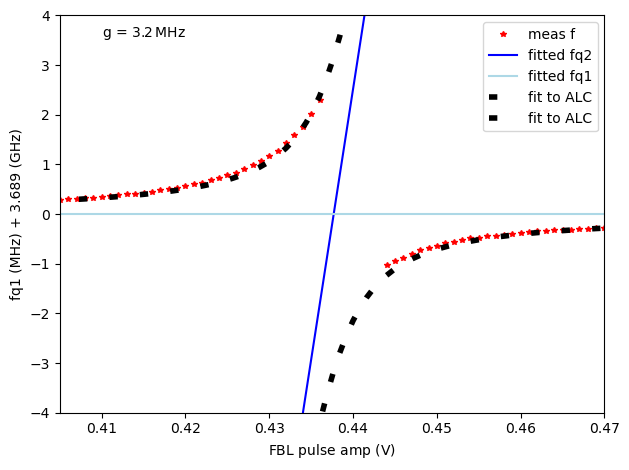

In [32]:
plt.plot(amp_avl_on_list[:idx_ac_low],f_avl_on_list[:idx_ac_low],color='red',marker='*',ls='',ms=4, label='meas f')
plt.plot(amp_avl_on_list[idx_ac_up+1:],f_avl_on_list[idx_ac_up+1:],color='red',marker='*',ls='',ms=4)
            
plt.xlim(0.405, 0.47)       
plt.ylim(-4,4) 

plt.text(s=r'g = {:.1f}'.format(res_ramsey_on.x[0])+r'$\,\rm{MHz}$', x=0.41, y=3.8, ha='left', va='top', color='black', fontsize=10)
             
plt.xlabel(r'$\rm{FBL\ pulse\ amp\ (V)}$')
plt.ylabel(r'fq1 (MHz) + 3.689 (GHz)')

plt.plot(x_ac_plot,(lin_fit(x_ac_plot, m_q2_acq3,n_q2_acq3)-fq_q1_fit)*1e3,color='blue', label='fitted fq2')
plt.axhline(y=0,color='lightblue', label='fitted fq1')
plt.plot(x_ac_plot, E, dashes=[1.5, 4], lw= 4, color = 'black', ls='--', label='fit to ALC')
    
plt.legend()
plt.tight_layout()       
plt.show()

## Summary of all g vs. flux
Note: we think that there is a different scaling factor for g's extracted from spectroscopy and ramsey <br>
g_13 = g_spec = g_ram/$\sqrt(2)$

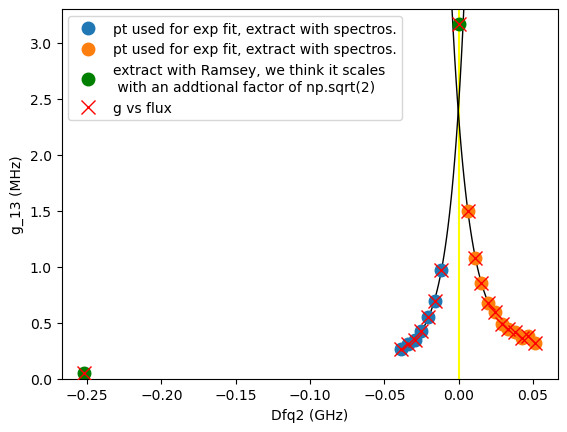

In [39]:
def exp_fit(x,x0,amp,f0,phase,off):
    return(amp*np.exp(f0*(x-x0)+phase)+off)

x0_array_opt = np.zeros(len(res__list))
for ii in range(0,len(res__list)):
    if ii!=7 and ii!=8 and ii!=9: x0_array_opt[ii] = res__list[ii].x[0]
        

fq2_fit_for_plotting = np.linspace(np.min(fq2_set_vec),np.max(fq2_set_vec),101,True)
##### exponential 1
guess_0 = [3.65516717e+00, 8.57991279e+02, 9.88405926e+01, 7.42714615e-01,2.09230947e+02]
popt_0,pcov_0 = curve_fit(exp_fit,fq2_set_vec[:7],x0_array_opt[:7],p0=guess_0, maxfev = int(1e6))
##### exponential 2
guess_1 = [3.63,500,-1,1,0]
popt_1,pcov_1 = curve_fit(exp_fit,fq2_set_vec[-11:],x0_array_opt[-11:],p0=guess_1, maxfev = int(1e6))
##### X Positom wherre the rwo exponential meet
idx_max_g = np.argmin(np.abs(exp_fit(fq2_fit_for_plotting,*popt_1)-exp_fit(fq2_fit_for_plotting,*popt_0)))
f2_of_max_g = fq2_fit_for_plotting[idx_max_g]


### Plot the stuff
plt.axvline(x=f2_of_max_g-f2_of_max_g, color='yellow')
plt.plot(fq2_fit_for_plotting-f2_of_max_g,exp_fit(fq2_fit_for_plotting,*popt_0)*1e3,color='black',lw=1,ls='-')
plt.plot(fq2_fit_for_plotting-f2_of_max_g,exp_fit(fq2_fit_for_plotting,*popt_1)*1e3,color='black',lw=1,ls='-')
plt.plot(fq2_set_vec[:7]-f2_of_max_g,x0_array_opt[:7]*1e3,marker='o',ls='',ms=9, label='pt used for exp fit, extract with spectros.')
plt.plot(fq2_set_vec[-11:]-f2_of_max_g,x0_array_opt[-11:]*1e3,marker='o',ls='',ms=9, label='pt used for exp fit, extract with spectros.')

### Combine the points from the two cooldowns
# factor of np.sqrt(2) for normalization of 1/np.sqrt(2)(|001>+|100>) -> |010> photon transition
#scaling_factor = np.sqrt(2)
scaling_factor = 1
g_vs_flux__flux = np.append(np.append(np.array([-(fq_q1_fit-fq_c2_fit)+f2_of_max_g]),fq2_set_vec[:7]),np.append(np.array([f2_of_max_g]),fq2_set_vec[-11:]))
g_vs_flux__g = np.append(np.append(np.array([res_ram_off.x[0]*1e3/scaling_factor]),x0_array_opt[:7]*1e3),np.append(np.array([res_ramsey_on.x[0]/scaling_factor]),x0_array_opt[-11:]*1e3))


plt.plot(g_vs_flux__flux[np.argmin(g_vs_flux__g)]-f2_of_max_g,np.min(g_vs_flux__g),color='green',marker='o',ms=9,ls='')
plt.plot(g_vs_flux__flux[np.argmax(g_vs_flux__g)]-f2_of_max_g,np.max(g_vs_flux__g),color='green',marker='o',ms=9, label='extract with Ramsey, we think it scales\n with an addtional factor of np.sqrt(2)',ls='')

plt.plot(g_vs_flux__flux-f2_of_max_g,g_vs_flux__g,color='red',marker='x',ms=10, label='g vs flux',ls='',zorder=100)

plt.xlabel('Dfq2 (GHz)')
plt.ylabel('g_13 (MHz)')

plt.legend()
plt.ylim(0,3.3)
plt.show()

In [46]:
(fq2_set_vec[:7]-f2_of_max_g)*1e3

array([-38.7, -34.2, -29.7, -25.2, -20.7, -16.2, -11.7])

In [47]:
(g_vs_flux__flux[np.argmin(g_vs_flux__g)]-f2_of_max_g)*1e3

-252.00000000000023

In [43]:
g_vs_flux__flux[np.argmax(g_vs_flux__g)]-f2_of_max_g

0.0

In [40]:
np.min(g_vs_flux__g)

0.04917550086975096

In [35]:
fq2_set_vec

array([3.62  , 3.6245, 3.629 , 3.6335, 3.638 , 3.6425, 3.647 , 3.6515,
       3.656 , 3.6605, 3.665 , 3.6695, 3.674 , 3.6785, 3.683 , 3.6875,
       3.692 , 3.6965, 3.701 , 3.7055, 3.71  ])

In [36]:
f2_of_max_g

3.6587

In [37]:
x0_array_opt

array([0.00026772, 0.00030737, 0.00034445, 0.00042214, 0.00055151,
       0.00069153, 0.00096878, 0.        , 0.        , 0.        ,
       0.0014975 , 0.0010779 , 0.00085284, 0.00067319, 0.00059366,
       0.00048784, 0.00044596, 0.00041887, 0.00035964, 0.00038036,
       0.00031654])

In [38]:
#fq2 in GHz
print(repr(g_vs_flux__flux))
# g_13 in MHz
print(repr(g_vs_flux__g))

array([3.4067, 3.62  , 3.6245, 3.629 , 3.6335, 3.638 , 3.6425, 3.647 ,
       3.6587, 3.665 , 3.6695, 3.674 , 3.6785, 3.683 , 3.6875, 3.692 ,
       3.6965, 3.701 , 3.7055, 3.71  ])
array([0.0491755 , 0.26771927, 0.30736832, 0.3444539 , 0.42214468,
       0.55151105, 0.69152908, 0.96877996, 3.16327095, 1.49749969,
       1.07790426, 0.85283542, 0.67319305, 0.5936642 , 0.48784217,
       0.44595503, 0.41887469, 0.35964336, 0.38036425, 0.31654148])


# Capacitance Matrix of Box

The accuracy of the simulation is approximately 1%. <br>
From the picture you get the name of the different capacitances
<img src='./img/coupled_qubits_sketch__Labels_ANSYS.png'> 

<img src='./img/coupled_qubits_sketch_annotated_2.png'> 

The numbers label all the capacitive pads in the system.


This reads in the values of the capacitance matrix

In [5]:
url_simulation_files = './data/SimData__Solutions-0p2__GFQ-Coupling-Capacitances__Full-Box.txt'
LoadFiles = glob2.glob(url_simulation_files)

file1 = open(LoadFiles[0], 'r')
ii = 0


C_Matrix = np.zeros((26,26))

Zeile = []
kk = 0
while True:
    
    # Get next line from file
    line = file1.readline()
    
    # if line is empty
    # end of file is reached
    if not line:
        break
    Zeile.append(str(line.strip()))
        
    Zeile[ii] = Zeile[ii].replace('	',',')
    
    if 6<=ii and ii<=32:
        Zeile[ii] = Zeile[ii].replace('__ex','')
        
    if 7<=ii and ii<=32:
        Zeile[ii] = Zeile[ii].split(',',1)[-1]
        
    print("Zeile[{}]: {}".format(ii, Zeile[ii]))
    
    if ii==6:
        Liste = Zeile[ii].split(',')
    if 7<=ii and ii<=32:
        Zeile[ii] = Zeile[ii].split(',')
        for jj in range(0,len(Zeile[ii])):
            C_Matrix[kk,jj] = Zeile[ii][jj]
            #if np.abs(C_Matrix[kk,jj]) < 1e-5: C_Matrix[kk,jj]=1e-100
        kk=kk+1
        
    ii = ii+1
    
file1.close()

C_Matrix = C_Matrix * 1e3

Zeile[0]: DesignVariation : bigCavity_x='25mm' bigCavity_y='10.5mm' bigCavity_z='1.5799999999999998mm' bigCavity_z0='8mm' bottom_z='9.5800000000000001mm' Cavity_Cap_Z='1.8999999999999999mm' cavityFeedMiddle_x='4mm' cavityFeedMiddle_y='6.0999999999999996mm' cavityFeedMiddle_z='3mm' cavityFeedMiddle_z0='5mm' cavityThrough_y='2mm' chip_dist='50um' coax_z0='7.5482500000000003mm' coaxCenter_h='2.2000000000000006mm' coaxCenter_r='0.14349999999999999mm' coaxCut_y='1mm' coaxIso_r='0.46999999999999997mm' coaxOuter_r='0.59499999999999997mm' coaxPos_x='6.5mm' coaxPos_y='5.25mm' coaxRecess_h='2.2000000000000006mm' coaxRecess_r='0.59499999999999997mm' Meshbox_big__length_var='100um' Meshbox_small__length_var='100um' stageRecess1_x='2.2000000000000002cm' stageRecess1_y='3.1000000000000001mm' stageRecess1_z='330um' stageRecess1_z0='7.6699999999999999mm' stageRecess2_x='6.0999999999999996mm' stageRecess2_y='6.0999999999999996mm' stageRecess2_z='710um' stageRecess2_z0='7.29mm' stageRecess3_x='25mm' sta

## Show values of capacitance Matrix

From this "table" you can translate the indices of the capacitance matrix into the labels of the above pictures above

In [6]:
# 0.bG1__Arm1, 1.bG1__Arm2, 2.bG1__phi1, 3.bG1__phi2, 4.bG1__phi3, 5.bG1__phi4, 

# 6.qR7__Arm1, 7.qR7__Arm2, 8.qR7__phi1, 9.qR7__phi2, 10.qR7__phi3, 11.qR7__phi4,

# 12.qS16__Arm1, 13.qS16__Arm2, 14.qS16__phi1, 15.qS16__phi2, 16.qS16__phi3, 17.qS16__phi4,

# 18.bG1__Bondpad, 19.bG1__FBL, 20.bG1__Purcell, 21.Box, 22.qR7__BondPad, 23.qR7__Purcell, 24.qS16__Bondpad, 25.qS16__Purcell


In [7]:
C_Matrix.shape

(26, 26)

Here you can extract a specific value of the capacitance matrix. All off diagonal values are negative. Note, that the off diagonal values in the capacitance matix only include the direct capacitances between the components i and j, and not e.g the series capacitances between i and j over the box ( i <-> box <-> j).

In [8]:
idx_i = 9
idx_j = 2
C_ij = C_Matrix[idx_i, idx_j]

print('C[{},{}] = C[{},{}] = {:.1f} fF'.format(idx_i,idx_j,Liste[idx_i],Liste[idx_j],C_ij))

C[9,2] = C[qR7__phi2,bG1__phi1] = -0.0 fF


## Example: Effective capacitance between qubit and coupler (nodes 9,8 and 3,2):

In [9]:
idx_i = 8
idx_j = 3
C_ij = C_Matrix[idx_i, idx_j]

print('C[{},{}] = C[{},{}] = {:.1f} fF'.format(idx_i,idx_j,Liste[idx_i],Liste[idx_j],C_ij))

C[8,3] = C[qR7__phi1,bG1__phi2] = -0.0 fF


The above shows that the direct capacitance between node 8 and 3 (qubit to coupler) is very small. This makes sense because these nodes are isolated from each other and sit in different enclosures

The effective coupling arises from the sum of many series capacitances, e.g. 8 <--> 6 <--> 1 <--> 3

### right node of qubit 1 to left node of qubit 2 (8 <--> 3)

In [8]:
  C_Matrix[8, 6]

-14.801

In [9]:
C_Matrix[6, 1]

-8.149

In [10]:
C_Matrix[1, 3]

-15.346

In [11]:
1/ ( 1/C_Matrix[8, 6] + 1/C_Matrix[6, 1] + 1/C_Matrix[1, 3])

-3.914798229136993

### right node of qubit 1 to right node of qubit 2 (8 <--> 2)

In [12]:
1/ ( 1/C_Matrix[8, 6] + 1/C_Matrix[6, 1] + 1/C_Matrix[1, 2])

-1.4529903497879524

### How to include the capacitances to the box? Nodes 7, 6, 13, 12, have big capacitances to the box

In [13]:
C_Matrix[7, 21]

-62.046

In [14]:
C_Matrix[6, 21]

-61.566

In [15]:
C_Matrix[13, 21]

-62.795

In [16]:
C_Matrix[12, 21]

-63.14

# zz interaction (can we call it like that?)

<img src='./img/zz-interaction.png'> 

+ qubits 1 and 3 are kept on resonance around 3.689 GHz --> They hybridize to |+> and |->, which is basically degenerate because the coupler q2 is far detuned

+ We measure Ramsey interferometry on qubit 1 while moving the coupler qubit via the fast flux bias line closer to the avoided crossing (in real time, meaning that we fill the waiting times in the Ramsey interferometry with the flux bias line pulses. When playing the pulses on qubits 1 and 3, the coupler is always detuned). The dynamics of this experiment should happen in the 1-photon subspace (left)

+ We repeat the above experiment by playing a pi-pulse on q3 before the Ramsey. The dynamics should now happen in the 2-photon subspace (right)

+ For both experiments, we can extract the q1 frequency from the Ramsey fringes versus coupler detuning $\delta \omega$, which gives us two avoided crossings which are shifted along $\delta \omega$. We interpret this shift as the zz-interaction between q1 and q3.

<img src='./img/pulse_sequence_3.png'> 

In [12]:
# power vector of flux bias pulse (arbitrary factor)
a_vec= np.array([0.4  , 0.401, 0.402, 0.403, 0.404, 0.405, 0.406, 0.407, 0.408,
       0.409, 0.41 , 0.411, 0.412, 0.413, 0.414, 0.415, 0.416, 0.417,
       0.418, 0.419, 0.42 , 0.421, 0.422, 0.423, 0.424, 0.425, 0.426,
       0.427, 0.428, 0.429, 0.43 , 0.431, 0.432, 0.433, 0.434, 0.435,
       0.436, 0.437, 0.438, 0.439, 0.44 , 0.441, 0.442, 0.443, 0.444,
       0.445, 0.446, 0.447, 0.448, 0.449, 0.45 , 0.451, 0.452, 0.453,
       0.454, 0.455, 0.456, 0.457, 0.458, 0.459, 0.46 , 0.461, 0.462,
       0.463, 0.464, 0.465, 0.466, 0.467, 0.468, 0.469, 0.47 , 0.471,
       0.472, 0.473, 0.474, 0.475, 0.476, 0.477, 0.478, 0.479])

# actual qubit 2 frequency when flux bias pulse is played with power given in a_vec
fq2_vec = lin_fit(a_vec,m_q2_acq3,n_q2_acq3)


# measured frequency of qubit 1 when NO pulse is played on qubit 3. Frequency is frequency from Ramsey fringes
fq1_vec_0 = np.array([4.7577332 , 4.75258468, 4.74362074, 4.73335293, 4.72522258,
       4.71523865, 4.70230397, 4.69011719, 4.67971735, 4.66589182,
       4.65169952, 4.63626699, 4.61681733, 4.59993951, 4.58025189,
       4.55832019, 4.5348133 , 4.50977613, 4.47991921, 4.45066832,
       4.41917668, 4.38577808, 4.34064782, 4.29787316, 4.24648158,
       4.19366775, 4.13332928, 4.05935462, 3.98291755, 3.91826517,
       3.79240118, 3.71117245, 3.58554161, 3.43448683, 3.22054942,
       3.08599378, 2.91354963, 2.65217672, 2.49150764, 1.83905326,
       1.66729071, 6.4631449 , 6.16073649, 6.09645585, 5.97698427,
       5.86351381, 5.78835441, 5.74241219, 5.67803986, 5.63904081,
       5.59759446, 5.55786819, 5.52326276, 5.49492814, 5.47589696,
       5.45120388, 5.43203023, 5.41656357, 5.39642261, 5.38266211,
       5.37166383, 5.35956237, 5.34365232, 5.33504598, 5.32271573,
       5.31673092, 5.30597314, 5.29643719, 5.28949513, 5.28191177,
       5.27543962, 5.26796311, 5.26318582, 5.25722577, 5.24996923,
       5.24637664, 5.23921005, 5.23651902, 5.23034624, 5.22593378])

# measured frequency of qubit 1 when a pi pulse is played on qubit 3. Frequency is frequency from Ramsey fringes
fq1_vec_1 = np.array([4.74944042, 4.74092599, 4.73678157, 4.72510541, 4.71566401,
       4.70507709, 4.69604781, 4.68153481, 4.67064916, 4.65687158,
       4.64348188, 4.63421825, 4.61805361, 4.59493898, 4.57991825,
       4.56106655, 4.53896861, 4.51205201, 4.48521408, 4.4571056 ,
       4.43297461, 4.39507579, 4.35807976, 4.31209331, 4.26529041,
       4.21229003, 4.15603095, 4.09933255, 4.02542073, 3.94383076,
       3.83014577, 3.73428251, 3.61627686, 3.50072977, 3.36559095,
       3.22282386, 3.00392612, 2.88048406, 2.70389417, 2.53378033,
       2.14894498, 2.09937161, 6.19404177, 6.15532135, 5.98007818,
       5.89443774, 5.82104905, 5.73461538, 5.68713699, 5.63946819,
       5.59316526, 5.56026959, 5.51924751, 5.49560422, 5.47092096,
       5.44587915, 5.42613143, 5.41284   , 5.39559223, 5.37876913,
       5.35902356, 5.34931868, 5.33829646, 5.32892726, 5.31441489,
       5.3068023 , 5.29853987, 5.28815532, 5.28163645, 5.27599934,
       5.26414226, 5.25746722, 5.25356685, 5.24424549, 5.23737914,
       5.23283107, 5.22903728, 5.22190739, 5.21691557, 5.21391851])

Text(0.5, 0, 'detuning fq2 to fq1,3 (MHz)')

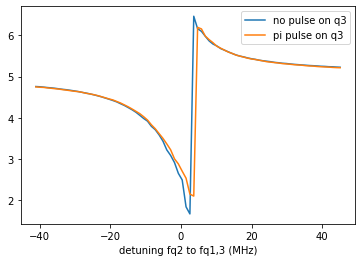

In [55]:
plt.plot(fq2_vec*1e3 - 3689, fq1_vec_0, label = 'no pulse on q3')
plt.plot(fq2_vec*1e3 - 3689, fq1_vec_1, label = 'pi pulse on q3')

plt.legend()

plt.xlabel('detuning fq2 to fq1,3 (MHz)')

Text(0, 0.5, '$\\Delta fq_1$ (MHz)')

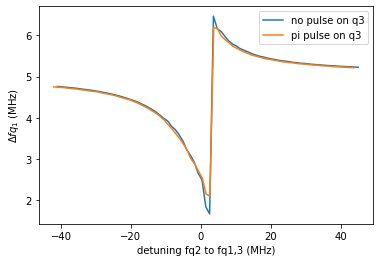

In [56]:
plt.plot(fq2_vec*1e3 - 3689, fq1_vec_0, label = 'no pulse on q3')

# The curves overlap if we move fq1_1 by 1 MHz to the "left"
plt.plot(fq2_vec*1e3 - 3689 -1, fq1_vec_1, label = 'pi pulse on q3')

plt.legend()

plt.xlabel('detuning fq2 to fq1,3 (MHz)')
plt.ylabel('$\Delta fq_1$ (MHz)')

How can we extract the zz interaction from this measurement? Is it 1 MHz?

# Time domain (This is unfinished)

## coherent population oscillations

+ q1 and q3 at frequency of q1 half flux: 3.68 GHz, q2 rests at its own half flux around 3.45 GHz
+ pi pulse on qubit 1 or 3, respectively
+ Then rectangular voltage pulse on FBL of q2
+ then read out q1 and q3 simultaneously

In [3]:
delta_q2 = 680 - 450 # in MHz
print(delta_q2)

230


### prepare qubit1, qubit3 in [0, 1]

In [4]:
with open(os.getcwd() + data_dir + r'\time_DC_pop_osc_0_1.pkl', 'rb') as f:
    t_vec_01 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\FBL_voltage_DC_pop_osc_0_1.pkl', 'rb') as f:
    a_vec_01 = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\signal_qubit1_0_1.pkl', 'rb') as f:
    i1_01 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\signal_qubit3_0_1.pkl', 'rb') as f:
    i3_01 = pickle.load(f)
    
a_vec = a_vec_01 # in V
t_vec = t_vec_01 # in ns

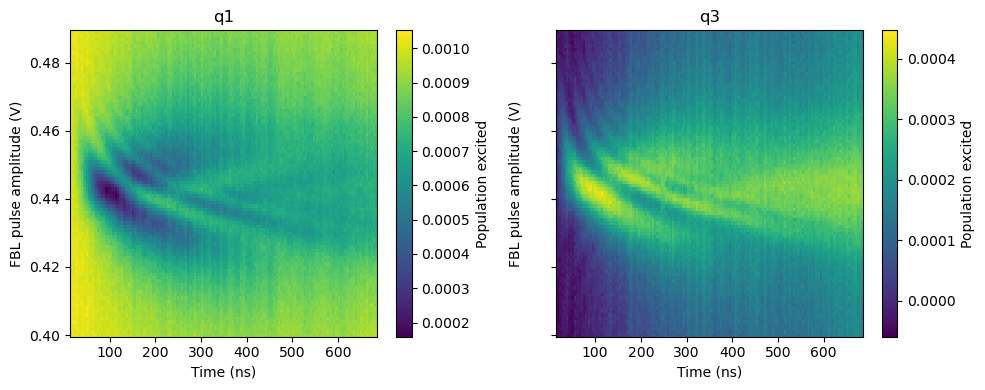

In [5]:
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (10, 4), dpi = 100)

ax[0].set_title('q1')
c = ax[0].pcolor(t_vec_01, a_vec_01, i1_01.T, shading = 'auto', cmap = 'viridis')
fig.colorbar(c, ax = ax[0], label = 'Population excited')
ax[0].set_ylabel('FBL pulse amplitude (V)')
ax[0].set_xlabel('Time (ns)')

ax[1].set_title('q3')
c = ax[1].pcolor(t_vec_01, a_vec_01, i3_01.T, shading = 'auto', cmap = 'viridis')
fig.colorbar(c, ax = ax[1], label = 'Population excited')
ax[1].set_ylabel('FBL pulse amplitude (V)', labelpad=20)
ax[1].set_xlabel('Time (ns)')

idx = 42
#ax[0].axhline(a_vec_01[idx], color = 'red')

fig.tight_layout()
plt.show()

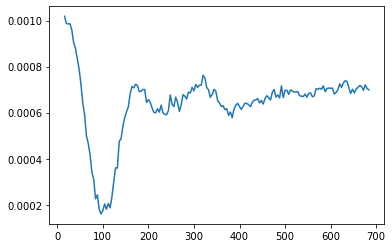

In [6]:
plt.plot(t_vec_01, i1_01[:,42])

### prepare qubit1, qubit3 in [1, 0]

In [7]:
with open(os.getcwd() + data_dir + r'\time_DC_pop_osc_1_0.pkl', 'rb') as f:
    t_vec_10 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\FBL_voltage_DC_pop_osc_1_0.pkl', 'rb') as f:
    a_vec_10 = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\signal_qubit1_1_0.pkl', 'rb') as f:
    i1_10 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\signal_qubit3_1_0.pkl', 'rb') as f:
    i3_10 = pickle.load(f)

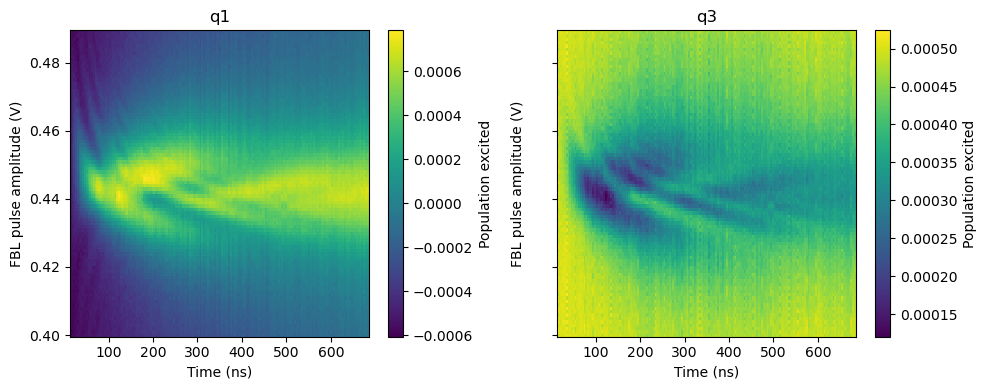

In [8]:
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (10, 4), dpi = 100)

ax[0].set_title('q1')
c = ax[0].pcolor(t_vec_10, a_vec_10, i1_10.T, shading = 'auto', cmap = 'viridis')
fig.colorbar(c, ax = ax[0], label = 'Population excited')
ax[0].set_ylabel('FBL pulse amplitude (V)')
ax[0].set_xlabel('Time (ns)')

ax[1].set_title('q3')
c = ax[1].pcolor(t_vec_10, a_vec_10, i3_10.T, shading = 'auto', cmap = 'viridis')
fig.colorbar(c, ax = ax[1], label = 'Population excited')
ax[1].set_ylabel('FBL pulse amplitude (V)', labelpad=20)
ax[1].set_xlabel('Time (ns)')

fig.tight_layout()
plt.show()

### together and scaled

the readout pulse length is not much smaller than T1. We don't want to take into account readout errors. For that reason, we scale the readout signal to its minimum and maximum, when not playing/playing a pi pulse, which corresponds to the maximal qubit inversion that we can reach after readout

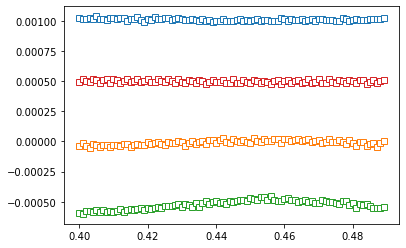

In [9]:
# ground state qubit 1
plt.plot(a_vec, i1_01[0,:], 's', mfc = 'white')
i1_ground_reference = np.mean(i1_01[0,:10])
# excited state qubit 3
plt.plot(a_vec, i3_01[0,:], 's', mfc = 'white')
i3_excited_reference = np.mean(i3_01[0,:10])
# excited state qubit 1
plt.plot(a_vec, i1_10[0,:], 's', mfc = 'white')
i1_excited_reference = np.mean(i1_10[0,:10])
# ground state qubit 3
plt.plot(a_vec, i3_10[0,:], 's', mfc = 'white')
i3_ground_reference = np.mean(i3_10[0,:10])

In [10]:
pop1_01 = (i1_01 - i1_ground_reference)/ (i1_excited_reference - i1_ground_reference)
pop3_01 = (i3_01 - i3_ground_reference)/ (i3_excited_reference - i3_ground_reference)
pop1_10 = (i1_10 - i1_ground_reference)/ (i1_excited_reference - i1_ground_reference)
pop3_10 = (i3_10 - i3_ground_reference)/ (i3_excited_reference - i3_ground_reference)

In [11]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'Times New Roman',
    "font.size"   : 16
})

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_2328/744329682.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


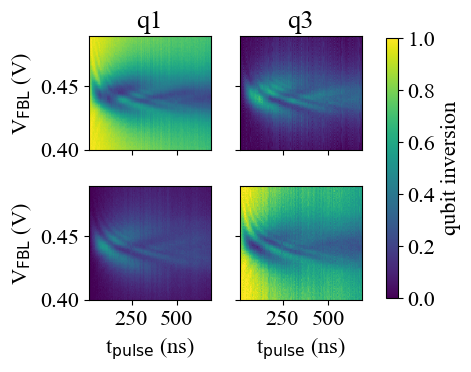

In [12]:
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (4, 4), dpi = 100)

ax[0,0].set_title('q1')
c = ax[0,0].pcolor(t_vec_10, a_vec_10, pop1_10.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)
ax[0,0].set_ylabel('V$_{\mathrm{FBL}}$ (V)')

ax[0,1].set_title('q3')
c = ax[0,1].pcolor(t_vec_10, a_vec_10, pop3_10.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)



#ax[1,0].set_title('q1')
c = ax[1,0].pcolor(t_vec_01, a_vec_01, pop1_01.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)
ax[1,0].set_ylabel('V$_{\mathrm{FBL}}$ (V)')
ax[1,0].set_xlabel('t$_{\mathrm{pulse}}$ (ns)')
ax[1,1].set_xlabel('t$_{\mathrm{pulse}}$ (ns)')

#ax[1,1].set_title('q3')
c = ax[1,1].pcolor(t_vec_01, a_vec_01, pop3_01.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)

#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.22, 0.03, 0.65])
fig.colorbar(c, cax=cbar_ax, label = 'qubit inversion')

fig.tight_layout()
plt.show()

In [13]:
pop3_01.shape

(168, 90)

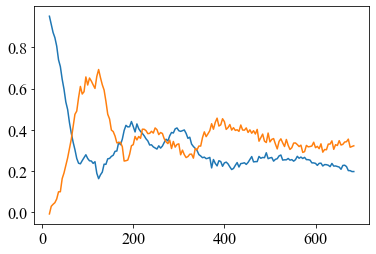

In [14]:
plt.plot(t_vec_10, pop1_10.T[42,:])
plt.plot(t_vec_10, pop3_10.T[42,:])

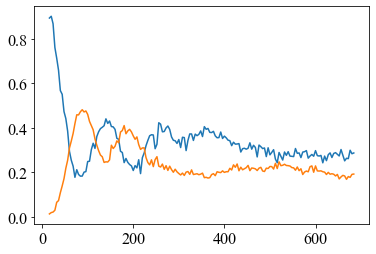

In [15]:
plt.plot(t_vec_01, pop3_01.T[45,:])
plt.plot(t_vec_01, pop1_01.T[45,:])

## Qtip simulation

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, Options)
from qutip import (about, basis, brmesolve, destroy, identity, ket2dm, mesolve,
                   plot_energy_levels, plot_expectation_values, tensor)

import scipy

### Qubit Operators

In [17]:
Sz1 = tensor(sigmaz(), qeye(2), qeye(2))
Sz2 = tensor(qeye(2), sigmaz(), qeye(2))
Sz3 = tensor(qeye(2), qeye(2), sigmaz())

Sx1 = tensor(sigmax(), qeye(2), qeye(2))
Sx2 = tensor(qeye(2), sigmax(), qeye(2))
Sx3 = tensor(qeye(2), qeye(2), sigmax())

Sy1 = tensor(sigmay(), qeye(2), qeye(2))
Sy2 = tensor(qeye(2), sigmay(), qeye(2))
Sy3 = tensor(qeye(2), qeye(2), sigmay())

Sminus = Qobj([[0, 1], [0, 0]])
Splus = Qobj([[0, 0], [1, 0]])


Sminus1 = tensor(Sminus, qeye(2), qeye(2))
Sminus2 = tensor(qeye(2), Sminus, qeye(2))
Sminus3 = tensor(qeye(2), qeye(2), Sminus)

### Flux bias line response with self-inductance

In [18]:
def flux_bias_line_response(t, args):
    
    if t <= args['pulse_len']:
        response = args['amplitude'] * ( 1 - np.exp(-(t / args['T_rise']) ) )
    else:
        response_sat = args['amplitude'] * ( 1 - np.exp(-(args['pulse_len'] / args['T_rise']) ) )
        response = response_sat * np.exp(-((t - args['pulse_len'])/ args['T_fall']))
        
    return response

def flux_bias_line_rise(t, args):
    
    # in MHz, assume q2 frequency is linear close to the crossing (neglect parabolic shape close to sweet spot)
    response = args['amplitude'] * ( 1 - np.exp(-(t / args['T']) ) )

    return response

def flux_bias_line_fall(t, args):
    
    # in MHz, assume q2 frequency is linear close to the crossing (neglect parabolic shape close to sweet spot)
    response = args['amplitude'] * np.exp(-(t / args['T']) ) 

    return response

In [825]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'Times New Roman',
    "font.size"   : 28
})

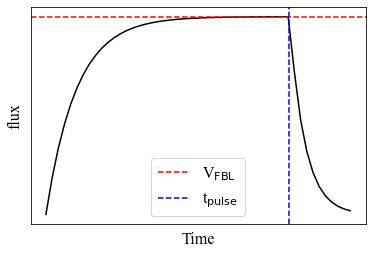

In [19]:
t_vec = np.linspace(0, 1, 50)

args = {'amplitude': 1, 'T_rise': 0.1, 'T_fall': 0.05, 'pulse_len': 0.8}
#args = {'amplitude': 1, 'T': 0.05}

flux_vec = np.array([flux_bias_line_response(t, args) for t in t_vec])


plt.plot(t_vec, flux_vec, 'k')
plt.xticks([])
plt.yticks([])

plt.axhline(1, color = 'red', linestyle = '--', label = 'V$_{\mathrm{FBL}}$')
plt.axvline(0.8, color = 'blue', linestyle = '--', label = 't$_{\mathrm{pulse}}$')

plt.ylabel('flux')
plt.xlabel('Time')

plt.legend()

Problem: For every measurement, the flux will fall before the readout of the qubits. As such, the qubits will undergo an additional Landau-Zener transition if the detuning is positive, but not if the detuning is negative. How to compute?

+ Compute with mesolve for every time step t and interpret t as the pulse length
+ Take results as initial state for next simulation
+ simulate the flux tail separately


### function to compute coupled chain with arbitrary flux function for q2

In [98]:
def compute_coupled_chain(tlist, psi0, eps_12, eps_23, q2_detuning, T1_vec, T2_vec, FBL_func, FBL_args, FBL_args_2):
   
    # in MHz
    H0 = (eps_12*Sx1*Sx2 + eps_23*Sx2*Sx3  + 3680 * Sz1 + (3680 - q2_detuning) * Sz2 + 3680 *Sz3 )*2*np.pi
    
    gamma_phi_1 = 1/(T2_vec[0])
    gamma_phi_2 = 1/(T2_vec[1])
    gamma_phi_3 = 1/(T2_vec[2])
    gamma_rel_1 = 1/(T1_vec[0])
    gamma_rel_2 = 1/(T1_vec[1])
    gamma_rel_3 = 1/(T1_vec[2])
    
    c_ops = [np.sqrt(gamma_phi_1) * Sz1, np.sqrt(gamma_phi_2) * Sz2, np.sqrt(gamma_phi_3) * Sz3, np.sqrt(gamma_rel_1) * Sminus1, np.sqrt(gamma_rel_2) * Sminus2, np.sqrt(gamma_rel_3) * Sminus3]
    
    H1 = Sz2 *2*np.pi 
    H2 = Sz3 *2*np.pi
    
    H = [H0,[H1,FBL_func(tlist, FBL_args)], [H2,FBL_func(tlist, FBL_args_2)]]
    
    
    result = mesolve(H, psi0, tlist, c_ops, options= Options(nsteps=2000))
    
    return result

### compute rise of the FBL flux 

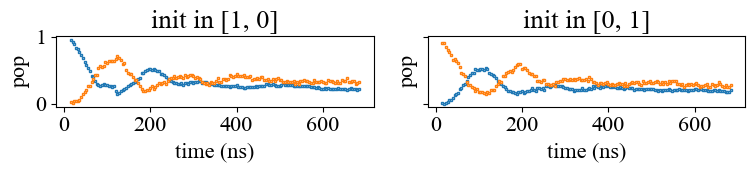

In [198]:
a_vec_idx = 41

fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (8, 2), dpi = 100)

ax[0].set_title('init in [1, 0]')
ax[0].plot(t_vec_10, pop1_10[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q1')
ax[0].plot(t_vec_10, pop3_10[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q3')
ax[0].set_ylabel('pop')
ax[0].set_xlabel('time (ns)')


ax[1].set_title('init in [0, 1]')
ax[1].plot(t_vec_01, pop1_01[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q1')
ax[1].plot(t_vec_01, pop3_01[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q3')
ax[1].set_ylabel('pop')
ax[1].set_xlabel('time (ns)')

fig.tight_layout()
plt.show()

In [245]:
eps_12 = 2.7
eps_23 = 2.7

q2_detuning = 230
q3_detuning = 0.0

T1_vec = np.array([2.09, 1, 0.84])
T2_vec = np.array([1.71, 1, 0.165])

#T1_vec = np.array([3, 10, 1])
#T2_vec = np.array([10, 10, 10])

state_1 = Qobj([[0], [1]])
state_0 = Qobj([[1], [0]])

tlist = np.arange(0, 0.4, 0.004)

# [0, 1]
psi0 = tensor(state_1, state_0, state_0)

FBL_amp_vec = np.linspace(225, 235, 21) 

result_mat = np.zeros((FBL_amp_vec.size, tlist.size), dtype = object)

FBL_rise_time = 0.002

for i, amp in enumerate(FBL_amp_vec):
  
    print(i)
    FBL_args = {'amplitude': amp, 'T': FBL_rise_time}
    FBL_args_2 = {'amplitude': 0.02*amp, 'T': FBL_rise_time*10}

    result = compute_coupled_chain(tlist, psi0, eps_12, eps_23, q2_detuning, T1_vec, T2_vec, flux_bias_line_rise, FBL_args, FBL_args_2)

    result_mat[i,:] = result.states[:] # result_after.states[-1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [247]:
Sz1_exp_vec = np.zeros((FBL_amp_vec.size, tlist.size))
Sz2_exp_vec = np.zeros((FBL_amp_vec.size, tlist.size))
Sz3_exp_vec = np.zeros((FBL_amp_vec.size, tlist.size))

for i, amp in enumerate(FBL_amp_vec):
    Sz1_exp_vec[i,:] = expect(Sz1, result_mat[i,:])
    Sz2_exp_vec[i,:] = expect(Sz2, result_mat[i,:])
    Sz3_exp_vec[i,:] = expect(Sz3, result_mat[i,:])

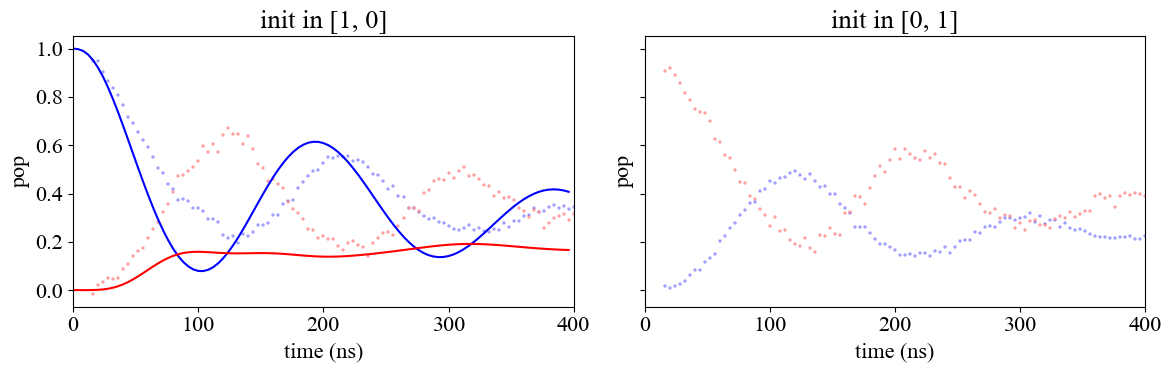

In [250]:
a_vec_idx = 39
i = 10

fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (12, 4), dpi = 100)

ax[0].set_title('init in [1, 0]')
ax[0].plot(t_vec_10, pop1_10[:,a_vec_idx], 's', mfc = 'white', ms = 2, mew = 0.3, label = 'q1', color = 'blue')
ax[0].plot(t_vec_10, pop3_10[:,a_vec_idx], 's', mfc = 'white', ms = 2, mew = 0.3, label = 'q3', color = 'red')

ax[0].plot(tlist*1000, -(Sz1_exp_vec[i,:] - 1)/2, '-', mfc = 'white', ms = 2, mew = 0.3, label = 'q1', color = 'blue')
ax[0].plot(tlist*1000, -(Sz3_exp_vec[i,:] - 1)/2, '-', mfc = 'white', ms = 2, mew = 0.3, label = 'q3', color = 'red')
#ax[0].plot(tlist*1000, -(Sz2_exp_vec[i,:] - 1)/2, '--', mfc = 'white', ms = 2, label = 'q3', color = 'black', alpha = 0.5)

ax[0].set_ylabel('pop')
ax[0].set_xlabel('time (ns)')

ax[1].set_title('init in [0, 1]')
ax[1].plot(t_vec_01, pop1_01[:,a_vec_idx], 's', mfc = 'white', ms = 2, mew = 0.3, label = 'q1', color = 'blue')
ax[1].plot(t_vec_01, pop3_01[:,a_vec_idx], 's', mfc = 'white', ms = 2, mew = 0.3, label = 'q3', color = 'red')
ax[1].set_ylabel('pop')
ax[1].set_xlabel('time (ns)')

ax[0].set_xlim([0, 400])
ax[1].set_xlim([0, 400])

fig.tight_layout()
plt.show()

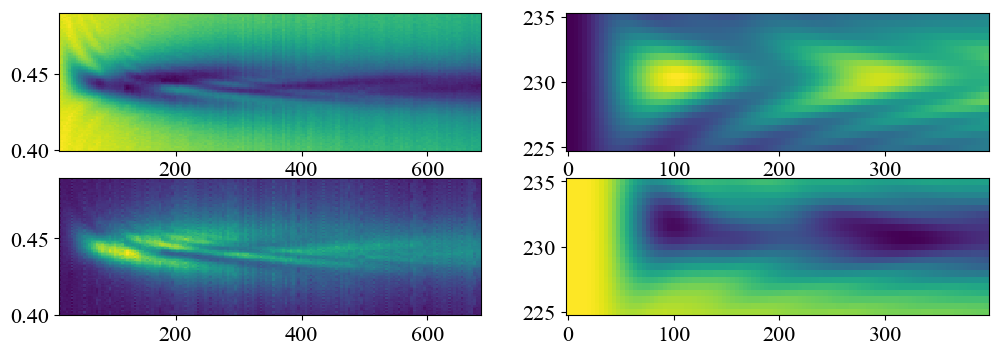

In [249]:
fig, ax = plt.subplots(2, 2, figsize = (12, 4), dpi = 100)

ax[0,0].pcolor(t_vec_10, a_vec_10, pop1_10.T, shading = 'auto', cmap = 'viridis')
ax[0,1].pcolor(tlist*1000, FBL_amp_vec, Sz1_exp_vec, shading = 'auto', cmap = 'viridis')

ax[1,0].pcolor(t_vec_10, a_vec_10, pop3_10.T, shading = 'auto', cmap = 'viridis')
ax[1,1].pcolor(tlist*1000, FBL_amp_vec, Sz3_exp_vec, shading = 'auto', cmap = 'viridis')

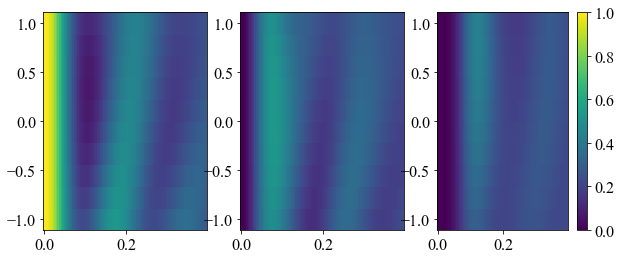

In [222]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))

ax[0].pcolor(tlist, FBL_amp_vec - q2_detuning, -(Sz1_exp_vec-1)/2, vmin = 0, vmax = 1, shading = 'auto')

ax[1].pcolor(tlist, FBL_amp_vec - q2_detuning, -(Sz2_exp_vec-1)/2, vmin = 0, vmax = 1, shading = 'auto')
 
c = ax[2].pcolor(tlist, FBL_amp_vec - q2_detuning, -(Sz3_exp_vec-1)/2, vmin = 0, vmax = 1, shading = 'auto')

fig.colorbar(c, ax = ax[2])

### Add fall of the FBL as a Landau Zener transition

In [992]:
S = np.array([[1, 0, 1]/np.sqrt(2), [0, 1, 0], [1, 0, -1]/np.sqrt(2)])

In [993]:
P = 0.01 # depends on fall time of the FBL
phi = np.pi/4
T = np.sqrt(P)
R = 1-T
L = np.array([[R*np.exp(-1j*phi), -T], [T, R*np.exp(1j*phi)]])

In [994]:
print(S)
print(L)

[[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.         -0.70710678]]
[[ 0.6363961-0.6363961j -0.1      +0.j       ]
 [ 0.1      +0.j         0.6363961+0.6363961j]]


In [988]:
state_example = np.array(result_mat[idx,0])
state_example.shape

(8, 8)

In [1147]:
from qutip import *
psi0 = tensor(state_0, state_1, state_0)
print(psi0)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [1076]:
from sympy import *

In [1392]:
sz2_values = np.linspace(-100, 100, 51)
H_vals = np.zeros((sz2_values.size, 8))
ket_vals = np.zeros((sz2_values.size, 8, 8), dtype = complex)

for i, sz2 in enumerate(sz2_values):
    H = 20*Sx1*Sx2 + 20*Sx2*Sx3 - (sz2)*Sz2 + 3680*Sz1 + 3680*Sz2 + 3680*Sz3
    evals, ekets = H.eigenstates()
    H_vals[i,:] = evals
    ket_vals[i,:,:] = np.array([ekets[i] for i in range(len(ekets))])[:,:,0]

In [1393]:
Matrix(ket_vals[0,:,:])

Matrix([
[                    0, 0.00134048023045523, -3.64259605407955e-6,                   0, 0.00134048023045519,                   0,                   0,   -0.999998203104503],
[  0.00187725828943803,                   0,                    0,  -0.700403924630385,                   0,    0.13735050282406,  -0.700403924630385,                    0],
[                    0,                   0,                    0,   0.707106781186547,                   0,                   0,  -0.707106781186548,                    0],
[-0.000263986893092847,                   0,                    0,   0.097121292593877,                   0,   0.990522508255471,   0.097121292593877,                    0],
[                    0,  0.0971212925938771,    -0.99052250825547,                   0,  0.0971212925938826,                   0,                   0, 0.000263986893093438],
[                    0,   0.707106781186727,                    0,                   0,  -0.707106781186368,             

C:\Users\Simon Geisert\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


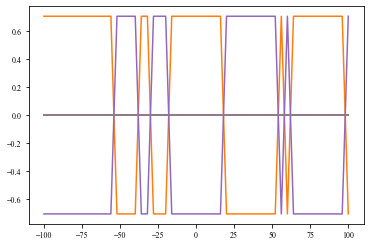

In [1394]:
plt.plot(sz2_values, ket_vals[:,5,:])

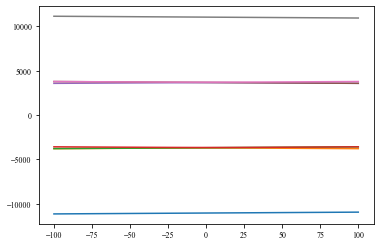

In [1395]:
plt.plot(sz2_values, H_vals)

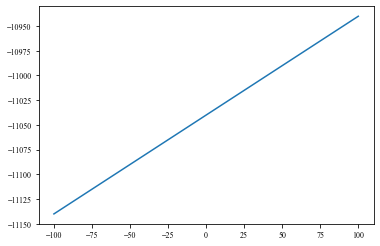

In [1396]:
plt.plot(sz2_values, H_vals[:,0])

In [1428]:
state_labels = ['000', '001', '010', '011', '100', '101', '110', '111']

In [1429]:
np.arange(8), state_labels

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 ['000', '001', '010', '011', '100', '101', '110', '111'])

In [1431]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

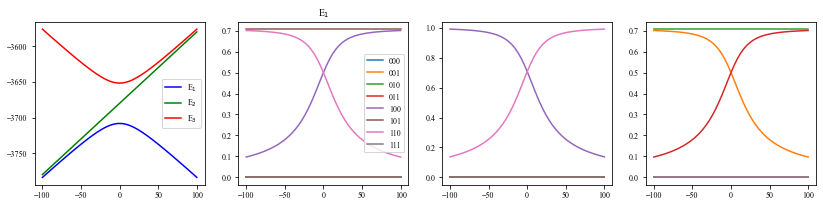

In [1472]:
fig, ax = plt.subplots(1, 4 , figsize = (14, 3))

ax[0].plot(sz2_values, H_vals[:,1], color = 'Blue', label = 'E$_1$')
ax[0].plot(sz2_values, H_vals[:,2], color = 'Green',label = 'E$_2$')
ax[0].plot(sz2_values, H_vals[:,3], color = 'Red', label = 'E$_3$')

ax[0].legend()

ax[1].set_title('E$_1$')
for i in range(8):
    ax[1].plot(sz2_values, np.abs(ket_vals[:,i,1]), label = state_labels[i])
ax[1].legend()
ax[2].plot(sz2_values, np.abs(ket_vals[:,:,2]))
ax[3].plot(sz2_values, np.abs(ket_vals[:,:,3]))


#ax[1].set_yticklabels(labels = state_labels)
#ax[2].set_yticklabels(labels = state_labels)
#ax[3].set_yticklabels(labels = state_labels)

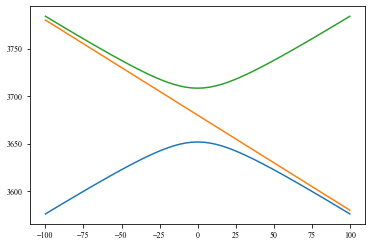

In [1400]:
plt.plot(sz2_values, H_vals[:,4])
plt.plot(sz2_values, H_vals[:,5])
plt.plot(sz2_values, H_vals[:,6])

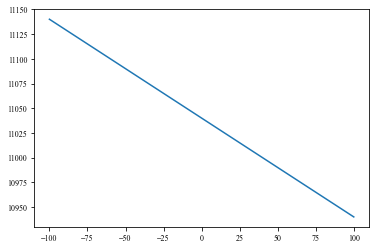

In [1401]:
plt.plot(sz2_values, H_vals[:,7])

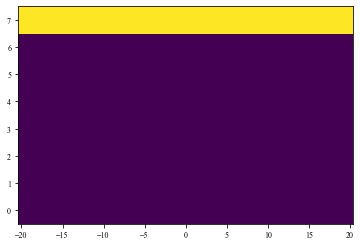

In [1365]:
plt.pcolor(sz2_values, np.arange(8), np.abs(ket_vals[:,:,0].T), shading = 'auto')

In [1349]:
# v0 and v1 are degenerate

In [1141]:
P, D = M.diagonalize()

In [1144]:
P

Matrix([
[-1,       1,        1],
[ 0, sqrt(2), -sqrt(2)],
[ 1,       1,        1]])

In [1146]:
Matrix(np.array(D, dtype = complex))# + np.sqrt(2)*np.eye(3))

Matrix([
[0,                0,               0],
[0, -1.4142135623731,               0],
[0,                0, 1.4142135623731]])

In [1080]:
S = Qobj(np.array(P, dtype = complex))

In [1081]:
psi0_vec = np.array(psi0, dtype = complex)[:,0]

In [1082]:
S_vec = np.array(S, dtype = complex) 

In [1083]:
psi0_transformed = S_vec @ psi0_vec

In [1084]:
print(psi0_transformed)

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j -0.70710678+0.j  0.        +0.j]


In [1043]:
1/np.sqrt(2)

0.7071067811865475

In [1041]:
D

Matrix([
[-1.0,   0,    0,   0,    0,   0,    0,   0],
[   0, 1.0,    0,   0,    0,   0,    0,   0],
[   0,   0, -1.0,   0,    0,   0,    0,   0],
[   0,   0,    0, 1.0,    0,   0,    0,   0],
[   0,   0,    0,   0, -1.0,   0,    0,   0],
[   0,   0,    0,   0,    0, 1.0,    0,   0],
[   0,   0,    0,   0,    0,   0, -1.0,   0],
[   0,   0,    0,   0,    0,   0,    0, 1.0]])

In [1014]:
print(np.linalg.eig(np.array(Sx1*Sx2 + Sx2*Sx3))[1].shape)

(8, 8)


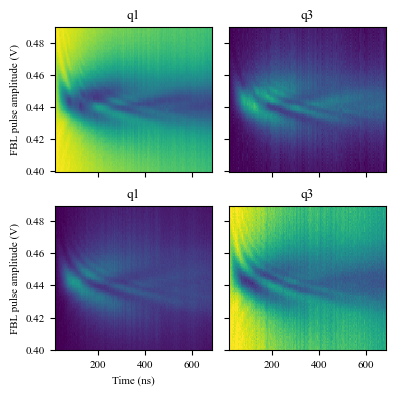

In [829]:
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (4, 4), dpi = 100)

ax[0,0].set_title('q1')
c = ax[0,0].pcolor(t_vec_10, a_vec_10, pop1_10.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)
ax[0,0].set_ylabel('FBL pulse amplitude (V)')

ax[0,1].set_title('q3')
c = ax[0,1].pcolor(t_vec_10, a_vec_10, pop3_10.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)



ax[1,0].set_title('q1')
c = ax[1,0].pcolor(t_vec_01, a_vec_01, pop1_01.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)
ax[1,0].set_ylabel('FBL pulse amplitude (V)')
ax[1,0].set_xlabel('Time (ns)')

ax[1,1].set_title('q3')
c = ax[1,1].pcolor(t_vec_01, a_vec_01, pop3_01.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)

fig.tight_layout()
plt.show()

### compute rise and fall of the FBL flux (1D)

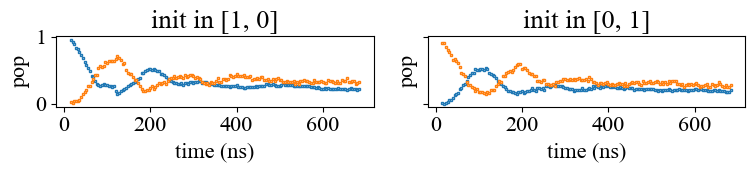

In [99]:
a_vec_idx = 41

fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (8, 2), dpi = 100)

ax[0].set_title('init in [1, 0]')
ax[0].plot(t_vec_10, pop1_10[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q1')
ax[0].plot(t_vec_10, pop3_10[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q3')
ax[0].set_ylabel('pop')
ax[0].set_xlabel('time (ns)')


ax[1].set_title('init in [0, 1]')
ax[1].plot(t_vec_01, pop1_01[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q1')
ax[1].plot(t_vec_01, pop3_01[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q3')
ax[1].set_ylabel('pop')
ax[1].set_xlabel('time (ns)')

fig.tight_layout()
plt.show()

In [136]:
eps_12 = 2.7
eps_23 = 2.7

q2_detuning = 230
q3_detuning = 0.0

T1_vec = np.array([2.09, 1, 0.84])
T2_vec = np.array([1.71, 1, 0.165])

#T1_vec = np.array([3, 10, 1])
#T2_vec = np.array([10, 10, 10])

state_1 = Qobj([[0], [1]])
state_0 = Qobj([[1], [0]])

t_eval_vec = np.linspace(0.01, 0.4, 21)
# [0, 1]
psi0 = tensor(state_1, state_0, state_0)

FBL_amp_vec = np.array([230]) # np.linspace(210, 250, 20) 

result_mat = np.zeros((FBL_amp_vec.size, t_eval_vec.size), dtype = object)

FBL_rise_time = 0.002

for i, amp in enumerate(FBL_amp_vec):
    for j, t in enumerate(t_eval_vec):
        
        tlist = np.arange(0, t, 0.003)

        print(j)
        FBL_args = {'amplitude': amp, 'T': FBL_rise_time}
        FBL_args_2 = {'amplitude': 0.01*amp, 'T': FBL_rise_time*10}

        result = compute_coupled_chain(tlist, psi0, eps_12, eps_23, q2_detuning, T1_vec, T2_vec, flux_bias_line_rise, FBL_args, FBL_args_2)
        psi0_before_fall = result.states[-1]
        
        
        #FBL_args = {'amplitude': flux_bias_line_rise(tlist[-1], FBL_args), 'T': FBL_rise_time}
        #FBL_args_2 = {'amplitude': flux_bias_line_rise(tlist[-1], FBL_args_2), 'T': FBL_rise_time}

        #result_after = compute_coupled_chain(tlist, psi0_before_fall, eps_12, eps_23, q2_detuning, T1_vec, T2_vec, flux_bias_line_fall, FBL_args, FBL_args_2)

        result_mat[i,j] = result.states[-1] # result_after.states[-1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [137]:
Sz1_exp_vec = np.zeros((FBL_amp_vec.size, t_eval_vec.size))
Sz2_exp_vec = np.zeros((FBL_amp_vec.size, t_eval_vec.size))
Sz3_exp_vec = np.zeros((FBL_amp_vec.size, t_eval_vec.size))

for i, amp in enumerate(FBL_amp_vec):
    Sz1_exp_vec[i,:] = expect(Sz1, result_mat[i,:])
    Sz2_exp_vec[i,:] = expect(Sz2, result_mat[i,:])
    Sz3_exp_vec[i,:] = expect(Sz3, result_mat[i,:])

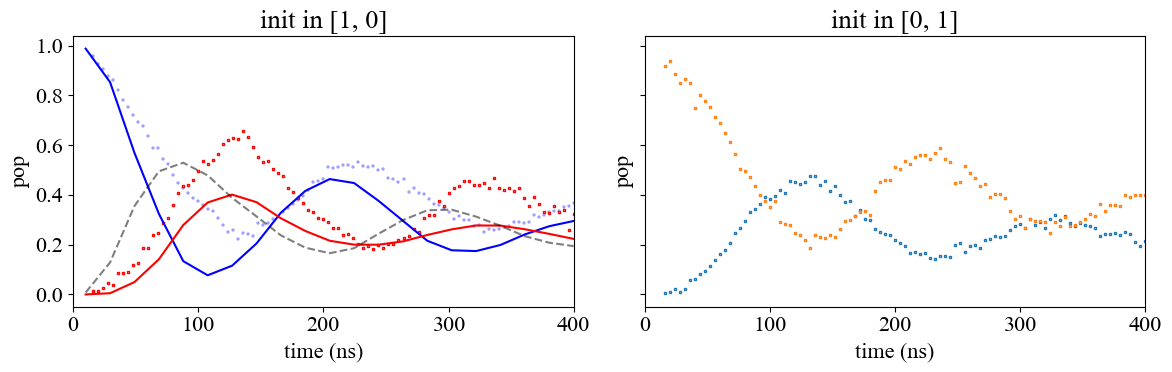

In [139]:
a_vec_idx = 38

fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (12, 4), dpi = 100)

ax[0].set_title('init in [1, 0]')
ax[0].plot(t_vec_10, pop1_10[:,a_vec_idx], 's', mfc = 'white', ms = 2, mew = 0.3, label = 'q1', color = 'blue')
ax[0].plot(t_vec_10, pop3_10[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q3', color = 'red')

ax[0].plot(t_eval_vec*1000, -(Sz1_exp_vec[i,:] - 1)/2, '-', mfc = 'white', ms = 2, mew = 0.3, label = 'q1', color = 'blue')
ax[0].plot(t_eval_vec*1000, -(Sz3_exp_vec[i,:] - 1)/2, '-', mfc = 'white', ms = 2, label = 'q3', color = 'red')
ax[0].plot(t_eval_vec*1000, -(Sz2_exp_vec[i,:] - 1)/2, '--', mfc = 'white', ms = 2, label = 'q3', color = 'black', alpha = 0.5)


ax[0].set_ylabel('pop')
ax[0].set_xlabel('time (ns)')


ax[1].set_title('init in [0, 1]')
ax[1].plot(t_vec_01, pop1_01[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q1')
ax[1].plot(t_vec_01, pop3_01[:,a_vec_idx], 's', mfc = 'white', ms = 2, label = 'q3')
ax[1].set_ylabel('pop')
ax[1].set_xlabel('time (ns)')

ax[0].set_xlim([0, 400])
ax[1].set_xlim([0, 400])


fig.tight_layout()
plt.show()

In [193]:
def three_oscillations(t, f1, f3, tau1, tau3, a1, a3):
    
    osc1 = (a1)*np.cos(2*np.pi*f1*t)/2*np.exp(-t/tau1) + 0.5
    osc3 = 1/2-(a3)*np.cos(2*np.pi*f3*t)/2*np.exp(-t/tau3)
    return osc1, osc3, osc1 + osc3

In [196]:
t_vec = np.linspace(0, 0.5, 31)

f1 = 3
f3 = 3
tau1 = 0.3
tau3 = 0.2
a1 = 1
a3 = 1
off = 0.5

osc1, osc3, tot_osc = three_oscillations(t_vec, f1, f3, tau1, tau3, a1, a3)

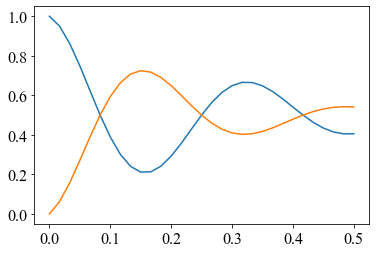

In [197]:
plt.plot(t_vec, osc1)
plt.plot(t_vec, osc3)
#plt.plot(t_vec, tot_osc)